In [71]:
## from glob import glob
import yaml
import os

os.chdir("/home/valentin/Desktop/NMVW/research-guides-dev")

import networkx as nx
import matplotlib.pyplot as plt

In [42]:

def remove_path(f):
    return (f.rsplit(".")[-2]).rsplit("/")[-1]

links = {}
for f in sorted(glob("niveau*/English/*.yml")):
    with open(f) as handle:
        d = yaml.safe_load(handle)
        rels = {v['link']: v["rel_type"] for sub in d["RelatedAides"] for k, v in sub.items()}

        links[remove_path(f)] = sorted(map(remove_path, rels.keys()))


links

{'DoingResearch_20240425': ['HowToUseTheDataHub_20240424',
  'Reporting_20240501',
  'SelectAndDelineate_20240425',
  'Sources_20240501'],
 'HowToUseTheDataHub_20240424': ['DoingResearch_20240425',
  'SelectAndDelineate_20240425'],
 'Reporting_20240501': ['DoingResearch_20240425',
  'SelectAndDelineate_20240425',
  'Sources_20240501'],
 'SelectAndDelineate_20240425': ['ChristianMission_20240417',
  'CivilServants_20240316',
  'DoingResearch_20240425',
  'HowToUseTheDataHub_20240424',
  'MilitaryAndNavy_20240417',
  'Trade_20240316'],
 'Sources_20240501': ['ChristianMission_20240417',
  'CivilServants_20240316',
  'DoingResearch_20240425',
  'MilitaryAndNavy_20240417',
  'Trade_20240316',
  'WMLeiden_20240508'],
 'ChristianMission_20240417': ['NZG_20240508',
  'SelectAndDelineate_20240425',
  'Sources_20240501'],
 'CivilServants_20240316': ['MilitaryAndNavy_20240417',
  'PieterPott_20240508',
  'SelectAndDelineate_20240425',
  'Sources_20240501',
  'WageningenUniversity_20240508'],
 'Mi

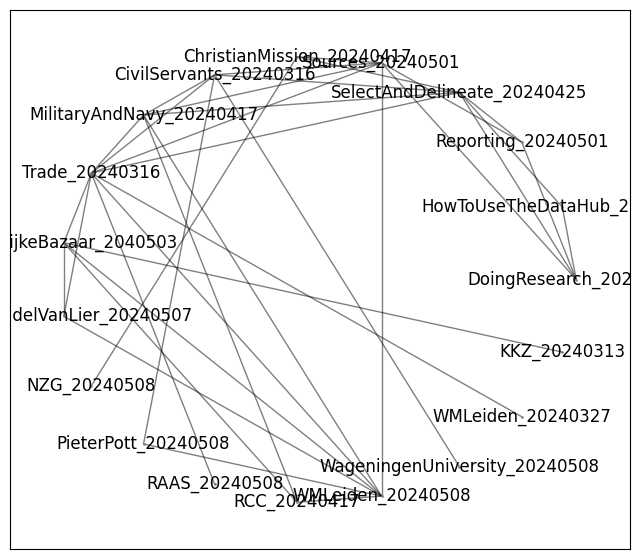

In [75]:
G = nx.from_dict_of_lists(links)

pos = nx.kamada_kawai_layout(G)  
pos = nx.circular_layout(G)  # positions for all nodes
# pos = nx.spring_layout(G)  # positions for all nodes

plt.figure(figsize=(8, 7))
# nodes
options = {"edgecolors": "tab:gray", "node_size": 1, "alpha": 0.9}
nx.draw_networkx_nodes(G, pos, **options)
nx.draw_networkx_edges(G, pos, width=1.0, alpha=0.5)
_ = nx.draw_networkx_labels(G, pos, {n: str(n) for n in G.nodes}, font_size=12, font_color="black")

In [53]:
data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAoAAAAIvCAYAAADkh2oYAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMiwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8pXeV/AAAACXBIWXMAAA9hAAAPYQGoP6dpAAEAAElEQVR4nOydd1gU5/e376V3BKQvRRFFQQQVayxgQRSJHXuNJZoYk5ii8WtLYokmxpJYYldUxN4rdo2VomLBgkgTRelLn/cPfjsvK6BgNBqd+7q8LpmZfabt7nz2POd8jkwQBAEJCQkJCQkJCYkPBrW3fQASEhISEhISEhL/LpIAlJCQkJCQkJD4wJAEoISEhISEhITEB4YkACUkJCQkJCQkPjAkASghISEhISEh8YEhCUAJCQkJCQkJiQ8MSQBKSEhISEhISHxgSAJQQkJCQkJCQuIDQ6MiGxUVFZGQkIChoSEymexNH5OEhISEhISEhEQlEQSBjIwMbGxsUFN7cYyvQgIwISEBOzu713JwEhISEhISEhISb46HDx8il8tfuE2FBKChoaE4oJGR0T8/MgkJCQkJCQkJiddKeno6dnZ2om57ERUSgMppXyMjI0kASkhISEhISEi8w1QkXU8qApGQkJCQkJCQ+MCQBKCEhISEhISExAeGJAAlJCQkJCQkJD4wJAEoISEhISEhIfGBIQlACQkJCQkJCYkPDEkASkhISEhISEh8YEgCUEJCQkJCQkLiA0MSgBISEhISEhISHxiSAJSQkJCQkJCQ+MCQBKCEhISEhISExAeGJAAlJCQkJCQkJD4wJAEoISEhISEhIfGBIQlACQkJCQkJCYkPDEkASkhISEhISEh8YEgCUEJCQkJCQkLiA0MSgBISEhISEhISHxiSAJSQkJCQkJCQ+MCQBKCEhISEhISExAeGJAAlJCQkJCQkJD4wJAEoISEhISEhIfGBIQlACQkJCQkJCYkPDEkASkhISEhISEh8YEgCUEJCQkJCQkLiA0MSgBISEhISEhISHxiSAJSQkJCQkJCQ+MCQBKCEhISEhISExAeGJAAlJCQkJCQkJD4wJAEoISEhISEhIfGBIQlACQkJCQkJCYkPDEkASkhISEhISEh8YEgCUEJCQkJCQkLiA0MSgBISEhISEhISHxiSAJSQkJCQkJCQ+MCQBKCEhISEhISExAeGJAAlJCQkJCQkJD4wJAEoIVECmUzGZ5999o/GmDp1KjKZ7DUdEQwePBhHR8fXNt7rRiaTMXXq1Nc+rqOjI4MHD37t40pISEhISAJQ4gPi7t27jBw5kurVq6Ojo4ORkRHNmzdn/vz5KBSKt3psCQkJTJ06lfDw8Ley/9WrVyOTyZDJZJw+fbrUekEQsLOzQyaT4e/v/xaO8O1w8+ZNvv32Wzw8PDA0NMTa2ppOnTpx6dKlMrePj4+nV69eVKlSBSMjIz7++GPu3bunss3Dhw+ZNm0ajRo1wsTEhKpVq9K6dWuOHDny0uMZPnz4C+/Brl27qF+/Pjo6Otjb2zNlyhQKCgpeeczg4GD69++Ps7MzMpmM1q1blznG4MGDxfdPWf/i4+Nfem4SEhL/Lhpv+wAkJP4N9u7dS8+ePdHW1mbgwIG4ubmRl5fH6dOn+eabb7h+/TrLli17LfuaNGkS33//faVek5CQwLRp03B0dMTDw0Nl3V9//UVRUdFrObaXoaOjw4YNG/joo49Ulp84cYK4uDi0tbVLvUahUKCh8fq/Sm7duoWa2tv9jbp8+XJWrFhB9+7dGT16NGlpaSxdupQmTZpw4MAB2rZtK26bmZmJt7c3aWlpTJw4EU1NTebNm0erVq0IDw/HzMwMgJ07dzJ79my6dOnCoEGDKCgoYO3atbRr146VK1cyZMiQMo/l0qVLrF69Gh0dnTLX79+/ny5dutC6dWsWLlzI1atX+emnn0hOTmbx4sWvNObixYu5fPkyXl5epKSklHudRo4cqXItoPhHw6hRo3B0dMTW1rbc10pISLwlhAqQlpYmAEJaWlpFNpeQeKe4d++eYGBgILi4uAgJCQml1kdHRwu///67IAiCAAhjxox5pf1kZma+8jFevHhRAIRVq1a98hj/hFWrVgmA0K1bN6Fq1apCfn6+yvrhw4cLDRo0EBwcHIROnTq9lWN8G1y6dEnIyMhQWfbkyRPB3NxcaN68ucry2bNnC4Bw4cIFcdmNGzcEdXV1YcKECeKya9euCY8fP1Z5bU5OjuDi4iLI5fIyj6OoqEho2rSpMHTo0HLvQZ06dYR69eqp3LsffvhBkMlkwo0bN15pzNjYWKGwsFAQBEFwdXUVWrVqVebxlcWpU6cEQPj5558r/BoJCYl/RmX0mjQFLPHe88svv5CZmcmKFSuwtrYutb5GjRp88cUXKst27NiBm5sb2trauLq6cuDAAZX1yjy/qKgo+vbti4mJiRg1KysH8PDhw3z00UdUqVIFAwMDatWqxcSJEwE4fvw4Xl5eAAwZMkScNlu9ejVQdg7g3LlzadasGWZmZujq6tKgQQO2bNlS6tyUOY0vOx8lffr0ISUlhcOHD4vL8vLy2LJlC3379i3zNc/nAGZkZDBu3DgcHR3R1tbGwsKCdu3aceXKFXGb6OhounfvjpWVFTo6Osjlcnr37k1aWpq4TVk5gPfu3aNnz56Ympqip6dHkyZN2Lt3r8o2x48fRyaTsXnzZn7++Wfkcjk6Ojq0adOGO3fulHkO5dGgQQMMDAxUlpmZmdGiRQtu3LihsnzLli14eXmJ9xLAxcWFNm3asHnzZnGZq6srVatWVXmttrY2HTt2JC4ujoyMjFLHsW7dOq5du8bPP/9c5nFGRUURFRXFiBEjVKKxo0ePRhCEMt8bLxsTwM7O7pWjsBs2bEAmk5X7vpGQkHi7SFPAEu89u3fvpnr16jRr1qxC258+fZpt27YxevRoDA0NWbBgAd27dyc2NlacxlPSs2dPnJ2dmTFjBoIglDne9evX8ff3x93dnenTp6Otrc2dO3c4c+YMALVr12b69OlMnjyZESNG0KJFC4AXHu/8+fMJCAigX79+5OXlsWnTJnr27MmePXvo1KnTK5+Po6MjTZs2ZePGjfj5+QHFU4tpaWn07t2bBQsWvPT6jRo1ii1btvDZZ59Rp04dUlJSOH36NDdu3KB+/frk5eXh6+tLbm4un3/+OVZWVsTHx7Nnzx5SU1MxNjYuc9xHjx7RrFkzsrOzGTt2LGZmZqxZs4aAgAC2bNlC165dVbafNWsWampqjB8/nrS0NH755Rf69evH+fPnX3oOLyMpKUlFxBUVFREZGcnQoUNLbduoUSMOHTpERkYGhoaGLxxTT08PPT09leUZGRl89913TJw4ESsrqzJfGxYWBkDDhg1VltvY2CCXy8X1lRnzn5Cfn8/mzZtp1qzZO13AJCHxQfO6Q4oSEu8Syvfuxx9/XKHtAUFLS0u4c+eOuCwiIkIAhIULF4rLpkyZIgBCnz59So2hXKdk3rx5AlBq2q8kL5oCHjRokODg4KCyLDs7W+XvvLw8wc3NTfDx8Xml81FOAV+8eFFYtGiRYGhoKO6jZ8+egre3tyAIQplThYAwZcoU8W9jY+MXTqOHhYUJgBASElLuNsp9DRo0SPx73LhxAiCcOnVKXJaRkSFUq1ZNcHR0FKcqjx07JgBC7dq1hdzcXHHb+fPnC4Bw9erVF+73ZZw8eVKQyWTC//73P3HZ48ePBUCYPn16qe3/+OMPARBu3rxZ7pjR0dGCjo6OMGDAgFLrxo8fL1SrVk3IyckRBKHsezBnzhwBEGJjY0u93svLS2jSpEmlx3yeykwB7969WwCEP//8s0LbS0hIvB6kKWAJif8jPT0d4IWRl+dp27YtTk5O4t/u7u4YGRmVquaE4mjXy6hSpQpQnPz/uoo5dHV1xf8/e/aMtLQ0WrRooTLNqqQy5wPQq1cvFAoFe/bsISMjgz179lRqGq9KlSqcP3+ehISEMtcrI3wHDx4kOzu7wuPu27ePRo0aqRSo3L9/H319fWJiYtDR0cHW1pavv/4aKJ5O19LSErdVRlbLO++KkJycTN++falWrRrffvutuFxZRV5WkYyywKK8SvPs7Gx69uyJrq4us2bNUll3+/Zt5s+fz5w5c8oc+2X7v3nzJomJiYSHh4tVzK1ateL3338vc8zXVcW8YcMGNDU16dWrl8prX0cVc8mK9ef/JSUlvdKYiYmJfP/993h7e2NoaIhMJuP48eNlHqOExPuCNAUs8V5jZGQEUGZeVXnY29uXWmZiYsKzZ89KLa9WrdpLxwsMDGT58uV88sknfP/997Rp04Zu3brRo0ePV86v2rNnDz/99BPh4eHk5uaKy8vyH6zM+QCYm5vTtm1bNmzYQHZ2NoWFhfTo0aPCx/bLL78waNAg7OzsaNCgAR07dmTgwIFUr14dKL5mX331Fb/99htBQUG0aNGCgIAA+vfvX2r698GDB4z/9nsK83O5e/cuXl5e7Nq1Cz09Pe7cucPYsWPF1wwcOJCqVauKQuT58zYxMQEo97xfRlZWFv7+/mRkZHD69GmV3EClIC95L5Tk5OSobFOSwsJCevfuTVRUFPv378fGxkZl/RdffEGzZs3o3r37C4+tvP0vX76cxMRETE1N+emnn0hLSxMF0PPXuqCg4IVVzEpeVsXcs2dPdu7cia+vr0qKweuuYp4+fXqpz5/yx1Zlx7x16xazZ8/G2dmZunXrcu7cufIvtoTEe4IkACXea4yMjLCxseHatWsVfo26unqZy4UycvzKeqiXtc3Jkyc5duwYe/fu5cCBAwQHB+Pj48OhQ4fK3V95nDp1ioCAAFq2bMmff/6JtbU1mpqarFq1ig0bNvyj81HSt29fhg8fTlJSEn5+fqUerC+iV69etGjRgu3bt3Po0CHmzJnD7Nmz2bZtm5hX+OuvvzJ48GB27tzJoUOHGDt2LDNnzuTvv/9GLpcDxXlkKU+foa5rgIamBoIgEB8fz+rVq9HX1+fEiRNoaGjQrFkzdu3aRXZ2Njo6Ori5uXH58mX279/Ps2fP0NXVRVdXV/wRcPv2bcLCwtDV1UVPT09cr6urW+61ysvLo1u3bkRGRnLw4EHc3NxU1mtra6OtrU1iYmKp1yqXPS/uoDgitmfPHoKCgvDx8VFZFxoayoEDB9i2bRsxMTHi8oKCAhQKBTExMZiammJkZCQWNyUmJmJnZydu26dPHzZt2kTjxo0ZMWIEoaGhKBQKjIyM+P7778XikIKCAu7cucPdu3cJDQ3F29sbAD8/P9zc3Pj111/FMb29vYmNjVXJgRw1ahQeHh5MnjwZTU1NsrOz6devn7heEATGjh3LwIEDOXr0aJnXePz48bi7u3Po0CGxkMXIyIgZM2bwxRdf4OLiorK9n59fqZzHVx2zQYMGpKSkYGpqypYtW+jZs+cLx5WQeB+QpoAl3nv8/f25e/fuW/1Vr6amRps2bfjtt9+Iiori559/JjQ0lGPHjgFlR+7KY+vWrejo6HDw4EGGDh2Kn59fKQ+2f0rXrl1RU1Pj77//fqUqTmtra0aPHs2OHTu4f/8+ZmZmpapN69aty6RJkzh58iSnTp0iPj6eJUuWAMVRM4VCgb6eLo42FvTu2QMnJydMTU0ZN24cfn5+5OTkYGFhIU7z16pVi7p161K3bl0AHBwcsLOzQ0dHh+DgYL755hsA5s2bx9ixY1m/fj0rV67kjz/+YO7cuWhoaNCmTRt+//13li5dytq1awkJCcHCwgIHBweOHj3Kzz//zNmzZ5HJZOzcuZPhw4djYWGBvb09devW5dKlS+zfv59WrVphaGiIkZERCxYswMLCQiUN4fz581SrVo1Vq1ahoaHBkiVLxKIgJbdv3wagW7duVKtWTfwXHx9PaGgo1apVY+XKlQCid+TzBtXW1tbEx8eL62NjY4Hi1IjLly+rjHn37l0AIiIixNe/ShXzmjVrMDAwICAgQFz/JqqYoTiyX1hY+I/HNDQ0xNTUtMxxJCTeVyQBKPHe8+2336Kvr88nn3zCo0ePSq2/e/cu8+fPf2P7f/r0aallygeycspOX18fgNTU1JeOp66ujkwmU3nwxcTEsGPHjn98rEoMDAxYvHgxU6dOpXPnzhV+XWFhoYqVC4CFhQU2Njbiuaanp5fKwapbty5qamriNkePHkUQBKpXr86nI0fg4eFBp06diIiIQFNTk759++Lp6cmTJ0+4ceMGlpaWWFpacv36da5evQrAkydP0NbWZtOmTWzbto0mTZoA4OnpyenTp4mIiGDMmDEMHTqUPn36AMVV0O7u7tja2qKrq4tCoSA9PZ2kpCRx+ldZRTx8+HAOHz5Mw4YNady4MVZWVly8eJGOHTty//59unXrRpcuXcTq39u3b/Pw4UO2b99O8+bNiYmJoU2bNvzyyy+kpqbi4+PDhQsXxGty4MABNDQ0CAgIYMyYMQwcOJCGDRtiZGREw4YN2b59u3hvXF1dcXFxYdmyZSrvi8WLFyOTycQpfB8fH7Zv306tWrWwsbFh+/btbN++HXNzc2QyGR06dCh1vxs1asTdu3dfmr+alJSErq4ux48fp2vXrmI185uoYobiSKSRkRF6enoEBAQQHR39j8eUkPiQkKaAJd57nJyc2LBhA4GBgdSuXVulE8jZs2cJCQl5oz1np0+fzsmTJ+nUqRMODg4kJyfz559/IpfLxYIGJycnqlSpwpIlSzA0NERfX5/GjRuXmWPYqVMnfvvtNzp06EDfvn1JTk7mjz/+oEaNGkRGRr624x40aFClX5ORkYFcLqdHjx7Uq1cPAwMDjhw5wsWLF8VpxNDQUD777DN69uxJzZo1KSgoYN26dairq9O9e3fi4uK4dOkSOjo6aGpqimN///33oj3N2LFjqV69OocOHSIrK4uaNWty//59WrVqhZOTE2vWrEFLS4v9+/ezY8cOPD09adiwIfv378fHx4e6deuydOlSrl27Jk53QrHvXcmp2N9//53c3FzMzc3p0aMHRUVFPHjwACgWycHBwWhoaKBQKIiNjWXv3r2oqanRqFEjsrOzOXLkCAYGBnTp0oUNGzYgCAK//fYbhYWFmJqaYmZmxuXLl/Hw8OD+/fv06NGDmTNnYmNjw9GjR+nevTvTp09XmaquU6cOlpaWdOnSReXaz5kzh4CAANq3b0/v3r25du0aixYt4pNPPqF27dpAcV7kgwcPuH37NpMmTRLHGDt2LIIg0KxZM5WCoZMnT4r5f8nJySgUCn766ScAWrZsScuWLQG4c+cO27Zto27duly8eFFl+nf69Ono6ury5Zdflvu+UU6Tl+XTaW1trVJQpKenx+DBg0UBePnyZX777TeaNWvGlStXxCnwyowpIfEhIglAiQ+CgIAAIiMjmTNnDjt37mTx4sVoa2vj7u7Or7/+yvDhw9/ovmNiYli5ciVPnjyhatWqtGrVimnTpomJ+JqamqxZs4YJEyYwatQoCgoKWLVqVZkC0MfHhxUrVjBr1izGjRtHtWrVmD17NjExMa9VAL4Kenp6jB49mkOHDrFt2zaKioqoUaMGf/75J59++ikA9erVw9fXl927dxMfH4+enh716tVj//79eHl5sWzZMqytrUtVqFpaWnL27Fm+++47Fi5cSE5ODq6urhgZGREREcEvv/zCL7/8Il7T5s2bi9OoU6dOFYs/rl+/LhakzJo1i7y8PDHv8Pm8SKX4efz4MQMGDFBZd//+fczNzUWfu4SEBARBoFGjRhw+fJiioiJat27NvHnzcHR0RKFQcOHCBaZPnw4UR4ZLTq1CsYC+ePEi9vb2aGhocOrUKZYuXaoyfZyamsqdO3dYsGCBSv6irq4u06dPZ926dXz22WeYmpry2WefMXHiRBQKBTo6Ojx+/LjMKmbleT9/zUNDQ9mzZw8AKSkppKSk8L///Q+AKVOm0LJlS5Uq5sLCQiwsLMSUBGUV88aNG1+pihmKq6iV0/xQnGNasrq4S5cu+Pr60rJlS37++WcxjaAyY0pIfIjIhBdlgv8f6enpGBsbk5aWJlZVSkhISLxuzpw5w5EjRxgxYkSZkZvyyMvLIyIigu3btzNv3jwKCwsJDw9nwYIF/PXXX+Tk5IjRxIKCAh49ekTt2rVxdXUlMDCQ1NRUpk2bRrt27Rg2bBh2dnbI5XKsra1xdnamdevWYmeW1atXM2TIEE6ePClaywDMnj2b77//nujoaGrUqFHmcW7evJnAwMAXnsvTp08xMTFh8+bNDBo0iLy8PNzd3WnVqhUdO3akatWqKBQKFAoF2dnZZGdnk5GRQXp6Ounp6WRkZJCTk0N+fj75+fnk5eWRmZnJ48ePCQ8Pp7CwkE/HfM6gAf2oX78+UDxdbm5uzvTp00WBp+TPP/9kzJgx3Lx5k1q1aqmsKywspGvXrhw8eFCMrpbEz88PhUKhYqni6OiIm5ubKCyhuLPNN998Q2xsrEoRCxRPQaurq780h7dp06Y8fvxY7PbyqmMqi0COHTtG69atX7hPCYl3jcroNSkCKCEh8U6QmprK8ePHadKkSaXEH4CWlpbYhq1mzZoMGTKEkJAQcX3JIhsNDQ1sbW1RV1dHLpczbtw4MjMzmTZtGlZWVigUCo4dO0Z+fj5qamqkp6cTFxdHZGQkcrlcjJZVpAL8eZR5dHPmzBHzQJUIgkB+fj4FBQUkJibSsGFD9u3bx4EDBzh79ixLlixh8eLFjBs3jpo1a4oiUKFQiOPKZDK0tbVRKBRkZWWRkZFBcnIy6enpPHjwgNzcXLp06462YRW279qNgYEBzs7OmJqavpNVzMpljRo1eum1tbOz49atW+Lfr2NMCYn3GUkASkhIvHUEQWDv3r3o6emp5OS9Csqk/8TERBwcHCgqKiI6OlrMg4PiopnU1FSqVq0qmgcbGxujra1Nhw4dKCoqoqCggPj4eKZNm0ZGRgbbtm0DiqtLAa5cuYKpqSm2trZoa2uLuXNXr17F3t5ejNCVFGrKacd79+5ha2ursk6hUFBYWKhSCALFBUIBAQF07NiROXPmsGPHDmbPno2uri6ampooFArS0tJ4+vQpKSkpFBUVoaWlJQpUc3Nzrly5IrYMNDU1Ze/+Azx59pRVq1ZRp04dfH19xSrm5zl//jzVq1cvZab+zTffsGrVKn7//XexiKYkyorjbt26lVoXHx9PtWrVmDdvHuPGjVOpYi4pzBISEoiLi2PEiBFl3uuS3Lt3D3Nzc/Hv1zGmhMT7jCQAJSQk3jpRUVFER0fTp08fle4dL0I5Rfe8hc6+ffuAYlsYHx8fJk6cKFq7KBk9ejQAS5YsEXPGoNg4efny5UBxBCsyMpKioiIcHR0JDAwkJiaG+/fvA8Vm3KGhoRQUFKCnp4eGhgZaWlqMGTOGS5cuqRSwCIKAuro62traVK1alW3bttGwYUNMTEywsbERizwUCgW2trZoaWlRVFSElZUVWlpayGQy0bokNzcXHR0dHj58SGJiIoWFhWhoaIjRNGXk0sHBAQ8PD4KCgoiIiGDp0qX06tWLxMREjh49irG9PYIgiKbIrq6urFmzhkuXLoki+tatW4SGhjJ+/HiVazxnzhzmzp3LxIkT+eKLL8q8P8qK4+cZMWIEDg4O/PDDD6JlT8kq5pEjR4p+jM9XMUNxPmZJoae855cvX2bs2LHissqMKSHxISLlAH7AODo6quQ2VRRlDtT9+/fFBHhlrozUPkmisuTk5LBo0SLs7Oxemh9XEjc3N7Kzs+natSsuLi5iVXdwcDB2dnaEhYVRpUoVBg8ezJo1a+jatSuNGjXi0qVLbN26FXd3d4YMGUJubi65ubmcO3eOAwcO4OTkhLW1NVlZWdy/f5+8vDycnZ3Fitnw8HB27tzJ119/ja2tLdnZ2WRlZZGenk5YWBhnz57FzMyMRo0aYWtry7Nnz9DU1GTDhg1iizE/Pz8sLCwYMmQItra2xMfHc+zYMYyMjNi9ezepqanI5XI6dOiAtbU1OTk5XLx4kYiICNq3b0/Hjh3FHMWCggIePnzI3bt3UVNTw8XFBU9PT6pVq8aCBQv48ssvadq0qSh6U1NTCQ0NxcvLi4KCAmxtbXF2diY0NJQFCxYgCALfffcd2traYsVyeHi4KLq2b99Ot27dcHZ2ZvLkyaXuS7t27bC0tCz3vpWVAwjFgjogIABvb2+VKuZhw4axbNkycTtnZ2exqtvY2JgrV66wcuVKrK2tuXjxosq+KzomIFY3X79+nU2bNjF06FCxCGvSpEkVfVtKSLxVKqXXXndzYYl3gzt37ggjRowQqlWrJmhrawuGhoZCs2bNhN9//13Izs4WBKG4AfygQYMqPfaqVasEQLh//764rFWrVqUaxScnJwtjx44VatWqJejo6Ajm5uaCl5eX8O233woZGRn/4OzeHbKysoQpU6YIx44deyPjX7hwQRgzZoxQp04dQU9PT7CzsxN69uwp3Lp1q8zto6KiBF9fX0FfX18wMTER+vfvLyQnJ6tsc+PGDeGbb74R6tWrJxgYGAhWVlZCx44dhYsXL770eNq2bSsAwpgxY8pcv3z5csHFxUXQ1tYWatSoISxYsKDUNtu2bRPat28vWFtbC1paWoKZmZng6uoqnDt3rtS2mzZtEvr16yfUqFFDAISWLVsK6enpQlJSkrB69WqhW7dugqOjo6CrqytoamoKVatWFczNzQU9PT1BU1NTsLKyEjp06CC0bt1aqFKliqCmpiYYGRkJH330kTBp0iRh1qxZwvz584W//vpLWLt2rdClSxfByMhI0NHREZo0aSLs3btXsLW1FXr27CmkpKQI2dnZwsqVKwWgzOuVk5Mj/PXXX4Kbm5ugpaUlaGtrC7a2tkL37t2FBQsWCNu2bRMuXLggHD58WOjatatgZmYmaGtrCw4ODsLHH38sLFu2TNizZ4+waNEioXnz5oKlpaWgra0taGtrC05OTsKUKVOEzMxM4dGjR8KBAweEX375RZgyZYqwdOlS4cKFC+JnW8mgQYMEoNx/Z86cEX788UchODhYyMjIENasWSPUqVNH0NHREfT09AR/f38hOjpaZcwpU6a8cMyXfRYcHByETp06lblu+/btgoeHh6CtrS3I5XJh0qRJQl5enso2P/zwg+Dh4SEYGxsLmpqagr29vfDpp58KSUlJrzymIAgvPCcJif8KldFrUgTwPWTv3r307NkTbW1tFc+706dPs3XrVgYPHsyyZcvIzc1FTU1NZaqqIhQWFpKfn4+2trY4/fZ8BPDp06d4enqSnp7O0KFDcXFxISUlhcjISPbs2UNkZKQYPfwvo6yenDJlClOnTn3t4/fo0YMzZ87Qs2dP3N3dSUpKYtGiRWRmZvL333+rtCSLi4vD09MTY2Njxo4dS2ZmJnPnzsXe3p4LFy6IU6vjx49nxYoVdO/enUaNGpGWlsbSpUuJiYnhwIED5XYV2bZtGwMHDiQrK4sxY8awaNEilfVLly5l1KhRdO/eHV9fX06dOsW6deuYNWsW3333nbjd9OnTuX79Oq6urhQWFnLkyBHu3LlDeno6ixcvRi6XizlxkydPJiYmBjs7O+Lj47GwsCjTs1FHR4fY2Fj++usvHBwc+OijjzAyMuLJkyeoqanx7bffilYpyulWbW3tV+7FXFEEQeDZs2fExcWJ/5KSksjLyyM7O1uc3s3Ly0NbWxstLS2qVq0qViHL5XLMzc1RU1NDoVBw7do1wsLCSEhIQF9fH3d3dzw8PF4YcXuexMREli5dysiRI7G2tubWrVts2rQJLy8v/Pz8ePLkCYcOHSI6Ohp7e3s6dOhQZgGIhITEu4dUBfwBc//+fXr37o2DgwOhoaEq1ZRjxozhzp077N27FyjbH6siqKurv7R/7YoVK4iNjeXMmTM0a9ZMZV16enqF87xeRlZWlthF433kq6++YsOGDSrXKzAwkLp16zJr1izWr18vLp8xYwZZWVlcvnwZe3t7oNjuol27dqxevVpMeu/Tpw9Tp07FwMBAfO3QoUOpXbs2U6dOLVMA5uTk8PXXX/Pdd9+pTPsVFhaiUCh4+vQpEyZMoFWrVvzwww8oFAqqV6/Ow4cPmTJlCoaGhqKI0dDQoHbt2hQUFHD58mVMTU3p378/v//+O4sXL6Zv376iWPvyyy+xtbUVO7mYmJjQr18/Fe87HR0dMjMzqVmzJp07d2bLli1vXNhVFJlMRpUqVSgoKBBtWXJycoiJiSEtLU30qtPS0sLIyAi5XI6VlZXY2cTExIT79+8TFhbGzZs3KSoqwtnZmd69e+Ps7FzpPtJlUatWLfz9/dm9ezeGhoa0aNGCfv36cffuXQ4ePMiyZcuoV68ebdq0kQIAEhLvEZIAfM/45ZdfyMzMZMWKFWVaadSoUUNM2i6ZA3jp0iW8vLxYvXp1qQ4QBw8epEOHDuzevRt/f/8ycwCf5+7du6irq4vtt0pS1kPk/PnzTJkyhXPnzpGfn4+XlxczZsygefPm4jZTp05l2rRpXL9+nZ9++on9+/fj6OhIv379+Oabb4iJicHBwUFl3AkTJvDrr7/y6NEjTExMOHXqFAsWLOD8+fM8evQICwsLevTowYwZM1RsPQYPHsyWLVu4desWY8aM4ciRI+jq6jJo0CBmz56Nuro6MTExYo7QtGnTmDZtGoAYDUxKSmLChAkcPnyYx48fY2pqSqNGjZg/f36Fo5/Pi2cozoFydXXlxo0bKsu3bt2Kv7+/KP4A2rZtS82aNdm8ebMoABs0aFBqzCpVqtC0aVNOnTpFbGysSmVqdnY2K1euJDMzU3xPhYeHM2PGDPLy8gCIjo7m2bNn2NrasnPnTrS1tdHV1aVRo0YcP36cmzdv4uvrqxKFu3HjBpmZmQwdOhRHR0eWL19OtWrVyi0q0NXVFW1LnmfDhg08evSIn3/+GTU1NbKystDV1X0rQjArK4v4+Hgx4hcfH09ubi4ymQxLS0uqV69Oy5YtkcvlmJmZIZPJRKuZuLg4Hj58yJUrV4iPjyc5ORlNTU3s7Oxo2rQp3t7e2NjYkJOTw+PHj194HKamphX+odWgQQMyMjI4evQohoaGeHh44OTkxKhRo7hy5QrHjh0jKiqK5s2b06xZs9f2A05CQuLtIQnA94zdu3dTvXr1MoXDi2jYsCHVq1cXzWdLEhwcjImJCb6+vhUez8HBgcLCQtatW/fSlmKhoaH4+fnRoEEDpkyZgpqaGqtWrcLHx4dTp06V8uvq2bMnzs7OzJgxA0EQ8Pf359tvv2Xz5s188803Kttu3ryZ9u3bY2JiAkBISAjZ2dl8+umnmJmZceHCBRYuXEhcXJyKbxwUR7d8fX1p3Lgxc+fO5ciRI/z66684OTnx6aefYm5uzuLFi/n000/p2rWraHfh7u4OQPfu3bl+/Tqff/45jo6OJCcnc/jwYWJjY//R9LcgCDx69AhXV1dxmVIsNGjQgKysLBUB5+zszKlTpwgNDVURdSW3yc3NJSwsDDU1NVauXCmOq6WlRW5uLiEhIXzyySdil42qVavi7e0tCjpl5exPP/2Evb29GJnKy8tj7ty5aGpq0qlTJ3Hc1NRUQkJCaNy4MYIg8MUXX5Cenk6bNm1e6ZocOXIEIyMj4uPj6dKlC7dv30ZfX58BAwYwb948dHR0Xmncl1FYWMijR49UpniVvZ/19fWRy+W0aNECuVyOjY1NucLJyMiIGjVqkJeXR3x8PBoaGtjY2ODu7o6hoSHZ2dncuXOHO3fuYGhoyJ07d1Sql8uiskbGrVq1IiMjg127dqGvr4+zszNqamo0bNgQNzc3Tp06xalTp7hy5Qpt2rTB3d29VAW2hITEfwdJAL5HpKenEx8fz8cff/xKrw8MDGTu3Lk8e/ZMFEx5eXli1V9lcgWHDh3KvHnzGDx4MLNmzaJ169a0bNmSjh07iiICisXMqFGj8Pb2Zv/+/eIDZeTIkbi6ujJp0iQOHTqkMna9evXYsGGDyrImTZoQHBysIgAvXrzIvXv3VHLzlP5pSkaMGEGNGjWYOHEisbGxKtGznJwcAgMDxc4Io0aNon79+qxYsYJPP/0UfX19evTowaeffoq7uzv9+/cXX5uamsrZs2eZM2eOioXGhAkTKnT9ioqKyMnJKVOs7dq1i/j4eAICAli3bh0KhUI0wP3777/FaUUlz549Iz09ncuXL2NoaChG4ExNTUUBd+PGDeLi4vj8888ZM2aMuFxdXZ2ePXvi5eXFn3/+KY4pl8tp2rSp+LdCoUBdXb1U6zotLS3MzMxU+q4K/+f5t2zZMjGKZWBgwKRJkxg2bFiFrs/zREdHU1BQwMcff8ywYcOYOXMmx48fZ+HChaSmprJx48ZXGvd5MjIyVMReQkIC+fn5qKurY2VlhbOzs5i7V6VKlZcKJEEQePjwIWFhYVy/fp28vDyqV69Ojx49qF27tspnLjMzU4wsamhoMGTIEAoKCpDJZJiYmGBubk7VqlUxNzfH0NCQevXqVercZDIZnTp1IisrS/whqGyRp6OjQ7t27WjYsCGHDx9m+/btnD9/Hl9f31JRdwkJif8GkgB8j1CazD5v2FpRAgMDmTlzJtu2bRMfxIcOHSI1NbVS9hxQ3Lc1IiKC6dOns337dtFvTUtLi0mTJjFp0iRkMhnh4eFER0czadIkUlJSVMZo06YN69ato6ioSGUqb9SoUWUe+7hx47h7965oyBscHIy2traKIC4p/pSRsmbNmiEIAmFhYSoCsKx9tWjRgnXr1r30/HV1ddHS0uLYsWP06dMHHR2dUqa/zwu7kstycnLKHDc1NZWlS5dSrVo1vLy80NbWpkqVKmRlZQHFQvjjjz9WyZErKCjg7NmzDB8+nCpVqpQaMzk5mcDAQKpVq8bPP/+skht47Ngxtm7dyvnz5194vgqFotzolvLcldy4cYPo6Gjmz5+Pqakp9+7dY9WqVaIR8qtM22ZmZpKdnc2oUaNYsGABUGxAnJeXx9KlS5k+fXqZU8cvQtmRo6TgS0tLA4pNo+VyOT4+PmLeXmV+IKWnpxMREUF4eDgpKSlUqVKFZs2a4eHhUeY9gmKRXKtWLWrVqkWbNm0oKioiOTlZ5fgSExNJTExET0+Px48fi2JUaVb9MtTU1OjevTtr165lw4YNDBs2DDMzM3G9iYkJvXr14sGDBxw8eFA0km7Xrp34o1FCQuK/gSQA3yOUuXUZGRmv9Pp69erh4uJCcHCwKACDg4OpWrVqqTZPFcHa2prFixfz559/Eh0dzcGDB5k9ezaTJ0/G2tqaTz75hOjoaIAXThOnpaWpPFyejzJB8bTwV199RXBwMBMnTkQQBEJCQvDz81PJOYyNjWXy5Mns2rWLZ8+eldpPSXR0dEoZzpqYmJR6XUkEQeDIkSPs2bOHps2as3//fuzs7MTKzpo1a2JsbIyOjg5GRkYYGhpiZGSEkZERlpaWYoXq8//09PRIS0ujVatWmJubc/r0aZXKTGUHBxsbG1xcXFSOSZmnV1brsqysLPz9/cnIyOD06dMq4q+goICxY8cyYMAAvLy8yj1n5djK/TxPTk6OuO+cnBz279+Pi4sLvXv3Frfp3bu32Klj7ty5L9xXefsHSnWk6Nu3L0uXLuXcuXMvFICCIJCamlqqWldpsmxjY4Orqyt2dnbY2tq+UjFEQUEBt27dIjw8nDt37qChoUGdOnXw9/fH0dGx0tOpampqWFlZYWVlJRo3KxQKlfzDs2fPkpOTg0wmw9zcHLlcjra2NllZWZRnAKGpqUnfvn1ZuXIl69atY9iwYaV+VDo4ODB8+HAiIyM5evQoixYtokmTJrRo0eKNTbdLSEi8XiQB+B5hZGSEjY0N165de+UxAgMD+fnnn3ny5AmGhobs2rWLPn36oKHx6m8VmUxGzZo1qVmzJp06dcLZ2ZmgoCA++eSTF/ZGVVJSlEDZQsbGxoYWLVqwefNmJk6cyN9//01sbCyzZ88WtyksLKRdu3Y8ffqU7777DhcXF/T19YmPj2fw4MHisSipbIVlfHw8f/31F4cPH8bdoz6NWvjg5u7Ovejb3L59m4iICKKioujfv78Y5cnKyiIrK4vExESxcKIsEVhUVMRnn33G06dP2bJlC1paWmRnZ6Ojo4OamppK39PnSUxMFHu9liQvL49u3boRGRnJwYMHVSxlANauXcutW7dEi5iSZGRkEBMTg4WFBXp6elhbW1NYWEhycjIWFhYq+0hJSRHFamhoKLm5ufj5+amMZ2Jigo+PD0FBQa8kAG1sbLh+/XopOxTlsTwv2vPy8sSWYMp/mZmZQHHxhFwup169esjlciwtLf9RtW1iYiLh4eFERkaiUCiws7PD398fV1fX1y6WdHV1qVGjBjVq1ACKhW1KSorKed65c4dLly6xcOFCateuLUYJ5XI5enp64jj9+/dnxYoVBAUFMXjw4FLHKpPJqFevHrVr1+bs2bOcOXOG8PBwvL29qV+//jtTiS0hIVE2kgB8z/D392fZsmWcO3dOJUerogQGBjJt2jS2bt2KpaUl6enpKpGaf0r16tUxMTERhYpyutbIyKhc/7mKEhgYyOjRo7l16xbBwcHo6enRuXNncf3Vq1e5ffs2a9asYeDAgeLyw4cPv/I+lVGb69ev8+2335KamkrLli0RBAFNWSENmjVl0fzfgeI8NQ8PD7Kyshg/fvwLp4AVCgVZWVk8efKEtLQ0Fi9eTEJCAgMGDBCT8ZXo6Oigq6uLoaEhW7duxcnJSUU8njp1ipo1axIXFycu09LSYuDAgRw9epTNmzfTqlWrUucWGxtLfn6+SiW2krVr17J27Vq2b99Oly5dVPquduzYUdzu0qVLFBUV4eHhQVxcHBcvXsTX11clD1SJsqftq9CgQQMOHz5MfHw8tWrVEpcrcw91dHQIDw8XRdCjR48QBAEtLS3kcjn169cXp0pfh61QdnY2kZGRhIeHk5SUhIGBAfXr18fDw6NUVPlNIpPJqFq1KlWrVhXvUUxMDPPmzaNRo0bk5ORw+fJlTp48CYCZmZmKIOzTpw9r1qwhODiYfv36lflDUEtLi9atW1O/fn2OHj3Knj17uHDhAr6+vuLnW0JC4t1DEoDvGd9++60YXQsNDS0VEbl79y579uwp12qjdu3a1K1bl+DgYCwtLbG2tqZly5aVPo7z58/j5uZW6mF64cIFUlJSRFHRoEEDnJycmDt3Ln379i0V7Sur72d5dO/enc8//5yNGzcSEhKCv7+/yv6VUZySU1+CIDB//vxKnx8UR5EuXrwIQEREBD4+PowdO5akpCQePHiAk5MTYWFhPH36FFNTU5ycnDA0NCQ/Px8DA4NS51oWhYWFdOvWjfj4eLZt20br1q3LzSFs3rw5oaGhxMTEoKenJxoHP3jwADc3N7FSF4p7p168eJHAwEBSUlJYv359qeijp6cnf/zxB1paWqJJsZaWFt26daNjx44MHz6cxo0bA8V9X01NTVm8eLGKAFy8eDF6enp06NCBLVu2YG1tXWYFdExMDEePHhWnMitLr169mDVrFitWrKBZs2biNOikSZNQU1Pj9u3bJCYmitOgXl5eKibLr4OioiLu3LlDeHi4WJRTs2ZNfHx8qFGjxjsTEdPW1sbExIQmTZpgbW1d5vT31atXKSoqQlNTU8xlffbsGUOHDi13+tvIyIiuXbvSuHFjDhw4wLp163B2dqZ9+/b/quiVkJCoGJIAfM9wcnJiw4YNBAYGUrt2bZVOIGfPniUkJKTMTgolCQwMZPLkyejo6DBs2LBXenCtW7eOoKAgunbtSoMGDdDS0uLGjRusXLkSHR0dJk6cCBTnMS1fvhw/Pz9cXV3L7Y1aESwsLPD29ua3334jIyOjVOGKi4sLTk5OjB8/nvj4eIyMjNi6desLc/rKIzw8nKNHj4r+gklJScjlcu7fv8+NGzeoUqUKAwcOxMXFhVu3btG0aVN27NjBo0ePKhVR/frrr9m1axedO3cmLS2NnTt3qqwvWXlcq1YtPD09Wbx4MV988QW5ubns2LEDNzc3Vq1aRVFREQqFgqVLl3Lx4kXc3NxwcHDgxo0b5OXlif9q1qxJUVERBQUFpY5HGfHMyMjgyZMnhIaGioJxwIABzJ8/n/bt29O6dWvCwsLYsmULU6dO5fbt2yQnJzN8+HDRVNjDwwMTExOio6NZsWIF+fn5zJo1S2V/J0+eFKNTjx8/JisrS+zZ2rJlSz766CMeP35MUVERbdq0YcOGDURERODg4MDDhw+5evUq/fr1Y/To0dja2r6R/LQnT54QHh5OREQEGRkZWFpa0q5dO+rWrfufMClXVhGbmJhQt25dAPLz80lKSuLhw4fExcXx5MkTduzYwaVLl6hfvz729vZilNDKykolMmhjY8OQIUO4ceMGhw8fZvHixTRs2JDWrVuLU8wSEhJvH0kAvocEBAQQGRnJnDlz2LlzJ4sXL0ZbWxt3d3d+/fVXhg8f/sLXBwYGMmnSJLKzsytd/atk5MiR6OnpcfToUXbu3El6ejrm5ua0b9+eCRMm4OnpKW7bunVrzp07x48//ii2ObOysqJx48aMHDmyUvsNDAzkyJEjGBoaqkSioDi5fffu3YwdO5aZM2eio6ND165d+eyzzypsmZGamgrAjh070NPTQ1NTk5EjR3LgwAF+/PFH8vLyaN26NRMmTKBPnz7s37+fixcvsnPnTurUqcPmzZvp3r17hc8nPDwcKPZ3LEsIlxSAdnZ2nDhxgq+++orvv/8eLS0tOnXqxK+//qoSgVFOv1+7dq3MfNH79+/j4OBAQUFBmZHGqVOnUqVKFczNzcVp26SkJOzs7AgICODMmTOEhoZiZGSEr68v2dnZTJ48GUdHR7Zu3Urjxo35+++/2b17NwqFAhMTExo0aMDIkSOxtLQkISFBFJVHjx5l+vTpKsentOX5+OOPOX36NHl5echkMrp27YqlpSXHjh3j9u3bODg4MG/ePMaNG1fh611RcnNzuX79OmFhYTx8+BBdXV3q1q2Lp6cnVlZW/3l/PKX5tJ2dHVAcYT127BhbtmwRjauPHDlCQUEB6urqWFtbq0wdGxsbU6dOHWrWrMn58+c5efIkkZGRtGrVikaNGr2WDiYSEhL/DKkXsIREBXj69CmHDx/mxo0bWFtbo6WlxYMHD2jQoAF+fn5iBCQpKYklS5YwdOhQ0VImJCSEmJgYPvvsszILWN4nBEEgPz9fZZp6y5YtJCYm4u/vL7aOKyv/sbCwUGWsoqIisrOzyc3NFXMi8/Ly0NDQwNDQEFtbW+RyOfb29tjb22NsbCxOYSt77L7uc3vw4AFhYWFERUVRUFCAk5MTnp6e1KpV6x8VSv2bPN8LuDKEhoZy8uRJunbtipubW7km2AYGBqUE4ZkzZ7h8+TImJia0b9+eWrVq/eeFsoTEu4bUC1hC4jWRk5PDyZMnOX/+PPr6+nTo0IHr168TFxdH586dS7VVS0pKElt+KenQoQOLFi3iyJEjKkUp7yMymUzMFTQ2NiYqKors7GxGjhxZyp6mJMpq1Tt37nD//n1iY2OJj48nJyeHwsJCDA0NsbGxwcDAAD09PQRBICcnh8TEROLj4zl37pzKeGpqaioWOuVZ6zy/rCzhmJqaKnr2PXv2DFNTU1q2bEm9evU+uB/E3t7eZGRksHPnTvT19alRowY2NjZit56srCwVQXjy5Eny8vJQU1PD0tKSGjVqEBMTw8qVK6lTpw4dOnTAysrqLZ+VhMSHiSQAJSTKoKioiMuXL3Ps2DHy8/Np2bIl9vb2bNu2DSjuFaycHitJWZYrhoaGtG3blr1791KvXj3s7e3JzMwUbUfKw9zc/D89VVbS8+958ac0WVbmmMXFxYlG5sbGxmK/XDs7u1I5ZiURBIG8vLwKmWunpKSoLH/e9geKC4WUQjA1NZXExERSU1PR0dHB2dmZhg0b4ujoiJ6eHtnZ2QiCgK6uLpqamh9ENEsmk9G5c2exW8jgwYNV/Cj19fVFs2oo/hw9fvxYRRQq79f27dvZvXs39evXx9/fn1q1akkeghIS/yKSAJSQeI47d+5w6NAhHj9+LBYs3L59m/Xr12NjY0OvXr3K7baSmJhY5rRaw4YNiYiIYPfu3YwaNYq5c+cybdq0Fx7H/fv3/1HP4LeN0vOvQ4cOPHv2rEyTZU1NTWxsbKhbt644XViZTjYymQxtbW2xI0pFEQRBnFouKRQfPHjA1atXiYqKIisriypVquDs7IyJiQn5+flcvnxZNN0uiVI4lhVVfFEEUkND4z8nHNXU1OjZsydr1qwhKCiIYcOGYWpqWu62lpaWWFpaitHynJwc4uPjefDgAadOneL06dOEhobi4OCAh4cHDg4O2NnZIZfLqVq16jtTPS0h8b4h5QBKSPwfjx8/5tChQ0RHR+Pg4ECHDh0wNzfnwIEDXLp0CS8vLzp06FBuVE4QBGbOnClWpz7Po0ePWLp0Kd7e3tja2nLv3r0XHs9HH330n4yI5OXlcfnyZf766y8cHR3R1dUVW9WZmpqKD3e5XI6FhcVbj3JmZmYSGRlJWFgYjx8/xsjICA8PDzw8PEoJG6VwfJmH4/PLc3Jyyuy8sWvXLmJiYvjpp58qJSAr03buef5JDmBJsrOzWblyJYWFhQwbNuyFtkarV69myJAhZf6oyc7OZs+ePRw/fpy8vDysra3F94S2traY6/m8WfWLGDx4MMePH1cxMJfJZEyZMkWlN7iExPuGlAMoIVEJsrOzOX78OJcuXcLY2JjAwEBcXFzIzMxkzZo1JCQkEBAQQP369V84ztOnT8UHWFlYWlrStGlTTpw4wejRo/+x8fW7wPOdJh4+fEhSUhKXL19GQ0NDnDqvzMP736CwsJDo6GjCwsKIjo5GTU0NFxcXfH19qV69erlRJ5lMRnR0NNOmTePixYs8evQIMzMz6tSpQ0BAAJ9//nmZr1PmLD4vFi9evEhCQgLVqlUTl6Wnp4vblSccNTU1K5TXeOjQIdLT0xk3bhy6urplTqXfuHGDOnXqoK2tTVJSUoUjqXp6eqW6hVSk37CS1q1bc+LECfG66uvrY2hoiLm5Oa1bt6Z3794UFhYSFxenYlat7NSi/PdPO7W8Dfbt28eFCxfeqBi9ePEia9as4dixY8TExGBmZkaTJk346aefqFmzZqntb9y4wZdffsnp06dFB4HffvtNxUHg5s2brFy5kkOHDnH37l3R4HzatGkv9fBs164dR44cYcyYMSxatKjU+hUrVjB37lzu37+PnZ0dY8eOLffz9LIxHz58yMqVK9m7dy/R0dGoq6vj5ubGpEmTSn3vKn+clEViYuJ7naMqCUCJD5bCwkLRokIQBNq2bUujRo3Q0NDg4cOHBAcHo6amxpAhQ5DL5S8dT2mv8qKoSqtWrbh+/Tp79+6lf//+/7npv+d7zcbFxZXqNaujo4NCoWDs2LEVum7/JsnJyYSFhREZGUlWVhY2NjZ06NCBunXrVqhC++zZs3h7e2Nvb8/w4cOxsrLi4cOH/P3338yfP7/cB5ZMJhNFWUnMzc3R0dEp1RpPSVFRkYpwfFG0MS0tTUU4AmzYsIHk5GSxwlpTU5P8/HwuXbqEiYkJ1tbWbNmyBVNTUzIzM/ntt9/o27dvKWFZXg5mlSpV6NevH6tWrWLz5s307du3UmJMLpczc+ZMoLiA5M6dO2zevJkFCxZw9OhR/ve//9GhQwcxoqH8kREXF8f169dV0ghKisKyUCgU70yl9r59+/jjjz/eqACcPXs2Z86coWfPnri7u5OUlMSiRYuoX78+f//9t0rrx7i4OFq2bImxsTEzZswgMzOTuXPncvXqVS5cuICWlhYAy5cvZ8WKFXTv3p3Ro0eTlpbG0qVLadKkCQcOHCj3R+22bdtKFWqVZOnSpYwaNYru3bvz1VdfcerUKcaOHUt2djbfffddpcfcuXMns2fPpkuXLgwaNIiCggLWrl1Lu3btWLlyZZmCb/r06aX6zFcmreS/yLvxaZCQ+BcRBIGbN29y+PBhnj17JprU6uvrIwgCly5dYv/+/dja2tKrV68KdeyA4gpgIyOjF0a5lL+sg4KCuHbtmmi8+y5SVFREcnKyith78uQJUNwrVi6X06xZM+RyOTY2Nujo6JCamsoff/yBj4/POyP+lB1RwsLCSEhIQE9Pj3r16uHh4VGqU87L+PnnnzE2NubixYulHg7Jycmv8aiLUVNTQ09Pr9KRU6VwPHv2LAqFgr59+4riMC4ujtu3b6Onp0dOTg6hoaG4u7uTnJzMunXryox+amlpvTDSWLduXQ4dOkR2djZdu3YV179MDBobG6t4WQLMmjWLzz//nMWLF7NkyRKio6Np2rQpH330EW5ubqJwURYSKd+b165d48yZMwBi9fm5c+eQy+VYW1v/J9Mp/glfffUVGzZsEMUbFPuk1q1bl1mzZrF+/Xpx+YwZM8jKyuLy5cuifVWjRo1o164dq1evZsSIEQD06dOHqVOnqnwnDh06lNq1azN16tQyBWBOTg5ff/013333HZMnTy61XqFQ8MMPP9CpUye2bNkCwPDhwykqKuLHH39kxIgRmJiYVGpMb29vYmNjqVq1qrhs1KhReHh4MHny5DIFoJ+f3yt3IvrPIlSAtLQ0ARDS0tIqsrmExDtLQkKCsGrVKmHKlCnCunXrhEePHonr8vPzhZ07dwpTpkwR9u7dKxQUFFRq7LVr1wobNmyo0LabN28WfvnlFyE7O7tS+3iTZGZmCjdv3hSOHDkirF69Wvj555+FKVOmCNOmTROWLFki7NmzRwgPDxeePHkiFBUVlXp9UVGREBQUJPz6669CTk7OWziD/09hYaFw584dISQkRPjxxx+FadOmCRs2bBCioqIqfV9LUqtWLaF169YV2nbdunVC/fr1BR0dHcHExEQIDAwUYmNjVbYZNGiQ4ODgUOrY582bJ9SpU0fQ1tYWLCwshBEjRghPnz4ttY99+/YJLVu2FAwMDARDQ0OhYcOGQlBQkCAIgtCqVSsBUPnn4OAgJCQkCFOmTBESEhKEU6dOCYBw4cIFITg4WFBTUxNu3bolPH78WIiNjRVu3rwphIWFCVZWVkLjxo2F2bNnC05OToKmpqZQtWpVoW/fvsKMGTOEKVOmCJ9++qnQqlUrwd/fX3B0dBQ0NDQEIyMjwc/PTxgwYIAACIsWLRJ2794tHD16VPD09BScnJyEmzdvCg8ePBCSk5OFzMxMoaCgQCgoKBDq1Kkj6OnpCTt37hR+/PFHYc6cOcLly5eFNWvWlHtd09LShKioKKFdu3aCmZmZ8NNPPwlTpkwRpk+fLgBC3759hcjISOHp06fC5MmTBUCIjo4WBg0aJBgbGwtGRkbC4MGDhaysrFe6nydPnhR69Ogh2NnZCVpaWoJcLhfGjRun8jkfNGhQqftS8lFcmfv/KtSvX1+oX7++yjILCwuhZ8+epbatWbOm0KZNm5eO2a1bN8HU1LTMddOmTRPs7e2F7OxsARDGjBmjsn7v3r0CIOzdu1dl+dmzZwVAWLduXaXHLI+vvvpKAIT09HRx2apVqwRAuHjxopCenv6Pvh/eBSqj16QIoMQHQUZGBqGhoYSHh1O1alX69+9PjRo1xPXp6els3ryZpKQkunTpgoeHR6XGFwSBpKQkvLy8KrT92/YGLCwsJCkpSSW6p2yJZ2BggJ2dHa1atRKjJyWjCOVx48YNbt++Te/evSuVC/Y6efr0qdiWLS0tDXNzc7y9valXr16FI7kvwsHBgXPnznHt2jWVKbTn+fnnn/nf//5Hr169+OSTT3j8+DELFy6kZcuWhIWFvXBqaeTIkWJe0tixY7l//z6LFi0iLCyMM2fOiAUgq1evZujQobi6ujJhwgSqVKlCWFgYBw4coG/fvvzwww/itOm8efMASl2DoKAgnJyc8PLyws3NDT09PXbu3Mk333yjsp22tjapqan89ttvDBs2DBsbG1auXMnGjRu5evUqLi4uKBQKdu3axSeffIKamhqffPIJ6urq7NixQzxmZQVwdnY2qampZGZmsnHjxlLXQFtbGwcHB6Kiojhx4gT16tXj5s2bDBs2jPDwcFq2bMl3331HRkYGa9asoUWLFly5cgVTU1OMjIywsbHh9u3bfP/996JZ9eTJk3n69Clbt24FEKcPO3bsiJOTEz/++CORkZEsX74cCwsLZs+eXen7GRISQnZ2Np9++ilmZmZcuHCBhQsXEhcXR0hIiHh/ExISOHz4MOvWrXvl+/8qCILAo0ePcHV1FZfFx8eTnJxcZvSrUaNG7Nu376XjJiUlqUTblMTGxjJr1ixWrlxZbopFWFgYQKn9N2jQADU1NcLCwlSixBUZ80XHWV5E3dvbm8zMTLS0tPD19eXXX3/F2dm5UuP/15AEoMR7TX5+PufOneP06dNoaGjQsWNH8YtFyYMHDwgJCUFNTY2hQ4eq+JpVlIyMDLKysiqcMFyWN+CbJD09XSV/KjExUaWNV61atZDL5djZ2WFkZFTp3MTc3NxyPf/eNHl5eURFRREeHk5MTAza2tq4ubnh6emJra3ta82zHD9+PH5+fnh4eNCoUSNatGhBmzZt8Pb2Fh/MDx48YMqUKfz0009iz2uAbt264enpyZ9//qmyvCSnT59m+fLlBAUF0bdvX3G5t7c3HTp0ICQkhL59+5KWlsbYsWNp1KgRx48fV5neFP6vaKRdu3bY2try7NkzlQeoMlc1Pz+fkJAQRo0aBRRP6wcEBBAUFFRKAALcunWLkydP0qJFC6C4PZydnR2rVq1i7ty5GBgYcPHiRRQKBZ988gmjR4+mbt26TJkyRXyQdu/eXawC3rlzJ0+ePGH8+PFl5jXm5+ezf/9+nj59iiAI6OvrExERQe3atZHJZFy7do3q1avTq1cvli5dSs+ePWnXrh26urrcvn2brKwstm/fLk5HQ7GA79KlC+np6dy4cQMo/iw2btyYp0+f0qBBA65fv86yZcv45ptvMDMzIzY2tsL3c/bs2SqiZMSIEdSoUYOJEycSGxuLvb09TZs2pWbNmhw+fLjU9HdF7/+rEhQURHx8vEp7xRflLltbW/P06VNyc3PL/VF36tQpzp07x6RJk0qt+/rrr/H09Hxh//PExETU1dWxsLBQWa6lpYWZmRkJCQmVHrMs7ty5w7Zt2+jZs6dKaoKenh6DBw/G29sbIyMjLl++zG+//UazZs24cuVKmX6v7wuSAJR4LxEEgWvXrnHkyBEyMzNp3LgxLVu2LPWgvHjxIgcOHMDe3p6ePXuir6//SvurSAHI8zRo0EDFG/B1VTLm5+er5EaVNFmuUqUKcrkcV1dX5HL5C02WK4PS86+8YobXjSAIPHz4kPDwcK5du0ZeXh7VqlWjW7du1K5d+x9FSV5Eu3btOHfuHDNnzuTgwYOcO3eOX375BXNzc5YvX05AQADbtm2jqKiIXr16iTmTAFZWVjg7O3Ps2LFyBWBISAjGxsa0a9dO5bUNGjTAwMCAY8eO0bdvXw4fPkxGRgbff/99qdy2igre0NBQUlJS6NOnj7isT58+dO7cmevXr6tEiQDq1Kkjij8oLmCpVauWip3Rvn37aNKkCR07dmTHjh3o6+tTvXp1+vXrx59//lnmcRgYGJQZnc3OzgagRo0aDBo0SIxi7ty5k7i4OI4ePUpqaip16tTBwcGBrKwsWrRogUKhQFdXF5lMRmZmJo8fP0ahUADFVaw7duwAim2ZADw9PSkoKCA3N5fHjx+Tn59Pamoqo0aNwsDAgAcPHlBYWEh6ZhbHjh0T83bLup8lxV9WVhYKhYJmzZohCAJhYWEv/aFX0fv/Kty8eZMxY8bQtGlTBg0aJC5XXpuyBJ7yvaVQKMpcn5ycTN++falWrRrffvutyrpjx46xdetWzp8//8LjUigU5c4wKAvKKjvm82RnZ9OzZ090dXWZNWuWyrpevXrRq1cv8e8uXbrg6+tLy5Yt+fnnn1myZEml9vVfQhKAEu8dDx8+5ODBg8TFxVG7dm3atWtXys+toKCAvXv3EhYWRpMmTWjXrt0/EmDKqYXK+GSqqanh7+/PsmXLOHv2rMrDtaIIglCmyXJRURGamprY2tri7u6OXC7H1ta2UibLFSU+Pp4LFy7g6+uLsbHxax+/JOnp6WJbtpSUFKpUqUKzZs3w8PD41yr2vLy82LZtG3l5eURERLB9+3bmzZtHjx49CA8PJzo6GkEQyp0+epE4jY6OJi0trVQ0RImy0OTu3bsAL5yGfhnbtm2jWrVqaGtrc+fOHQCcnJzQ09MjKCiIGTNmqGxflngxMTERUwegOPrZuHFjAgICyMrKYtOmTQwZMkTsDFIZlJ1ylO9Z5XUty8IEis24mzRpgrq6OuvXr+fu3bsMHjxY7D/99ddf4+7uTkBAAE+fPiUqKgoojgpCcRS7sLBQ/EF048YNFAoFSUlJAMyeOYPZM2eU2m/J+xkbG8vkyZPZtWuXynUBSEtLe+k5V/T+V5akpCQ6deqEsbExW7ZsUfmuU4rW3NzcUq9TVpOXNdWalZWFv78/GRkZnD59WkXEFxQUMHbsWAYMGPDStBhdXV3y8vLKXJeTkyPuuzJjlqSwsJDevXsTFRXF/v37KzTD89FHH9G4cWOOHDlS4f38F5EEoMR7Q2pqKkeOHOHatWtYW1szePDgMjtppKWlERwcTHJyMl27dqVevXr/eN9Kv6jKTjdaWVmJ3oCurq7ldlRQkpubS0JCgorgU5osm5mZIZfL8fT0FP3R3nQXhaKiInbv3o2VlZXYD/Z1U1BQwK1btwgPD+fOnTtoaGhQu3Zt/P39cXR0fGtWOlpaWnh5eeHl5UXNmjUZMmQIISEhFBUVIZPJ2L9/f5k/Kl6Ui1hUVISFhQVBQUFlri/pyfZPyM3N5fDhw+Tk5JQpVDds2MDPP/+scm1fZID+POrq6vTq1UvsFlJQUFDpY7x27RqAmKtbWFiITCZj06ZNYsQuNzdXnM6Nj49nxIgR1KpVi1u3bpGens6MGTNUxEVkZCS7du0CICUlRTx+mUyGhoYGampq4nk2bNiQOnXqcPjwYUJDQ+nSrTuxMffx8PCgS5cuYnRMeT8LCwtp164dT58+5bvvvsPFxQV9fX3i4+MZPHhwma0Hn+dN3P+0tDT8/PxITU3l1KlTpQSQctZCOYtRkrJaW0Jx2kW3bt2IjIzk4MGDpX6IrF27llu3brF06VIVM24oTpeJiYnBwsICPT09rK2tKSwsJDk5WUX45uXlkZKSIh5vZcYsyfDhw9mzZw9BQUH4+Pi8/IL9H3Z2dty6davC2/8XkQSgxH+e3NxcTp8+zblz59DV1aVLly7Uq1evTGEQExNDSEgIGhoaDBs27B91QihJYmLiK0djyvMGFASBJ0+eqIi95ORkBEFAW1sbuVxOw4YNxeje2zBZPn/+PI8ePWL48OGvXWwmJiYSHh5OZGQkCoUCuVyOv78/rq6u75ylhzKBPTExEScnJwRBoFq1auVGq8rDycmJI0eO0Lx58xcmuDs5OQHFIqlkMdPzlCeOb9y4QU5ODosXLy6VvH/r1i0mTZrEmTNnyuxo8yIcHByIjo4GigVy3759WbFiBTt37hS3KSoqEnP88vPzuX37dqkcwMzMTBYvXoyWlhaRkZFERERw7949BEHg1KlTmJmZieNpaWnh7u6Oi4sLd+/e5eLFi6Snp6OhoUHr1q3FHMBp06bh6elJ165defLkCZGRkUBxpFFfX1/sUGNubs6ZM2eYMmWKaAp+9OhRxo39nBkzZnDt2jXkcnmpTipXr17l9u3brFmzhoEDB4rLDx8+XOH7UtH7X1FycnLo3Lkzt2/f5siRI9SpU6fUNra2tpibm5fZ4vDChQulCuKKiooYOHAgR48eZfPmzbRq1arU62JjY8nPz6d58+al1q1du5a1a9eyfft2lYK7S5cu0bFjR3G7S5cuUVRUJK6vzJhKvvnmG1atWsXvv/+ukupQEe7du/fafnC9q0gCUOI/S1FREeHh4YSGhpKTk0Pz5s1p3rx5mfkkgiBw4cIFDh48iIODAz169HjlfL/nyc7OJi0t7ZXFpNIbcPXq1ezduxd9fX3i4uKIj49XMVm2s7OjSZMmYo/Ut20inZqaSmhoKI0aNXqlwpmyyM7O5urVq4SFhZGUlCR2GvDw8HgnvoyPHTtG69atS117ZaVkrVq1CAgIYMKECUybNo3169erbCsIAk+fPlURMCXp1asXf/75Jz/++GOpKdiCggIyMzOpUqUK7du3x9DQkJkzZ9KhQ4dSua3Kferr65c59RgZGYmDg4NYAFKS3NxcZs2aRVBQ0AsFYFFREUVFRWK3juzsbLy8vAgKCuLPP//E0dERhUJBbm6umLO1aNEiMWKmrAbesGEDUDyVqqenh7a2Nlu3biUhIYHu3bvj5eWFrq4urq6uHDt2jIcPH/K///0PPT09dHR00NDQEK+rqakpt27dYtCgQcTHx3P37l0cHR3FiFFYWBjGxsbo6emJ16hXr164ubmJ1/Dp06cA4g+abt26MWHCBJYuXcqYMWNYsmQJV65cYeHChWIhjJmZmRg5LBkRFQSB+fPnl7p2yu+e1NRUldSFit7/ilBYWEhgYCDnzp1j586dNG3atNxtu3fvzpo1a3j48KFY9HD06FFu377Nl19+qbLt559/TnBwMEuXLqVbt25ljte7d+8ynRS6du1Kx44dGT58OI0bNwbAx8cHU1NTFi9erCIAFy9ejJ6eHp06dar0mABz5sxh7ty5TJw4kS+++KLcc3/8+HGp75Z9+/Zx+fJlxo4dW+7r3gckASjxn+T+/fscPHiQpKQk3N3dadOmTbn5Z/n5+ezZs4eIiAiaNm1Ku3btXmu0SpkjVJmWQWWZLN++fZsLFy7QunVrqlWrJpos29ravjVblfIQBIF9+/ahq6tbqWmVsigqKuLu3buEhYVx69YtBEGgVq1a+Pj4UKNGjTc+jV0ZPv/8c9Hs2MXFhby8PM6ePUtwcDCOjo4MGTKEKlWq8NNPPzFhwgRiYmLo0qULhoaG3L9/n+3btzNixAjGjx9f5vitWrVi5MiRzJw5k/DwcNq3b4+mpibR0dGEhIQwf/58evTogZGREfPmzeOTTz7By8uLvn37YmJiQkREBNnZ2axZswYoLh4IDg7mq6++wsvLCwMDA+RyOTExMXzyySdA8fV/vr9xkyZN2LhxI927dycvL4/s7Gzi4+P566+/VPobx8bGAsUdIqC43aGenh7jx4/Hx8cHfX19Tp06JXZMycvLo1OnThgaGnLgwAEePnyIra0tWlpa5ObmipWad+/epXfv3qxbt06lSEl5XR8/flzqug4ePJju3bsTHx+PpqYmhYWF4nXw9PQEwMXFhc8//xxTU1OmTZvGtm3bcHR0fGFE2cnJSdzv/fv3qVKlCo8ePSImJoYlS5bQrVs3li5diouLC05OTowfP574+HiMjIzYunVrqVxA5X0BGDt2LL6+vqirq9O7d+8K3/+K8PXXX7Nr1y46d+7M06dPVYyfAZUK5IkTJxISEoK3tzdffPEFmZmZzJkzh7p166qYJv/+++/8+eefNG3aFD09vVJjdu3aFX19/Re6AVSrVk0lSqerq8uPP/7ImDFj6NmzJ76+vpw6dYr169fz888/i2kxlRlz+/btfPvttzg7O1O7du1Sx9muXTvRBL5Zs2Z4enrSsGFDjI2NuXLlCitXrsTOzq7cYq33BUkASvynSElJ4dChQ9y6dQs7Ozs++eSTF3acSE1NJTg4mCdPntC9e/c30nkjMTFRtCwoj8zMTBWxl5CQQF5eHmpqalhZWVG9enUaNGjAvn37qFu3LgEBAa/9OF8nN2/e5Pbt2wQGBr6yOH3y5Ino2ZeRkYGlpSXt2rWjbt26ry06+7qZO3cuISEh7Nu3j2XLlpGXl4e9vT2jR49m0qRJYnTm+++/p2bNmsybN49p06YBxTlF7du3f+m9XbJkCQ0aNGDp0qVMnDgRDQ0NHB0d6d+/v8r017Bhw7CwsGDWrFn8+OOPaGpqUrNmTUaOHEl8fDwKhYKWLVvSvn17/vrrL+bNm4e5uTkfffQRgiCQn5/P7Nmzy+w3rIwcbtiwAS8vLzGv0dLSUqUbyL59+1BTU+PTTz8Vlw8ePJjPP/+co0ePYmZmxujRo7GxsWHYsGFoaGgQFxcn5tAlJCSIXSYMDAywtramadOmLF68mHbt2pW6Nsrr+ttvvzF16lQEQcDU1JRq1aqRmJjIxo0bMTAwQF1dHQMDAxYtWiT2fIbi3ERTU9NKR89L3s8TJ06Qn5+PoaGhWESzdu1aevXqxe7duxk7diwzZ85ER0eHrl278tlnn5XKM+7WrRuff/45mzZtYv369QiCINqaVPT+v4zw8HAAdu/eze7du0utLykA7ezsOHHiBF999RXff/+9OCvx66+/qny+lWOeO3euzDZs9+/ff6XP7ujRo9HU1OTXX39l165d2NnZMW/evBdG7l5EREQEUFxUM2DAgFLrjx07JgrAwMBA9u7dK3aysba2Zvjw4UyZMqXSnYL+a8iEsjJ4nyM9PV3sxViZKkcJideFQqHgxIkTXLhwASMjI9q2bYurq+sLv8jv379PSEgIWlpa9O7d+4019d66dStpaWkMHToUUDVZVvrupaamAsUVjcp+pXZ2dlhbW6tUEV64cIF9+/YxdOjQN+4N+Krk5uayaNEibGxs6N27d6Ueprm5uVy/fp2wsDAePnwothHz9PR8pSKa9xFBEMjNzX1h39+ylikUinILMkq2bsvJyeHEiRN06dIFuVxebou3N2Glc/XqVbZu3cpHH31Ubt/YsniZj6Xy8ySXy8v0sXzy5AmHDh3i9u3b2Nvb06FDh3+UthAcHExUVBQaGhoYGBiQn5+PhoYGgYGB2NravvK4EhL/lMroNSkCKPFOU1hYyKVLlzh+/DiFhYV4e3vTtGnTF3rXCYLA33//zeHDh3F0dKRHjx5vrEBCEATu3buHgYGBaD1T8uFkY2ND7dq1RdH3MpPlhg0bEhERwZ49exg5cuRr8wZ8nSg9/zp27FghwSYIAg8ePCAsLIyoqCgKCgpwcnKiZ8+e1KpV67X4EL6LCIIgTp+WJdbKE3Y5OTllVoyqq6uXEmvm5uYv7NGrFHIl71NiYiKPHj2iVatWr60IqqLUrVuXzMxMDh48KBowP8+b8LGsWrUqffv25e7duxw8eJBly5ZRr1492rRp80pBDT8/P+7evYuVlRXx8fFUq1YNhULBqlWr8Pf3r3QnIQmJt8H7+c0r8Z9HEASio6M5dOgQKSkpeHp64uPj89J2Xvn5+ezatYurV6/SvHlz2rRp81pzyPLz81VsWGJiYti/fz+1atUiLy8PuVyOm5ubaMNSWXGjpqZG586d/5E34JtE6fnXvn37l3r+paWlER4eTnh4OM+ePcPU1JSWLVtSr169/9RMglLIVVTAlfy7LCGnpqZWSqyZmZmVK+CUy58Xcv9VmjZtSkZGBgcOHEBfXx8bG5t/zcfSycmJUaNGceXKFY4dO0ZUVBTNmzenWbNmFWp3qMTIyIg2bdpw4MABmjdvzunTp2nSpAmWlpbs2LGDhIQEMbfvdZOZmSl6JJaHubn5O/njUeLdQhKAEu8cjx494uDBg9y7d4/q1avTo0ePCk3fPnv2jODgYFJSUujRo8c/MsmFipks29nZ4ebmxrhx415ox1EZrKysaNKkSYW9Af8tioqK2LNnD1ZWVmVGbqBYIN+8eZOwsDDu37+PpqYmrq6udOnSBXt7+7cqYJR5b68ytVpYWFhqPKWQK/lPKeTKEnDK/2tpab0XQu5VUPpY6ujokJqaytdff42LiwsmJiYqPpZ2dnZYWFi8kQIgNTU1GjZsiJubG6dOneLUqVNcuXKFNm3a4O7uXuF74+XlRUREBNHR0bRr147Dhw/j6+tL586d2bdvH48ePaJnz56vpQd1SebOnSvmlZbH/fv3y/RAlZAoiZQDKPHOkJmZybFjx8Sm7u3bt6dmzZoV+kK+d+8eISEh6Ojo0Lt371dK3s3NzSU+Pl5F8CnbUVWtWlWcxpXL5eLDSWktM3HixNf6izsvL48//vgDc3Nz+vXr904IhnPnznHo0CGGDx+ukj8lCAIJCQmEhYVx7do1cnJycHBwwMPDA1dX10pFViqCIAgUFBRUSsApl5cl5GQy2UunUctapq2t/U7cl8qSmJjI0qVLS/nYvW5e5mNpY2PDzZs3ycvLY8yYMVSvXv2NHcuLePbsGUeOHOH69evY2Njg6+srdgd5GYmJiSxbtox27dqRlZXFmTNn6NGjB8bGxgQHB6OmpkavXr1eWKhWWe7du6fSfq8sPvroo3fOK1Pi30HKAZT4T1FQUMDff//NqVOnUFNTw9fXFy8vrwoJKkEQOHfuHIcPHxajhRUxUFU+nJRJ5XFxcTx+/BhBENDR0cHW1pZGjRqJU0/ljZmYmIiFhcVrn25RVuFt2LCB69ev/+No5j8lLS2NY8eOqXj+ZWZmEhkZSXh4OMnJyRgZGeHl5YWHh8cLK6JLUjIiVxEBp/xXVmcJmUyGjo6OilgzNjbGysrqhVOr/1Uh966hUChUxF5FfCxzc3NZvXo127dvZ9iwYf9aO7+SmJiY0LNnTxo3bsyBAwdYtWoVderUoV27dpiYmLzwtdbW1jRu3Jhjx44xevRoMjMz2b59O/369WPkyJFs3ryZVatW0alTJ+rXr/9ajrd69epvTSxLvF9IAlDirSEIAlFRURw+fJj09HS8vLxo3bp1hR3w8/Ly2LVrF9euXeOjjz7Cx8en3CkjpY9ZyQdUbm4uMpkMCwsL7OzsaNq0aaVNlpOSkt5YdXHNmjWpU6cOBw4cwMnJ6bV0BngVlJ5/2tratGrVSpzijY6ORiaT4eLigo+PD9bW1uTm5pKRkUFycnKF8uVeJORKCjWlkHtRZE5HR0cScv8SZflYPnnyBAA9PT3kcnmFfCy1tbXp168fK1asYP369QwdOvStdLSB4l7Hw4cPJzIykqNHj7Jo0SKaNGlCixYtXhhN8/b2Jioqin379hEYGEhWVhbBwcEMHjyYwYMHs3//fnbt2kVCQgJ+fn5Sbp7EO4M0BSzxVoiPj+fgwYPExsZSq1Yt2rVrV6ol1Yt49uwZmzZt4tmzZ3z88ce4urqK64qKinj06JHKw0nZ91NfX19lKtfGxuaVfewKCwuZMWMGvr6+b6wPbkZGBosWLaJu3br4+/u/kX2UpKCgoJRQu379Olu3bsXS0pLU1FQyMzMxMDDAwsICU1NTCgoKyM/PL3M8pZB7UQTu+WU6OjrvlPnz+8arTAG/zMey5GfKxMSk0kL86dOnrFixAhMTEwYOHPja0wYqi9Lg+8yZM2hpaeHt7U39+vXLfV/evHmTTZs20atXL2rUqMHq1atJT09n2LBhmJiYcOXKFfbu3YuNjQ29evX6x8UsEhLlURm99p8UgDKZjClTpjB16lQAVq9ezZAhQ1QSX1u3bg3A8ePH38oxvis8f63eNunp6Rw5coTIyEgsLS3x9fWt9HTGnTt32Lp1K7q6uvTu3Rs9PT3xwfTw4UMSEhLIz89XeTgpPcKqVKny2qJEygfpsGHDxPZJbwKlN2Bl9lNYWPhKU6t5eXniGAUFBSQkJIhtvKpXry72t1VG416ULycJuXeTlwnAkj6Wys9URX0s/wkJCQmsXr0aR0dHevfu/U68d9LT0zl69CgRERFYWFjg6+sr9mF+nk2bNhEfH8+YMWMoLCxkxYoVyGQyhg4dKrZ3DA4OBhBbyElIvG7+MzmASuEGcOrUqVJ9JwVBwN7enri4ODp16sSePXteeV8JCQksW7ZMpfn026ZRo0ZcvHiRP//8k08//fRf2afymmtra3P37t1SpqWtW7fmyZMnXLt27bXuNy8vjzNnznD27Fm0tLTo3Lkznp6elfqSFwSBEydOsHv3boyMjEhMTMTX15eYmBgyMzMxMTGhUaNGfP7559SuXbvUw2nXrl1MnTqVqKgoLCwsGDJkCP/73/9UrFqOHj1KUFAQp0+fJi4uDisrK3x8fPjxxx9LPSyTkpLE7gipqanUrFmTx48fExISUqpdU25uLpMnT2bdunU8e/YMd3d3fvrppzK7HSgpOebAgQNZs2YN3bp1Iy8vj5SUFNasWcP169e5desWWVlZDBw4EE9PT7Kzs1WE3IsqBuvWrcvMmTNVom8pKSncvXuXmJgYsrOzcXV1Zfz48TRo0ECavnrPEARBNFlW/vsnPpb/BGV0bMOGDezevZuAgIC3PqVvZGRE165dxfzAdevW4ezsTPv27Uv1j/Xz8+OPP/4gNDSUjh070r9/f1asWMGGDRsYNGgQcrlczAtcvXo1HTt2FFvCSUi8Dd6JHEAdHR02bNhQSgCeOHGCuLi4UlN0CoXipf5qhw4dUvk7ISGBadOm4ejo+E4IwOjoaC5evIijoyNBQUH/mgBUomz4vnDhwje6H0EQiIiI4OjRo2KP0RYtWlRo2lX5cHr48CH3799nz549opO/sbExK1aswNzcnN69e1OnTh3u3LnDkiVLuHv3LleuXFERf/v376dLly60bt2ahQsXcvXqVX766SeSk5NZvHixuN13333H06dP6dmzJ87Ozty7d49FixaxZ88ewsPDVfL9EhMTMTMzQ0tLi/Hjx4sVw2UxaNAgtm7dysiRI5HL5WzevJmOHTuycOFCatasWWZUbvPmzWLk5dmzZxw9epR79+5hb29PVlYW69atw9TUFDs7O27evImJiQl169YtFZmzsLBAS0sLLS0tUXBfunSJ+fPnM2DAADp16sSzZ88IDw/n77//Ji0tjapVq9K4cWNkMhmdO3d+Y1PcEv8u+fn5xMXFERsby86dO8nKyiIjIwMoLob4pz6W/5QaNWrw8ccfs337dgwNDf9xn+nXhY2NDUOGDOHGjRscPnyYxYsX07BhQ1q3bi3mLBobG+Pj48PBgwepV68etra29OvXj9WrVxMSEkLv3r0xMDBg0KBBHDhwgN27d4t5ge+rGbrEu8078a7r2LEjISEhLFiwQOWDsGHDBho0aCAmFyupSHn7v5VDkpWV9Uq9D9evX4+FhQW//vorPXr0ICYm5l/1bfLw8OCvv/5iwoQJ/6gl0ot48OABBw4cIDExEVdXV9q2bfvCqrq8vLxSHQAyMjJQKBTcu3cPTU1NRo4cSYsWLbCysqJly5biVL+SBg0aMGjQIIKCgsRm9wDjx4/H3d2dQ4cOie8xIyMjZsyYwRdffCE2Gf/tt9/46KOPVCKTHTp0oFWrVixatIjp06eTk5ODQqEgKioKbW1ttm7dyp9//snAgQNZtWoV586dUxF0t2/fJjg4WMxzzMnJoWPHjsTExDBz5kzGjRunMoWqbDZ/4cIFRowYweLFi/Hz88PMzIxr164xZswYjIyM+Prrr7GysuLSpUti9W2bNm1KXdfRo0eXWnb8+HFkMhnu7u6sXr2amJgYtLW1cXNzw9PTE2tra5YvX469vX25nn8S7zbl+VimpaURExODu7s79erVE6N7r9uv7lWpV68emZmZHD58GENDQ7y8vN72IQHF6TR16tShZs2anD9/npMnTxIZGUmrVq1o1KgR6urqNGrUiMjISHbv3s2IESOwsbEhMDCQoKAgdu/ezccff4y6ujqdOnXCxsaGPXv28OjRIwIDA6W8QIl/nbefZAH06dOHlJQUDh8+LC7Ly8tjy5Yt9O3bt9T2MpnspTltrVu3VskDVH6JDBkyBJlMhkwmY/Xq1UDx9HPPnj2xt7dHW1sbOzs7vvzySxQKhcqYgwcPxsDAgLt379KxY0cMDQ3p168fU6ZMQVNTk8ePH5c6jhEjRlClShVycnJUlm/YsIEePXrg7++PsbExGzZsKPXaqVOnIpPJuHPnDoMHD6ZKlSoYGxszZMiQUtGm3NxcvvzyS8zNzTE0NCQgIIC4uLhyr8/EiRMpLCxk1qxZL7yOAKtWrcLHxwcLCwu0tbWpU6eOStQMwN/fX8zle/r0KcHBwaxatQo1NTV27drF7NmzMTExoVWrVtSrVw9BEEhJSSEiIoK9e/eydOlSbGxsaNOmDSdOnCAnJwcPDw+aNm2Kvr4+LVu2ZP78+fTu3RtbW1vU1dVLiT+Arl27AnDjxg1xWVRUFFFRUYwYMUIUf0VFRQwZMgRBEFixYgXR0dFERkaira3NiRMn2LdvH1u3bmX9+vXcunULPT09duzYwfTp0/nll19YsGAB+/fvJywsjG+++YbatWuLP0xycnLQ1tbG2toaV1dXUlNTUVdXZ8aMGQwZMoTRo0fz3Xff8fXXXxMbG0uPHj0YNWoUgwYNolevXnTu3JmNGzfSrVs3evXqBRQ7+3fp0gUTExMOHjyIlpbWK1UfKzusbNq0CUdHR86dO4dMJqNbt26MHz+ezp07I5fLuXDhAklJSXTu3PmdyMWSeDm5ubncu3ePkydPsmHDBubMmcOCBQvYtm0b9+7dw8LCgo4dOzJw4EBatGhBYGAgbdu2xcXF5Z0Rf0qaNWtGkyZN2Ldvn8pn+V1AQ0OD5s2bM3bsWNzc3Dh06BB//PEHN2/eRCaT4e/vz6NHj/j777+B4u4jXbp0ITw8nNDQUHEcT09Phg4dSnp6OkuXLiU2NvZtnZLEB8o7EQF0dHSkadOmbNy4ET8/P6B4yi4tLY3evXuzYMGCfzR+7dq1mT59OpMnT2bEiBFie61mzZoBEBISQnZ2Np9++ilmZmZcuHCBhQsXEhcXR0hIiMpYBQUF+Pr68tFHHzF37lz09PRo2rQp06dPJzg4mM8++0zcViliu3fvrhK1PH/+PHfu3GHVqlVoaWnRrVs3goKCmDhxYpnH36tXL6pVq8bMmTO5cuUKy5cvx8LCgtmzZ4vbfPLJJ6xfv56+ffvSrFkzQkND6dSpU7nXpFq1agwcOJC//vqL77///oVRwMWLF+Pq6kpAQAAaGhrs3r2b0aNHU1RUxJgxYwAIDAxk4MCBLFy4kNTUVPT19enWrRtGRkaMGDGCGTNmcO/ePRo1asTcuXP5+uuvxQRVZVQsJSWFqVOnMnr0aGQyGadOneL06dM4OzvTrVu3MiO/giCIETmFQiE+LBQKBcePH0ehUHDw4EEA4uLiWLBgAQqFgpycHARBwMjIiL1794pRXA0NjVJTqJqamuTn5+Pk5ERAQAC6urooFAqysrKwtLRk48aN3Lhxg5iYGBYvXoy3t7dKDuDs2bOpWbMmDRs2VDn2Jk2aABAeHq6SEB4SEsLZs2fFMZX8E2/AjIwMIiIiCAsL4/Tp02RlZdG9e3e++OKLUlHZkp5/UmP7d5OSJstKL8uK+lgmJia+9dy6lyGTyfD19SUzM5OtW7cyYMCACpsz/1vo6+vj7+9Po0aNOHjwIJs2baJatWr4+vqK3oB16tShSpUquLu7k5mZyaFDhzA0NBRTKmxtbRkxYgQhISGsXr0aPz8/GjZs+M7fH4n3g3dCAAL07duXCRMmoFAo0NXVJSgoiFatWr2W6UlLS0v8/PyYPHkyTZs2pX///irrZ8+erfIFOWLECGrUqMHEiROJjY3F3t5eXJebm0vPnj2ZOXOmyhhNmzZl/fr1KgJw7969PHv2jAEDBqhsu379euzs7GjevDkAvXv3ZuXKlYSHh5eZn+jp6cmKFSvEv1NSUlixYoUoACMiIli/fj2jR4/mjz/+AGDMmDH069ePyMjIcq/LDz/8wNq1a5k9ezbz588vd7sTJ06oXJ/PPvuMDh068NtvvzFmzBiKioqQy+VoaGgQHBzMTz/9hLOzM48ePRKjmMnJyaxduxZ9fX00NTVJSkpi9OjR4sNp7Nix6Ovr06VLFx48eMCuXbu4efMmdevWxcbGhuPHj5dbyVqykH3Xrl3IZDK0tLS4fPkyurq6JCYmAsW/xO3t7VWmW7dv346mpiZfffWVKPae56effiI/P58vvvhCNHO9evUq2traLFy4kC+//BJHR0cVsVaSxMTEMqstlcsSEhLEZQqFgvHjx5c7ZklvwBo1arwwHaKgoIDbt28TFhbGnTt3UFdXp06dOqSnp6Otrc0PP/xQpvHu/v370dbWfmfyryTenI/lu4xMJqNLly4EBQWxceNGhgwZ8kodft40FhYW9O/fnzt37nDw4EGWLl2Kq6srMpmMffv20adPH2QyGc2aNSMjI4P9+/djYGBAnTp1ADAwMGDgwIEcOnSIvXv3kpCQQKdOnaS8QIk3zjvzDuvVqxfjxo1jz549dOjQgT179vzjyF9FKSlusrKyUCgUNGvWDEEQCAsLUxGAQJkFGwMHDuTTTz/l7t27ok1AUFAQdnZ2tGrVStyuoKCA4OBgBg0aJH5JK6dXg4KCyhSAo0aNUvm7RYsWbN++nfT0dIyMjNi3bx8AY8eOVdlu3LhxZU4tK6levToDBgxg2bJlfP/99+V6gpW8PmlpaeTn59OqVSsOHjxIWFgYJ06c4N69e9SoUYOoqChOnjzJ/v37KSws5PDhwzg6OtKwYUMMDAzQ0tKiUaNGHDp0CB8fH3JycsjMzGTVqlVUr16dBQsWcO3aNXJzc6lduzYpKSlcunRJxWLE3Ny8TNsR5ZTs119/zZw5c8Trm5KSwubNm+ncuTMWFhYq52ZsbCxex7I4efIk06ZNo1evXiqCKCkpiUuXLlFQUFBu5FaJQqEos+hFKd5KphrMmjWL/Pz8F47ZoUMH/vjjD44cOVKmN2BSUhJhYWFERkaiUCiQy+X4+/vj6upKXl4e/fr1o2PHjmWKv5s3b3Lz5k0CAwNf2R9R4p/xIh9LPT097Ozs+Oijj/6xj+V/AQ0NDXr37s2qVasICgpi2LBhGBsbv+3DKoVMJsPZ2Znq1atz+fJljh07xuPHj4mOjsbV1ZV69eoB0L59ezGqqaenJ+Z9q6ur4+fnh7W1NXv27CE5OZnAwMB3wnZN4v3lnRGA5ubmtG3blg0bNpCdnU1hYWEpK403RWxsLJMnT2bXrl08e/ZMZV1aWprK3xoaGmX2dQwMDGTcuHEEBQUxefJk0tLS2LNnD19++aXKr/FDhw7x+PFjGjVqxJ07d8Tl3t7ebNy4kdmzZ5fKuXpegCqn7J49e4aRkREPHjxATU2tlD9VrVq1XnrukyZNYt26dcyaNavcKOCZM2eYMmUK586dK5V7+PvChTx9/JisrCx0dHR49uwZ58+fp0aNGqKPnK+vL3fv3hXFWsOGDTlz5gyPHj2iYcOGXLt2jczMTHr06EFGRgbNmzenT58+yOVyNDU1KxTNOHXqFF9//TW+vr7MmjVL5TVKAZubm1vqdTk5OeV22Lh58yZdu3bFzc2N5cuXq6yLjIzk+PHjLFmy5KX5U7q6uuXuu+TxxcTEMGfOHP74448XjmlkZESbNm3Yt2+f+GABuHv3LkuWLCEpKQkDAwPq16+Ph4eHil3Fxo0bycnJoV+/fqXGzc3NZd++fdSsWVMsipF48zxvshwfH6/iY+nk5ESrVq2ws7N7rT6W/xXK6hbytrrivAxlIUjdunU5efIkK1asYPLkyfzvf/+jQYMGYlQzKyuLjRs3MnToUJWopoeHBxYWFgQHB7N06VJ69er1zk19S7w/vDMCEIqngYcPH05SUhJ+fn7/Sl/IwsJC2rVrx9OnT/nuu+9wcXFBX1+f+Ph4Bg8eTFFRkcr22traZSbFm5iY4O/vLwrALVu2kJubW2q6OSgoCEBM7n+eEydO4O3trbKsPO+1Cnh4v5Tq1avTv39/MQr4PHfv3qVNmza4uLjw22+/YWdnh7q6OnPnzuXIkSPoGFShgWN13OoUJ5J37doVU1NTxo4dy4oVK1BTU2Px4sU4OjqKD67CwkI2bdrEgwcP+OGHH1i/fr3YUaJ+/fp069atUlGNiIgIAgICcHNzY8uWLaWmTpSRzcTExFLmq4mJiWVanDx8+JD27dtjbGzMvn37VCr0BEFgw4YNmJub07p1a3GaNikpCYDHjx8TExODvb09ampqWFtbEx8fX2ofyqlpZZrD5MmTsbW1rdCYDRs2JCwsjBUrVojT1teuXcPNzQ1vb29q1KhR5vsmKCgIY2PjMiOHx44dQ6FQ0LFjxw9OZPxbFBQUqJgsx8XFqZgs29nZ4e3tjVwuf60my/91DA0NGTBgACtWrGDjxo0MGDDgnb42urq6+Pr6UrNmTSZMmMC8efPw9vamQ4cOyOVyAgMDWb16NevXry/VA9nGxkbMC1yzZg0dOnTAy8tL+kxKvHbeKQHYtWtXRo4cyd9//y06pr8uyvvwXL16ldu3b7NmzRoGDhwoLi9ZkVxRBg4cyMcff8zFixcJCgrC09NTpUVZVlYWO3fuJDAwsMzo5tixYwkKCiolAF+Gg4MDRUVF3L17VyXqd+vWrQq9ftKkSaxfv16lqETJ7t27yc3NZdeuXdjb21NUVERISIjY+qtAkcVHzTrStm1bAAICAggNDWXNmjXs27ePFi1aUK1aNZUx1dXV6du3L6tXr2b69Ols2bJFtDBp2bJlpb7o7t69S4cOHbCwsGDfvn1lRs6U0+qXLl1SEXsJCQnExcUxYsQIle1TUlJo3749ubm5HD16tNTUeHp6OikpKcTHx5fZxURpu/Ls2TOqVKmCh4cHx44dKzXVrOywoTy+2NhY7ty589IxCwsLCQsLIyEhgZMnT4oCskOHDgQGBpZ7rRITEzl27BiDBw8uJbCVHT/atWv3r/zw+hAo6WNZ0mS5sLAQDQ0NbGxsqFOnjorJskT5mJmZ0bdvX9asWcPWrVvp1avXO1+hXq1aNcaNG8emTZt48uQJy5cvp27durRt2/aFPZD19fUZOHAghw8fZt++fWJe4LsseiX+e7xTAtDAwIDFixcTExND586dX+vYyipP5a9tJcooSclomiAILyyKKA8/Pz+qVq3K7NmzOXHiBHPmzFFZv337drKyshgzZoxYiVySQ4cOERISwh9//FGpCJifnx8TJ05kwYIFYhEIwO+//16h1zs5OdG/f3+WLl2Kg4ODSgSt5PURBIH9+/cTERFBVFQUAA/u3+Xs2bO0bt0aDQ0NAgMD2bx5M8uXLyciIoI///yzzH0OGDCAefPm0bFjR3Jycvj2229VciUrQlJSEu3bt0dNTY2DBw+WcuZX4urqiouLC8uWLWPkyJHiOS1evBiZTKYixrOysujYsSPx8fEcO3YMZ2fnUuMlJibi4+ND27ZtVb60r127xv/+9z++/fZb0b4GoEePHsydO5dly5Yxfvx4oHi6ddWqVTRu3FiMSv7000+lPC+VY3799ddYW1sTHBxMYmIiOjo6NG7cGBcXF06ePAnw0vfMpk2bKCoqKjX9W1RUxO7du7G0tBQrkyUqT3k+lvD/TZbr1q2LXC7HyspK6qryCsjlcnr16sXGjRvZu3cv/v7+73xkrFGjRkRERIizTceOHWPhwoU0bdqUnj17sn79ejZu3MjAgQNVBJ6amhq+vr5YW1uza9cuMS/wXcyBlPhv8k4JQCjumPAmcHJyokqVKixZsgRDQ0P09fXFB6iTkxPjx48nPj4eIyMjtm7dWioXsCJoamrSu3dvFi1ahLq6On369FFZHxQUhJmZmWg/8zwBAQH89ddf7N27l27dulV4vx4eHvTp04c///yTtLQ0mjVrxtGjR1VyDF/GDz/8wLp167h165ZK1LJ9+/Zi67Y2bdpw9epVbt26hY2NDY8fP8bDw4MbN25w5swZWrVqJfojjh8/HnV1dbp3717m/nR1dbG0tCQsLIyaNWuK/n2VoUOHDty7d49vv/2W06dPc/r0aXGdpaWlSpu1OXPmEBAQQPv27enduzfXrl1j0aJFfPLJJ9SuXVvcrl+/fly4cIGhQ4dy48YNFQ8yAwMDunTpQlJSErVr1xar+5QoI2deXl506dJFXN64cWN69uzJhAkTSE5OpkaNGqxZs4aYmBiV6u6yWiEq8wTj4+MxNDTE0tKSHj164OLiwpIlS0hJSRErvXfv3i16P37++eelHhRBQUHY2NiU8k9Uev598skn73xE5V1BEASePn2qIvYePXpEUVERWlpa2Nra4uHhIUb3XsUsXqJsnJ2dCQgIYMeOHRgZGVX6h+O/jZqaGp07d+avv/4iNzeXzz//XGyLGRYWhru7OxcvXmTLli0EBgaW+gy6u7tjbm6ukhf4bzYNkHh/eecE4JtCU1OTNWvWMGHCBEaNGkVBQQGrVq1i8ODB7N69m7FjxzJz5kx0dHTo2rUrn332mUqCfUUZOHAgixYtok2bNipTh8nJyRw5coQ+ffqU+8u/TZs26OnpsX79+koJQICVK1dibm5OUFAQO3bswMfHh71791a44XiNGjXo378/a9asUVleq1YttmzZwtdff82iRYuoWrWqaDg9dOhQGjduzL59+zh69Chubm6YmZkREBBAUFAQbdu2LVV1KwgCx48f58SJE7Rt25agoCAGDx5cqXNVEhERAcAvv/xSal2rVq1UBKC/vz/btm1j2rRpfP7555ibmzNx4kQmT56s8rrw8HCg+HquXLlSZZ2DgwNdunQhMTERKyurSkUe1q5dy//+9z+VXsB79uyhZcuWpbZNS0sjPDyc8PBwwsLCgGIvyy+++EJF1M2dO5cHDx6If2/bto1t27YB0L9/f5Vtb926xeXLl/nqq69UHjBpaWmEhobi5eUlef69gJycHDFl4OHDh8THx4sFUVWrVkUul9OwYUPkcjnm5uaSkH7DeHh4kJGRwdGjRzEwMHjne+ra2NioeAP6+PjQoEEDjhw5wt9//42amhoXLlxAX1+fzp07l/pusba2ZsSIEWzZsoW1a9fSvn17sVWjhMSrIhMqUEmQnp6OsbExaWlpUp7KS4iIiMDDw4O1a9eW8v/7r3L79m02bdpEgwYNShUIZGZmMmfOHDIyMqhXrx4DBw4s90spJyeHbdu2ER0djY+PjyhIlMUN/xV+++033N3dxbzH10F+fj43b94kLCyM+/fvo6mpSZ06dfD09MTe3v6lX/TBwcE8fPiQzz77rEKtEpVs2rSJ+Ph4xowZU6nXvc8IgsDjx49VonslTZaVUb2yTJb/CyQmJrJ06VJGjhxZrvXTfwFlSsrFixfp3bt3hVwP3ia5ubn88ccfWFlZqcwexMXFceDAAS5dusSTJ0/o37+/ygxCSYqKijhy5Ahnz57F3d2dzp07S3mBEipURq99MBHAf4u//voLAwODSkfw3lWU3VBq1aqFn59fKSFiYGCAq6srUVFR3Lt3j8jIyDIjp48fP2bTpk1kZWXRt29fatSowZgxY2jVqtV/SvxlZWWRnp7+Wh6cgiCQkJBAWFgY165dIycnB3t7ewICAnB1da1UP2s/P78XegOWhdLzr1evXh+0+MvOzi5lw6I0Wba0tMTe3p5mzZohl8sxMzOToi7vCDKZjA4dOpCZmUlISAiDBg2q8IzH20BbW5uOHTuyadMmbt68KaaeyOVyhg0bRpMmTVi6dCnz588nNjaW4cOHl/pxoaamRvv27bGxsWHnzp08fvyYwMBAqXBL4pWQBOBrYvfu3URFRbFs2TI+++yz9yLn58mTJ2LeWPfu3cud1mrQoAFRUVHY2Nhw8OBBnJ2dVYojbty4wfbt26lSpQr9+vXj9OnTzJkzh6tXr7Jz585S4z19+pS8vLxyj0tdXb3cgo83jdKW5VX68CrJzMwkMjKS8PBwkpOTMTIywsvLCw8PD8zMzF5pTCMjI3x8fNi/fz/16tV76YOwpOdfyRzI953CwkKSk5PLNFnW19dHLpeLJsu2traVEuES/z5qamp069aN9evXs2HDBoYOHfrWvhsqgouLCy4uLuzbt4/q1auLhVsymQw3Nzd+/fVX5s+fz86dO3nw4AG9evWiYcOGpdKG3NzcqFq1KsHBwSxbtowePXqU6R4gIfEipCng14SjoyOPHj3C19eXdevWqfjG/RfJyMhgxYoVaGlpMWTIkBdOcymrpq2srIiJiaF27dp8/PHHFBUVcfz4cU6ePEmdOnXo0qULCQkJVKtWjSpVqjB69Gh+/vnnUuO1bt2aEydOlLs/BweHctuuvWlOnz7NqVOn+P777ysVCSosLCQ6Oprw8HBu376NTCbDxcUFT09Pqlev/lpyxoqKili+fDmFhYWMGDHihVWmBw4c4PLly4wZM+a9jh5kZGSoiL2EhATRZNna2lplOvdDMVl+X6aAS5KTk8OqVavIyclh2LBh7/RzKi0tjT/++ANPT0/8/PxKrS8qKiIoKIgDBw5gaWlJ9erVad++Pc7OzqXen9nZ2WzdupV79+7Rrl07mjZt+kG8hyXKR5oCfgu8LUHyJsjJyWH9+vUUFRXRv3//l+Y4yWQy6tevz6lTp2jdujWHDx+mVq1aXL58mTt37tC2bVuaN2+OTCbD0dHxpQbWv/766wursN9mzlVSUhKWlpYV/pJNTk4mPDyciIgIsrKysLa2pkOHDtStW/e1n4ey2nDZsmX8/fffYq/p53lfPf+UJsslffeUnXyMjIyws7PDx8dHtGGRcqfeH3R0dEr56r2raQ3GxsZ4e3tz6NAh3N3dSxVfqamp0adPH/FHo9J43snJCV9fX5XCOj09Pfr160doaCiHDh0iMTGRgIAA6b0tUSEkASihQkFBAZs2bSI9PZ2hQ4dW+Je0p6cnx48fR1NTE2NjYyZNmkT9+vXp168fNWrUqNQxvMsVfYmJiS89n5ycHK5evUp4eDjx8fHo6enh7u6Op6fnG29mb21tTZMmTTh+/Dh16tQR2wYqKen517hx4zd6LG8SQRBIS0tTie49b7Ls6uoqmSx/QBgZGdG/f39Wrlwpdgt5vivQu0Ljxo2JjIxk9+7djBgxotQMQMkeyNnZ2fj7+3Pu3DkWL15MgwYN8Pb2FtOM1NTUaNu2LdbW1uzYsUPMC3z+sy8h8Tzv5qdD4q0gCALbt28nLi6OgQMHViqXxtDQEGdnZ/bt20deXh65ubnUrVu30uLvXSY3N5eUlJQyTbwFQeDevXuEh4dz48YNCgsLcXZ2JjAwkJo1a/6rpr/e3t5ERUWxd+9e+vXrpxKtVHr+DRs27D9lRJyXlyfasCj/ZWZmAmBqaopcLsfd3R25XI6lpeV/6twkXh/m5uZit5Bt27bRo0ePd9KSp6Q34Pnz52natGmpbXR0dOjfvz/Lly/n/PnzDBkyhGvXrnH8+HGuXr1Ky5Ytady4sShyXV1dS+UFPt8fXkKiJJIAlACKBcyBAweIiooiMDCw0pW5RUVF5Obmcvz4cfr27UuLFi24fPkyzZo1e+XChneNR48eAaoFIM+ePRM9+9LS0qhatSre3t64u7u/tTxQLS0tOnbsyMaNG4mKihKNvUt6/snl8rdybBXheZPlhw8fkpycrGKy7OnpiZ2dHba2tu9FwZXE68POzo6ePXuyadMmDhw4UKZ7wbuAjY0NjRo1IjQ0lNq1a5eZjlGyB/LmzZsZMGAA7u7unDhxgqNHj3Lp0iXatWtH7dq1xar14cOHs3XrVtavX0/btm1p1qzZO3n+Em8fSQBKAHDmzBnOnz+Pv78/Li4ulXqtQqFg69at3L9/H3d3d6ysrGjbti23b99mz549L/QG/C+RmJiIuro6xsbGREREEBYWRkxMDNra2ri5ueHp6Ymtre07ca61atWidu3a7N+/HycnJ3R0dNi/fz/a2tr4+Pi87cNTIScnh/j4eJXonkKhAIojOnK5XBStksmyREWoVasW/v7+7N69G0NDwzKj9u8CPj4+3Lhxg3379pXqLKSkatWq9O3bl7Vr14o9kP38/PDy8uLQoUNs3rwZe3t7OnTogI2NDbq6uvTt25djx45x+PBhEhIS+Pjjj6WKdolSSAJQgvDwcI4cOULr1q1p2LBhpV776NEjNm3aRE5ODoMGDSI2NpazZ8/SoUMHOnXqxPr168v1BvwvIQgCV69eJSkpid9//53c3FyqVatG165dqVOnzjuZdK30Bjx69ChOTk7vhOdfUVFRKZPlJ0+eIAgCurq6yOVymjRpItqwvKuJ/BLvPg0aNCAzM1PsFuLp6fm2D6kU2tra+Pn5ERwcrOIN+Dwlo5r79u2jU6dOojC8e/cuBw8eZNmyZdSrV482bdpgZGQkdqPasWMHK1asIDAwEFNT03/5DCXeZSQB+IETHR3Nrl27aNCgQaV7al67do2dO3diZmbGwIEDMTExwczMjBMnTnDt2jXq16+Pm5tbmd6A/xUyMjKIiIj4f+ydd1gU1/f/30vvvVfpve0qKBZAugJiAVGxt6gfTU8+MfnEkmKKiYmxBgkWsGKli4JdVDpSLaAiu6Co9L7z+4PfzpeVBRZYimZez7MPDzN37r2zZebMuee8D7Kzs5GYmAgNDQ1MmDABdnZ2oz7ImqMNGBsbi7S0NFhYWAy75l9DQwOXd+9tkWV9fX1MnDiRElmmGBKmTJmCuro6xMTEQFpaGqampiM9pW6Ym5vDzMysmzbg25iamsLPzw8XLlyArKwseb02MjLCBx98gMzMTKSmpqKgoAATJ06Es7MzLC0tu8UFvk9x2RSDg9IB/Bfz/PlzHDx4EIaGhjyLkPcEm83G5cuXcfPmTdjY2HSTHYiKikJjYyNWrlyJuro67N69G5aWlggICBiqUxEo7e3tKCkpQVZWFh4+fAhhYWGYmZnh1q1bmDdvHhwdHUd6inzDZrPx0UcfoaysDBEREUMaj9nR0YHKykou796rV68AdIos6+rqklm5Wlpa1JLUCPE+6gD2BpvNxsmTJ/Ho0SMsXrx4VMa/9qUN2JVr164hJSUFAQEBoNPpXPuam5tx48YN3L59G9LS0nB3d4etrS1aWlq4ynBOmjSJeth6T6F0ACn6pLq6GlFRUdDQ0OhXplxjYyOio6NRVlYGb29vjB8/vtuFhMFg4Pjx42CxWGQ8YGxsLOzs7KCvrz8UpyMQWCwWsrKykJubi6amJujo6GD69OmwtrbGq1evkJ+fDy0trZGeZr9gsVgQExODmpoaioqKetQGHAgckWWO7l5FRQXa29shLCwMDQ0NmJqakgafvLw8dcOhGBGEhIQwe/ZsHDlyhKwWoqKiMtLT4qIvbcCuTJ48mcur2bUGsoSEBDw8PMBgMHDp0iWcPXsWd+7cgbe3N+bNm4crV67g8uXLYDKZmDFjRo/eRop/B5QB+C+kvr4ekZGRkJaWxvz58/mOX2OxWDh+/DhaW1uxcOFCGBgY8GxnYmICWVlZZGZmYtq0aWAwGMjOzkZMTAw++OCDUaXN1djYiLy8PGRlZYHFYpGxQg4ODlwyOCwWi1y2fFdgs9mIjY2FsbEx9PT0etQG5If29nYwmUwu7x5HZFleXh46Ojpwd3eHjo4ONDU1R9VnTEEhKiqKefPm4Z9//kFkZCSWL18+6qo1OTk5IScnB7GxsVi5cmW3h/IrV67Azc0Nqamp8PX17bUGsqKiIoKCguDk5ITExERERETA0tISnp6e0NTUxNmzZ3HgwAGEhIS8NyoNFP2HSqf7l9HS0oKoqCi0t7fzVeWDQ15eHsLDwyEpKYlVq1b1aPwBnbV67e3tkZubi7a2NtBoNPj7++PVq1e4deuWoE5lwLDZbDx48AAnT57Eb7/9hqSkJCgqKmLevHn4+OOP4eXl1U0DkclkQkVFZVQme/TEvXv3wGQy4efnBw8PD0hJSSE+Pr7PSiwEQeD169fIy8tDQkICwsLCsG3bNoSHhyMlJQX19fWwtrbG3Llz8cknn+Djjz9GUFAQJkyYAF1dXcr4oxhRDh48CBqNRr5ERESgra2NNWvWYOrUqWSptebm5pGeKhccbcALFy7g22+/7bPt7Nmzoa2tjaNHj+LFixc82+np6WHlypWYOXMmysvLsWvXLjx79gyhoaEgCAJhYWEoKSnp1zyLiorwxRdfwN7eHrKystDU1MT06dORnp7Os/3z588RHBwMBQUFyMnJYcaMGXj8+DFXm2fPnmHLli1wdHSEoqIiVFRU4OrqikuXLvU5n5UrV4JGo8HPz4/n/gsXLoBOp0NCQgJ6enrYtGkT2tvbudq8/Z3p+uLUf+9vn0wmE//973/h5uYGWVlZ0Gg0XLlypc/zGU6oK/W/iI6ODpw4cQKvX7/G0qVLIS8v3+cxbDYbycnJuH37Nuzs7ODn58eXEcQpDZefnw97e3uoq6vD2dkZ165dg5WV1Yg8dVZXVyMrKws5OTmoq6uDuro6PDw8YGtr26eWHJPJfKfipWpra3H58mWMHTuWjHnipQ0I8CeybGdnB11dXaipqVEiyxTvBFu3boWBgQGam5uRlpaGgwcP4saNG0hJScHRo0dx4sQJLFiwYFQ9sGhrayM/Px+FhYX4/PPPua7RU6ZMQVNTExk727VaCMerySvmi0ajwc7ODhYWFrh16xZu3ryJ7OxsODs7o6ysDMeOHYObmxsmT57MV5jGgQMHEB4ejtmzZ2Pt2rWoqanB/v37MX78eCQmJsLDw4NsW19fDzc3N9TU1GDjxo0QFRXFjh074OLiguzsbPI+cP78efz8888IDAzE4sWL0d7ejsOHD8PT0xP//PMPli5dynMu6enpOHjwYI9qAQkJCQgMDISrqyv++usv5OXl4fvvv0dVVRX27t3brT3nO9OVt/UZ+e2zuLgYP//8M0xMTGBjY4Pbt2/3+d4ON6Pnm08xpBAEgXPnzuHp06cIDQ3laymzoaEB0dHRePLkCXx9feHo6Mh3HJeioiKMjIyQmZkJe3t7AICLiwvu37+PuLg4LFy4cFhiwlpaWpCfn4/s7Gw8ffoUEhISsLGxgYODAzQ1NfmaA5vNRmVlJSwtLYd8voIiISEBYmJicHd3J7eZmZnB3Nwc0dHRqK+vJ+VYKisrQRAExMXFoa2tDTqdTsbuvYuZ2xQUQKcMEkfWasWKFVBRUcHPP/+MtLQ0zJs3D0eOHMHZs2cxZ86cURGf2tjYCCkpKUhLS6O5uRnx8fEICQkh5yYkJNTN0JGUlCSrhURFRWHp0qU9GkNiYmJwdXUFnU5HSkoKkpOToaqqCmNjY6SkpKCiogIzZ87sMy5w3rx52Lx5M2RkZMhty5Ytg4WFBTZv3sxlAO7ZswcPHjzA3bt3MW7cOACdn4u1tTV+++03/PjjjwA6qxc9ffqUKzbzgw8+gL29Pb799lueBiBBENiwYQMWLVqEy5cv85zrZ599BltbW1y8eJE09OXk5PDjjz/iww8/7KZ52/U70xP89slgMFBdXQ0lJSVER0cjKCio135HAmoJ+F/CxYsXcf/+fcyaNQtjxozpsz2TycTff/+NqqoqLFq0CE5OTv2+SNLpdDx9+hRVVVUAOuNwpk+fjsePHyMvL28gp8EXBEGgrKwMZ8+exfbt2xETEwNRUVHMmTMHn332GaZPnw4tLS2+z6e6uhptbW3vjAewqKgIhYWFZDbhw4cPceXKFURGRqK4uBjXrl3Dzp078fTpU2hpacHf3x9r167Fl19+iUWLFmHq1KkwNTWljD+K9wqOGPSjR4+gr6+P2bNn4+rVq5g8eTKUlJQgISGBsWPH4sKFC1zHcZYHr127htWrV0NZWRlycnJYtGgRXr9+3W2cPXv2wMrKCuLi4tDS0sK6devw5s0brjaurq6wtrZGRkYGpkyZAikpKWzcuBFjxoxBQUEBHj9+jPnz50NISAiurq4AOmMA315GdHV1hbOzMxwdHbF9+3bIy8tDW1sbv/zyS7d5PXnyBAEBAdDU1MSqVavw/PlzPH78GKGhoaisrEReXh7CwsLw8uXLXt9HBoPBZfwBgLKyMiZPnozCwkKu7dHR0Rg3bhxp/AGdsjfu7u44efIkuY1Txq4r4uLimDZtGsrLy1FXV9dtHkeOHMH9+/fxww8/8JxnQUEBCgoKsGrVKi4v79q1a0EQBKKjo3keV1dXh46OjkH3KSsrO+p1FykP4L+AW7du4fbt25g+fTpfXqycnBzExMRATU0Nc+fO5WupmBfm5uaQlpZGZmYmfHx8AHQmiFhbWyMxMRHGxsYCNTJqamrIsmyvX7+GkpISJk+eDDs7uwGfAwAyBqRrCbjRCJvNRnl5Ofbv3w8ajYbU1FScOnUKAEiRZc6NJzs7GwEBAaNSEoOCYigoKysDADIJis1m49ChQ5CUlERISAisrKxw8uRJBAYG4vTp05g5cybX8f/5z3+goKCAzZs3o7i4GHv37sWTJ09IwwwANm/ejC1btsDDwwNr1qwh2927dw83b97kCp+prq6Gr68vQkJCyFUZV1dXrF+/HjIyMpg6dSrevHmD+fPn93per1+/xvz58+Hp6YkXL16gtLQUX375JWxsbMiHwIaGBkydOhVMJhMffvghNDQ0cPToUbS0tADojNvu6OhAfn4+du/ejZCQEK7sYn5gsVhcRhybzUZubi6WLVvWra2joyMuXryIurq6XpNxWCwWpKSkut0n6urq8OWXX2Ljxo09XpezsrIAoJtHT0tLCzo6OuT+rri5uaG+vh5iYmLw9vbGb7/9BhMTk0H1OZqhDMD3nNzcXFy8eBFTpkzhegrjRUdHB5KTk5GWlgZ7e3v4+fkNKj6GkwySmZkJDw8Psi9vb2/s3r0bly5dGrQ2YFtbG4qKipCdnY3Hjx9DREQEVlZWCAwMhJ6enkCWdphMJhQUFPhOmBkuGhoauOL2nj9/joKCAjLxw8DAAJMnT4aOjg6UlJTI94LNZqO6uhoxMTFYtWoVFdNH8V5SU1ODly9form5GXfu3MGWLVsgLi5OJgt8+OGHMDAwwK+//orbt29j0qRJWLt2LSZNmoQvv/yymwEoJiaGy5cvk0acvr4+vvjiC8TExCAgIAAvXrzAtm3b4OXlhYSEBDKL19zcHP/5z38QGRnJtZTJYrGwb98+rF69mmucb775BioqKvjxxx+xe/fuPiW6KioqcPjwYSxcuBBFRUWIiorC8+fPER4eThqA+/fvx+PHj3Hu3DnMmDEDALB69WqyOsrMmTMhISGBlJQUFBQU4JdffsH8+fMxdepUvq6h169fx+3bt/HNN9+Q2169eoWWlhaeKyecbRUVFT0amg8fPsSZM2cQFBTU7Rq1detWSEpK4uOPP+5xTkwmk2ust8evqKgg/5eSksKSJUvg5uYGOTk5ZGRk4Pfff4ezszMyMzPJLOv+9PkuQBmA7zGPHj3CuXPn4ODgADc3t17bNjQ04NSpU3j69CmmT5+OsWPHCsR4otPpuHnzJgoLC2FjYwOg0zXu7u6OuLi4AWkDEgSBiooKZGdnIy8vD83NzdDT00NAQAAsLS0Frm01GhJA3hZZfvbsGbn8JCMjAx0dHVhZWeHFixdYsWIFuWzEC0624d9//420tDSBagNSUIwWusaiAcCYMWMQGRkJHR0dvHr1CikpKdi6dSvodDpevHhBesS8vb2xadMmPH/+nEuPb9WqVVwevDVr1mDjxo2Ij49HQEAALl26hNbWVnz00UdcRtvKlSuxceNGxMXFcRmA4uLiPSY3AN21AXtCRkYGoaGhADqNzRkzZuDUqVPIzc0l2yQmJkJbW5vrgVtCQgIrV67Ep59+CmFhYUycOBH29vZISUkhw2eysrKwbt26Xh9+q6qqMH/+fBgYGOCLL74gt3PqefO6HnPiFDlt3qaxsRFBQUGQlJTETz/9xLWvpKQEf/75J44dO9brtb6v8Wtra8n/g4ODERwcTP4fGBgIb29vTJkyBT/88AP27dvX7z7fBSgD8D2loqICJ06cgLGxMfz9/Xs15ioqKnD8+HF0dHRg8eLFAhVrVlZWxpgxY5CRkUEagECnC52jefXBBx/w5YVqaGhAbm4usrKyUFVVBVlZWYwbNw729vZDllVMEARYLBYmTJgwJP33RG1tLZd3r6vIsqamJszMzLhElgmCwIEDB2BqaspX4XtNTU04OTnhypUrsLKy6pbpRkHxrrN7926YmpqipqYG//zzD65du0beuB8+fAiCIPC///0P//vf/8hjusbOVVVVcRmAXZcCgU7DS1NTk1xafvLkCQB082iJiYnB0NCQ3M9BW1u7z2o4XbUB3x6fg46ODtf1fezYsRgzZgzu3LmD7Oxs2Nvb48mTJzAyMup2H3i7LJy0tDT8/f3h5OSEgwcPIjExEY8ePYKVjR0mOY8nE/o4NDQ0wM/PD3V1dbhx4wZXbCDHaOQsM3eFI8HDy7Ds6OhASEgICgoKkJCQ0E18/8MPP4SzszNmz57N8/3gd/y+VnQmTZoEJycnLimawfY52qAMwPeQV69eISoqCmpqan1W+cjOzkZsbCzU1dUxd+7cISn1x2AwcPr0aVRXV5OGGkcbcP/+/bh58yamTJnC89iOjg48ePAA2dnZKCkpAY1Gg7m5Oby8vGBoaMh3BZOBUlNTg6ampiGN/2tra+smssx5klRQUICOjg4sLS2ho6MDDQ0Nnsvyd+/eBZPJxPLly/le0nVzc0NBQQHi4uIwf/78UZEJSUEhKBwdHclYrcDAQEyaNAnz589HcXEx2Gw2gM6MTm9vbwCdYucXL15EfX09fHx8hrxmLj/GAsdbf+DAgR4TE3j93jU0NCAmJoYLFy70KXHFCzU1NXz++edwdXXFmfMX8KyyGrfv3OUyAFtbWzFr1izk5uYiKSkJ1tbWXH0oKSlBXFycXDbtCmcbr8pKK1euRGxsLKKiojB16lSufSkpKUhMTMSZM2dIwxvo/OyamppQVlYGJSUlyMnJkas2TCazm1A2k8nkq6Snrq4uiouLyf8F0edogjIA3zMaGhoQGRkJCQkJzJ8/v8cnzI6ODiQlJeHu3bug0+mYNm3akOlhWVhYQFJSEpmZmfD09CS3q6urY8KECbh27Rqsra25MqaqqqqQnZ2NnJwcNDQ0QFNTEz4+PrC2th7W7NTeYj4GAkEQePPmDZexx2Kx0NHRAVFRUWhpacHGxob07vFTrYCX5h8/cLLsjh8/3k0bkILifUJYWBjbtm2Dm5sbdu3aRSYmiIqKci0VT5kyBf/88w+ePXvW7YHowYMHXKE09fX1YDKZmDZtGgCQKyfFxcUwNDQk27W2tqK0tLTbknRPvD2utrY2HB0dcfr06X6ccaeBaWJigpMnT0JdXR2PHj0CQRBc/T98+LDXeTg6OuLp06fIuZ8Pur0duY/NZpPyKydPnoSLi0u344WEhGBjY8NTIPrOnTswNDTsdn37/PPPERERgT/++APz5s3rdtzTp08BALNmzeq27/nz5zAwMMCOHTvw0UcfkcZqeno6l2HG0TxdtWpVj+fO4fHjx1xFAQTR52iCMgDfI1pbWxEVFYXW1lasWLGiR0OJU0KovLwcfn5+YDAYQ+r9ERERgZ2dHbKzszF16lSuJ1YXFxfk5+cjNjYWQUFByM/PR1ZWFp4/fw4pKSnY2trC3t5+xDJwOeXh3pY94JfW1lY8f/6cy+BraGgA0Lk8rqOjA3t7e+jo6AxYZJmX5h+/mJubw9zcHImJiTAyMupRQ4yC4l3H1dUVjo6O+OOPP/DRRx/B1dUV+/fvx/r168kHPCkpKYSGhuLPP/9EVFQUlixZQh7/999/Y+nSpWQc4N69e9He3k4mWnh4eEBMTAw7d+6Ej48PeU0NDw9HTU0Npk+fztc8paWlu8nGTJ06tZs8DT/MmTMHhw8fhpycHJ4/f44LFy6QSSDNzc0ICwvrs49p06ahsLCQywO5fv16nDhxAvv37+dpjHUd/7///S/S09NJb2xxcTFSUlLw2WefcbX99ddfsX37dmzcuBEffvghz/6mTp2Ks2fPdtu+atUq6Ovr4+uvvyZDjaysrGBubo6///4bq1evJq+te/fuBY1Gw5w5c8jjX7x40a36U3x8PDIyMrBhwwZyW3/6fBegDMD3BE6Vj+rqaixdurTHmK7y8nKcPHkSbDYbixcvhp6e3rDMj8FgIC0tDUVFRVyeJlFRUdjY2GD//v24e/cuVFVVYWJiguDgYJiZmY14hiqTyYSGhgZfBjJBEKiuriaTNMrLy1FVVUWKLOvo6JBeOm1tbYF4MouLi1FYWIigoKABG2++vr7YvXs3UlJSSG8GBcX7yOeff46goCAcPHgQu3fvxqRJk2BjY4OVK1fC0NAQlZWVuH37NsrKyhAaGooTJ06Qy8Wtra1wd3dHcHAwiouLsWfPHkyaNIlMrFBVVcVXX32FLVu2wMfHBwEBAWS7cePGkYkafcFgMLB37158//33MDY2hpqaGqZOnQonJyfs27eP9ILxg6ioKObPn4+amhrcvn0b8+bNw4cffghNTU1ERUWR14zerm9SUlKwtLRERkYGJkyYgD///BN79uzBhAkTICUlhcjISK72M2fOJJed165di7CwMEyfPh2fffYZREVF8fvvv0NdXR2ffvopeczZs2fxxRdfwMTEBBYWFt369PT0hLq6OvT09Hjesz766COoq6sjMDCQa/uvv/6KgIAAeHl5ISQkBPfv38euXbuwYsUKWFhYkO2cnZ3h4OCAsWPHQl5eHpmZmfjnn3+gq6uLjRs3DqhPAPj+++8BAPn5+QA6tQtv3LgBAFwZ0yMGwQc1NTUEAKKmpoaf5hTDDJvNJk6fPk1s3bqVePz4cY/tMjIyiK1btxJhYWFEbW3tMM6wk/DwcOLQoUMEQRDEq1eviJSUFOL3338nNm3aRCxbtoxYu3YtUVlZOezz6o3t27cTly5d4rmvsbGRePDgAZGamkocOXKE2LZtG7Fp0yZi8+bNxO7du4nz588TGRkZRGVlJdHR0SHwubW0tBC///47ERkZSbDZ7EH1dfv2bWLz5s3Es2fPBDQ7itFKRUUFsWnTJqKiomKkpzIkREREEACIe/fuddvX0dFBGBkZEUZGRkR7ezvx6NEjYtGiRYSGhgYhKipKaGtrE35+fkR0dDRRWlpKbN26lVi3bh0BgLh69SqxatUqQlFRkZCRkSEWLFhAVFdXdxtj165dhLm5OSEqKkqoq6sTa9asIV6/fs3VxsXFhbCysuI5fxaLRUyfPp2QlZUlABAuLi4EQRBESkoKAYBYs2YN0dzc3Gs/ixcvJvT19cn/37x5Q3z11VeEtbU1ISkpSaiqqhKffvopcfr0aQIAkZaW1ut7WlpaSmzatIkoLS0lFi9eTADo8VVaWsp17LNnz4g5c+YQcnJyhIyMDOHn50c8ePCAq82mTZt67TM1NbXX+enr6xPTp0/nue/s2bOEvb09IS4uTujo6BDffPMN0draytXm66+/Juzt7Ql5eXlCVFSU0NPTI9asWUOwWKwB90kQRK/nNFT0x16j/f9J9kptbS3k5eVRU1MzJEkCFIMjOTkZt27dwpw5c3jGcXV0dCAhIQHp6elgMBjw9fUdkfqX6enpOHDgAGxsbPDixQuIi4vD2toa9vb2kJeXx+7du2FlZTVobUBBUV9fj+3btyMoKAgWFhaoqqriWsrlKOZLSUmRMXsc756gpWh4kZSUhPT0dKxdu5YUtx0obDabDDSntAHfb5hMJvbv34/Vq1ePuLzRaCc/Px9ff/01zp8/j3v37vVZJmyoefPmDXbv3g0Gg0GK6/NLZWUlIiIioKmpSdZA/uOPP/Dxxx+jvLycK+P5bQiCwK5du6Ctrd3rki/FyNMfe41aAn7HSUtLw82bN+Hr68vT+Kurq8PJkydRUVEBf39/MBiMYZ0fQRAoLy9HVlYWcnNz8fDhQ8jLy2P+/PmwsLDgSlLx8PAYsDagoGloaMCtW7fw+PFjpKam4vz582htbYWQkBDU1dVhYGCAKVOmQEdHB4qKisOeQctkMpGWlgYPD49BG39AZ8C2n58fwsLCcOfOHTg7OwtglhQU7zZWVlawsbHB+fPnkZOTM+IGoIKCAtzc3JCcnAxbW1ueWbQ9IScnh5CQEERGRuLcuXOYPn069u/fDxMTk16NP6BziZhOpyM1NRW+vr7vnNwJBW8oA/Ad5v79+0hKSiL1it7m2bNnZL3FJUuWdEtbH0rq6uqQk5OD7OxsvHz5EvLy8pg4cSJMTU3x9OlTWFtbd/MyDUQbUBB0dHSAxWJxefdev36NJ0+e4OXLl1BRUYGDgwN0dHSgpaXFJQY7ErDZbLJU3/jx4wXWr5aWFpycnJCamgpLS0tKG5CCAoCRkRGAzsxVR0dHLj3TkWD8+PHIzc1FTEwMVq5cybcU1qxZs6Cnpwd1dXXs27cPn332GZ48eYKoqCgAnSLHNTU1PR6vqamJtrY25OTkCPS6QzFyUAbgO0ppaSnOnj0LW1tbntmfGRkZiI+Ph7a2NoKCgviSExks7e3tKCkpQVZWFh4+fAhhYWFYWFhg2rRpMDAwAI1GQ2VlJfbu3YuSkpJuAbP8agMOltraWjJJo7y8HEwmkxRZ1tLSgrm5OXR0dJCenk6Kko4m7t27ByaTiWXLlgncSKa0ASkoeGNqaopz585BSkqKNApHgq7agHfv3uXbGPP29saBAwdQVlaG9vZ2KCkpYcuWLWSt4RMnTvRamQQAvv32W2RkZMDJyYm6NrwHUAbgOwiLxcLx48dhYGCAgIAArh9ie3s7EhISkJGRgXHjxsHHx2fIPWksFgtZWVnIy8tDY2MjtLW1MX36dFhbW3fLTFVXV4e2tjYyMzO7GYCc/T1pAw4EfkSWrayseIosX758GaampoMaX9DU1tYiJSUFY8eOHRKPbldtwMLCQlhaWgp8DAqKd4klS5ZgyZIl6OjowPHjx0lDaSTjJ7W1tTFu3DikpKTAwsIC8vLyfR7z0Ucf4aOPPiL/T0lJwbVr15CTkwM7Ozt4e3sjOTm51z6UlJRw4cIFlJeXD+uKEsXQQBmA7xhv3rxBZGQklJWVERwczGXc1dXV4cSJE2AymQgICACdTh+yeTQ2NiIvLw/Z2dlgMpmQlpaGvb097O3toaam1uuxDAYDMTExqKmp4Xnh4mgDxsXFITQ0lO8nTYIg8Pr1624iy2w2G6KiotDW1oatrS2ZrNGbtl9zczNevXo16oLkExISICoqOiDNP37haAMmJCTA0NCQ0gakoECnmHRQUBAOHTqEyMhILF++fNAPqINh6tSpKCwsREJCwoBWKdzc3FBXV4fz589DWloaxsbGfV7vCILA9evXkZGRQRmA7wGUAfgO0djYiCNHjkBMTAwLFizgSqB4+vQpTp48CSEhISxbtqzPoN6BwGaz8ejRI2RnZ6OoqAgEQcDU1BSurq4wNjbm29NobW2NxMREZGZmcinrcxATE8P06dMRFRWF+/fv9xhz09LSQiqwc5Z0GxsbAXSKLOvq6oJOp5Miy/0pG1dZWQkAIyZAzQtBaP7xC6UNSEHRHTExMcyfPx///PMPaQQOpNSaIJCQkICvry9OnjyJoqIimJub9+t4TshNQ0MDTp48iSVLlvSZVMJJBrl27Rp8fHyoh8N3HMoAfEdobW3F0aNH0dzczHXRIQgC6enpSEhIgK6uLoKCggZctaInqqurkZWVhZycHNTV1UFNTQ0eHh6wtbUd0MVPTEwMtra2yMrKgouLC0/DzMTEBFZWVkhMTISxsTEkJCTw8uVLLu8eR2RZQkKCXBIRlMgyk8mEiIhIN3X4kaK1tRXx8fEwMTEZlmVZeXl5TJ06FUlJSbCzsxuSBwoKincRaWlphIaGIjw8nKwW0lPJzaHGwsICpqamiI+Ph4GBQb/lp4SEhMhqIVFRUXx5Ne3t7ZGamoq8vDyMGzduMNOnGGEoA/AdoKOjA6dOnUJVVRWWLFlC/kDb29sRFxeHrKwsODk5wcvLS2Dxfi0tLcjPz0d2djaePn0KCQkJ2NjYwMHBAZqamoMOAKbT6UhPT8fDhw95xtk1NTXB2NgYFy9exNdffw01NTU0NzeDRqNBTU0NOjo6GD9+PHR0dKCioiLwgGQmkwl1dfV+eQ2HktTUVDQ2NmLatGnDFnzt6OiInJwcxMTEYNWqVaPmvaCgGGkUFRWxYMECHDx4ECdPnsS8efNGRDuTRqNh2rRp2L17N1JTU/utDQj8n1czPDwcR44cwfLly3t1IsjKysLU1BQZGRkYO3YslQzyDkMZgKMcgiAQGxuLR48eYcGCBaSLvra2FidOnEBlZSUCAwPJItWDHevJkyfIzs5Gfn4+2tvbYWhoiDlz5sDc3Fyg4tFaWlrQ1NRERkYGjI2NexRZlpCQwJMnTzBhwgSMHTsWWlpawyKyzGKxoKOjM+Tj8AOTycSdO3cwdepUgWj+8Qsn2zAsLAxpaWmUNiAFRRc0NTUxd+5cREVF4cKFCwgMDBwRY2gw2oAcpKSksHDhQhw4cID0avZ2nWUwGIiKikJFRQW1OvAOQxmAo5zU1FRkZWVh1qxZpPTAkydPcPLkSYiIiGDZsmUD+sF3paamBjk5OcjKysLr16+hqKiIyZMnw87Ojq/ssv5SX1+P8vJytLe348SJEygoKICwsDCEhISgoaEBQ0NDUmRZXl4eERERqKqqgp6e3rA8Zbe3t+PFixejYnmDzWYjNjYWKioqmDBhwrCPT2kDUlD0jKGhIWbOnIno6GjIysrCw8NjRObh5OQ0IG3ArigoKCA0NBQRERE4efIk5s+f3+P11sjICPLy8sjIyKAMwHcYygAcxdy9exfXrl2Dl5cXbG1tQRAE7t27h8TEROjp6SEoKGjAAchtbW0oKipCdnY2Hj9+DBEREVhZWWHGjBnQ19cX2JMsR2S5q+7emzdvAACSkpKQkJCApqYm/Pz8oKmpyVNk2c/PD3///Tdu3bqFyZMnC2RevVFZWQk2mz0qMoDT09Px/PlzLF++fMTKs3G0AePj4zFv3jxqyYeCogvW1taor69HYmIiZGRkRkQkWVhYGH5+fggPD++XNuDbaGhokNVCzp8/j5kzZ/L8vQsJCcHBwQG3bt2Ct7f3sKzKUAgeygAcpRQUFCAhIQETJkyAs7Mz2traEBcXh+zsbIwfPx6enp79NggIgkBFRQWys7ORl5eH5uZm6OnpISAgAJaWloP+ERMEgdraWq6lXI7IsoiICDQ1NWFhYUHKsMjLy+P8+fMoLS2Frq5uj4aFhoYGJkyYgKtXr8LKymrIpRdYLBaEhIT6lLMZampra3H58uUh0/zjF0obkIKid8aPH4+6ujokJSVBRkYG1tbWwz4HHR2dfmsD8sLAwACzZs1CdHQ0ZGRk4OXlxbOdg4MDrl69ivv37w97iVEKwUAZgKOQsrIynD59GtbW1vDy8kJNTQ1OnDiBqqoqzJo1C7a2tv3qr6GhAbm5ucjKykJVVRVkZWUxbtw42NvbQ1lZecDzbGtrI2VYOK+6ujoAnUHSOjo6sLa2JkWWeRmsDAYDWVlZePToEYyNjXsca6DagAOByWRCRUVlxEu+JSYmQlRUdMSWlbpCaQNSUPSOh4cH6urqcPbsWUhLS8PAwGDY5zBYbUAOVlZWqK+vR0JCAmRlZXmGn8jLy8PExAQZGRmUAfiOQhmAo4zKykocP34c+vr6CAwMJOP9xMTEsHz5cr6XJTs6OvDw4UNkZWWhpKQENBoN5ubm8PT0hJGRUb9jRN4WWX727Bm5VComJgYtLS3Y29uTMiz8StFoa2tDXV0dmZmZvRqA/GoDCgImkzniy7/FxcUoKCjAnDlzRo2xRWkDUlD0DI1Gw4wZM9DQ0IDjx49j6dKlw64jOlhtwK44OTlxeTV5XXPpdDqOHz8+Kq6ZFP2HMgBHETU1NYiMjISioiKCg4Nx7949XLx4Efr6+ggKCuJL266qqgrZ2dnIyclBQ0MDNDU14e3tDRsbm35p47W0tOD58+dc3j2OyLKKigp0dHTAYDAGJLLcFY6waFJSEurr63s1HDkaeBxtQElJyQGN2RtsNhuVlZUjsoTDgaP5Z2xsDCsrqxGbx9vIy8vDzc0NFy9epLQBKSh4ICwsjODgYLJayIoVK4Y9cWqw2oBdcXd3R11dHc6dOwdpaWkYGhpy7Tc1NYWsrCwyMzMxffr0wU6dYpihDMBRAqfKh4iICIKDgxEfH4/c3Fw4OzvDw8OjVwOrubkZ9+/fR1ZWFp4/fw4pKSlSs4+fJ1CCIPDixQsuY+/FixekyLKOjg4cHR1J756gDS9bW1skJycjOzsbkyZN6rWtr68vdu3ahUuXLsHf31+g8wCAly9for29fUSfZq9cuYLGxkZMnz591CVcdM02pLQBKSi6Iy4uTlYL4ejqDVaYvj8IQhuwa18BAQFcXs2u10ZOMsidO3fg6ek5YoLYFAPjvTUAXV1dAXTeTEc7bW1tOHbsGBobGzFnzhycPHkSL1++xOzZs3tc6iQIAqWlpcjKykJhYSE6OjpgYmKC4OBgmJqa9qrZ19jY2M2719LSQoos6+rqYsKECdDV1YWysvKQGyGSkpKwsrJCZmYmJk6c2Ot4srKycHd3R3x8POzs7KCnpyfQubBYLAAjVwKOyWQiLS1t2DX/+IXSBqSg6BsZGRmyWsjRo0exaNGiYTWOumoD2tnZDeqBluPVPHjwIFktpOu1ycHBAdevX0d+fj4cHBwEMX2KYWLIHt9pNBpfr3fBQHuby5cvY9myZTA1NYWUlBQMDQ2xYsUKMJlMnu1v3bqFSZMmQUpKChoaGtiwYQPq6+sBdC45RkdHIz09HXfu3MGECROwYcMG7NmzB9999x1KSkq4+nr9+jVSU1Px559/4vDhwygvL8eBAwewefNmVFRUwNLSksv4a29vxzfffAMtLS2IiYlBW1sbCxcuRFRUFNLT0yEiIoJJkyZBXFwcly5dwubNmzFnzhzMmjULn3/+OZ48edLtfPbu3YugoCDo6emBRqNhyZIlvb5fly5dwtSpUyEvLw9ZWVkwGAycOHGCqw2DwcCrV69QVlbW5/s/duxYaGtrIzY2Fh0dHX227w9MJhOKioojEnc30pp//KKlpQVHR0ekpqaSkj4UFBTcKCkpYcGCBaiqqsKpU6cEfq3qCycnJ6ipqSEmJgZsNntQfXWtPx8ZGYmGhgZyn6KiIgwNDZGZmTnYKVMMM0PmATxy5AjX/4cPH0ZycnK37RYWFkM1hSHjyy+/xKtXrxAUFAQTExM8fvwYu3btQmxsLLKzs7m8R9nZ2XB3d4eFhQV+//13lJeXY/v27Xjw4AHi4+MRFxeHkpISZGVlIT8/HxMmTEBgYCBevXqFXbt2gU6n4/r16xASEkJWVhbKysogLi4OKysrODg4kN5CDhyRZY7u3sGDB3Ht2jUwGAx4eHigqKgIZ86cga+vL5YvX056244dOwYjIyMEBgZCUVERpaWlCAsLQ2xsLHJycrjEpn/++WfU1dXB0dGxR6OXQ0REBJYvXw5PT0/8+OOPEBYWRnFxMZ49e8bVTldXF6qqqsjIyOgze47jhRoKbcCRDGYeDZp//MLJNqS0ASkoekZLS4usFhIbG4uAgIBh+60ICwvD398f4eHhuHfvHpycnAbVn7S0NFkt5OjRo1i8eDHp1WQwGDh58iSqqqpGXD6Lgn+GzAAMDQ3l+j8tLQ3Jycndtr9NY2PjsMZLDITff/8dkyZN4op/8vHxgYuLC3bt2oXvv/+e3L5x40YoKiriypUrkJOTAwCMGTMGK1euxPbt21FbWwsFBQVYWVnh22+/hY+PD4SEhEAQBKZMmQIPDw8sW7YMM2bMwJgxYzBz5kxYWFhATEwMFRUV2Lp1K+bPn4+wsDBcv36d9CzKyclBSkoKt27dwqJFi3DgwAGIioqCIAi4uLhgy5YtWLp0KWlo7Nmzp9t5BgYGYuzYsTh8+DD++9//ktuvXr1Kev96S9ooKyvDunXrsH79evz555+9vqecZJBLly7x9R3Q0NDA+PHjBaoNSBAEWCwWJk6cOOi++ktdXd2o0PzjF3Fxcfj6+uLEiRMoKip6Jx/kKCiGA86D9ZkzZyArK4upU6cO29g6OjoYO3YsLl++DAsLC/IeNFAUFRXJaiGnTp1CSEgIhIWFYWZmBmlpaWRkZMDX11dAs6cYakY0gtvV1RXW1tbIyMjAlClTICUlhY0bNwIAzp8/j+nTp5O1X42MjPDdd9/xdKP//fffMDIygqSkJBwdHXH9+nWe47W0tGDTpk0wNjaGuLg4dHV18cUXX6ClpaVf854yZUq34PcpU6ZASUkJhYWF5Lba2lrS6O36w1u0aBGkpKRw5MgRNDU1obm5GZ988gmmTZuGhoYG3Lhxg5TbUFdXR0NDAzZs2IDAwEAICwsjJSUFBw4cgJ+fH2RlZSErKwsAUFNTQ3BwMD755BN88sknYLPZaG9vx5dffklq2tFoNKxZswbl5eW4fft2r+c5ZswYAOi2zMdvpZB9+/aho6MDW7duBdDpnSQIosf2dnZ2AICcnJw++wY6vz/S0tKIi4vrtV9+efPmDZqbm0ck/i8hIQGioqJwd3cf9rEHirm5OczMzBAfH9/v3xAFxb8JW1tbeHl54dq1a7h3796wju3u7g4xMTEkJCQIpD9ODeTHjx8jJiYGBEFAWFgY9vb2yMnJQVtbm0DGoRh6RjyFr7q6Gr6+vrC3t8cff/wBNzc3AMDBgwchIyODTz75BH/++ScYDAa+/fZbLk8UAISHh2P16tXQ0NDAL7/8gokTJyIgIKDbEiObzUZAQAC2b98Of39//PXXXwgMDMSOHTswd+7cQZ9HfX096uvroaKiQm7Ly8tDe3s7xo4dy9X28ePHUFBQQEVFBXR0dLB06VLQaDRERUXh999/x5UrV6CqqoqpU6eipaUFkpKSiIiIwB9//IHo6GgUFxfj5cuXyMnJwZ49e7B27VoAgJmZGSwtLUljMysrC9LS0t28M46OjuT+t6murkZVVRXS09OxdOlSABiwUXLp0iWYm5sjPj4eOjo6kJWVhbKyMv73v//xjEmRkpKChYUFMjIy+DLoONqAjx49wv379wc0x65wlrOHewm4pKQEBQUF8PHxGRJpm6GCk23Y0tKClJSUkZ4OBcWoZsKECZgwYQLi4+O5HAVDDUcbsLCwEEVFRQLpk+PVzM7OJn/7dDodzc3Nw3puFINjxLOAWSwW9u3bh9WrV3NtP3r0KNfN8IMPPsAHH3yAPXv24Pvvv4e4uDja2tqwceNG2NvbIzU1lYxHsLS0xKpVq7iW0o4ePYpLly7h6tWrXFIj1tbW+OCDD3Dr1q1BZTT+8ccfaG1t5TImeRkUT548wW+//QYhISG0tbVhzJgxOHLkCKqrqyEhIQElJSWIiIiguLgYJ06cwIsXL+Dv70+KLOvo6EBKSgrjx4/H3LlzERAQ0GPiBJPJhLq6ejdvHWc+FRUV3Y7R1tYmvTnKysrYuXMnPD09B/SePHjwAMLCwli6dCm++OIL2NnZ4cyZM/j+++/R3t6Obdu2dTuGwWDg0KFDePr0KfT19fscw9TUVGDagCwWCzIyMnyLWAuC1tZWxMXFjTrNP37pqg1oa2tLaQNSUPQAjUaDl5cX6urqcPr0aSxcuJCva5wgsLS0hImJiUC0ATnY2Nigvr6eFIp2cnKCgYEBMjIy+l2timJkGHEPoLi4OOlp6krXG3ldXR1evnyJyZMno7GxkXyKSU9PR1VVFT744AOuFPslS5Z0q4N46tQpWFhYwNzcHC9fviRfnHiM1NTUAZ/DtWvXsGXLFgQHB3PFdzQ1NZHnCADl5eX44osvUFhYCDExMTQ1NeHEiRMoKSkBQRAQEhKCqKgodHV1YWVlhUuXLmHChAn4+++/4e7uTsZZHDx4EHl5efj55597nVdTUxPPHzonw5Uzv64kJCQgPj4ev/32G/T09LiyvfpLfX09Xr9+jS1btmDr1q2YPXs2oqKi4OPjgz///JMsG9eVMWPGQElJCRkZGXyP4+vri/b2dly6dGnAcwVGJgHkypUraGhoGJWaf/zi5OQEDQ0NgWQbUlC8z9BoNAQGBkJPTw/Hjh1DZWXlsI07ffp0NDU1CVR5g1OrPjExEfn5+WAwGHjy5AlXYiLF6GXEDUBtbW2e+kj5+fmYOXMm5OXlIScnB1VVVTKBpKamBgBIiRITExOuY0VFRbsplj948AD5+flQVVXlepmamgLorKAxEIqKijBz5kxYW1vjwIEDXPs4RmxLSwvS09Ox7ZdfUV5ejubmZrS0tEBMTAy+vr5YuHAhVq9ejS+//BLr1q2Dk5MTvvjiCygoKCA6OporI7S2thZfffUVPv/88z6TBSQlJXnGZjU3N3PNrytubm7w9fXFJ598glOnTmHLli3YtWtXv9+Xrv3PmzePa/u8efPQ1NTEcwmaRqOBwWCgoKCAp4HKC442YEZGBp4+fTqguQLDbwCyWCykpaXB1dV1VGr+8QsnK7uyshJ37twZ6elQUIxqREREMHfuXCgoKCAqKoq8nw01CgoKcHV1RVpaWp/qDf3B09MT1tbWOHPmDCQkJCAlJUVJwrwjjLgByMsIefPmDVxcXJCTk4OtW7ciJiYGycnJpMdrIF4GNpsNGxsbJCcn83xx4uj6w7Nnz+Dl5QV5eXnEx8eTyRgcOMYEk8lETHwCpBRUYEdnYPny5dDW1oaZmRkWLVoEV1dXcvmypqYGvr6+ePPmDRITE7nkVwBg+/bt5FJzWVkZysrKUF5eDqBTI7CsrAytra3k+CwWq1s8HefH/3bfb2NkZAQHBwdERUX1+73p2r+6ujrXdo5MwOvXr3keZ2dnBzabjdzcXL7HGqw2YF1dHerr64ctAYTNZiMmJmbUa/7xC0cbMCUlhdIGpKDoA3FxcYSGhkJYWBiRkZF8P+wOlvHjxwtMG5ADx6upr6+PU6dOQU9PD9nZ2WhvbxdI/xRDx4gbgLy4cuUKqqurcfDgQXz44Yfw8/ODh4dHNy8JJ37iwYMHXNvb2tpQWlrKtc3IyAivXr2Cu7s7PDw8ur3MzMz6Ncfq6mp4eXmhpaUFSUlJPD1H1tbWEBERwd27d1FdVYnmmld4wWLi5s2byMnJgb6+Ppdx1tzcDH9/f5SUlCA2NhaWlpbd+nz69Clev34NKysrGBgYwMDAgNTB+/HHH2FgYICCggIAgL29PRobG7sF5XK8NPb29n2eZ1NT04CfUBkMBgDg+fPnXNs5sYeqqqo8j5ORkYG5uTnfySDA/3mhXr582Wd2My84FUCGywPI0fzz9/cf9Zp//DJ16lRISEggPj5eIFnZFBTvM5xqIQ0NDTh69OiwZM9ytAGZTKZAs5GFhYUxd+5cKCkpobi4GK9evRJYwgnF0DEqDUDODbHrTaS1tbWbVt3YsWOhqqqKffv2kV4voDOD+G0vRHBwMJ4/f46wsLBu4zU1NfUr1q2hoQHTpk3D8+fPER8f320JmoO8vDw8PDxw+PBhPHr0CPKy0lBUVASLxUJLSwukpKQQERGB58+fo6OjA3PnzsXt27dx6tSpHr1CGzZswNmzZ7le+/fvB9AZ+3j27FlSSHnGjBkQFRXlet8IgsC+ffugra1NJr20t7fz9MbdvXsXeXl53bKY+YWTEBMeHk5uY7PZiIiIgJKSEmkg8oLBYKCqqor0bvIDRxvwypUrPXoXe4LJZEJCQmJYCre/a5p//CIuLo5p06ahpKSEuvhTUPCBsrIyFixYABaLhejo6GGJoe2qDVhbWyuwfsXFxbFgwQIoKCjg2bNnuHXrlsD6phgaRjwLmBfOzs5QVFTE4sWLsWHDBtBoNBw5cqSbV0FUVBTff/89Vq9ejalTp2Lu3LkoLS1FREREtxjAhQsX4uTJk/jggw+QmpqKiRMnoqOjA0VFRTh58iSSkpL4NnQWLFiAu3fvYtmyZSgsLOTysMnIyCAwMJD8/4cffsD48eNx+/ZtWFhYoLi4GLdv34aRkREWLFiAsrIyhIWFIT09HXFxcfD398erV68QGRnJNSYn/pFOp4NOp3Pt42QBW1lZcY2to6ODjz76CL/++iva2towbtw4nDt3DtevX0dUVBRpaNfX10NXVxdz586FlZUVpKWlkZeXh4iICMjLy+N///sf13gxMTGkVl9bWxtyc3NJ8euAgAAyA2zGjBlwd3fHtm3b8PLlS9jZ2eHcuXO4ceMG9u/f32smmqGhIRQUFJCZmdkvI8nV1RX5+fmIi4vDggUL+E6sYLFY0NDQGJZEjISEBIiIiLxTmn/8wtEGTEhIgKGhoUCyDSko3me0tbURHByMY8eOIS4uDn5+fkN+HXJ3d0dhYSESEhIEIoPGgePVLC0tRWxsLGbMmNEtBIhiFEHwQU1NDQGAqKmp4ac5T9atW0e8PZyLiwthZWXFs/3NmzeJ8ePHE5KSkoSWlhbxxRdfEElJSQQAIjU1lavtnj17CAMDA0JcXJwYO3Ysce3aNcLFxYVwcXHhatfa2kr8/PPPhJWVFSEuLk4oKioSDAaD2LJlS7/OTV9fnwDA86Wvr8/V9vXr10RISAihrq5OiIuLE3JycsTkyZOJyMhIYuvWrcTDhw+J9PR0wtDQsMc++/qYSktLCQDEr7/+2m1fR0cH8eOPPxL6+vqEmJgYYWVlRURGRnK1aWlpIT788EPC1taWkJOTI0RFRQl9fX1i+fLlRGlpabc+Fy9e3OM8IyIiuNrW1dURH374IaGhoUGIiYkRNjY23cbviatXrxLff/890dTUxFd7DsXFxcSmTZuIvLw8vo/5448/iMTExH6NMxA4c8vNzR3ysUaKN2/eED/88AMRHx8/0lOh4EFFRQWxadMmoqKiYqSnQtGFrKwsYtOmTd3ub0PF/fv3iU2bNhFFRUUC77u0tJTw8vIivvrqK6Kjo0Pg/VP0TH/sNRpB9B2sU1tbC3l5edTU1Ay6lMy/jdTUVJw+fRqKior45ptvwGQycfDgQSxcuBC3b9/Gs2fPsHTpUigqKuL69etIS0uDpKQk3N3dYWdn985KgwiCuro67NixA76+vhg3bly/jj158iSePn2KdevW9akN2NzcjJ9++gmzZs0aUv0qThiDsrIyQkND3+vP9vbt27h48SJWrFhBaQOOMphMJvbv34/Vq1ePWN1rCt5cv34dly9fhr+/f68hMoKAIAgcPXoUVVVVWLduHU81jsEQHh6OkydPYs2aNZgxY8Z7fb0bTfTHXhuVMYDvC2w2G1lZWVBRUYGamhrExcWhr68PZWVlZGdnIzg4GMrKyoiMjERjYyM8PDywbt066Onp4dy5cwgLCyOlbv6NyMrKwtTUtF/JIBx8fHzQ1taGy5cv99mWkwAy1BnAV69eRX19/Tut+ccvTk5OUFdXR2xsLKUNSEHBJ5MmTYKjoyNiY2OHPI6WU8mnsbFxUDq4PeHn5wcDAwMkJycLVHuQQnBQBmAXampqwGKxen31h4cPH5LWOMe4oNFooNPpKCwsRHt7OxYsWAAxMTFERkaioaEBioqKCAoKwrJly0Cj0RAREYGTJ0/2O6nhfYFOp4PFYvVbt0pOTg7u7u5IT0/vVhbwbZhMJkRFRbnK+AkaFouF27dvw8XFBUpKSkM2zmiBk5XNYrEobUAKCj6h0Wjw8fGBhYUFoqOjB6Vryg+KiopDog0IdMp/jR07FkpKSrh69eqw10Cm6BvKAOzChx9+CE1NzV5f/SEjIwMaGhpobm7mOtbe3h4EQSA3NxfS0tJYuHAhmpubcfToUTKbWU9PDytWrMCsWbNQXl6OXbt2ITk5mRRx/rdgbGwMOTm5flUG4cDRBoyJielVG5BTMk9IaGh+Dmw2G7GxsVBRURlUucF3DW1tbTg6OiI1NXXYxG4pKN51hISEMGvWLOjo6ODYsWN48eLFkI43FNqAHBgMBoSFhWFlZTXsNZAp+oYyALvwxRdf9CgUzXnxS21tLUpKSmBiYoKWlhYuA1BaWppL505RURGhoaF48eIFTp06RRorNBoNtra2WL9+PaZMmYK7d+9i586duHfv3r9mWU1ISAh0Oh15eXlcUj/8HsuPNiAnA3ioyMjIQHl5Ofz8/N4bzT9+mTp1KsTFxSltQAqKfiAiIoKQkBDIyckhMjJSoHItbyMsLAw/Pz+BawMCncoU4uLiUFJSgqWlJU6fPv2vDmsabVAGYBcsLS15ikR3ffFLVlYWREREyOW+tw0MOp2OFy9ekMuTmpqamDt3Lh4/foyYmBium6WoqChcXFywfv16mJqaIi4uDvv27cPDhw8FcNajHwcHB7S1teH+/fv9PlZDQwNOTk49agO2tbXhxYsXQxYMX1dXh0uXLoHBYEBPT29IxhjNiIuLw9fXF8XFxZQ2IAVFP5CQkMCCBQsAYMirhejq6mLs2LFISUkRqLEpJiYGGxsbZGdnY8aMGaRXc6ClVykEC2UADgEEQSArKwvW1taorq6GnJwcpKWludoYGhpCUVGRq2aikZERAgMDkZ2djZSUlG79ysnJITAwEKtWrYKkpCQiIyMRFRU15EsEI428vDyMjY0HtAwMdNY3lpaWRlxcXDcvVGVlJQiCGDIDMDExESIiIv16eHjfsLCwgKmpKRISEnjWpqagoOCNnJwcQkNDUVdXh+PHjw9peTV3d3eIiooiISFBoP0yGAzU1dWhtLQUISEhkJeXR2RkJBUWMgqgDMAh4NGjR3jz5g0YDAZYLBZP44KTDJKfn88V12djYwNvb29cv34dd+/e5dm/lpYWlixZgrlz5+Lly5fYu3cv4uPj0djYOGTnNNIwGAw8f/6834k4QOdT6LRp0/Dw4UPk5+dz7WOxWBASEiLrEwuSkpIS5Ofnw8fHp08pmvcZTrZhU1MTzwcbCgqKnlFVVcX8+fNRUVGB06dPD1n4j4SEBHx9fVFYWIji4mKB9aupqQktLS1kZGRAQkICoaGhEBISGtYayBS8oQzAISAjIwPq6urQ0tICk8nsMb7M3t4eHR0dyM3N5do+YcIEODs7IyEhgazr+zY0Gg0WFhZYt24dPDw8kJOTg507d+L27du9Jjy8q5iYmEBWVpbLY9ofzMzMYGFhgcTERC6Dm8lkQlVVFSIigi2K09raivj4eBgZGcHa2lqgfb+LKCgowM3NDXfv3iVrQVNQUPCHrq4u5syZg6KiIiQkJAxZPK2lpSWMjY0RHx/f75jr3qDT6Xjw4AFqa2shKytL1kA+duzYsNRApuANZQAKmPr6ehQXF4NOp6O+vh4NDQ09Li/2pnPn6ekJa2trnD59miz1xgsRERE4Oztjw4YNsLGxwcWLF7F7924UFRW9V0H3wsLCsLe3R25u7oAvGL6+vmhra8OlS5fIbUwmc0iWf/9Nmn/8Mn78eKirqw9JtiEFxfuOmZkZ/P39ce/ePVy/fn1IxqDRaJg+fToaGxsFqt1nY2MDUVFRZGVlAQBUVFQwf/58MJnMIfVqUvQOZQAKmOzsbAgJCcHW1pYvgWEGg4HKyspuXhEajYbAwEDo6+vj2LFjqKys7HVcaWlpTJ8+HWvWrIGSkhKOHz+OQ4cOCVzbaSSh0+lobm7utozLL3Jycpg6dSqpDdjR0YGqqiqBZwD/2zT/+KWrNmBP4Q0UFBQ9Q6fT4ebmhpSUFNKYEjSKiopwcXERqDaguLg4rK2tkZmZSRp7Ojo6CAoKQklJCc/4bIqhhzIABQhBEMjMzISVlRUkJSXBZDIhKSkJeXn5Ho8xMjKCvLw8zwQHYWFhzJ07F0pKSoiMjMSbN2/6nIOamhpCQ0NJF/vff/+N8+fPo66ubjCnNipQVFSEkZHRgJNBAGDcuHHQ0tJCTEwMKisr0d7eLlAPIEEQiI2NhbKy8r9K849ftLW1MW7cOKSkpFBB4BQUA2DKlCkYO3YsYmJiUFJSMiRjTJgwASoqKgKt5MNgMFBTU4NHjx6R20xNTeHv74+MjAxcu3ZNIONQ8A9lAAqQ0tJSvHr1CnQ6HcD/LS/2tgQoJCQEBwcH3L9/n2eGpLi4OBYsWAARERGyZBw/GBsbY82aNZg2bRqKi4vx119/4dq1a+98vAWdTsezZ88GLCPA8UK9ePECFy9eBCDYEnDp6ekoLy+Hv7//v07zj1842oCCzjakoPg3wEmqMjU1xalTp1BeXi7wMYSFheHv74/nz58jPT1dIH1qaWlBXV29Wxy3g4MDpk6ditTU1EE93FP0H8oAFCCZmZlQUVEh9d74FRjuS+dORkYGoaGhaGpq6lfQrJCQEMaNG4cNGzZg7NixuHr1Knbt2oW8vLx31t1ubm4OaWnpASeDAJ1ZaePHj0dqaiokJCQgLi4ukLn92zX/+IWTbVhUVERpA1JQDAAhISHMnj0bmpqaiIqKwsuXLwU+Bkcb8PLlywLRBqTRaGAwGCguLu62IjV58mSMGzcOsbGxAs1ApugdygAUEA0NDSgsLASDwQCNRkNTUxPevHnD1/KivLw8TExMen36UVZWxvz581FZWYno6Oh+ueUlJCTg5eWFdevWQUtLC6dPn0Z4eHifNXJHI5xkkJycnEFpYrm5uaG1tRXPnz8XmDFMaf7xD0cbMD4+ntIGpKAYAKKiopg3bx5kZWURGRk5JGE+Hh4eEBUVRWJiokD6s7W1hbCwMLKzs7m202g0+Pr6wtzcHKdOnXon703vIpQBKCBycnIAAHZ2dgBABs/yG1/GYDBQUVHRa9CttrY2goOD8eDBA8TGxvbbcFFSUsLcuXOxZMkSdHR0IDw8HNHR0XzFFo4m6HQ6mpqaBlVXUlRUFJqamqivrx9wUklXHjx4QGn+9YOu2oCpqakjPR0KincSSUlJLFiwAGw2G5GRkQKvFS8hIQEfHx8UFBQIxDMnISEBS0tLZGZmdrt/cbya2traOHr06Htf4GA0QBmAAoCT/GFhYQEpKSkAncu/oqKifGeB8qtzZ2xsjBkzZiAzM3PAafpjxozBypUrMWPGDJSVlWHXrl24fPnyO+OJUVZWxpgxYwYVL/L69WvIycnB3t6+mzZgf2ltbUVcXByl+ddPONqAd+7cobQBKSgGiLy8PEJDQ1FTUzMk1UKsrKwEqg3IYDDw+vVrlJaWdtsnIiLC5dUcyhrIFJQBKBCePn2Kly9fgsFgkNs4AtBCQvy9xZxkkNzc3D5/ZHZ2dvDw8MDVq1cHHKDLGW/Dhg2YOHEibt++jb/++osrTX80w2AwUFZWhurq6gEdz/G0BgcHo7W1FZcvXx7wXCjNv4Hj5OREaQNSUAwSNTU1zJ8/H+Xl5Th79qxAY7wFrQ2oq6sLVVXVHh/gOdVCAAyJV5Pi/6AMQAGQkZEBJSUljBkzhtzWUwm43nBwcEBraytfS5ITJ06Ek5MT4uLiBhVILyYmBjc3N6xfvx6Ghoa4cOEC/v77b55PZ6MJCwsLSEpKDtgLyGKxICsrC01NTbi7u5PagP2lsrKS0vwbBMLCwvDz86O0ASkoBomenh7mzJmDgoICJCYmCtQIFKQ2ICcZpKioCA0NDTzbdK2BfOzYsSGtgfxvhjIAB0lTUxMKCgpAp9NJ709raytevnzZb3kRRUVFGBoa8mXU0Gg0+Pj4wNLSEtHR0Xj69OmA5s9BXl4es2bNwooVKyAqKopDhw7h2LFjA/awDTUiIiKws7NDdnb2gC4OXSuAjBs3DpqamoiNje1XGT2CIBATE0Np/g0SHR0dShuQgkIAmJubY/r06bhz5w5u3rwp0L4FqQ1oa2sL4P9i53mhqqqKefPm4fnz5zhz5gy1QjAEUAbgIMnNzQWbzYa9vT25rbKyEgRBDEhgmMFgoLy8vM/KH0CnEThz5kzo6Ojg6NGjA9bG64qOjg6WLVuGOXPmoLKyErt370ZiYuKoLNrNYDDQ2NjY7+BkgiC4DECONmBVVRXS0tL47oej+efn50dp/g0SShuQgkIwjB07Fi4uLrh06VK3bFt+uHLlCmg0GqKjo7m2C1IbUEpKCpaWljzLoHaF49UsLCwUuFdzuBgzZgz8/PxGeho8oQzAQUAQBDIyMmBubg4ZGRlyO4vFgrCwMFRVVfvdp5mZWb907kRERBASEgJ5eXmBBc3SaDRYW1tj3bp1cHNzQ2ZmJnbu3Ik7d+70y0M21KiqqkJPT6/fy8CcGs1dPbQcbcArV67g9evXffbB0fyj0+nQ19fv99wpuKG0ASne5uDBg6DRaD0aG66ursOSdOXq6goajdbna/PmzXz11dOcX758yXc//IxDp9Nx4cIFPHjwgK/502i0PmP8umoD9kd2hvNZcl4SEhJYu3Yt/vzzT2zevLnXvszNzeHn54e7d+/ixo0b3fbfunULmzdvHpSaRW+fS1lZGWg0GrZv3z7g/gVBY2Mjdu/eDS8vL2hqakJWVhYODg7Yu3fvgO/LIgKe47+K8vJyVFVVwdvbm2s7k8mEqqoqRET6//YKCwvDwcEB6enppAZTX3CCZsPDwxEZGYmlS5cKRIpEVFQUkydPhoODA1JSUpCYmIh79+7By8sLJiYmoyLhgcFg4OzZs3j9+jUUFRX5OqYniR43NzcUFBQgLi4OCxYs6PX8kpKSICIiAk9Pz4FPnoKLrtqABgYGAhPopqAYDF9//TVWrFhB/n/v3j3s3LkTGzduhIWFBbmds6w5GqDRaPDz80NDQwNOnjyJP//8kytG+fDhw0hOTsaRI0e4jrOwsOhTXsvd3R1FRUVISEhAcHBwv+a1detWGBgYoK2tDUwmE0eOHMF3332HQ4cO4cKFCz2+hwwGA3V1dbh8+TJkZGTg4OBA7rt16xa2bNmCJUuWQEFBoV/zeZd4/Pgx1q9fD3d3d3zyySeQk5NDUlIS1q5di7S0NBw6dKjffVIG4CDIzMyEgoICDA0NubZ3XV4cCHQ6HTdu3EBhYSHfFxVZWVmEhobin3/+wfHjxxEaGsqX8cgPMjIyCAgIgKOjI5KSknD06FEYGhrC29sb6urqAhljoFhaWiIhIQGZmZlwd3fn65ieajSLiYlh2rRpOHbsGAoKCmBlZcXz+AcPHuD+/fuYNWsWpfknQDjagLt370Zqaip8fHxGekoUFN0e8iQkJLBz5054enrC1dV1ZCbFB0JCQpgzZw4OHz6M6upq+Pr6QllZGQCQlpaG5ORkMtu2K30ZgJKSkvDx8UF0dDRKSkpgamrK95x8fX0xduxY8n8XFxeEh4fj+PHjCAgIQGFhYY/XVBcXF9TV1SEmJgbS0tL9Gvd9QENDA3l5eVz3pdWrV2PZsmWIiIjA//73PxgbG/erT2oJeIA0Nzfj/v37XMkfANDR0YGqqqpBGYBKSkowMDDo99KmiooK5s+fj4qKiiEJmtXQ0MCiRYswb9481NTUYN++fYiJiekxk2s4EBUVha2tLbKysvh2g3NK9PHy8JmZmcHCwgIJCQk85Qfa2toQFxcHQ0ND2NjYDHr+FNxQ2oAUA6W9vR3fffcdjIyMIC4ujjFjxmDjxo1c+qaffPIJlJWVuWLJ1q9fDxqNhp07d5LbKisrQaPRsHfvXr7H37NnD6ysrCAuLg4tLS2sW7du0CL7dXV1+OijjzBmzBiIi4tDTU0Nnp6e3UKE7ty5Ax8fH8jLy0NKSgouLi64efMmWS1ESkoKkZGRqK+v53tsNpuNH374ATo6OpCQkIC7uzsePnwI4P+0AePi4nDjxg2eY/ODvb09DAwMsHjxYjx58gSRkZHkvtzcXCxZsgSGhoaQkJCApqYmzpw5A01NTbIG8ubNm/H5558DAAwMDMgl5rKyMgBAREQEpk6dCjU1NYiLi8PS0rJfn2lPbN68mef9g7PUzRm/KxcvXoS9vT0phn3mzJl+jamiosLTKTFz5kwAfRvuvKAMwAGSl5eHjo4OLlc0ALx48QIdHR39zgB+GwaDgSdPnvS7xqOOjg6CgoJQXFyM+Ph4gQfN0mg0mJmZYe3atfD29kZBQQF27tyJGzdujFiqPoPBQH19PUpKSvhq35eH1tfXt0dtQI7mn5+f36hYAn8fobQBKbpSU1ODly9fdnu9XRN9xYoV+Pbbb0Gn07Fjxw64uLhg27ZtCAkJIdtMnjwZr1694pLaun79OoSEhHD9+nWubQAwZcoUvua4efNmstTmb7/9htmzZ2P//v3w8vLiu3Y7Lz744APs3bsXs2fPxp49e/DZZ59BUlKS62afkpKCKVOmoLa2Fps2bcKPP/6IN2/eYOrUqbh79y6kpKQQGhqK9vZ2REVF8S34/9NPP+Hs2bP47LPP8NVXXyEtLQ0LFiwA8H/agHl5eZg6dWqPY/eFtLQ0zM3Noa2tDaDTSOKQnJyMx48fY+nSpfjrr78QEhKCEydOICwsDOrq6jh69Cjc3Nwwb948AMCOHTtw5MgRHDlyhIy/37t3L/T19bFx40b89ttv0NXVxdq1a7F79+5uc+no6OD5PeMnJrwvHjx4gLlz58LX1xfbtm2DiIgIgoKCkJycPOi+WSwWgE4Dsd8QfFBTU0MAIGpqavhp/t7DZrOJvXv3EseOHeu2LzMzk9i8eTPR0tIyqDHa2tqIn3/+mUhMTBzQ8ZmZmcSmTZuIq1evDmoefdHY2EjEx8cTW7ZsIXbs2EHcv3+fYLPZQzomL8LCwojIyMg+2zU2NhKbNm0icnNze22XlpZGbN68mXj27Bm5jcViEVu2bBny95SCIJ49e0Zs3ryZuH379khP5b2joqKC2LRpE1FRUTHSU+mViIgIAkCvLysrK4IgCCI7O5sAQKxYsYKrj88++4wAQKSkpBAEQRBVVVUEAGLPnj0EQRDEmzdvCCEhISIoKIhQV1cnj9uwYQOhpKTE81p26tQpAgCRmppK9ikmJkZ4eXkRHR0dZLtdu3YRAIh//vmH3Obi4kLO+W1evHhBACA2bdpEbpOXlyfWrVvX43vEZrMJExMTwtvbm2uujY2NhIGBAeHp6UluY7FYxLZt24hDhw4Ra9euJXq6/aemphIACAsLC6772J9//kkAIPLy8sixdXR0CGNjY67vEq+xOZ/lvXv3uo338OFDYtOmTYScnBzh4ODA1c/bHDt2jABAJCcnE7t27SJ27NhBfP/99wQAorS0tFt7Xn14e3sThoaGXNtcXFz6/K79+uuvZPtNmzbxfP8459l1Lvr6+gQA4vTp0+S2mpoaQlNTk+t8B0JLSwthaWlJGBgYEG1tbWTf/NprlAdwADCZTLBYLNDp9G77WCwWlJWVISYmNqgxODp3OTk5A/KsOTg4YOrUqUhJSeE7o3ggSEpKwtfXF2vXroWamhpOnTqFiIgIPH/+fMjG5AWdTsfDhw/7XHLhPC315aHlaAPGxMSgo6ODS/Nv4sSJgpo2RQ/o6Ohg7NixlDYgBXbv3o3k5ORur67x0fHx8QA6l3i78umnnwIA4uLiAHQqB5ibm+PatWsAgJs3b0JYWBiff/45Kisr8eDBAwCdHsBJkybx5eW/dOkSWltb8dFHH3FVflq5ciXk5OTIsQeCgoJCr+EQ2dnZePDgAebPn4/q6mrSa9XQ0AB3d3dcu3aN9KKrq6sjJCQET548wePHj/sce+nSpVz3scmTJwMAeWx2djbKy8vh7OyMY8eOoaqqqsexe8PQ0BCKiooQFRXlygbuGgvY3NyMly9fYvz48QCA/Px8hIaGgs1m93p/69oHx5Ps4uKCx48fd7uujBkzhuf3rOuy9EDR0tIil2qBTqHrRYsWISsri7wnDYT//Oc/KCgowK5duwaUdEolgQyAjIwMyMnJ8Qy45JSAEwR0Oh23b99GUVHRgOQOJk+ezBU0a2ZmJpB58YITf/j48WMkJSUhLCwMdnZ2cHd3h5yc3JCNy8Ha2hqJiYnIysqCm5tbj+2YTCZERUXJYOieEBISgp+fH8LCwpCWlgZxcXGUl5dj6dKllObfMOHu7o7CwkIkJCRwLeNR/LtwdHTkShzgoKioSIbIPHnyBEJCQt2uyRoaGlBQUMCTJ0/IbZMnTyYNxuvXr2Ps2LEYO3YslJSUcP36dairqyMnJwfz58/na36cvt++voqJicHQ0JBrbH7oanT+8ssvWLx4MXR1dcFgMDBt2jQsWrSITDzkGKyLFy/usb+amhpSIWHMmDGYPXs2YmJi+pyHnp4e1/+cPjhLopyxDx8+DOD/jO2exu4JGo0GOp2OhoYG6OrqkttfvXqFLVu24Pjx4900bmtqasgayJxl44KCAq5qXECngb9p0ybcvn0bjY2NPPvgIC0tDQ8Pj27z4xXP11+MjY27PUxwkljKysoGZDP8+uuvCAsLw3fffYdp06YNaF6UAdhPWltbkZeXB2dn5251fgmCAIvFEpihpaqqCn19fWRkZAzIAKTRaPD19UV9fT2io6OxaNEirh/YUGBoaIjVq1cjKysLKSkpKCgogLOzMyZOnDhor2hviImJkckgLi4uPdZg7k+NZi0tLTg5OSEpKYksX0Rp/g0fHG3AU6dOoaioCObm5iM9JYpRDj8eu0mTJiEsLAyPHz/G9evXMXnyZNBoNEyaNAnXr1+HlpYW2Gw26fESJBISEj2K6nMMFAkJCXJbcHAwJk+ejLNnz+LixYv49ddf8fPPP+PMmTPw9fUlPWy//vorVzGCrnTVqAU6lRP09fVx79493Lp1q8cqRj096BL/P66869jNzc0oLS3FjBkzICUl1ePYPaGqqorm5mauB/Pg4GDcunULn3/+Oezt7SEjIwM2mw0fHx9ybDU1NQiLdKpdpGdlcRlCjx49gru7O8zNzfH7779DV1cXYmJiiI+Px44dOwYVX9zT92y4dHIPHjyIL7/8Eh988AG++eabAfdDLQH3k/v376Otra1b8gfQ+cTS2toqMA8g0OkFLC0txatXrwZ0vJCQEGbPng0tLS0cPXq030klAx2TwWBgw4YNcHJyws2bN/HXX38hOzt7SJXc6XQ6amtryUw1XnAygPnFzc0NT548QUlJCc+nQ4qhxdLSEiYmJoiPj+c7eJ3i34e+vj7YbDbpleJQWVmJN2/ecD24cQy75ORk3Lt3j/x/ypQpuH79Oq5fvw5paWkwGAy+xwbQrSJRa2srSktLucbW19fHs2fPeBqBnOPffsjU1NTE2rVrce7cOZSWlkJZWRk//PADAMDIyAhA55Kih4cHzxcvOTCOfNfFixeRm5vL13m+TdexP/30U5ibm6O5ubnPsXlx9uxZ8lwJgsDr169x+fJl/Pe//8WWLVswc+ZMeHp6dpNcAwB9vU6nhtFb3r+YmBi0tLTgwoULWL16NaZNmwYPDw+BSHdxvJpvhxz15O19+PBht3sfJ2nxba9lX5w/fx4rVqzArFmzeCaz9AfKAOwnGRkZMDY27qYhB/QsMDwYLC0tISEhMag4PhEREcybNw+ysrI4cuRIvxTcB4O4uDg8PDywbt066Onp4dy5cwgLC+v3kgi/aGlpQVNTs0f5HE6N5v58Ps+ePYOsrCwUFBRQWloqqKlS8Akn27CpqanPKgUU/144np8//viDa/vvv/8OAJg+fTq5zcDAANra2tixYwfa2trImN7Jkyfj0aNHiI6Oxvjx4/mOqfLw8ICYmBh27tzJdZMPDw9HTU0N19jTpk1DW1sb9u/fz9UHm83G3r17ISYmRuqZdnR0dItTU1NTg5aWFvkwxGAwYGRkhO3bt/OUeHnx4kWvc7e3t8e5c+fw6NEjvs61K13H7ujogI+PDwoKCkjDpq+xOaSkpOC7776Djo4O9PX1UVFRQXof3zaa3v58AZCrY2+35dVHTU0NIiIi+DvBXuAYv5xYUgBoaGjoUYy5oqKCNHIBoLa2FocPH4a9vX2/HBLXrl1DSEgIpkyZgqioKL5WsnqDWgLuBywWC8+fP+8xHonJZJJaSIJCVFQUdnZ2ZGzbQOPPeFUL6brUMJQoKioiKCiIXE6NiIiApaUlPD09+a7ewS8MBgNxcXGora3tFnvY3xrNHM0/R0dHiIqKIiEhAUZGRsP2vlF0oqCgAFdXV1y6dAm2trYCfcCieD+ws7PD4sWL8ffff+PNmzdwcXHB3bt3cejQIQQGBnaLC548eTKOHz8OGxsb8hpEp9MhLS2NkpISvuP/gM7ly6+++gpbtmyBj48PAgICUFxcjD179mDcuHFcYsv+/v7w8vLCxx9/jLt378LZ2RmNjY24cOECbt68ie+//56UMKmrq4OOjg7mzJkDOzs7yMjI4NKlS7h37x5+++03AJ2rLQcOHICvry+srKywdOlSaGtr4/nz50hNTYWcnFyv8X7+/v5oaGjAiRMnsGTJEmhpafF93m+PvWTJEjx79gwbNmxAY2Mj5OXlu42dkJCAoqIitLe3o7KyEikpKUhOToa+vj7Onz+Py5cvIyMjAwEBAZgyZQp++eUXtLW1QVtbGxcvXuT5ED5u3DgAncYhQRAQFRUl32cxMTH4+/tj9erVqK+vR1hYGNTU1EhnzUDx8vKCnp4eli9fjs8//xzCwsL4559/oKqqiqdPn3Zrb2pqiuXLl+PevXtQV1fHP//8g8rKyn4Zo0+ePEFAQABoNBrmzJmDU6dOce23tbXtfzUaflKNKRmYTmJjY4nt27cT7e3tPPcfPnyYOHr0qMDHZbFYxKZNm4j8/PxB91VVVUX89NNPREREBJk2Ppyw2WwiJyeH+O2334itW7cSFy9eJJqamgTWf3NzM/H999/zlGq5e/cusWXLFr7POzk5mfjuu++Ily9fEm/evCF++OEHIjY2VmBzpeCf9vZ2Ys+ePcT+/fu5pDYo+s+7JgPDSzqEILpLqrS1tRFbtmwhDAwMCFFRUUJXV5f46quviObm5m7H7t69mwBArFmzhmu7h4cHAYC4fPlyj/N6WwaGw65duwhzc3NCVFSUUFdXJ9asWUO8fv262/HNzc3E5s2bCXNzc0JcXJyQlpYmxo8f303GqqWlhfj8888JOzs7QlZWlpCWlibs7OxICZuuZGVlEbNmzSKUlZUJcXFxQl9fnwgODu7xPNatW0fKmLS0tBB///038csvvxDV1dWkDMypU6e4jiktLSUAEBEREb2OraCgQLi4uHCN/bakj5iYGKGhoUF4enoSf/75J1FbW0sQRKcEzQ8//EA0NzcT5eXlxMyZMwkFBQVCXl6eCAoKIioqKrpJ5RAEQSxYsIBQUFAghISEuGRYLly4QNja2hISEhLEmDFjiJ9//pn4559/ukm19CbPwznvrjIwBEEQGRkZhJOTEyEmJkbo6ekRv//+e48yMNOnTyeSkpIIW1tbQlxcnDA3N+/2/vYF53Pp6cV5T/pjr9EIou+grNraWsjLy6OmpmZYMjpHI21tbdi+fTscHR15lhwjCAK//vorHB0dh6Q80IEDB0gv3mB5+vQpDh8+DFNTU8yZM2fQbuSB0NbWhlu3buHGjRsQFRWFm5sbGAyGQOZy/vx5lJaW4sMPP+QK1r1w4QIqKirwwQcf9NlHZWUl9u/fD1dXV1IMNi0tDUlJSVi+fDl0dHQGPU+K/lFeXo7w8HD4+PjAyclppKfzzsJkMrF//36sXr2a8qZSAOhMQAkPDwdBEFi+fDmkpaUH3Nf169eRmpqKVatW9TsevqamBn/88Qf8/Pz4jsEEgLt37yIpKQkbN27816s09Mdeo2IA+SQ/Px8tLS08tf+Azje9sbFxyC6oDAYDjx49GnRpIaAzvX/OnDkoLCxEYmLikCZm9ISoqChcXFywfv16mJqaIi4uDvv27es1gYNfGAwG3rx50y2uhd8azQRBIDY2FsrKylwZco6OjlzagBTDC0cb8PLly6itrR3p6VBQvDdwqoW0trYiKioKra2tA+7L2dkZKioqiI2N7Xemrby8PExMTPpdBlVTU5Msw0rBP5QByCcZGRkwMjLqMWaNX4HhgWJlZQUxMTGBiTqbm5vDz88Pd+/e5btu41AgJyeHwMBArFq1CpKSkoiMjERUVBTfAcS80NbWhrq6OtdFhHNx4OfzycjIwLNnz+Dn58cVCM7RBqyqqkJaWtqA50cxcNzd3SEmJoaEhISRngoFxXuFoqIiQkNDUV1djRMnTgz4IVdYWBh+fn4oLy/vtyEHdD7AV1RU9CtOT11dHTQabVCiyiMJi8Xq9TVUYviUAcgHVVVVePbsWa8uaSaTCSkpqSFbIhcTE4ONjQ2ysrIEVh+VwWCQwfXZ2dkC6XOgaGlpYcmSJZg7dy5evnyJvXv3Ij4+vpt4Jz9whEWLi4vJzDhOjea+PID19fW4dOkS6HQ6T80/jjbglStXBOKNpegfHG3AwsJCFBUVjfR0KCjeKzQ0NBASEoKysjKcP39+wKtDenp6YDAYuHTpUr9VJ0xMTCArK9svZ4eYmBiUlZUHndwxUmhqavb6+vDDD4dkXCoLmA8yMzP7rKTBWV7kR4h0oDAYDKSnp+PBgwcCE5t2cXFBXV0dLly4AGlpaZiYmAik34FAo9FgYWEBExMT3L17F1evXkVubi5cXFzg6OjYr9gOW1tbJCcnIzs7G5MmTQKLxQKNRiP1r3oiMTERwsLC8PT07LGNm5sbCgoKEBcXh/nz5w/pZ07RHY42YEJCAgwNDYdUYJyC4t+GgYEBZs6ciejoaMjKyvZ6LewNDw8PFBUVITExEUFBQXwfJyQkBAcHB9y5cweenp58/741NTXfWQMwOTm51/39yc7uD5QHsA/a29uRk5MDe3v7Xg2Q/goMDwRNTU1oaWkNyK3eExydNVNTU5w8eXLYa/jyQkREBM7OztiwYQNsbGxw8eJF7N69G0VFRXw/kUpKSsLKygqZmZkgCAJMJhNKSkoQFxfv8ZiHDx/i/v378Pb27lUsVFxcHNOmTcODBw9QWFjY7/OjGBw0Gg3Tpk1DY2MjUlNTR3o6FBTvHdbW1vDx8cHNmzcHHO4iKSkJHx8f5Ofnk9qA/EKn09Ha2or8/Hy+j9HU1ERlZaXAVsiGk55EvDkvS0vLIRmXMgD7oKCgAE1NTT0mfwCdGVQ1NTXDklHHYDDw4MEDgQbBc6qFaGhoICoqCtXV1QLrezBIS0tj+vTpWLNmDZSUlHD8+HEcOnSI76c8BoOBV69eoaysrM8EEI7mn6GhIWxsbPrs29zcHObm5khISEBzczPf50QhGBQVFeHq6oq0tLR39qmfgmI0M378eEycOBGJiYm4f//+gPqwtraGkZER4uPj+5VYoqCgAENDw34tA2toaKC1tXXAVbP+jVAGYB9kZmZizJgxXDUK34YTeDocBqC1tTVERUWRlZUl0H5FRUUxf/58SEtL48iRIzxV5UcKNTU1hIaGIjQ0FA0NDfj7779x/vz5PmNLdHV1oaqqivT09D49tFevXkVdXR2mT5/O95Kur68vWlpakJKS0q/zoRAM48ePh5qaGmJiYt7Jp34KitGOh4cH7OzscPbs2QFVQuKsMNXX1+Pq1av9OpbBYODZs2d8Z/Zy7r/UAyH/UAZgL7x8+RJlZWV96hExmUyIiYlBSUlpyOckLi4Oa2trZGZmCvymJykpidDQULDZbERGRo662qvGxsZYs2YNpk2bhuLiYvz111+4du0a2traeLbnJINkZmaivr6+RwO9qqoKt27dwuTJk3s19N9GXl4eU6dOxb1791BeXj6gc6IYOJxsQyaTiXv37o30dCgo3jtoNBoCAgJgYGCA48ePDyjLVklJCS4uLrh9+3a/jjczM4O0tDTfIU+SkpJQUFB4ZzOBRwLKAOyFzMxMSEpKwsLCotd2TCYTGhoaw5YMwGAwUFNTM6D6jX0hLy+P0NBQvHnzBidOnEB7e7vAxxgMQkJCGDduHDZs2ICxY8fi6tWr2LVrF/Ly8njGB9rZ2aGurg6VlZU8DUCCIBATEwMlJSWyJmh/cHR0hIaGBqUNOELo6upi7NixSElJobQBKSiGAGFhYQQHB0NZWRmRkZEDUj9wdnaGsrIyYmNj+Y7jFhYWhoODA3Jzc3t8yH8bDQ0NygPYDygDsAfa29uRnZ0Ne3v7PouCs1isYVXU19LS6qZzJ0jU1NQwb948PH36FOfOnRsRoei+kJCQgJeXF9atWwctLS2cPn0a4eHhePbsGVc7KSkpKCkp4fXr1zwTOzIzM/Hs2TP4+/vzXfy9K0JCQvD390dVVRXu3Lkz4POhGDju7u5krWYKCgrBIyYmhgULFkBMTAxHjhzptzyXsLAw/P39UV5ejvT0dL6Po9PpaGpq4jvZjpMJPBrvWaMRygDsgeLiYjQ2Nvaa/AEAra2tqK6uHvIM4K7QaDQwGAyUlJT0W2OJX/T19TF79mzk5+cjKSlp1P6glJSUMHfuXCxZsgQdHR0IDw9HdHQ011OqgoICaDRatyLd9fX1SE5OhoODA0/NP37haAOmpqZS2oAjQFdtwOLi4pGeDgXFe4m0tDRCQ0PR3NyMo0eP9rtayEC0AZWUlGBgYMC3s0NTUxNNTU3UagCfUAZgD2RkZEBPTw+qqqq9tmOxWCAIYthratra2kJYWHhIBZwtLCwwbdo0pKWl4fbt20M2jiAYM2YMVq5ciRkzZqCsrAy7du3C5cuX0dzcjLa2Np7yOUlJSRASEhqwzlVX3NzcICkpibi4uFFrLL/PcLQB+5ttSEFBwT9KSkpYsGABqqqqcOrUqX6HvXh4eEBERASJiYl8H8NgMPDkyRO8fPmyz7YcRwy1DMwflAHIg1evXuHx48d8FaNmsVgQFhbu01AUNBISElw6d0PFuHHjMGXKFFy8eBG5ublDNo4g4AiIbtiwARMnTsTt27exfft2PH78GE5OTqSkD9Cp+ZeXlwdvb29ISUkNemxKG3BkobQBKSiGBy0tLcydOxePHj3qV0wfwK0N+ODBA76OMTc3h5SUFF+SMLKyspCWlqYMQD6hDEAeZGVlQUJCgi/xRSaTCTU1tX5VqRAUdDodr1+/HlB6fn9wc3ODg4MDzp07NySJJ4JGTEwMbm5uWL9+PeTl5VFcXIzy8nJUV1eTAcVxcXEwMDCAra2twMY1NzeHmZkZpQ04QigqKsLFxYXSBqSgGGKMjIwQGBiIrKysfj9wcbQB4+Li+PLWi4iIwM7ODtnZ2X0mJdJoNGhoaFCZwHxCGYBv0dHRgaysLNja2kJUVLTP9n0JDA8lHJ27oUoG4UCj0eDv7w9jY2OcOHECFRUVQzqeoJCXl4eNjQ2cnZ2hoqKC8vJy7N+/HzExMairq4Ofn5/AM7enTZtGaQOOIBMmTICqqiqlDUhBMcTY2trCy8sL165dw927d/k+biDagHQ6HY2NjXzV/36XS8INN5QB+BYlJSWor6/na/m3vb0dL168GDEDkJMMUlRUhIaGhiEdS0hICEFBQVBTU0NUVNQ7o7bOYrFgbm6O5cuXY9myZSgrK8P27dshJiYmkKXft5GXl4ebmxvu3bs3Ksrq/dvgZBtWVFT0K9uQgoKi/zg7O2PChAlISEhAQUEB38d11QasrKzss72qqir09fX5WgbW1NREbW3tkN8T3wcoA/AtMjMzoaOjA3V19T7bvnjxAh0dHcOaAfw2nCXMoUwG4cCpFiIpKYnIyMhRVS2kJzgeWhqNBm9vb6ioqEBZWRmtra3YuXMn7ty5I3D9PicnJ1IbkPJCDT8cbcDLly9T2YAUFEOMl5cXrK2tcfr0aZSVlfF9HEcbMCYmhq84QjqdjsePH/fpfODcj6ll4L6hDMAuvHnzBg8fPuxT+oUDk8kEjUbjy1gcKqSkpGBpaTnkySBdxwsNDUVbWxuOHj066qqFdOXtGs1ZWVmQlpaGmZkZPvjgA1hYWCAxMRF79+5FSUmJwN4/jjZgZWXlgAupUwwODw8PiIqK9ivbkIKCov/QaDQEBgZCX18fx48f58ujB/xfJR9+tQEtLS0hISHRpxdQSUkJ4uLi1DIwH1AGYBeysrIgJiYGa2trvtqzWCwoKytDTExsiGfWOwwGA9XV1Xjy5MmwjKegoIAFCxaguroaJ0+eHLUVMDhPgBoaGqTmn7e3N+Tk5FBaWoqAgACsXr0asrKyOHr0KI4cOcL3xasvtLS04OjoSGkDjhASEhLw8fFBQUEBpQ1IQTHECAsLY+7cuVBQUEBkZCRqamr4Ok5fXx90Op0vbUBRUVEyGaS3ew4nEYQyAPuGMgD/P2w2G1lZWbCxseHboBvJBJCu6OvrQ1lZeciTQbqioaGBkJAQlJWV4fz586NS+45To1lZWZnU/AsICICpqSkyMjJAEAQ0NDSwaNEizJs3DzU1Ndi3bx9iYmIEEj8ydepUSEpKIj4+flS+P+87VlZWMDY2prQBKSiGAXFxcYSGhkJERKRf1UI8PT0hIiKCpKSkPtvS6XTU19ejpKSk13ZUJjB/UAbg/+fhw4eora3lK/kD6DQYh7sEXE/QaDTQ6XQUFBT0u0TPYDAwMMCsWbOQl5eHS5cuDdu4/MKp0fz48WMuzT86nQ4Wi0U+IdJoNJiZmWHt2rXw9vZGQUEBdu7ciRs3bgyqFrK4uDh8fX1RUlJCaQOOAJxsw8bGRly5cmWkp0NB8d4jIyOD0NBQNDY24tixY3zV8JWUlIS3tzfu37/fpzaguro6dHR0+nR2aGpqorq6elSHKI0G+mUAysvLc11IlyxZgjFjxpD/l5WVgUajYfv27YKa37CRkZEBTU1Nvg26V69eoa2tbUQTQLpib28PAMMu1mxlZQUfHx/cvHlz1FULYbFYUFFRQWxsLJfmn7GxMeTk5LpdRISFhTF+/Hhs2LAB9vb2SElJwa5du5Cfnz9gDx6lDTiyUNqAFBTDi7KyMhYsWAAWi4Xo6Gi+EuFsbGxgaGiIuLi4Po1GBoOBR48e9Rpaw7mPU17A3hnVHsAlS5aARqORLxEREejq6iIkJKRfKed9UVtbi5KSEr69f8D/lZoZag9gY2Mjdu/eDS8vL2hqakJWVhYODg7Yu3cvVxyEtLQ0zM3Nce/ePfz8888wMDCAhIQEbG1tcezYsV7HaGtrg6WlZY/GO5vNxi+//NJjn05OTpg0aRLWrFnD9XlxXubm5v3uk0NYWBhcXFygrq4OcXFxGBgYYOnSpX1mm3FqNFdUVKC2tpZL809ISAh0Oh15eXk8lwYlJSXh6+uLtWvXQk1NDadOnUJERMSAZF04FSoobcCRY8KECeSDAJWVTUEx9GhrayM4OBgPHjzgqzwmjUaDn58fX9qAVlZWEBMT6zUZREVFBSIiIpQB2Aci/WlcWVkJFRUV8v+wsLAhv6CKi4vjwIEDADp19x49eoR9+/YhMTERBQUF0NLSGvQYWVlZEBERgY2NDd/HMJlMKCgoQFJSctDj98bjx4+xfv16uLu745NPPoGcnBySkpKwdu1apKWl4dChQ2RbBoOBRYsW4ebNm1i5ciXGjRuH8+fPY/78+aDRaAgJCeE5xl9//YWnT5/2OIevv/4aP/30U699uru7Q0lJCSIiIvj555+hpqZGHi8vLz+gPoHOz8bAwAABAQFQVFREaWkpwsLCEBsbi5ycnB4/fxaLhfr6etTX18PPzw/Kyspc+x0cHHD16lXcv3+/x6xvFRUVzJ8/H48fP0ZSUhLCwsJgZ2cHd3d3yMnJ9fh+vQ1HG/DixYuws7ODtrY238dSDB6ONmB4eDjS09Ph6Og40lOioHjvMTExQUBAAM6dOwdZWVm4urr22l5JSQlTpkzBlStXYGNj06O6hpiYGGxsbJCVlQVXV1cICXX3YwkLC0NNTY3y+vcFwQc1NTUEAKKmpqbXdqWlpQQA4tdff+Wn2z5ZvHgxIS0t3W17bGwsAYD4+++/Bz0Gm80mduzYQZw7d65fxx06dIg4duzYgMdtamoiOjo6+mz34sUL4v79+922L126lABAPHjwgNz27NkzQlhYmPD19SW3sdlsYvLkyYSOjg7R3t7erZ/KykpCXl6e2Lp1K8/Prry8nBAVFSXWrVvXZ5+LFi0ixMXFiR9//JGoqKjo8Zz60ycv0tPTCQDEtm3bemyTlpZGBAYGEn/++SfR1tbGs01kZCTf36GOjg4iPT2d+OWXX4jvv/+eSElJIVpaWvg6lnP83r17ib179/L1uVMInpiYGOLHH3/s8zr2vlNRUUFs2rSp198oBYWguH79OrFp0ybi3r17fbZtb28ndu3aRYSFhRFsNrvHdpzvcFFRUY9tLly4QOzZs2dAc36X4ddeIwiCEGgMYA8GJlatWgUxMTGcOXOG3B4ZGQkGgwFJSUkoKSkhJCQEz54942senLg7EZH/c2C+evUKn332GWxsbCAjIwM5OTn4+voiJyeH69gxY8ZwLU8KCQnh448/RmBgIHluT548wdq1a2FmZgZJSUkoKysjKCiIXHYkCAJMJhPS0tJ8jXnlyhXQaDQcP34c33zzDbS1tSElJcWXSK2KigqsrKy6bZ85cyYAcCUXXLhwAR0dHTAxMSHjzWg0GtasWYPy8nKeMXr//e9/YWZmhtDQUJ7jnz9/Hm1tbVi7di25rac+Ocv0SkpKCA8Px+vXrwfdJy8437neYkBu3LiBtrY2BAQEcH1PusJgMPD8+XO+lgmEhITAYDCwYcMGODk54ebNm/jrr7+QnZ3NV3xgV23AO3fu9NmeQvC4u7tT2oAUFMPMxIkT4eTkhLi4uD5LuXXVBuwt0UNTUxNaWlq9ttHQ0MCLFy8Glcj3vtOvJeD+0tHRgWXLluHEiRM4e/Yspk+fDgD44Ycf8L///Q/BwcFYsWIFXrx4gb/++gtTpkxBVlYWFBQUuPp5+fIl2d/jx4/x5ZdfQllZGX5+fmSbx48f49y5cwgKCoKBgQEqKyuxf/9+uLi4cC0V//HHH1wVLNLS0nDhwgU8f/6cXCa8d+8ebt26hZCQEOjo6KCsrAx79+6Fq6srCgoK0NraiqamJrS2tvI1JofvvvsOYmJi+Oyzz9DS0jIo/UCO0dJ1SZ4jdKykpITc3FxyqYvzNysrC5MmTSLb3717F4cOHcKNGzd6rInL6dPCwoJre099NjY24pNPPkFjYyO2bduGBQsW4Pfff4eMjMyA+wSA6upqdHR04OnTp9i6dSuAzhs6L+rr63Hjxg3Y2Nj0+oBiYmICWVlZZGRkkN/NvhAXF4eHhwcYDAYuXbqEc+fO4e7du/D29oa+vn6vx2pra8PR0REpKSmwsLDo9j2nGFokJSXh4+OD6OholJSUwNTUdKSnREHx3sOpwlRfX4/o6GgsWrQIenp6Pbbvqg1oZmYGWVlZnu0YDAZiY2NRW1vLMyRHU1MTbDYbVVVVAgkVex8ZMgOwvb0doaGhuHDhAi5cuAAvLy8And61TZs24fvvv8fGjRvJ9rNmzYKDgwP27NnDtb2hoQGqqqpcfWtra+PixYtc221sbFBSUsIVD7Bw4UKYm5sjPDwc//vf/wAAgYGB5P76+nrExMTg2bNn2Lp1KxkDOH36dMyZM4drTH9/f0yYMAGnT5/GuHHjAABTpkzha0wOzc3NSE9PH3TcYGtrK/744w8YGBiQcwE64xLV1dVhZmaGjIwMjBs3DjQajUxUqaioINsSBIH169dj7ty5mDBhQo9JFZw+3zYQefWpqamJL774AnQ6HbW1tdi3bx/CwsKQn5+Pq1evkp64/vTJQVtbm0zpV1ZWxs6dO+Hp6clzzvHx8WhoaICvry/P/RyEhYVhb2+Pu3fvwsvLC6Kior2274qioiKCgoLg5OSEpKQkREREwNLSEp6enlBUVOzxuKlTp6KgoADx8fGYN29ej4Y3xdBgZWWF7OxsxMXFYcyYMSMu4k5B8W9ASEgIM2fORGRkJI4ePYply5ZxxYm/jaenJ4qLi5GUlNTtXszB2toaSUlJyMrKgouLS7f9nHsMi8WiDMAeGJIs4NbWVgQFBSE2Nhbx8fGk8QcAZ86cAZvNRnBwMF6+fEm+NDQ0YGJigtTUVK6+JCQkTdzpiwABAABJREFUkJycjOTkZCQlJWH//v2QkZHBtGnTuMQgxcXFSUOso6MD1dXVkJGRgZmZWY/ZQmfPnsW5c+fg5+eHb775htze1UBra2tDdXU1jI2NoaCggMzMTHL5V0VFpV9jLl68WCBJI//5z39QUFCAXbt2cS1vNjU1QVxcHAwGA5WVlaQhJSEhQe7ncPDgQeTl5eHnn3/udSxOn2/Dq89t27bhp59+Ij27MTEx8PLywq1bt3Dy5MkB9ckhISEB8fHx+O2336Cnp9ejUPOjR49w584dGBoawsDAoNdzAzqFRVtaWpCfn99nW17o6elhxYoVmDVrFsrLy7Fr1y5cvHixR8kXcXFx8rvb13IIheDhaAM2NDRQ2oAUFMOIiIgIQkJCIC8vj8jIyF5DoPjRBhQXF4e1tTUyMzN5JqOKiopCRUWFSgTphSExALdt24Zz584hOjq6W+bPgwcPQBAETExMoKqqyvUqLCxEVVUVV3thYWF4eHjAw8MDXl5eWLVqFS5duoSamhp89dVXZDs2m40dO3bAxMQE4uLiUFFRgaqqKnJzc3mWpamtrcVnn30GaWlpeHl5ISMjAywWC2w2G01NTfj222+hq6vL1debN29QU1NDCkATBNGvMfkxSPri119/RVhYGL777jtMmzaNa5+kpCRaWlpgZGQEeXl5Mj6CY4xwjM/a2lp89dVX+Pzzz6Grq9vreJw+3+btPnmhqamJHTt2gEajISIigoyVG0ifbm5u8PX1xSeffIJTp05hy5Yt2LVrF1ebtrY2xMbGQk5ODhoaGnzVaFZUVISRkdGgqqjQaDTY2tpi/fr1mDJlCu7du4edO3fi3r17PC9MHG3A+Ph4Sqh0BFBUVISrqyvS0tIomQgKimFEQkICoaGhoNFoiIyM5Pmwz4EfbUAGg4Gamho8evSI535NTU3KAOyFITEAvb29IS0tjV9++aWbJ4TNZoNGoyExMZH07HV97d+/v8/+dXR0YGZmhmvXrpHbfvzxR3zyySeYMmUKIiMjkZSUhOTkZFhZWfG8CS9ZsgQ1NTWYGRKKx2VPcebMGezbtw/btm2Dt7c3fvjhB3h4eODw4cO4ePEikpOToaysDDabTVaY6O+Yg/X+HTx4EF9++SU++OADLo8lB01NTbBYLLIyyP3799HS0kL+ADhu8O3bt6O1tRVz585FWVkZysrKUF5eDgB4/fo1ysrKSH08Tp9vJzq83WdPWFpaQkFBAeXl5aQO3mD7NDIygoODA6Kiori2X79+HbW1tTA1NYWKigrfy3sMBgPPnj3r9vDRX0RFReHi4oL169fD1NQUcXFx2LdvHx4+fMjVjtIGHHk42oAxMTGUNiAFxTAiKyuLhQsXoq6uDsePH+/RuON463vTBtTS0oKGhkaPq3yampqorKykfuM9MCQG4Pjx43Hu3DncunULQUFBXFk4RkZGIAgCBgYGpGev62v8+PF8jdHe3s6VzBEdHQ03NzeEh4cjJCQEXl5e8PDw4Jkp+tNPP+HcuXP45ptvoCgjhYryp2hsbISnpydcXV2RkZEBBoMBfX19PHz4EPn5+aiqqsKbN29QW1uLN2/eQFNTs19jDpbz58+TS427d+/m2cbe3h6NjY0oLCyEg4MD2tracP/+fTLrlFMt5OnTp3j9+jWsrKxgYGAAAwMDTJ48GUCnIW1gYEAKbXftsytv99kTdXV1ePPmDczMzHD9+nXcuXNn0H0CncvEXb2sVVVVuHnzJiZPnozGxsZ+CXSbmZlBWlq6V2HR/iAnJ4fAwECsWrUKkpKSiIyMRFRUFF68eEG24WgD3r17d0AC0xSDg6MN+Pz5c6Snp4/0dCgo/lVwNFYrKirIsDBeKCsrY8qUKbh16xYqKyu77ec4O4qLi1FXV9dtv4aGBhnGRdGdIasE4uHhgePHjyMxMRELFy4kP+BZs2ZBWFgYW7Zs6eYBIgiCrw+qpKQExcXFsLOzI7cJCwt36+/UqVPdbq6XLl3CN998g6+//hrLly+HtKQ4XF1d8fTpU5w6dQoiIiKQkJCAlZUVPv74YwQFBcHCwgJnz55FR0cHCgsLcePGDVy+fBkNDQ2or69HTU0NOTavMQfLtWvXEBISgilTpiAqKoqn8CUAzJgxA6KiotizZw/k5ORgYmKC9PR07Nu3D9ra2nB2dgYAbNiwAWfPnuV6cTyvS5YswdmzZ8nl6q59ciAIolufzc3NPH+A3333HQiCwOLFi+Hs7IzExESYm5vz1Wd7eztPKZm7d+8iLy8PY8eOJY+NjY2FgoICnJ2dUVlZ2a8SfZxkkJycHIFKBmhpaWHJkiWYO3cuXr58ib179yI+Pp6s1+zk5AR1dXXKCzVC6OrqYuzYsbh8+TLP7y4FBcXQoauri6CgIBQXFyM+Pr5HOS1nZ2coKysjNjaWZxtbW1sICwsjOzu72z7OfYBaBubNkMrABAYGIiIiAosWLYKcnBz2798PIyMjfP/99/jqq69QVlaGwMBAyMrKorS0FGfPnsWqVavw2WefkX20t7cjMjISQOfycVlZGfbt2wc2m41NmzaR7fz8/LB161YsXboUzs7OyMvLQ1RUFAwNDbnmNG/ePKiqqsLExASnT59GXl4elJWVoaqqChaLhZMnT8LW1hZHjhyBvLw8LC0tcfv2baSlpUFZWRmampowNzeHpqYmDA0NcfHiRbi6usLY2Bj19fW4desW9PT0Blw79m2ePHmCgIAA0Gg0zJkzB6dOneLab2trS9a41dHRwUcffYRff/0VbW1t0NXVxeHDh/HgwQNERUVBWFgYQGfiw9vVLzhZwFZWVlyZ0m/3OW7cOJw7dw7Xr1/n6pPFYsHBwQHz5s0jS78lJSUhPj4ePj4+mDFjBmg0GvkeLV26FLt37+61z/r6eujq6mLu3LmwsrKCtLQ08vLyEBERAXl5eTLLOisrC0+fPsWSJUtQW1uL1tbWfpfoo9PpuHnzJgoKCsj3UxDQaDRYWFjAxMQEd+/exdWrV5GbmwsXFxc4OjrC398fBw4cwJ07dzBhwgSBjUvBH+7u7igqKkJCQgKCg4NHejoUFP8qTE1N4efnhwsXLkBOTg5Tpkzp1kZERAR+fn6IiIhARkYG+eDPgeOwyczMxKRJk7iUFSQlJaGoqAgWiyXQ6/r7wpAagAAQGhqKuro6rF27FnJycvj111/x3//+F6amptixYwe2bNkCoPNpwMvLCwEBAVzHt7S0YOHCheT/cnJyGDduHI4cOcKlA7dx40Y0NDTg6NGjOHHiBOh0OuLi4vDf//6Xqz+OpuDixYvJbWfPngUAfPLJJwA6Y8JaW1sRGRmJlpYWTJw4EZcuXYK3tzfYbDbGjRuHoKAgBAQE4PPPP8fx48dRWFgIPT09zJs3D4mJiXj69Cn2798PXV1d8uljIEZhaWkpudS5bt26bvs3bdrE9cX+6aefoKioiP3794PJZEJRURGffvop5s+f3++xefV58OBBmJiYIDIykqtPBQUF+Pn5ITk5GYcOHUJHRweMjY3x448/4rPPPiO9ljNmzEB9fT2EhISwceNGREVF9dinlJQUVqxYgdTUVERHR6OpqQlaWlqYN28evvnmG4wZMwb19fW4ePEi7O3tMWbMGOTl5QHof41mZWVljBkzBpmZmUNyoRAREYGzszPs7Oxw5coVXLx4Effu3YOXlxfGjRuH1NRUWFpa8iybRzF0UNqAFBQjC51OR319PVJSUiAjI8OzNGdXbUBzc3MuXVlOH9nZ2SgtLe3m9NHQ0KA8gD1AI/iwSmprayEvL4+amhouwcWFCxfi9u3b3YLc3xWYTCb279+P1atXQ1NTEw0NDQgPD0dtbS1ERUVBo9FIkWcOf/31F0xMTODj48OzT47wZHl5OfniGJ1SUlLQ0dEhX9ra2jzlUARJSkoK7ty5g08//XTUaJ61tLTg4MGDqK+vx/LlywcliHzmzBk8fPgQ//nPfyAlJYXk5GTcv38fH3/8cb/7ysvLw+nTp/Gf//yHS2B7KKiqqsLFixfx8OFDaGtro7y8HObm5ggJCaG0AYcZgiAQGRmJly9fYt26daPmdzJUvH3do6AYaQiCQHx8PNLT0xESEgIzM7NubZqamrBr1y4YGBh00wYkCAJ79uyBmpoagoKCuPZdu3YNt27dwpdffvmvuLb2ZK/xYlAxgEwmc8hvlMOJtLQ0Fi5cCHFxccjIyEBFRQVHjhxBWloaCIJAS0sLqqure40vExISgoaGBsaOHYvAwED85z//wZdffokFCxZg3Lhx6OjowK1bt3D48GH89NNP2LNnDy5cuIDMzExUVVUJbOmYA51OR2tr64B17oYCcXFxLFiwACIiIoiMjCRj4vrLo0ePkJubCy8vL0hJSQHo/E4O9KZmYWEBSUlJgSWD9IaamhpCQ0MRGhqK1tZWVFdX4/z584OSo6EYGF21AXvKNqSgoBg6aDQafH19YW5ujujoaJ5lYbtqA/JSVmAwGCgqKuqmEauhoYHm5mae0mz/dgZkAObm5mLr1q24du1aj+W43lUUFRURGhqKmpoaiIqKwtHREYmJiTh79iz5peyvgSEpKQkTExO4ublh4cKF+PLLL7Fu3To4OztDRkYGBQUFOHr0KH755Rd8/fXX+Ouvv3D69GlkZmYO2DjioKCgMGidu6FARkYGoaGhaGpqwtGjR3uUAuiJtrY2spoDJxmIU6N5oAagiIgI7O3tkZ2dPWz1I42NjbFmzRosWrQINBoN3377LS5dutTv94NicCgpKcHFxQW3b9+mtAEpKEYAISEhzJ49G1paWjh69Ci5ctaV3rQBbW1tQaPRkJOTw7Wdcz+gloG7MyAD8MyZM/jzzz8REhLCJcb8vqCpqUlq5DU3N2P27NkoLCxEWFgY2traBu31pNFoUFVVhZeXFxYvXoyvvvoKv/32G3777Tds27YNGzZswJw5c7Bs2TL88ssv+Ouvv3D27Fncu3cPTCaz3xmjdDod5eXlPNPoRxJlZWXMnz8fVVVVOHXqVL/O6/r166ipqYGfnx/p1q+trUVTU1O/MoDfhk6no7GxEcXFxQPuo78ICQnB0dERO3bsgJqaGg4dOoRdu3YhLy9P4B5hip5xdnaGiooKYmNjqaxsCooRgFMtRFZWFkeOHOmWnc/x1tfV1XXz1ktJScHCwgIZGRlc101ZWVnIyMhQBiAPBpQEsnnzZmzevFnAUxldGBkZITAwEKdPn4asrCyWL1+Or7/+Gm/evMGTJ0+6BZoOhOTk5B73EQQBaWlpyMjIkLGEeXl5YLPZEBUVhZaWFnR0dKCrqwsdHZ1uQbFdMTMzg4yMDDIzM/usjzvcaGtrIzg4GEePHkVsbCz8/f37jNPoqvnX1Rjn/MAHE9ekqqoKPT09ZGRkwMrKasD9DAQNDQ2sWrUK58+fh4SEBE6fPo07d+7A29u7z4otFINHWFgYfn5++Oeff8ha2hQUFMOLpKQkQkNDceDAAURGRmLp0qVkmVCg03EwefJkXL16FTY2NlwVnxgMBvLy8vDkyROMGTOG3K6hoUF59nkw5FnA7zI2Njaor69HUlISZGRkYGtriydPnuDIkSPw9PTEhAkTBhVU6uHhwVc7TlZqW1sbmEwmaRDm5ubi5s2bADqXersmmGhoaJB1gjk6d+np6fDw8ICoqOiA5zwUGBsbY8aMGTh79ixkZWXh5ubWY9uumn+TJk3i2sep0SwrKzuo+TAYDJw9exavXr2CkpLSoPrqL+PHj0dubi5oNBoWLVqE5ORkhIeHw9raGh4eHoNKmKHoGz09PTAYDDLbcLDfJQoKiv4jJyeHhQsX4p9//sHx48cRGhrKVfd+4sSJyMvLQ2xsLJYtW0beh/X19aGsrIzMzEwuA1BTU5OnTuC/nSETgn5fmDBhApydnREfH48HDx5g7ty5mDhxIi5evIjTp0+TJdOGA1FRUejp6cHZ2RnBwcH49NNP8cknnyA4OBgWFhaoqanBpUuXcODAAWzbtg0HDhxAYmIi7t+/DyMjIzQ1NZEVPkYbdnZ28PT0xNWrV3utzMDR/PPz8+O6IACdWoQaGhqDzvSytLSEhIQEsrKyBtXPQBASEoK/vz9YLBYqKyuxcuVKzJgxA2VlZdi1axcuX75M1Q8eYjw8PCAiIoLExMSRngoFxb8WVVVVzJs3D+Xl5d2qhYiIiMDf3x/Pnj3jStrjVAYpKCjgqjOsqamJuro6ruphFJQByBeenp7Q0dFBfn4+2Gw2PDw8SAXz8PBwntUqhgs5OTlYWlrC29sby5cvx1dffYWVK1fCy8sLioqKKC4uRnR0NA4dOoTi4mLs3bsXN2/exJMnT4bVeOUHZ2dnjB8/HnFxcd3KxAFAQ0MDkpOTYW9vzyXNw2EwCSBdERUVha2tLbKystDR0THo/vqLtrY2qQ1YV1cHBwcHbNiwARMnTsTt27fx119/ITMzk4pTGyI42oD5+fkoKSkZ6elQUPxr0dPTw5w5c1BYWIjExESu2D59fX04ODggOTmZy7Czt7cHQRBcySCcuHBqGZgbygDkAxqNBjs7OygoKODy5cuorKyElZUVVqxYgba2Nvz999949OjRSE8TQOdyr7a2NpycnDB79mx8+OGH+OyzzzBv3jx4eHiAxWIhPj4eERER+Omnn7B//37ExcXh/7F3nmFNZV0bfkLvTbp0RToCUVGQJk0Ru4gKKuKI3emOTvkYpzu+zqhYUUSkKCoqgkgRsGIFURRs2OhKkd7Z3w/f5CUSIEAgoOe+rvxwn332WYnhZJ291nrWvXv3UFZWxtOiAxqNBldXVxgaGiIqKgqvX79mOZ6QkAAajQYXF5cO59bW1qKqqoprumZ0Oh01NTU8cwAmTZoEYWFhZoskISEhODg4YN26ddDR0cHZs2cRGBiIFy9e8MS+jx1jY2OMGDECcXFxg+5BiYLiU0JfXx9Tp07FrVu3mClPDJydncHHx4eEhATmmLi4OPT19VmKQWRlZSEiIkIVgnwA5QByyNu3b2FnZwcFBQWEhYXh3bt3UFJSwvLlyzF8+HCEhYXh6tWrg7JqU0JCAnp6evDx8YGVlRUmTpyIlStXws3NDUpKSsw2fAEBAfj7778RHh6OS5cuITc3Fw0NDQNqK41Gw6xZs6Curo6IiAi8efMGAPD8+fMOmn/tYTzZ9aUCuD1KSkpQU1PjmXyOiIgIpkyZgsePH+PRo0fMcWlpacyePRufffYZBAUFERISgqNHj1LNzrkMo9qwpqaG0gakoOAxY8aMgb29PS5cuMCSyycmJgZXV1dkZWWxaAPS6XS8ffsW+fn5AN7/PVMdQTpCOYAcUlRUBA0NjQ4CxqKioli4cCEmTpyICxcu4OTJk4N2x0BAQACjR49GVlYW5OXlO4hVe3t7w9LSEoQQXL9+HaGhodiyZUsHser+Dj0KCAjA09MTMjIyzA4NsbGxLJp/H1JUVARhYWGuFm1YWFggNzcX796949qaPcHAwACjRo3C+fPnO+T9qampwdfXF3PnzkVJSQl2796N+Ph4lrwXir5BaQNSUAwe7OzsQKfTcfbsWTx9+pQ5bmpqCm1tbRZtQG1tbcjKyrI8wFOVwB2hHEAOaGtrQ0lJCVRUVNgKGPPx8cHR0RHz5s3D06dPcfDgQZSXl/PabLbQ6XTU1dWx7CoB7/OeRo4cCXt7e3h7e+O7777D2rVrMWPGDGhoaKCgoAAxMTHYs2cPtmzZgiNHjiAlJQVPnjzps1g1O0RERODl5QU+Pj788ssvKC0tZdH8+5CioiKuFIC0x9jYGEJCQjwpBgHeP7W6ubmhvr4eqampbI8bGxtjzZo1cHBwQEZGBnbu3ImbN2/yJHfxY8TKygrDhg1DbGzsoNzdp6D4VGDsyuvq6uL48eMoKChgjru7u6O6uhqXL19mjllYWODhw4fMKJaKigrKy8sHPKo1mKEcQA4oKytDc3MzM7zYmYCxoaEhPvvsM7S2tiIwMJDlKWWwIC8vD01NzW5DmzQaDfLy8jAzM4O7uztWrVqFjRs3YsmSJZg4cSIEBQWRnp7O7GCyc+dOnDp1Crdu3UJRURFXHBBJSUlMnjwZjx49QkNDA6SlpTudy6gA5iZCQkIwMTHB3bt3eVZwISMjAwcHB9y8eROFhYVs5wgKCsLGxgbr16+HgYEB4uPjsXfvXjx58oRyWvoIPz8/pk2bhvz8/C6r0ykoKPofPj4+zJ07F8rKyggPD2emvjC0Aa9du8ZMGzIzM0NrayuysrIA/E8fltoF/B+UA8gB7ASGGQLGz549Y9kdUFRUxPLly6GhoYGIiAhcuXJl0P0I0+l0vHjxose7lMLCwtDW1oaNjQ0WLFiAb775Bp9//jnmzJkDXV1dlJWVIT4+Hvv378dff/2F4OBgJCUlIScnp4OiOycQQpCWloaJEydCUlISUVFRbB0xRo/m/mhsb2Fhgaqqqg69JwcSS0tLKCkpISYmpktHVEJCAtOnT8eKFSsgKSmJiIgIhIaGDroOMEON9tqAvfkeU1BQcA9BQUEsXLgQ4uLiCA0NZVYAW1tbQ05ODjExMSCEQFJSEqNGjWIWg8jLy0NAQIByANtBOYAcUFRUxKwiag9DwDgjIwMXL15kjouIiGDBggWwtbVFcnIyjh8/Pqi02wwMDCAiIsKin9QbaDQaZGVlYWJigilTpmD58uXYtGkTli1bBgcHB4iLiyMrKwuRkZHYtm0b/v33X5w4cQLXr19HXl5et/12GZp/ixYtgqenJ548ecKsim0PtwtA2qOqqgoVFRWe9lJmdKgoLi7GrVu3up2vrKyMxYsXY8GCBaisrMS+ffsQExPToUk6BedQ2oAUFIMHRreQ1tZWhIWFobGxEQICAnB3d2fRBqTT6SguLkZhYSH4+PigpKREFYK0g+oEwgFdhRdHjx6NmpoaJCUlQUJCgtk+ikajwcHBASoqKjh9+jQOHjyI+fPnY9iwYQNpOlsEBQUxevRo3L17Fw4ODuDn5+fq2urq6iyty6qqqpjdS/Lz85GcnIyWlhbw8/NDRUWFpYOJtLQ0aDQaU/Nv9OjRTM2/adOmITo6GpKSkrCzs2OuX1xcDH5+figoKHDtfbSHTqfj3LlzqKqqgpSUVL9cozvU1NQwduxYpKSkwMDAoMtwOPD++6enp4eRI0fi9u3buHTpEh48eAAbGxuMHz++g4g2RdcwtAGjoqJgZmYGXV1dXptEQfFJIy0tDW9vbwQHByMyMhILFy6ElpYWUxtQT08PI0aMgLS0NNLT0zF8+HCoqKggLy+P16YPGqgdwG4ghHQrMMwQMI6Li+sgYKyvr4/PPvsMhBAcOHBg0AjLWlhYoLa2Fo8fP+73azHEql1cXODr64tNmzbBz88Prq6ukJOTw5MnT3Dy5Els374d27Ztw7Fjx7B9+3aUl5fD3t6euY65uTkcHR2RmprKsntZVFQEJSUlrjqy7TExMYGAgADPikEYMLQBz58/z/E5/Pz8GD9+PNavXw8zMzOkpKRg165dePjw4aBLTRjsMLQBz507N2gr/SkoPiWUlJQwf/58vH79GmfOnAEhhEUbkI+PDxYWFnjw4AEaGxuhrKyMt2/fMquFP3UoB7AbKisr0dDQ0KUD+KGA8atXr1iOKygo4LPPPoOmpiaOHj2KS5cu8fzHl5c6d/z8/FBVVcW4ceMwe/ZsrF+/Ht9++y0WLFgAc3Nz5OXlISUlBe/evUNAQAD27duH2NhYZGZmQl9fH2PHjkVMTAzTeWVUAPcXwsLCMDY25mkxCPA/bcBHjx51qOLuDlFRUUyZMgWrV6+GoqIiTpw4geDgYGYlHUX3UNqAFBSDDy0tLcyePRsPHz5EQkICREVFmdqAubm5MDc3R3NzMx48eAAVFRW0tbUxC0U+dSgHsBsY+QLdORjtBYyPHj3a4QsmIiKC+fPnw97eHqmpqYiMjOR5XiCdTsfz5895pnPXHnFxcejp6cHOzg7CwsJYuHAhNm/ejKlTp0JFRQWvXr3CmTNnsHv3bmRlZaG0tBR///03Ll68iMLCwn4pAGkPnU7Hu3fv8Pz58369TncwtAHj4uJ69f2Rl5fHwoULsXjxYjQ2NuLAgQM4ffo0qqqq+sHaj4/22oBUcQ0FxeDA0NAQbm5uuHHjBq5fv87UBoyNjYWoqCh0dXWRnp4ORUVF8PHxUYUg/4VyALuhqKgIEhISkJSU7HbuhwLGlZWVLMdpNBrs7OywYMECvHjxAgcOHEBpaWl/md4tRkZGEBIS6nMxCDe5cuUKKisrMWPGDCgrK4NOp2PGjBlYs2YNNm7ciEWLFmHChAkYM2YMqqqq8NNPPyElJQUJCQmIjo5Geno6SkpKuL5TN3z4cCgpKfG0GAToXhuQU3R0dLBixQpMmzYNz549Q0BAAFJTU6nQJgcwtAEZ1YYUFBS8Z+zYsbC1tUViYiKysrLg7u6OqqoqXL58GXQ6HYWFhSgtLYW8vDxVCPJfKAewG4qLi3u0u9RewDgsLIxtZwY9PT0sX74cAHDgwIEBycNjh5CQEExNTXke2mTw9u1bXL16FRMnToS8vHyH4yIiIhgxYgTs7OywZMkSHDlyBObm5iCEQEdHB0VFRYiNjcXevXvx119/ISQkhClW3dcKWBqNBjqdjsePH7M0HucFnGgDcgIfHx/odDrWr18PS0tLXLt2DQEBAcjMzKQcmy6gtAEpKAYnDg4OMDc3x5kzZ/Du3TvY2tri2rVrkJaWhqSkJDIyMqCiokI5gP+FcgC7oTf5ZZKSkvD29kZtbS2OHj3KNuFUXl4ey5cvh7a2No4ePYqLFy/y5EfXwsIC1dXVPBetJoQgNjYWMjIysLGx4egcUVFR2NjYQEVFBZWVlfDx8cGmTZvg4+MDW1tbCAsLM8Wqt27dyiJWXVhY2GOxahMTE/Dx8bH0ouQVlpaWUFRU7FYbkBOEhYXh5OSENWvWQENDA2fOnMGBAwc65LJS/A8NDQ1YWFhQ2oAUFIMIGo2GadOmYeTIkYiMjIS2tjbk5OQQFxcHMzMz3L9/H/Ly8v0SJRqKUA5gF9TU1KC6urpX+WWMXKuioqJOBYyFhYXh6emJSZMm4dKlSzh69OiAt6lRUVGBqqoqz0ObmZmZePXqFdzd3XskUVJZWcnc6j927Bj4+PigpaWFiRMnYv78+fjmm2/wxRdfYO7cuUyx6oSEBAQGBuLPP//EoUOHkJiYiOzs7G7z4ERFRWFkZISMjAye75AxdqE41QbkBFlZWXh4eMDX1xc0Gg3BwcE4fvw4KioquLL+x4azszMEBASQkJDAa1MoKCj+C6NbiKKiIiIjIzFx4kS8fv0a/Pz8aGpqQlVVFVpaWniafjVYoBzALmAkiva2wEBNTQ0eHh548uQJzp07x9ZpoNFosLW1xcKFC/H69WscOHAAb9++7ZPdPYVOp+Pp06cdchYHitraWiQmJrJo/nECo0eznp4eFi5ciPz8fJw6dYrF2abRaJCRkYGxsXEHsWpHR0dISkri4cOHOH78OP755x/8888/XYpV0+l0lJeX48WLF1x7/71FTU0NY8aMQUpKClf/7zQ0NPDZZ59h9uzZyM/Px65du5CYmEj10PwARrXhgwcPeL6DTvHxc/jwYdBoNLx8+ZLXpgx6hISEsHDhQoiIiODy5cvQ09PDjRs3MHz4cKYOYHdhYBqNhrVr1w6EuTyDcgC7oKioCCIiIpCRken1GqNGjcK0adOQnp7ObFTNDl1dXSxfvhx8fHw4cOBABz3B/sTY2BiCgoI807lLTEwEALi4uPToPEaPZhUVFairq8PDwwM5OTmIj4/vcodOQEAA6urqmDBhAjw8PPDll1/iq6++gqenJ0xMTFBTU4OUlBQEBQXhzz//xIEDB3D+/HlkZWVBQkIC8vLyg6ZwxtHREUJCQj3SBuQEGo0GU1NTrFu3Dra2trh9+zZ27tyJ27dvU6GTdpiYmEBHRwfnzp2jtMUoAPzPUWO8REREoKqqCldXV+zcuXPQpwzY29uz2C8qKgpTU1Ns3759SP3ti4mJYdGiRWhqakJZWRna2tpQU1OD4uLiAW0JV1ZWhq1bt8LW1hYKCgqQkZHB+PHjERkZyXZ+Y2MjvvvuO6iqqkJUVBSWlpZISkpimVNXV4fdu3fDxcUFKioqkJSUhLm5Ofbu3duj1CaqHUAXMPL/aDRan9YxNzdHTU0NkpOTISEhATqdznbesGHD8NlnnyE6OhqRkZGwtbWFvb09+Pj6109vr3Nna2vb79drz/Pnz3Hv3j3MmDED4uLiPTr3Q4kePT09uLu7IyYmBpKSkhznEgLvxaqlpKRgYGAAAGhtbUVJSQmze8nTp09x8+ZNAEBpaSkuXboEKSkpjBo1CqqqqhASEuqR7dyCoQ144sQJPHr0CPr6+lxdX1BQEHZ2djA3N0dKSgrOnTuH27dvw8XFBSNHjuTqtYYiNBoN7u7u2LNnDy5dugQnJydem0QxSPjll1+gra2N5uZmFBcX4+LFi/jiiy/wzz//4OzZszA1Ne3ReosWLcL8+fMhLCzcTxb/DzU1Nfz5558A3t/vIiIi8OWXX+Lt27f4/fff+/363EJGRobZLaStrQ2lpaVoaWkBjUYbsEKQ69ev44cffoCbmxt+/PFHCAgIICoqCvPnz0d2djY2b97MMt/HxwcnT57EF198AV1dXRw+fBhubm5ITU3FxIkTAbz/3Vy3bh0cHR3x1VdfQUpKCgkJCVi9ejWuXLnCsW2UA9gFxcXFGDVqFFfWmjhxIqqrqxEbGwsJCQno6emxnScsLAwPDw9cu3YNycnJKCoqwpw5czr0IeY2dDodGRkZyM3NHbA2Vy0tLYiNjYWmpibMzMx6fH5xcTFkZGQgKirKHKPT6UxnW1JSslfrAv8Tq2YIVgPvQ9UFBQV49uwZgoKCcOrUKeYDAkNYm/EaNmxYnx8cOMXQ0BC6urqIi4uDtrZ2v/xASElJYebMmRg3bhwSEhIQFhYGXV1duLi49FsLvqGCnJwcbG1tcfHiRZiYmEBJSYnXJlEMAqZMmYIxY8Yw/71p0yakpKTA3d0d06dPR05ODsu9qzv4+fn7rdvRhzDarDFYuXIl9PX1ERAQgF9++WXA7OAGysrKmD9/PkJDQ/H27Vvw8fGhpaUFEhISIIT0+33ayMgIT58+haamJnNs9erVcHJywpYtW7Bhwwbm5setW7dw7NgxbN26Fd988w0AYPHixTA2NsaGDRuQlpbGfE9ZWVkwMjJirrlixQr4+voiODiYY9uoEHAnNDQ0oLy8nGsCwzQaDZMnT4aBgQFOnDjRZT9CGo2GiRMnwsvLC3l5eQgMDOx35XJVVVUoKysPaDEIQ/PP3d29V3+EnbXos7W1xZgxY3D27Fmu5maJi4tj1KhRcHNzw8KFC2FoaIhVq1Zh2rRpUFVVZYpV79q1C3///TfCwsJw8eJFPHv2jK0cELdgdKjoqzYgJ6iqqsLHxweenp4oLS3F3r17ERcXh7q6un697mDH2tqa0gak6JZJkybhp59+wqtXrxAWFsYcT0lJgY2NDcTFxSEjI4MZM2Z0SANilwOopaUFd3d3XL16FePGjYOIiAh0dHRw5MiRDte+f/8+7OzsICoqCjU1Nfz2228IDg7mKK9QREQEY8eORXV1dYfforCwMNDpdIiKikJOTg7z58/v8Pv29OlTzJkzB8rKyhAREYGamhrmz5/fIXeZk7WuXLkCDw8PaGhoQFhYGOrq6vjyyy873GN9fHwgISGB3NxcrFmzBlu2bGF2mHrz5g3i4uJgZGQEERERKCgoYPLkyWxlnc6cOQNjY2MICwvDyMgI8fHxXX5WH6Ktrc3i/AHv79kzZ85EY2MjS3OBkydPgp+fH35+fswxERERLFu2jJmXDrwvMm3v/DGYNWtWj2yjHMBO6GsBCDv4+Pgwe/ZsDB8+HBEREd0We4wcORJ+fn4QFBTEwYMHkZ2dzTVbPoRGo8HCwgJPnjwZkByV0tJSpuZfb3aQuurRzBBLHjVqFI4fP478/HxumMyChYUFysvL0dDQAAsLC0yfPp1FrHr8+PGg0Wi4efMmwsLCsGXLFuzatavfxKplZGRgb2/fZ21ATqDRaDAwMMCaNWvg5OSEe/fuYefOnbh+/XqPpXU+Fvj5+eHu7o78/HyeV9RTDG4WLVoE4H+5zxcuXICrqyvevHmDn3/+GV999RXS0tJgbW3NUcHHs2fPMHfuXDg7O2Pbtm2QlZWFj48PHj58yJxTUFAABwcHPHz4EJs2bcKXX36J8PBw7Nixg2O7X758ySyqY/D7779j8eLF0NXVxT///IMvvvgCycnJsLW1ZXaYampqgqurK27cuIF169Zh9+7d8PPz69CFipO1AODEiROoq6vDqlWrEBAQAFdXVwQEBGDx4sUdbG5paYGrqysUFRXxzz//wMvLC8LCwrhx4wbS0tIgLy+PLVu2YOPGjRAREcGNGzdYzr969SpWr16N+fPn4++//0ZDQwPmzJmDsrIyjj+3zmD4GO01b+/evYtRo0ZBSkqKZS4jCtWdBFmP8xoJB1RWVhIApLKykpPpQ4bCwkLi7+9PCgsLOxy7fv06+fXXX0lrayvXr1tfX092795N/vnnH44+08bGRnL8+HHi7+9PkpKS+sUmhl2//fYbuXz5cr+sz6CtrY0cOnSI7NixgzQ3N/dqjYqKCuLv708eP37c6ZympiYSFBREtmzZQkpLS3trLlva2trIjh07SFRUVLfzSktLSWZmJomNjSX79u0jmzdvJv7+/uT3338nhw8fJhcuXCCPHj0iNTU1fbKppaWF7Nmzh+zbt6/fviPsqKmpIbGxseTnn38mO3bsIDk5OaStrW3Arj+YiI6OJn/++SepqqritSmd0tV9j6LvBAcHEwDk9u3bnc6RlpYm5ubmhBBCzMzMiKKiIikrK2Mev3fvHuHj4yOLFy/usO6LFy+YY5qamgQAyz37zZs3RFhYmHz99dfMsXXr1hEajUbu3r3LHCsrKyNycnId1rSzsyP6+vrk7du35O3bt+TRo0fk22+/JQDI1KlTmfNevnxJ+Pn5ye+//87y3rKysoiAgABz/O7duwQAOXHiRKefB6drEUJIXV1dh/P//PNPQqPRyKtXr5hjS5YsIQDIxo0bWeZu2bKFACBSUlLk5MmTLMfa37cAECEhIfLs2TPm2L179wgAEhAQ0Ol74YSysjKiqKhIbGxsWMaNjIzIpEmTOsx/+PAhAUD27dvX6ZqNjY3E0NCQ+Z3gxLegdgA7oaioCEpKSv1SECEiIsLMrwgPD+9WXkNISIj5hHft2jVERET0S0hRRERkQHTueqv51x5GAm9XO7SCgoJYsGABxMXFERoaytWdTUZnkOzs7C7/L2g0GoYNG4bRo0dj6tSpWLFiBTZu3IilS5cyxarv3r2Lo0ePYuvWrdixYweioqJw8+ZNFBQU9GhHrT+0ATlBXFwcU6dOxapVqyAnJ4djx44hJCTkk1Tbd3Z2Bj8/P6UNSNElEhISqK6uRlFRETIzM+Hj4wM5OTnmcVNTUzg7OyMuLq7btQwNDVkK3hQUFKCnp8cSWoyPj8eECRNYcqLl5OTg5eXFds1Hjx5BQUEBCgoK0NfXx9atWzF9+nQcPnyYOYchuTVv3jyUlpYyX8rKytDV1WWmo0hLSwMAEhISOk0V4XQtACx5k7W1tSgtLYWVlRUIIWyVLFatWsXy71evXoFGo0FQUBAREREsxz5MRXJycsKIESOY/zY1NYWUlFSfesK3tbXBy8sL7969Q0BAAMux+vp6tjncjBqArn5r1q5di+zsbPznP//h2BbKAeyEzsKL3EJKSgre3t5MAeMP9eY+hEajwdraGt7e3igoKEBgYGC/NKOn0+moqKjo0xe8K9pr/uno6PR6HUaPZgkJiS7niYqKwtvbG21tbRw52z1h9OjRaGtrw/3793t0npCQEDQ1NZli1V9//TVTrFpPTw8VFRVITEzEgQMHeixW3V4bsLu53EZRURHe3t7MLjiBgYGIjo4e9LIX3KS9NuCzZ894bQ7FIKWmpgaSkpLMbjvsigINDAxQWlrabRtLDQ2NDmOysrIsAu6vXr1iW7XfWSW/lpYWkpKSkJCQgD179mD48OF4+/YtSzHi06dPQQiBrq4u01lkvHJycpi5gtra2vjqq69w8OBByMvLw9XVFbt372bJ/+N0LQB4/fo102GWkJCAgoIC7OzsAKBDTqGAgADU1NRYxp4/fw5VVVXMmDEDhsYmXYZVOflse8q6desQHx+PgwcPYvTo0SzHREVF0djY2OEcxu9WZ0VDW7duxYEDB/Drr7/2SE6NqgJmQ3NzM0pLS5lx9/5CQUEBCxcuREhICE6dOoW5c+d2u+M4YsQI+Pn5ITIyEgcPHsTMmTPZJoP2FjU1NSgoKCAjI4PlyYdb9Fbz70OKi4s5luhhVLQdOnQIkZGR8PLy6vXOY3skJCSgr6+P9PR0jBs3rtfVZIy8GoZgNfA+d6W4uJgpQ5Odnc2sAJOSkmKpOFZRUYGgoCBzPUdHR+Tk5OD8+fPw9PTs8/vsKSNHjoSOjg7S09ORmpqKhw8fYuLEiZgwYQKLnR8rJibvf1TOnTuH1atXfxLvmYJz8vPzUVlZyTUZpc4qcvsSxREXF2eRNLK2toaFhQW+//577Ny5E8D7nSwajYbz58+ztaH9w/m2bdvg4+OD6OhoJCYmYv369fjzzz9x48YNqKmpcbxWa2srnJ2dUV5eju+++w76+voQFxdHQUEBfHx8OuRVCwsLd/qbOmacJV4VleL6zVudqkVw+7PdvHkz9uzZg7/++ouZC9oeFRUVFBQUdBhnRFNUVVU7HDt8+DC+++47rFy5Ej/++GOPHvwpB5ANb968QVtbW7/uADJQV1fH3LlzERkZifj4eEyZMqVbR0JWVhbLli3D2bNnceLECRQWFsLR0ZEr4WpGaDMpKQm1tbU91ubrihcvXuDevXuYPn16n9ctKirqkcSLoqIiFixYgNDQUJw5cwZz5szhSvk/nU5HaGgo8vPzoa6u3uf1GDCeXNs/vVZXVzMdwvz8fKSmpqK5uRl8fHxQVlaGmpoa1NXVoaamhsmTJ+PkyZP9og3ICXx8fBg7dixMTExw+fJlXLp0Cenp6XBycoKxsfGASeTwAkZV9t69eyltQIoOhIaGAgBcXV2Z1aGPHz/uMO/Ro0eQl5fnyj1YU1OT7Y40p7vUpqam8Pb2xv79+/HNN99AQ0MDI0aMACEE2traHMmlmZiYwMTEBD/++COzyGXfvn347bffOF4rKysLT548QUhICEvRx4dCyV0xYsQIJCQkwFD//a7rBMv+3ehhsHv3bvz888/44osv8N1337GdY2ZmhtTUVFRVVbEUgjA0aD/8zYuOjmZ2bdq9e3ePbaJCwGwoKioCHx/fgOl56evrw93dHbdu3cLVq1c5OkdQUBCzZ8+Gq6sr0tLSEB4ezjUpDlNTU9BotG4rjnpCe80/c3PzPq3V2x7NmpqamDNnDh4+fIiEhASu5Dnq6OhARkZmQCo/JSUlYWBgAGdnZyxduhQbN27EihUrMGXKFCgoKCA3NxdRUVHYsWMH4uLi8PbtW+zatQuPHj1iG1YYCERERODi4oI1a9ZAVVUVUVFRCAoK6lIG6WNg2LBhsLW1RVpaWr+kalAMTVJSUvDrr79CW1sbXl5eUFFRgZmZGUJCQlgqXR88eIDExES4ublx5bqurq64fv06yz29vLwc4eHhHK+xYcMGNDc3459//gEAzJ49G/z8/Ni8eXOHeykhhFkpy+i92x4TExPw8fEx70ucrsXYkWs/hxDSo2rmOXPmgBCCU6dOYdUKPxanqr9y3yMjI7F+/Xp4eXkxPz92zJ07F62trQgMDGSONTY2Ijg4GJaWliybDJcvX8b8+fNha2uL8PDwXm0AUTuAbCguLoa8vDxXwoScQqfTUV1d3SMBYxqNhgkTJkBZWRknTpzAgQMH4OnpyeyM0VvExMRgYGCAjIwMWFlZcWW35sqVK3j37h3mz5/f5/UYpe69eZ8GBgaYOnUqYmNjISkpCWtr6z7ZwpDPuXLlCiZPntzvgt3t4efnh4qKClRUVDB27FgA71sEFRQUID8/H1JSUjh16hR+++036OrqQlFRkSV0LC8vP2A7cXJycvD09MTLly+RkJCAoKAgGBsbw8nJqU+tFgczVlZWyMrKQmxsLHx9fT/qXU+Kjpw/fx6PHj1CS0sLSkpKkJKSgqSkJGhqauLs2bPMe8XWrVsxZcoUTJgwAcuWLUN9fT0CAgIgLS2Nn3/+mSu2bNiwAWFhYXB2dsa6desgLi6OgwcPQkNDA+Xl5Rx9Nw0NDeHm5oaDBw/ip59+wogRI/Dbb79h06ZNePnyJWbOnAlJSUm8ePECp0+fhp+fH7755hukpKRg7dq18PDwwKhRo9DS0oLQ0FDw8/Njzpw5AMDxWvr6+hgxYgS++eYbFBQUQEpKClFRUT3KyXNwcMCiRYuwc+dOPH36FJMnT0ZbWxuuXLkCBwcHrvf/vXXrFhYvXoxhw4bB0dGxg9NtZWXFzIe3tLSEh4cHNm3ahDdv3mDkyJEICQnBy5cvERQUxDzn1atXmD59Omg0GubOnYsTJ04wj/WkQJRyANnQ3wUgnWFnZ4fq6mqcPXsW4uLiHHfk0NbWZuYFBgUFYfr06TAxMemTLXQ6HVlZWXj16hW0tLT6tBZD88/a2porXSOKioogLCwMWVnZXp0/ZswYVFdXIykpCRISEh0ScXuKubk5Ll68iKysLKYjxivExMSgq6sLXV1dODg4wMjICGfPnsX48ePR2NiIvLw8ZpU3Q5CV8Ro+fHiPOhP0Bi0tLSxfvhz37t1DcnIydu3ahQkTJmDixIkD0uJqIBEQEIC7uzuCg4ORnp7O0hWC4uPn//7v/wC8L/qSk5ODiYkJtm/fjqVLl0JSUpI5z8nJCfHx8fD398f//d//MdsvbtmyBdra2lyxRV1dHampqVi/fj3++OMPKCgoYM2aNRAXF8f69es5fnD99ttvce7cOQQEBODnn3/Gxo0bMWrUKPz777/Mlmbq6upwcXHB9OnTAbwvlnN1dUVMTAwKCgogJiaG0aNH4/z58xg/fjxzbU7WEhQURExMDDOHUEREBLNmzcLatWt7dB8PDg6GqakpgoKC8O2330JaWhpjxoyBlZUVx2twSnZ2NpqamvD27Vv4+vqytaV9QeSRI0fw008/ITQ0FBUVFTA1NUVsbCxsbW2Zc168eMEseFmzZk2vbaMRDvY8q6qqIC0tjcrKyg4ChUOZoqIi7N+/HytWrGA6fG1tbfjjjz/g5OTE8uUcKNra2nD8+HHk5uZiyZIlHSqYuqK5uRkxMTG4f/8+rKys4OTk1Ou8QEIIdu3aBVVVVeZTWm/XOXz4MKqrq7Fq1SquJMQfP34ctbW1WLp0aZ/siomJQWZmJhYuXNjnhOxjx47h3bt3WLFixaDa6WGEE/j5+fHZZ58xwy6MXULGi5E+IC8vz+IUKioq9ltv6KamJly7dg3Xrl2DiIgIJk2aBDMzswHtRT0QnD17FtnZ2Vi7dm23VesDAbv7HsWnyRdffIH9+/ejpqZmSLV3o+icnvhr1A7gBzCaRfc1jNpb+Pj4MGfOHBw5cgQRERFYtmwZhg0bxtG5goKCmDVrFoYPH46EhAQUFRXBw8MDYmJiPbaDUQySnJyMKVOm9GoN4H+af4sXL+ZaNSQ3ejTTaDS4u7ujpqYGx48fh4+PD9sKK06xsLBAREQEioqK+rQOt2F0qDh06BBu374NS0tLCAsLQ0dHh/nUSQhBRUUF8vLymA7h/fv30dbWBiEhIaiqqrI4hdxyYoSEhODg4AALCwskJyfj7NmzuHXrFlxdXbm28zEYcHZ2xuPHjxEfH4+5c+fy2hyKT5T6+nqWHf6ysjKEhoZi4sSJlPP3iUI5gB/AKLfmlQMIvHfkFi5ciEOHDiE0NBTLli1jCRl0BY1Gg6WlJZSUlHDixAkEBgbC09OzV0/6o0ePRnJyMu7fv9+r3dC6ujokJSXB1NS0T5p/7eFmj2Y+Pj54eHggJCQE4eHhWLZsGYsYa08YOXIkpKSkkJ6ePqgcQOB9GGXMmDFITk6GgYFBh6dCGo0GOTk5yMnJMcMozc3NKCwsZDqEmZmZzAIlWVlZFodQWVm5Tz8g0tLSmD17NsaNG4eEhASEhIRAT08PLi4uHD/8DGYY2oCnTp2CmZkZ1+Q/KCh6woQJE2Bvbw8DAwOUlJQgKCgIVVVV+Omnn3ht2pCktbW123aunGjV8pKPK9bCBYqLiyEnJzegyfzs6KuAsZaWFvz8/CAmJoagoKAeixUD77WgGDp3vamOSkxMBCEErq6uPT63M/pSAMIOhrMtKiqK0NBQ1NTU9GodPj4+WFhYICsri2cVt13h6OgIISEhnD9/nqP5goKC0NTUhLW1NTw9PfH111/jyy+/hIeHB/T19fHu3TsWseqgoCAkJCTg4cOHqKys7NX3RU1NDb6+vpg7dy5KSkqwe/duxMfH90vXm4HGxMQEOjo6OHfuHJqbm3ltDsUniJubG+Li4vDll19iy5Yt0NDQwPnz51lyyyg4Jy8vj1mE19mrJ105eAG1A/gBRUVFPN39a09fBYylpaWxdOlSnDt3DqdOnUJhYSGzVRWn0Ol0HDlyBHl5eWxV0TvjxYsXyMzM5IrmX3uKi4shICDAlWISBmJiYvD29kZQUBDCw8Ph4+PTq4IEc3NzXLp0CQ8ePACdTueafdxAREQEU6ZMwYkTJ/D48WO2nQe6gkajQVpaGtLS0kzh8Q/FqnNycnD9+nUA7yVr2usSfihW3dV1jI2Noa+vj+vXr+PKlSu4d+8e7O3tMWbMmCEbqqK0ASl4zR9//IE//viD12Z8NCgrK3erP8ityFd/QTmA7SCEoLi4uM/SINykrwLGgoKCmDFjBlRVVREfH4/i4mJ4eHhw7JRpa2tDVlYW6enpHDuA3NT8+5D+6tEsIyPDdLaPHz+OhQsX9tjZkJaWxsiRI5GRkTHoHEDgvYyDrq4u4uLioK2tDSEhoT6tx06suqampluxasZLVla20++ygIAAbGxsYG5ujpSUFMTHx+P27dtwcXGBrq7uoCq04RSGNuDFixdhamoKRUVFXptEQUHRS0RERIb8gxwVAm7Hu3fv0NDQMOgq4/oqYEyj0TBu3DgsWbIEb9++RWBgIAoLCzk+18LCAtnZ2RyHoa9evYp3797B3d2d6z/U/blDq6SkhAULFuDly5eIjo7uVRiTTqejoKCAGaoeTNBoNLi5uaGuro6luTo3YbTHc3Jygo+PDzZt2oSVK1fCzc2NKVZ96tQp7Ny5E1u3bkVERAQuX76M58+fsw2dS0hIYPr06VixYgUkJSURERGB0NDQISuubGVlBTk5OcTExPSb6CwFBQUFJ1AOYDsGQwFIZxgYGMDNzQ03btxg9oTtKZqamlixYgUkJCRw6NAhjjt9mJmZobW1laM8wtLSUly5coVrmn/tYfRo7k8HXUtLC7Nnz0ZWVlaP2gsxGDVqFCQlJQekM0hvkJWVhZ2dHW7cuMH8vvcnjJ2/MWPGYNasWVi3bh02bNgALy8vjB07Fq2trUhLS8ORI0fw119/Ye/evYiJicHdu3fx9u1bppOkrKyMxYsXY8GCBaisrMS+ffsQExOD2trafn8P3ERAQADTpk1j6jFSUFBQ8AoqBNyOoqIiSEpKDtqqnbFjx/ZZwFhKSoqZF3jmzBkUFhbC1dW1y3CnpKQk9PT0kJ6ejrFjx3a6q0cIQWxsLKSlpWFjY9Nj27pjoHo0GxkZoaamBufPn4ekpCQmTJjA8bl8fHwwMzPDrVu34OLiwjXpG24yYcIE3L9/HzExMUxtwIGkvVg18P57U1payhI6bi9WPXz4cGbYWENDA6tXr8bt27eZ+ZY2NjYYP378gHbu6QuM1IikpCTo6ekN2vsNBQXFx83QuGMOEMXFxYMu/PshDg4OqK6uRnR0NMTFxXslKSEgIIDp06dj+PDhOH/+PEpKSuDh4dHlD5GFhQXCw8NRWFiI4cOHs51z7949vHz5EosWLeoXx6e4uBh8fHwDkjtlaWmJmpoaJCQkQEJCokedVRit4R4+fMhRS7+Bhp+fH9OmTUNQUBBTG5CX0Gg0KCgoQEFBgZkz2tjYiMLCQqY2IcPhA97n0qmpqcHKygqvX7/GhQsXcOfOHTg7O8PQ0HBI5AcytAETEhL6JLROQUFB0VsoB7AdRUVFsLCw4LUZXUKj0TBt2jTU1tb2ScCYRqNhzJgxUFRUxPHjx5l6gZ05dyNGjIC0tDTS09PZzqmrq0NiYiJMTU0xYsSIHtvDCUVFRZCXlx+wXbVJkyahuroaZ86cgbi4OMcVXbKyshgxYgTS09MHpQMI/E8bMCUlha02IK8RFhaGtrY2UxCaIVbdfpcwKysLbW1taGpqQk5ODjIyMqCnp8fsOTqYERMTg6urK06fPo3Ro0dT2oAUFBQDDpUD+F+qq6tRU1Mz6HcAgf8JGCsqKiI8PBzl5eW9XktDQwMrVqyAlJQUDh06hLt373Z6TQsLCzx48IBtsn5/aP59yED3aGY42zo6Ojh27FiPcubodDry8vLw5s2bfrSwbzg5OUFQUJBjbUBewhCrNjU1hZubG/z8/LBp0yb4+vrC3d0djo6OUFNTQ1paGvz8/ODr64sjR47gxo0byM/PR0tLC6/fQgdMTU2hra1NaQNSUFDwBMoB/C/cFhjub7glYAy8z/Hz8fGBmZkZoqOjce7cObS2tnaYZ25ujubmZmRlZbGMMzT/nJ2duar51562tjaUlJQM+P8PPz8/PDw8oKCggPDwcFRUVHB0np6eHsTFxQd1or+IiAgmT56MnJwcPH78mNfm9BhBQUFoaGjAysoK8+bNwx9//IGwsDCsXr0afHx8OH36NAIDA7F//3789ddfXBGr5iaMdoTV1dW4fPkyT22hoKD49KAcwP9SVFQEERERyMjI8NoUjmEIGLe0tCA8PLxPHSgY1YnTpk1DRkYGQkJCOjiVUlJS0NXVZXFqGJp/GhoaXNf8aw+jRzMvdmiFhISwcOFCCAkJITQ0lKPKU35+fpiZmeHevXuDcveJgZGREUaOHIm4uDg0NTXx2pw+Iysri3nz5mH37t1Ys2YNtLS0QKPRoKmpCWlpaTx69AgnTpzAv//+i3/++QeRkZG4du0aXr16xZNduGHDhsHGxgbXrl0b1LvFFBQUHx+UA/hfGOHFoZBA3h4ZGRl4eXmhvLwcx48fZ7tz1xPodDp8fHxQUVGB/fv3Iz8/v8PxwsJCZjiUofk3bdq0fv3seC3RIy4ujkWLFqGpqQkREREcOUsWFhaor69Hdnb2AFjYOxgdKvpTG5AXCAsLw8nJCevWrYOJiQlyc3NRXl6OmTNn4ptvvsGCBQtgZmaG+vp6XLp0CcHBwfjzzz+xf/9+nDt3Dvfu3UNZWdmA7BJaW1tT2oAUFBQDDuUA/pfi4uIhE/79EGVlZcyfP79PAsbtUVdXh5+fH2RlZREcHMyiaaerq8vUuetPzb8PKS4uhqysLE97NMvKysLLywulpaUcOdvDhg2Dtrb2oA4DA//TBrx58+aAaAMOJLKysvDw8ICvry9oNBqCg4MRFxcHRUVFODo6wsfHBxs3bmSKVSspKeHFixc4ffo0AgICOBKr7iuUNiAFBQUvoKqAAdTX16OiomJIFIB0hra2NmbPno2TJ09CQkICLi4ufVpPUlISS5YsQXx8PGJiYlBYWIgpU6ZAQEAA5ubmuHHjBoqLi/tN8+9DBroApDNUVFTg6emJ8PBwnD17FjNnzuxy59PCwgJRUVEoLS2FvLz8AFraMxjagLGxsVi2bNmAawP2NxoaGvjss8+QlZWFCxcuYNeuXbC0tIStrS1ERESgrKzMFKwG3t8TCgoKmBXHaWlpaGhoYErWtG9pp6Cg0Ofdb0obkIKCYqChHEAAb9++BYBB4WD0hb4IGLODn58fU6dOhYqKCs6dO4eSkhJ4enrCwsICJ06cwKtXr7Bhw4Z+l2UZbD2adXR0MHPmTERFRUFSUrLLfpAGBgYQFRVFRkZGn53y/qS9NuCdO3cwbtw4XpvEdWg0GkxNTWFgYIC0tDRcvXoVmZmZcHBwAJ1OZ3F6RUVFMXLkSKY8CyEEZWVlTF3C/Px83L17F4QQCAsLM8Wq1dXVMXz4cIiJifXYPkobkIKCYiChHEC87zAhKCiIYcOG8dqUPmNpaYnq6upeCRh3hoWFBVMvcP/+/Zg2bRoqKiqYenf9DaNH82AK0ZuYmDCFoiUlJTsVUxYQEICZmRkyMzMxadKkQd2tgqENmJycDH19/UGnDcgtBAUFYWdnB3Nzc6SkpCAuLg63b9+Gi4tLp3p8NBoN8vLykJeX7yBWzXAI09PTmdW8DLFqxktJSanbXdX22oBmZmYD8rdFQUHx6TJ4f40GkDdv3nB0gx4qODo69krAuCvU1NTg5+eH48ePY/PmzeDj44OMjAxKSkqgpKTEBas7h5GXNth2aCdMmIDq6mrEx8dDQkICRkZGbOdZWFjg+vXrePz4cadzBguOjo549OgR4uPjMW/ePF6b069ISUlh5syZsLS0RHx8PMLCwqCrqwsXFxeOclrZiVW/e/eOrVi1oKAgVFVVWZxCSUnJDmuampoiMzMTsbGxWL169aBsJUhBQfFxQDmAAEpKSnrVV3ewQqPRMH36dNTW1uLYsWNYunQpV5wnCQkJ2NnZITk5GWJiYiguLsbt27fh7u7OBas7ZzD3aHZ2dkZNTQ1OnToFMTExpjPQHgUFBWhoaCA9PX3QO4CioqKYPHkyTp48icePH0NPT4/XJvU7Kioq8PHxwaNHj5CYmIi9e/dizJgxsLe371Eol0ajQVZWFrKyssyd9+bmZhQVFbE4hNeuXQMASEtLQ11dnekQKisrQ0BAAO7u7tizZw8uX74MR0fHfnnPFBQUFJ+8A9ja2ory8vJBFV7kBvz8/Jg3bx5CQkIQHh6OZcuWQVZWtk9rtrS0IC4uDo6OjjA3N8fOnTtx6NAhTJgwoV/D54O5QptGo2HGjBkszjY7W+l0Ok6fPo3y8nLIycnxwFLOMTIyQmZmJuLi4qCtrQ0hISFem9Tv0Gg0GBgYQFdXF7du3cKlS5dw//592NnZYdy4ceDn5+/Vugyxag0NDeZYVVUVyy7hhQsX0NLSAn5+fqioqDAdwgsXLsDY2Ljfd9gpKCg+Tbga83z58iVoNBoOHz7c43MvXrwIGo2GixcvctOkbqmtrQUhpFc7ZD4+PtDS0uK+UVyiNwLGXXH16lVUVFTA3d0d5ubm+Oabb1BbW4vffvsNr1694pLVHRksFcCdwXC25eTkEB4ejnfv3nWYY2hoCBERkSEh88HQBqytrR3wv0deIyAgACsrK6xfvx4mJiZITEzE7t27kZOTwzWNPikpKRgaGsLFxQW+vr7YtGkT/Pz84OrqCllZWTx+/BgvXrzAvXv3sG7dOhw9ehRXr17Fy5cvPwqxbgoKisHBoEx6a25uhry8PCZOnNjpHEII1NXVYWFh0adrVVdXg4+PD4qKiizjWlpa/R7a7C3Jycnw9fXFqFGjICYmBh0dHXz22WdsNdzExcUxatQo/Pvvv5CVlYWysjLWr1/focvH7du3sXbtWhgZGUFcXBwaGhqYN28enjx5AgAsmn+Mz8rIyAgzZ87E4cOHoaWlhfXr13f4kWxra8Pff/8NbW1tiIiIwNTUFEePHu1gp4+PD2g0WofXqFGjUFNTw7Krxuma7NZjvJydnXv+wXeBsLAwvLy8ICAggLCwMNTV1bEcFxQUZOZ39VWseyCQlZWFvb09bty48dFpA3KCuLg4pk6dilWrVkFOTg6RkZEICQnpl8+Cn58fqqqqGDduHObMmYPPP/8c3333Hb7++muIiIjgyZMnuHz5Mg4fPoy//vqLJ2LVFBQUHx+DMgQsKCgIDw8P7N+/H69evYKmpmaHOZcvX0Z+fj6+/PLLPl2rpqYGI0aM6FV15oEDB9DW1tan6/eG7777DuXl5fDw8ICuri6eP3+OXbt2ITY2FpmZmSzOUmZmJmbNmoWRI0fCzc0NhBAEBgbi6dOnOH/+PHPeli1bcO3aNXh4eMDU1BTFxcXYtWsXs4AhIyMDUlJSsLW1ZbHl+fPnzJ3FR48eITo6Gu7u7szP84cffsBff/2F5cuXY+zYsYiOjsbChQtBo9Ewf/58lrWEhYVx8OBBlrHa2toOO4CcrhkaGtrhs7tz5w527NjRL5IsEhISWLRoEYKCghAREYHFixezhE/pdDpu3bqFJ0+ewMDAgOvX5zYfuzYgJygqKsLb2xvPnj1DQkICAgMDYWZmhkmTJrEt4uAW4uLicHR0RE1NDXJycrB69WrU19czw8YvX77E7du3AbzP22xfXDJ8+HCeCqZTUFAMEQgHVFZWEgCksrKyy3kvXrwgAEhwcDAny7KQmppKAJDU1FRCCCFXrlwhAMiff/7Jdr6fnx/h4+MjBQUFPb4Wg8LCQuLu7k6CgoI6HNPU1CRTp07t9do9pa2tjdTV1XE099KlS6S1tbXDGADyww8/sIxPmTKFqKiokMrKSpKbm0t++eUXsmrVKgKAJCQkMOddu3aNNDY2spz75MkTIiwsTNzc3Ii/vz959uwZy/GSkhIiLS1NnJ2dCQDy5Zdfkl9//ZXs37+fvHv3juTn5xNBQUGyZs0alvdpY2ND1NTUSEtLC3N8yZIlRFxcnO17/fPPP0lbWxshhPRoTXYsW7aM0Gg0kpeX1+W8vlBQUEB+//13Eh4e3uH/6cCBAyQ0NLTfrs1tXr9+Tfz9/cnNmzd5bQrPaW1tJbdu3SJbtmwhv//+O7l06RJpamrq12vW1taSLVu2kJMnT3Y4Vl9fT54+fUpSU1NJaGgo+fPPP4m/vz/5+eefya5du8iZM2dIeno6KSkpYfkeFhYWEn9/f1JYWNivtlNQUAw8nPprhBDS60f6d+/ewcfHB9LS0pCRkcGSJUvY5j4B73eG5s6dCzk5OYiIiGDMmDE4e/Zsl+tbW1tDS0sLERERHY41Nzfj5MmTcHBwgKqqKu7fvw8fHx/o6OgwVf19fX1RVlbGct7PP/8MGo2GZ8+ewcfHB/r6+jh//jyOHj3aIWTHCexyANva2rB9+3YYGRlBREQESkpKWLFiBSoqKljmMULMCQkJGDNmDERFRbF//36Ormtra9thN8bW1hZycnLIyclhjlVVVSEpKQne3t6QkpJiChgPGzYMoqKiOH78OHOulZVVh2R/XV1dGBgY4N69ezAxMemgS7Zx40bo6enB29sbwPuWdMuWLUNtbS0CAwNx6NAhNDc3Y/Xq1cxzaDQaVq1ahfz8fFy/fr3De2ttbUVVVRXz30VFRVBWVmZ2WoiOju7xmgwaGxsRFRUFOzs7qKmpdTqvr6iqqmLevHl49uxZh/6uFhYWyM3N7fRvZbDRXhuwurqa1+bwFD4+PowdOxbr16/HmDFjcOnSJezatQtZWVn9FoZlaANmZWUhNzeX5ZiIiAhGjhwJe3t7eHt747vvvsPatWsxY8YMaGpqoqioCDExMdizZw+2bNmCI0eOICUlBbm5uWhubu4XeykoKIYOvXIACSGYMWMGQkND4e3tjd9++w35+flYsmRJh7kPHz7E+PHjkZOTg40bN2Lbtm0QFxfHzJkzcfr06U6vQaPRsHDhQmRlZeHhw4csx+Lj41FeXg4vLy8AQFJSEp4/f46lS5ciICAA8+fPx7Fjx5ghzw+ZN28eqqursW7dOigoKODChQvYvHlzbz6KDqxYsQLffvstrK2tsWPHDixduhTh4eFwdXXtcNN9/PgxFixYAGdnZ+zYsQNmZma9vm5NTQ1qampY2o1lZWWhpaWF2d4KeC9g7ObmBgUFBVy9erXLNQkhyMvLY/4ItefWrVsICQnB9u3bYWxsDOC9nqKKigr8/PygqKiIM2fOQFRUFPr6+iznMrpM3L17l2W8rq4OUlJSkJaWhpycHNasWYNXr16xhH/v3r0LcXHxDiHUztZsT1xcHN69e8f83vQnI0eOxIwZM3D37l2WQgpjY2MICQl1aedgw9HREQICAiwpA58yIiIicHFxwZo1a6CqqoqoqCgEBQUhLy+vX65namoKbW1tnDt3rkvHjSFWbWZmBnd3d6xcuRKbNm2Cj48PbGxsICQkhPT0dJw+fRrXrl3DwYMHcerUKdy6dQuFhYVDIjeVgoKCi/RmS/HMmTMEAPn777+Zc1paWoiNjU2HELCjoyMxMTEhDQ0NzLG2tjZiZWVFdHV1mWMfhoAJIeThw4cEANm0aROLPfPnzyciIiJMe9iFTo8ePUoAkMuXLzPH/P39CQDi6+tLCCEkMTGR2NnZEVdXVzJs2DCW8zkJAS9ZsoRoamoy/80IW4eHh7PMi4+P7zCuqalJAJD4+Pgur8Epv/76KwFAkpOTmWMnTpzo8BkwsLGxIRISEuTBgwedrvnPP/8QAOSnn35iGW9rayPjxo0jCxYsIIT8L/Tv6enJnNPa2krGjRtHZGVlyalTp1hCZbW1tQQA2bhxI3Ns48aN5LvvviORkZHk6NGjZMmSJQQAUVdXJ+np6cx5U6dOJTo6Oh1sZbfmh8yZM4cICwuTioqKTudwm6tXrxJ/f39y69Yt5lhMTAzZtm1bh/DwYOb+/fvE39+fPH78mNemDDpevHhB9u3bR/z9/cmJEyf65fv19u1b8ssvv7D8ffeGtrY2kp2dTVauXEnCwsJIYGAg+eWXX4i/vz/57bffyKFDh0hiYiLJzs4mVVVVXLKegoJioOhJCLhXRSBxcXEQEBDAqlWrmGP8/PxYt24drly5whwrLy9HSkoKfvnlF1RXV7OEkFxdXeHv74+CggIMHz6c7XUMDQ1hbm6OY8eO4Y8//gDwvijg7NmzcHd3Z7aqEhUVZZ7T0NCAmpoajB8/HgCQkZEBGxsblnVXrlwJ4H0PYFFRUYwfPx4JCQmoqqrqU/urEydOQFpaGs7OzigtLWWO0+l0SEhIIDU1FQsXLmSOa2trd9hZ6w2XL1/G5s2bMW/ePEyaNIk5Xl9fD+B9ccWHaGlpIT09vVMB4wcPHuD777/HiBEj8H//938sxw4fPoysrCycPHmSZby8vJypc8fHxwcJCQnIysoiOzsbb968gaenJ2RkZJgJ6gz7AODPP/9kWWv+/PmQl5fHtm3bcPv2bWa1d319Pdv3w27N9lRVVeHcuXNwc3ODjIwM2zn9gZWVFaqrqxEXFwcJCQkYGBiATqfjzp07ePr06ZARWjY2NkZmZibOnTsHLS2tT0IbkFO0tLSwfPly3L9/H8nJydi1axcmTJiAiRMnsv2u9gZ5eXnY2NjgypUrMDY27qBawCk0Gg0yMjJQUlLCpEmToKKigpaWFhax6gcPHrCIVbcvMFFRURnU7QwpKCg4p1chYEZY7sPODB/+mD179gyEEPz0009QUFBgefn7+wN4HzbsCi8vL7x48QJpaWkAgDNnzqCuro4ljFdeXo7PP/8cSkpKEBUVhYKCAtOhqays7LAmQ5T19evXMDQ2ZToNH+bp9ZSnT5+isrISioqKHd5vTU1Nh/fKrmtET3n06BFmzZoFY2PjDhW0DMe4sbGxw3kNDQ2QkpKClpYWjh07huLiYuax4uJiuLq6QlhYGKdOnWK54VdVVWHTpk349ttvoa6uzrKmgIAAi84d4/rLli1DfX09AgMD8eLFCzQ0NLAc7wx3d3fQaDTcunWLZc3O3k9Xa0ZFRaGhoWFAwr/todFocHV1hZGREaKioph/OyoqKkNCE5DBp6wNyAl8fHwwMzPDunXrYG1tjevXryMgIAAZGRlcUwqYOHEiZGRkEBsby9WcQwEBAairq2PChAnw8PDAl19+ia+++gqenp4wNjZGdXU1kpOTERQUhD///BMHDhzA+fPnkZWVhXfv3lEyNBQUQ5R+fZRj3Pi++eabTne6Omu+zmDBggXYsGEDIiIiYGVlhYiICMjKysLNzY05Z968eUhLS8O3334LMzMzSEhIoK2tDZMnT2Z782Wq+vMJgF9UEs9y7gNAn29kbW1tUFRURHh4ONvjH/YX7c4B6o68vDy4uLhAWloacXFxHWQpGLlz7LTLioqKmMUKhw8fZnYLodFocHFxQUVFBXbt2gVTU1OW8/7zn/+gqakJnp6eePnyJQAgPz8fwHuB2+TkZFhbW0NUVBQqKipITU2FkpIS/Pz8cPLkSRw5cgSGhoYA3hdLdEV5eTkkJCRYHHPGmoQQZmFI+/fY2Zrh4eGQlpbmibYjjUbDzJkzER4ejqNHj8LX1xd0Oh3nzp3r867zQCInJwc7OzukpqbC1NR00HZn4SVCQkJwcHCAhYUFkpOTcfbsWdy6dQuurq59fuATEBDAtGnTcPjwYdy9e7fPGqhdISUlBSkpKWaubWtrK0pKSpi7hE+fPsXNmzcBvJc/ar9LqKqqSu0QU1AMAXrlAGpqaiI5ORk1NTUsu4CPHz9mmaejowPgva6fk5NTrwxUVVWFg4MDTpw4gZ9++glJSUnw8fFh3mAqKiqQnJyMzZs3s4Qqnz592u3azo4OSE69hGetLQDeFxCoq6v3uu3TiBEjcOHCBaYD1J+UlZXBxcUFjY2NSE5OZtspw9jYGAICArhz5w7mzZvHHG9qakJmZibmzZvHFDAOCgpCcHAwswfsqlWrsGjRog5rvn79GhUVFWx72kZGRgIAxowZgzlz5sDMzAwHDx5ETk4ODA0N4e3tjeTkZOzbt49pX1e8fPkSNTU1LI7zh2syYPwYsSukKSoqQmpqKnx8fLgWkuspAgICmD9/PoKDgxEWFgZvb28ICAjg7t27sLOz44lNvcHKygpZWVmIiYn5ZLUBOUFaWhqzZ8/GuHHjkJCQgJCQEOjp6cHFxaVPbRO1tLRgZmaGxMREjBo1asD6YzPEqhmC1cD7dJyCggKmU3j58mU0NTWBRqNBSUmJxSkcNmwYywMbBQUF7+nV3dvNzQ0tLS3Yu3cvc6y1tRUBAQEs8xQVFWFvb4/9+/ez3YV6+/YtR9fz8vLCmzdvsGLFCjQ3N7OE8RjO2oe7d9u3b+92XTqdjg3ffMUUBb506RL27t3L7H7RU+bNm4fW1lb8+uuvHY61tLRwTfqjtrYWbm5uKCgoQFxcHHR1ddnOk5aWhpOTE8LCwljyL0NDQ1FTUwMPDw8A75/gFy5ciIMHD+LGjRuYPXs21q5dC0FBwQ5rrl+/HqdPn2Z5MeRrfHx8sGbNGmb+44wZMyAoKIg9e/YAeB8mc3JywsuXLyElJYWcnBxUVFSgoaGhg8RIc3MzoqKiQAjB5MmTmeMfrgm8/7/ft28fhg8fDisrqw42Hzt2DG1tbQMe/v0QhrPNx8eHEydOQFdXF3fv3uWJmHhv4efnh7u7OwoKCnDnzh1emzPoUVNTg6+vL+bOnYuSkhLs3r0b8fHxneaqcoKLiwv4+PiQmJjIRUt7DqPL0KRJk7B48WJs3LgRq1atgru7O1RUVPDq1SucOXMGu3btwt9//43w8HBcunQJubm5zJQNCgoK3tGrHcBp06bB2toaGzduxMuXL2FoaIhTp06xzbfbvXs3Jk6cCBMTEyxfvhw6OjooKSnB9evXkZ+fj3v37nV7vTlz5mD16tWIjo6Guro6SzcKRneKv//+G83NzRg+fDgSExPx4sULjt8Po4Bg4cKFyM7ORkREBGpra/H48WP89ttvHeabm5tj6tSpHcbt7OywYsUK/Pnnn8jMzISLiwsEBQXx9OlTnDhxAjt27MDcuXM5tqszvLy8cOvWLfj6+iInJ4dF+09CQgIzZ85k/vv333+HlZUV7Ozs4Ofnh/z8fGzbtg0uLi4sjtXvv/+O7OxsKCgooKKiAmlpabhx4wbzOEPrz8LCokPoiREKNjIygqOjI86ePYuKigqoqanhiy++wNatW9Hc3IyxY8fizJkzyMjIwJ49e9DU1ITAwECMHz8eM2fOxIIFC5iSMdHR0UhLS4ODgwNmzJjBvFZna165cgXh4eFsd2/Dw8OhqqoKe3v7Xn/m3EJSUpLZLaS+vh6VlZV4/vx5t6kQgwkNDQ3Q6XQkJyfDwMCgXztifAzQaDQYGxtDX18f169fx5UrV3Dv3j3Y29tjzJgxPY44iImJwcXFBWfOnMHo0aM76HPyCj4+PigpKUFJSQl0Oh3A+9zc9ruEN27cYDq/CgoKLLuECgoK1I4yBcVA0tuy4rKyMrJo0SIiJSVFpKWlyaJFi8jdu3fZdgLJzc0lixcvJsrKykRQUJAMHz6cuLu7s6jbs5OBaY+HhwcBQDZs2NDhWH5+Ppk1axaRkZEh0tLSxMPDgxQWFhIAxN/fnzmPIQPz9u1blvODg4MJAPLixQvS1tZGcnJyiJycHAHA9rVs2TJCSEcZGAaBgYGETqcTUVFRIikpSUxMTMiGDRtYlPf70mmEISHD7sXOnitXrhArKysiIiJCFBQUyJo1azpIPNjZ2XW6ZndfE4YMzNatW0ljYyP5448/mHIVra2t5I8//iCamppESEiIGBkZkbCwMELIe/me0NBQ8t133xFXV1cycuRIIiYmRoSFhYmOjg5xdHRkK/HT1Zof8ujRIwKAfPXVV5x8tANGXl4e+fXXX4mvry+JiIjgtTk9pq6ujvz9998kMjKS16YMOaqrq0l0dDT5+eefSUBAAHn8+DGz0w2ntLW1keDgYLJjx44edyPhZSeQtrY2UlpaSjIzM0lsbCzZt28f2bx5M/H39ye///47OXz4MLlw4QJ59OgRqampGXD7KCiGOj2RgaER0n3lQ1VVFaSlpVFZWTlkEtb7SmtrK27duoVLly6BEAJbW1tYWlp+tBIIL1++xOHDhzFt2jQICAjg9OnTsLW1ZZGV4ZRz587h0aNH+PLLL7t9om9ra0NqaiquXLkCIyMjzJgxA0JCQoiJiUF+fj6L1NDHxtOnT7F161bU1tZi3759Q24nLSsrC1FRUVi4cCFGjRrFa3OGHMXFxUhISMCLFy+go6MDV1dXKCkpcXx+aWkp9u7dC2tr6x79nRYVFWH//v1YsWIF29zhgaapqQmFhYXMXcL8/HzU1NQAeF941H6XUElJqdc52hQUnwI98dc+Tm+GC/Dz82PChAkYPXo0Ll68iOTkZNy5cwfOzs4wMDD4qBKaW1paEBsbC3V1dVhYWIBGo6GmpgZJSUmQlJTE2LFje7QenU7H7du38eTJkw5dQD6Ej48Pjo6OUFFRwZkzZxAUFARPT08UFRUNih+n/kRXVxe+vr74/vvvcfjwYaxbt47XJvUIhjZgXFwcpQ3YC5SVlbF48WI8efIEiYmJ2LdvHywsLODg4MBRcUd7bUATE5MOKgNDBSEhIWhpaTHbahJCUFlZyeIQPnz4EK2trRAQEICqqiqLU/ipbEpQUHAbygHsBjExMbi5uWHs2LFITEzE8ePHoampCVdX125lTHpKZWVlt8nh/SG9ce3aNZSXl2PFihVMx5adgDGnKCsrQ1VVFRkZGd06gAwMDQ0hLy+PY8eOYf/+/Xjz5k0HCZqPkfHjx8PR0RHnzp3DhAkTWNr2DXYY2oB79uzBpUuX4OzszGuThhw0Gg16enoYOXIkbt++jUuXLuHBgwewsbHB+PHju404TJw4kVmVvXTp0o/iwZQhVi0jI8NUCmhpaUFxcTHy8/ORl5eHhw8fMrVhpaSkoKamBnV1dUqsmoKiB1B/JRyioKAALy8v5ObmIiEhAYGBgRg9ejQcHR259gT6+eefIyQkpMs5HETse0RZWRmuXLkCKysrlvATQ8C4pqYGUVFRWLRoETQ1NTlel06nIzY2FpWVlZCWluboHEVFRSxfvhzBwcFISEiAtbV1B72/jxFvb29kZ2cjLCwMkpKSQ6Y7CMCqDWhiYkJpA/YSfn5+jB8/nhlxSElJYUYcDA0NO/0bEBAQgLu7O0JCQvpdG5CXCAgIMHf8GF2eqqurWXYJU1JS0NzcDH5+figrK7PsEsrIyHz09xEKip5C5QD2gra2NmRkZCA1NRVNTU2wtraGlZVVn0Ng2dnZKCws7HJOb/UU2UEIwZEjR/Du3TusXr2arexLS0sLwsPDUVRUhKVLl3Kco9TY2Iht27bBysqqx9W3GRkZ2LFjB9TV1WFqaoqZM2d+1OFFQgh27dqFFy9eQE5ODkuWLOnQZWUw09rain379kFYWBi+vr5UJScXKC0tRWJiIp48eQINDQ24urp22jITeN8h6fHjx1i7di3ExcW7XHuw5QByi9bWVrx584bFKSwrKwPwXrKmvUM4fPjwj/qeQvHp0hN/jXIA+0BDQwOuXLmCGzduQFxcHI6OjjA1NR0yT5r37t3D6dOn4e3t3aUMSWNjI4KDg1FXV4dly5ZxvKN39uxZ5Obm4vPPP++RUxAfH48nT57A2dkZp0+fhoyMDDw9PfskoDvYuX79OhISEqCiooJ3797B19d3SOV0vX79GocOHcLUqVN7nDNK0TnPnz9HQkICSkpKuow41NXVYdeuXRg5ciRmz57d5ZofqwPIjrq6OhaHsKCgAI2NjaDRaFBUVGSGjSmxaoqPBcoBHGAqKiqQlJSE7OxsqKqqwtXVtUfhUl7A+MHQ0dHhSJuwuroaQUFBEBQUhK+vL0edTgoKCnDgwAF4eXl1KlbNjuDgYEhISMDDwwNv377FsWPHUFtbizlz5vRonaFEXV0dtm3bhokTJ+LRo0doaGjAsmXLhtTfW0xMDB48eIC1a9cOuYrmwUxbWxvu3r2LlJQUNDU1wcrKCtbW1h12sDIzM3HmzBksXryY2YWJHZ+SA/ghbW1tKC0tZXEK3759C0IIREREOuwS9ndHJwoKbkM5gDzi1atXSEhIQGFhIQwNDeHs7AxZWVlem8WW6Oho5OTkYO3atRy3kyorK0NQUBCGDRuGxYsXsw0Zt4cQgv3790NGRgbz58/n6BqEEPz111+wsbHBxIkTAbzfaT116hSePn0KBwcH2NjYfJRP6lFRUSgqKsKiRYtw6NAhZkiVIVQ+2Kmvr8euXbugpaXF7DJDwT0aGxuZEQdRUVE4Ojpi9OjRzL8FQghCQkJQVVWFVatWdfr3+Sk7gOxoaGjoIENTV1cH4H2lNcMhVFdXp8SqKQY9lAPIQwghuH//Pi5cuIC6ujqMHz8eNjY2g+pHnKH55+7u3uOq0/z8fISEhEBHRweenp7d3gxv376N8+fP48svv+RoV6i8vBw7d+7sEJYmhODSpUu4ePEiDAwMMHPmTJ719e0vXrx4gZCQECxduhRiYmI4dOgQFBUVsWjRoiFT1UhpA/Y/FRUVuHDhAh4+fNgh4sCJNiDlAHYNIQTl5eUsDmFJSQna2togJCSE4cOHs+wUdpdzSUExkFAO4CCgqakJaWlpuHbtGoSEhODg4AALCwuePz22tLRg3759EBUVha+vb6920p4+fYqjR4/C3Nwc7u7uXa7R0NCAbdu2wdbWFjY2Nt2u/fDhQ5w4cQLffvst2xvr48ePcerUKUhJSWH+/PkfVV4gIQQBAQFQU1PD7NmzkZeXhyNHjkBXVxdz587l+XeHEwghCAsLQ1lZGVavXk0l2vcjr1+/RkJCAgoKClgiDhcvXsSVK1ewcuVKtnmklAPYc5qamlBUVMR0CPPy8phi1bKysiwOobKyMiVWTcEzKAdwEFFVVYXk5GTcu3cPioqKcHV15WnvzsuXL+PixYtYsWJFj7oOfAgj38je3r7bKt8zZ87g1atXWL9+fbcO54ULF3D//n189dVXnc4pLS3FsWPHUF1djTlz5nxUO03Xrl1Damoqvv76a4iKiuLx48c4duwYxo4diylTpgyJ0Hd5eTn27NkDS0tLShuwnyGEICsrCxcuXEBtbS0sLS1hZWXFzKP18fHp8J2hHMC+QwhBVVUV0xnMz89HUVERU6xaRUWFRZuQ+t2kGCioTiCDCCkpKcyaNQuWlpaIj49HaGgodHV14eLiMuBVnmVlZbh8+XIHzb/eYGZmhurqaiQnJ0NSUpLZ/J0ddDodmZmZeP78ebfOb3FxcbdacvLy8li+fDlOnz6NiIgIODg4wNbWdkg4R90xevRo5gPD+PHjoaenh2nTpuHs2bOQlJTkaBeV17TXBjQ1Ne3zd42ic2g0GkxNTWFgYIC0tDRcvXoVmZmZGDVqFO7evYvMzEyYm5vz2syPDhqNBmlpaUhLS8PIyAgAq1h1fn4+cnJycP36dQD/E6tmvFRUVLrNoaag6G8oB3CAUFVVxdKlS5GTk4OkpCTs3bsXY8aMgb29PcTExPr9+oQQnDt3DhISErCzs+PKmhMnTkR1dTViY2MhLi7eadcPNTU1KCgoICMjo0sHkBCCoqIijvIShYWF4enpydzRLCoqwqxZs4Z8XqCEhAT09fWRkZEBS0tL0Gg0WFhYMJ1tCQmJIfGDbmVlhfv37yMmJgbLli37KJzzwYygoCDs7Oxgbm6OlJQU3Lt3D8XFxYiIiMCoUaOoPLUBoL1YNYPq6moUFBQwncLU1FQ0NzeDj4+vg1i1rKws9XdCMaBQDuAAQqPRYGhoiFGjRuHmzZu4fPky7t+/Dzs7O4wbN65f80aysrLw/PlzeHl5ce3Jk0ajYfLkyaipqcHJkyexePFiaGhosJ1Hp9ORlJSE2traTn+MqqurUVtby3E3CRqNBjs7O6ioqCAqKgoHDhzA/PnzIS8v36f3xWvodDpCQ0ORn5/PFIS2tbVFdXU1YmJiIC4uPujD3vz8/Jg2bRoOHTqEO3fuUNqAA4SUlBRmzpwJS0tLREdH4+TJk/jhhx/www8/DCldyY8FSUlJ6OvrMx+O29ra8ObNG2bYODc3F7du3QLQUaxaVVV1yD/QUgxuqBxAHlJbW4vU1FSkp6dDTk4Ozs7O0NPT4/pTYE81/3pKS0sLwsLCUFJS0qmAcX19PbZt2wYHBwdYW1uzXefJkyeIiIjAF198ARkZmR7ZUFZWhmPHjqGqqgqzZs3iuAfxYIQQgh07dkBLSwszZ85kjre1teH48ePIzc3FkiVLWHYaBitnz57Fw4cPKW1AHkAIwalTp3DgwAEYGBjA2dkZ9vb2qKyspHIABxF1dXUsu4T5+fksYtXtnUJ5eXlql5CiS6gikCFGSUkJEhMTkZubC21tbbi6unK1p+rZs2eRnZ2NNWvW9NuPcENDAw4dOoTGxsZOBYxPnTqFgoICrF27lu1N7NKlS7hx4wY2bNjQq5tcY2Mjzpw5g5ycHNjZ2cHe3n7I3iwvX76MK1eu4Ouvv2aREGpubkZoaChKS0vh6+s76Hc7KW1A3kIIQVBQEB4+fAh5eXnw8/PDyMgIt2/fxqpVqygHcBBCCGERq87Ly2MRq/5QhoYSq6ZoD+UADkEIIXj69CkSExNRVlYGMzMzTJo0qc8O26tXrxAcHNwrzb+eUlVVhaCgIAgLC2Pp0qUdbkwM/UEfHx9oaWl1OP/YsWNobGzEkiVLem0DIQRXr15FSkoKdHV1MXv27EGlwcgp1dXV+PfffzFlypQO4dP6+noEBwejqakJy5YtG/Q7a/fv38epU6d63BGGgjswtAHpdDoIIUhNTcXDhw+xadOmj1ZU/WOjsbGxwy4hO7FqNTU1KCoqDgnJKIr+gXIAhzCtra1IT09HamoqWltbMXHiREyYMKFXeXsMzT8REZEBS8R/+/ZtpwLGhBDs2rULqqqqmDNnTodzt2/fDkNDQ7i4uPTZjqdPnyIqKgri4uKYP3/+kMx/OnbsGN69e4cVK1Z0+L+rrKxEUFAQxMTE4OPjM6idXEIIQkNDUV5eTmkD8ojU1FRcvXoVK1euRHFxMfz9/aGtrQ0TExO4urpSO4FDDEIIKioqWBzC4uJipli1qqoqi1PIabcniqEP5QB+BNTX1+Py5cu4efMmJCUl4eTkBGNj4x45cdzS/OspeXl5CAkJga6uLjw8PFieRtPS0pCcnIyvv/6apfq5vr4eW7ZswZw5c2BiYsIVO8rLy5lO1KxZs2BgYMCVdQeKp0+fIjw8HMuXL8fw4cM7HH/z5g0OHToEFRUVeHl5DepuIZQ2IG9paWnB3r17ISEhAVdXVwQGBsLFxQV3795FaWkp1yIOFLyjubkZRUVFzAKT/Px8VFdXAwBkZGSYmoSUWPXHDeUAfkSUlZUhKSkJjx49gpqaGiZPnsxR8n9ZWRn27t2L8ePHw8nJaQAsZYUhYDxmzBi4ubkxHdfa2lr8888/cHZ2xvjx45nznz9/jiNHjmDNmjVc3a1rampCdHQ0Hj58CFtbW9jb2w+Z8EhbWxt27NiBkSNHYtq0aWznvH79GkeOHIGenh7mzp07qMN5vHogoXgPo9WglZUV0tLSmP8PjIhDS0tLnyIOFIOL9mLVjFdRURFaWlpYxKoZLykpqUF9/6DgDMoB/Ah58eIFEhISUFxcDBMTEzg5OUFaWprt3PYhtzVr1vDsZp6eno6YmBhMmjQJtra2zPETJ07gzZs3WL16NfOGk5aWhtTUVGzatInrDhohBGlpabhw4QJGjhyJ2bNnD5nE6YsXLyItLQ1ff/11p5IQjx49QmRkJMaNG4fJkycP2pt4a2sr9u3bB2FhYUobkEecPn0ad+7cASEE69atY4Z+GxoamBEHCQmJXkUcKAY/LS0tKCkpYXEKKyoqALyXrPlQhoZ6EBh6UA7gR0pbWxsyMzORkpKChoYGWFlZYeLEiR1yqgZT0v2lS5eQmpqKGTNmMAWMGbt9vr6+TN3AqKgovHv3DsuWLes3W3Jzc3Hy5EmIiopi/vz5UFRU7LdrcYvKykps374d7u7uXXZbuXPnDmJjY+Hs7NypzM5gYCCLkig6Ultbiz/++APPnj3D9u3bO+T+lZeXIykpCTk5OVBTU4OrqytTi5Li46SmpobFISwoKKDEqocwVCu4jxQ+Pj5YWFjAyMgIV69eRVpaGjIyMjBp0iSYmZmBj48P9fX1SEhIgJGREc+dP4C9gLG2tjZkZWWRnp7OdACLi4vZVgZzkxEjRsDPzw/Hjh3DwYMHMWPGDGYbp8GKtLQ0Ro4ciYyMjC4dwDFjxqC6uhpJSUmQkJDA6NGjB9BKztHU1ISFhQUuXLgAPT09KudsgBEXF4ednR2uXbuG169fd3AA5eTk4OnpiZcvXyIhIQFBQUEwNjaGk5NTj7U5KYYGjO5DH4pVMxzC58+fM8WqxcTEWBzC4cOHU2LVQ5ihkQxFwYKwsDAcHR2xdu1aaGlp4ezZswgMDMSLFy+QlJSElpYWTJ48mddmAnjfrcPNzQ2jRo3CiRMnkJ+fz2xv9vDhQ9TX16OpqQmlpaUDUokoKyuLZcuWMe25cOEC2tra+v26fYFOp6OgoADFxcVdzrO3t4eFhQWio6Px7NmzAbKu5zg7O4Ofnx8JCQm8NuWTxNjYGNLS0sx7BTu0tLSwfPlyzJw5E69evcKuXbuQnJyMxsbGAbaWoqccPnwYNBoNd+7cYRmvrKzEuHHjICIigvj4ePz888+g0WgoLS1lmVdQUABra2u4uLhAQ0MDxsbG2Lx5MzZv3ozvvvsOXl5esLOzw4gRIyAiIgIajQYajYYDBw4w9Qq7oq6uDrt374aLiwtUVFQgKSkJc3Nz7N27F62trR3mt7W14e+//4a2tjZERERgamqKo0ePdphz+PBhTJ8+Herq6hAXF4exsTF+++03NDQ0dGnP1atXme/hw8+C8XnMmzcPMjIykJKSwowZM/D8+XOWOfX19Vi2bBnzb4vxEL5jxw40NzezzC0qKsLGjRvh4OAASUlJ0Gg0XLx4ka1tf/zxB8aPHw8FBQWIiIhAV1cXX3zxBd6+fdvle+IUagdwCCMjI4O5c+fC0tISCQkJ2LFjB/Lz87FixYpBtbPCx8eHOXPmIDQ0FOHh4Vi2bBnMzc2RmpqKrKwsqKiogBAyYFIUQkJCmDNnDlRVVZGUlISioiLMnTt30OYFjho1CpKSkkhPT8fUqVM7nUej0eDu7o7a2locP34cS5YsYVs9zGtERUXh6uqKU6dOYfTo0YNip/pTgkajYdSoUaiqqsKVK1fg4ODAdh4fHx/MzMxgaGiIa9eu4dq1a7h79y5LxIFiaFBVVQUXFxfcv38fp0+fxuTJk3Hjxo0O8woKCuDg4IDy8nJcuHABFhYWKCkpQWhoKMs8Qgizz/HWrVshICCAR48eYffu3RAWFu6wS9he8eH58+dYt24dHB0d8dVXX0FKSgoJCQlYvXo1bty4gZCQEJZr/fDDD/jrr7+wfPlyjB07FtHR0Vi4cCFoNBrmz58P4L1TuXTpUowfPx4rV66EoqIirl+/Dn9/fyQnJyMlJYVt6LqtrQ3r1q2DuLg4amtrOxyvqamBg4MDKisr8f3330NQUBD//vsv7OzskJmZiWHDhgF47wA+fPgQbm5u0NLSAh8fH9LS0vDll1/i5s2biIiIYK75+PFjbNmyBbq6ujAxMcH169c7/X9LT0+HmZkZ5s+fD0lJSeTk5ODAgQM4d+4cMjMz+97jm3BAZWUlAUAqKys5mU7BA5qbm8mmTZvIvHnzyObNm0l8fDypq6vjtVks1NXVkV27dpF///2XVFVVkWPHjpE9e/aQmzdvks2bN5Pm5uYBtyk3N5ds2bKFbN++nRQXFw/49TklOTmZ/PHHH6SxsbHbuU1NTeTgwYPk77//JqWlpQNgXc9pa2sjISEh5N9//yVNTU28NueTorCwkPj7+5MTJ06QX375hbx9+5aj8969e0eioqKIv78/2bt3L3n+/Hk/W0rRG4KDgwkAcvv2bUIIIVVVVWT8+PFESEiIxMbGMuf5+/sTAMz//4KCAqKrq0tkZGSY53aHl5cXAUCioqJIQ0MDef78Obl8+TKJiIggf//9N/H39yf+/v5k586d5NSpU+TWrVskKyuL3L9/v8NaS5cuJQDI06dPmWP5+flEUFCQrFmzhjnW1tZGbGxsiJqaGmlpaSGEENLY2EiuXbvWYc3NmzcTACQpKYmt/Xv37iXDhg0jn3/+OctnwWDLli0EALl16xZzLCcnh/Dz85NNmzZ1+/msXbuWACBFRUXMsaqqKlJWVkYIIeTEiRMEAElNTe12LQYnT54kAMjRo0fZHu+Jv0Y9wn0kpKWlQUREBNu2bYO9vT3S09MREBCAW7dusd1W5wWioqLw9vZGW1sbwsLCYGxsjJKSEjx48ACKioo80bHT0dGBn58fhIWFcfDgQTx48GDAbeAEc3NzNDY2Ijs7u9u5goKCWLBgAURFRREWFoaampoBsLBn0Gg0TJ06FTU1Nbh06RKvzfkksbS0hLS0NGJiYroN2wHv81Fnz56Nzz77DIKCgggJCcHRo0dRVlY2ANZS9IaamhpMnjwZGRkZiIqK6jSCUFRUBAcHB7x58waJiYkcFWgdOnQI4eHhWLVqFWbPng1hYWFoa2vDxsYGCxYswDfffIPPP/8cc+bMwYgRI/D27VucP38eJ0+exNmzZ3H48GFcuHABjx49Qk1NDWbNmgUAyMnJYV4jOjoazc3NWL16NXOMRqNh1apVyM/PZ+6eCQkJwcrKqoON7NZkUF5ejh9//BG//PJLp/mtJ0+exNixY1m6Menr68PR0RHHjx/v9jNi5LW/e/eOOSYpKQk5Obluz+3Jmr2FcgA/AsrLy3H58mVMmDABampqsLW1xbp166Cnp4fz589j7969ePLkCUc3+f5GWloa3t7eqKysxK1btyAhIYE7d+7wtBOBjIwMli1bBn19fZw8eRKJiYmDLi9QVlYWI0aMQHp6OkfzxcTE4O3tjZaWFoSHhw/K3K1hw4bB1tYWaWlpKCkp4bU5nxwCAgJwd3fHq1evkJmZyfF5ampq8PX1xdy5c1FSUoLdu3cjPj4e9fX1/WcsRY+pra3FlClTcPv2bZw4cQLu7u5s55WUlGDSpEkoLi5GQkJCh9aT7MjJycG6detgamqKf/75h+0cGo0GWVlZmJiYwM3NDX5+fti0aRN8fX3h4OAAMTEx3Lt3D8eOHcN//vMfhIWFAXhfEJifn4+WlhbcvXsX4uLiHUT8x40bBwC4e/dul3Yy8qbZ9Uz/6aefoKysjBUrVrA9t62tDffv32frDI8bNw65ublMoW0GjHz2vLw8nD59Gv/5z3+gqamJkSNHdmlnV5D/9oYuLi7GlStXsH79evDz88Pe3r7XazKgcgCHOIQQxMbGQkJCAnZ2dsxxSUlJzJgxA+PGjUNCQgIiIiIwYsQIuLq68lz+RFFREQsWLEBoaCiam5vx+PFjLFiwgKc2CQoKYvbs2cy8wOLiYsydO5cld4XX0Ol0HD9+HG/evOHo/1BGRgbe3t44dOgQIiMj4eXlNejU/62srJCVlYWYmBhKG5AH6OjoYPTo0UhMTMSoUaM4zimi0WgwNjaGvr4+rl+/jitXruDevXuwt7fHmDFjBt337FNkyZIlKCwsxIkTJzB9+vRO502dOhUVFRVISEiApaVlt+vW19dj3rx5AIDIyMgetaEUFBSEhoYGU/0BeJ+f+Pz5cwQHB0NeXh6FhYU4ePAg+Pn5mZ2wHj58CHV1daZYNWPDoLCwsMvr/f3335CSksKUKVNYxu/fv4/9+/cjLi6u0+9qeXk5Ghsb2W5OtL++np4ec/zUqVMsv2VjxozBoUOH+hTdKikpYbFBTU0NERERzKrtvkDtAA5xsrKy8Pz5c0ydOpVtj1UVFRUsWbIE8+fPR0VFBfbu3YvY2Fi2Ca8DiaamJubMmYOKigq8efOGK9vZfYVGo2HChAlYtGgRiouLERgY2G3l7UCip6cHcXFxZGRkcHyOkpISFixYgFevXuHMmTODYhe4PYxdqPz8fI53Nym4C6P3dmJiYo/PFRAQgI2NDdavXw8DAwPEx8cPqojDp0xJSQlERES61XEsKSmBhIQEx1GYzz//HA8ePEBAQABXnBApKSns2bMHr1+/RkhICH788UcsX74cLi4uIISAEIKTJ0/i33//xT///IPIyEjmvaKr9JY//vgDFy5cwF9//dUhxLt+/XpMmTKly77zjB1tdjI3DKf3w11vBwcHJCUl4cSJE1i5ciUEBQX7/FsrJyeHpKQkxMTE4JdffoG8vDzX0nooB3AIw6nmH41Gg76+PtasWQMXFxc8ePAAO3fuxLVr1zqVgRgIDAwMYGlpiZaWFqSmpvLMjg/R1taGn58fREVFERQUhKysLF6bBADg5+eHmZkZ7t2716P/Ny0tLcyePRsPHjxAUlJSP1rYO9prA34YUqHof8TFxeHi4oJ79+7hxYsXvVpDQkIC06dPZyoQREREIDQ0lArt85D9+/dDSEgIkydPxuPHjzudFxYWhvLycjg7O+PNmzddrhkZGYkDBw5gwYIF8PX15YqdW7duxYEDB/Drr7/Czc0N/Pz8GD58OCwtLaGpqQlxcXF8++23WLBgAczMzNDQ0IDk5GQAQGZmJv7991/s2LWbJY0hMjISP/74I5YtW4ZVq1Z1eA9paWnYtm1bl3YxVCHYpc8wpGU+VI5QUlKCk5MT5s6di71798Ld3R3Ozs592kgQEhKCk5MT3N3d8dNPP2H37t1YtmwZYmNje70mA8oBHML0VPOPn58fEyZMwPr16zF69GgkJydj9+7dyM7O5tnTupycHOh0OjIyMnDhwgWe2MAOGRkZ+Pr6wtDQEFFRUUhISBgUeYEWFhaor6/nqBikPUZGRpg8eTLS0tKQlpbWT9b1HkobkLeYmZlBU1MTsbGxfXooVFZWxuLFi7FgwQJUVlZi3759iImJGZSFSB87hoaGiIuLQ319PZydnZGXl8d2np2dHY4fP44XL17A1dUVlZWVbOfl5ubCz88PI0aMwP79+7li4+HDh/Hdd99h5cqV+PHHHzscV1FRQXFxMcTExKCnpwdHR0csWbIEXl5eAIDx48ejoakFRaXvcP3me7HqpKQkLF68GFOnTsW+ffs6rPntt9/Cw8MDQkJCePnyJV6+fMmMQOXl5THDynJychAWFkZRUVGHNRhjqqqqXb6/uXPnoqamBtHR0Zx/KN1gZWUFFRUVhIeH93ktygEcorx+/RoZGRlwcnLqseafmJgY3NzcsGrVKsjLy+P48eM4fPhwt/kU/UFRURGmTZsGHR0dBAcHDyoBY0FBQcycORNTpkzBzZs3ERoayvPQ+bBhw6Ctrd2rcKmlpSVsbGyQmJg4aHY1GTC0AR88eDCovgOfCgwNyXfv3uHq1at9XktPTw+rV6+Gq6srsrOzERAQgKtXr/I04vApMm7cOJw5cwZv3ryBs7NzpwLC06ZNw6FDh3Dv3j24u7t3CG02NTXB09MTDQ0NOHbsGFd0ZqOjo/HZZ59h9uzZ2L17N9s5ZmZmqKur61DFe/v2bQDA9OnTMcXVGZoqCphgOQ43b97ErFmzMGbMGBw/fpxt7l1eXh4iIiKgra3NfO3YsQPA+wdsNzc3AO91ME1MTDoIagPAzZs3oaOj0+3nwPgcO3Oqe0tDQwNX1qQcwCFIa2srYmJioKam1mV7sO5QUFCAl5cXFi1ahPr6egQGBuL06dOoqqriorWdQwhBcXEx1NTU4OXlhZaWFhw9ehQFBQUDcn1OoNFosLS0xOLFi/HmzRsEBgayfSIcSCwsLPDq1Su2qvXdwRDxPXPmDHJzc/vBut5jYmICHR0dnDt3roN6PkX/o6CggIkTJ+LKlSu9+m59CD8/P8aPH4/169fDzMwMKSkp2LVrFx4+fEjlBw4gjo6OOHr0KJ49e4bJkyd3en9ftGgRtm/fjqtXr2LOnDksf4MbNmxAeno6/vzzT6708L58+TLmz58PW1tbhIeHdyoqPmPGDAgKCmLPnj3MMUII9u3bh+HDh8PKygpmZmZYteK9lNfUqVOhpaWF2NjYToX9T58+3eHl6ekJADhy5Aj+/fdf5ty5c+fi9u3bLE7g48ePkZKSAg8PD+ZYaWkp2+/0wYMHAaBXn1ltbS3q6uo6jEdFRaGiooIr/w9UFfAQJC0tDWVlZfDz8+OKGv+IESOwcuVKZGRkIDU1FdnZ2bC2toaVlRXbwhJuUV5ejqamJigrK2PYsGHQ09NDc3MzIiIi4Ovry1RZHwxoaWnBz88PkZGRCAoKwrRp03jWb9fAwABiYmLIyMjoMomZHTQaDdOmTUNtbS0iIyOxdOlSnkrwtIehDbh3715cunQJTk5OvDbpk8PGxgZZWVmIjY3FkiVLuFKVLSoqiilTpmDs2LHMBHkNDQ24uroOyk41HyOzZs3CgQMH4Ovri+nTpyM+Pp7tvPXr16O8vBybN2/G4sWLER4ezuwypaqqCgUFBaZcy4dYWVlBR0enW1tevXqF6dOng0ajYe7cuThx4gTLcVNTU5iamgJ4X/H6xRdfYOvWrWhubsbYsWNx5swZXLlyBeHh4cwK3urqari6uqKiogLffvstzp07x7LmiBEjMGHCBADAzJkzO9jEyB+cMmUKi2TM6tWrceDAAUydOhXffPMNBAUF8c8//0BJSQlff/01c15YWBj27duHmTNnQkdHB9XV1UhISEBSUhKmTZuGSZMmsVzvt99+AwA8fPgQABAaGsrceWeEwp8+fQonJyd4enpCX18ffHx8uHPnDsLCwqClpYXPP/+828+6WzhRnqY6gQweysrKyK+//koSExP7Zf36+nqSmJhIfvnlF7Jt2zaSmZlJ2tra+uVaWVlZxN/fn9TW1hJCCAkNDSW7du0iAQEBZPv27aS6urpfrtsXmpubyenTp4m/vz+Ji4tjKtEPNPHx8WTLli297p7S2NhIAgMDyd9//81UpR8sXLx4kWzevHlQd2YZyjA6gRQWFrI9npubS/z9/cndu3f75fq5ublkz549xN/fn5w6dYr6XeEyH3YCac9//vMfAoC4u7uTH374gW33C0IIWbduHQFAVq5cyewY0t0rODiYI/tSU1O7XMff359lfmtrK/njjz+IpqYmERISIkZGRiQsLIxlzosXL7pcc8mSJV3a9GFXlPbk5eWRuXPnEikpKSIhIUHc3d1ZupUQQsjt27eJh4cH0dDQIMLCwkRcXJxYWFiQf/75h+09uitbGbx9+5b4+fkRfX19Ii4uToSEhIiuri754osvuuze0xN/jfZfY7qkqqoK0tLSqKyshJSUVB9dToreQghBWFgYysrKsHr16n7dnauoqEBSUhKys7OhqqqKyZMns2g3cYOkpCRkZWXhq6++AvBeXDQyMhILFy5ETEwMJCQk4OPjw7YMn5cQQnDnzh2cP38e6urqmDdvXt97MvaQt2/fYvfu3Zg7dy6MjY17tUZtbS0OHToEQgiWLVs24O+hM1paWrBv3z6IiorC19eX0gbkMkVFRdi/fz9WrFjR6e7vqVOn8OzZM6xdu7ZftDDb2tpw9+5dpKSkoKmpCVZWVrC2tu7XexoFxadAT/w1KgdwCPHgwQPk5uZ2qvnHTWRlZTFv3jwsXboUwPu2P8ePH0dFRQXXrlFcXMzyAzRq1ChISEggNzcX3t7eKC8vR2Rk5KBpZceARqNh7NixWLJkCUpLS7F///4Bz1tUUFCAhoZGjzQBP0RcXBze3t5oampCeHg4mpqauGhh7xEQEMC0adOQl5dHaQPyCFdXVxBCeqUNyAl8fHyg0+lYv349LC0tce3aNQQEBCAzM5PKD6SgGCAoB3CIUF9fj/j4+G41/7iNpqYmli9fjlmzZiEvLw+7du1CUlISUweptxBCUFRUxOIAtte5k5OTG9QCxsD7z4ahexYcHNyjdlrcgE6n4/nz5ygvL+/1GrKysvDy8kJZWRmOHz8+aJxtTU1NmJub48KFC5SECA8QFxeHs7MzMjMze60NyAnCwsJwcnLCmjVroKGhgTNnzuDAgQN49epVv12Tov8oLi7u8sXtaliKvkE5gEOECxcu9Ejzj5vQaDSMHj0a69atg42NDW7duoWAgADcuXOn19p4VVVVqKurg7KyMsu4hYUFGhoakJ2dPegFjIH3KvZLly6Fqakpzpw5g7i4uAFzogwNDSEiItKnXUDgvdaWp6cnXrx4gbNnzw4aZ9vZ2Rl8fHydJqxT9C/m5uZc0QbkBFlZWXh4eDBD/sHBwVyPOFD0PyoqKl2+uFK4QME1qCrgIcDr16+Rnp6OqVOnckV/qbcICQnB3t4eFhYWSE5ORmxsLG7dugVXV1eMGDGiR2sxlNE/zEGSk5ODjo4O0tPTMXr0aBgZGaGmpgbnz5+HhIQErKysuPZ+uAUjZKmqqorz58+juLgY8+bNg4SERL9eV1BQEKampsjMzISDg0Of+q/q6Ohg1qxZOHnyJCQlJQdFBa6YmBhcXV1x+vRpmJmZ9amhOkXPYWgD7tu3D1evXuVK8/nu0NDQwGeffYasrCxcuHABu3btgqWlJWxtbXvUc5aCN3T3oN6dcDLFwEI5gIMcbmn+cRMpKSnMmjULlpaWiI+PR2hoKHR1deHi4gIFBQWO1igqKoKYmBjbJFULCwucPHkSb9++hYKCAiwtLVFTU4PExERISkrCxMSE22+pz9BoNIwZMwZKSkqIjIzE/v374enpCTU1tX69Lp1Ox61bt/DkyRMYGBj0aS1jY2PU1NQgPj4eEhISGD9+PJes7D0MB/fcuXNYvXo1BAUFeW3SJ4WCggKsra1x5coVGBsbs0hk9Bc0Gg2mpqYwMDBAWloarl69ynzIodPpXJG+ougfBsODIwXnUH9JgxyG5p+7u/ugu/Gpqqpi6dKlmDdvHkpLS7F3717ExcWxFa/8kKKiIigrK7Ot8NTX12fq3DEYzALG7VFXV8eKFSsgIyOD4ODgPodnu0NJSQlqampcK5YYP348rK2tkZCQgAcPHnBlzb7A2IWqrq7G5cuXeW3OJ4mNjQ2kpaURGxs7oOkBgoKCsLOzw7p16zBq1CjExcVh3759VKcYCgouMbg8CgoWysvLcenSJYwfP75DrtxggUajwdDQEGvWrIGjoyPu3buHnTt34vr1613mwn1YAdweAQEBZjEII/eIIWCso6ODyMhInnfj6ApJSUksWbIE5ubmOHv2LGJjY/s1L9DCwgK5ubnMfpZ9xcnJCSYmJjh9+nS/FgBwyrBhw2BjY4Nr165126yegvsICgrC3d0dL1++xL179wb8+lJSUpg5cyb8/PwgKiqKsLAwhIeHd9rWjIKCgjMoB3CQQgjBuXPnIC4uPiC5N31FQEAA1tbWWL9+PYyNjZGYmIg9e/bg0aNHHXYN6urqUFlZ2WUHCgsLC9TV1eHRo0fMMX5+fnh4eDDV6PtS/drfCAgIwN3dHdOmTcPdu3dx+PBhVFdX98u1jI2NISQkhLt373JlPRqNhhkzZkBLSwvHjh1j5mvyEmtra8jJySEmJmbQFKl8Sujo6MDU1BSJiYkc7fD3ByoqKvDx8YGnp2ePIw4UFBQdoRzAQcpAav5xE3Fxcbi7u2PlypWQkZHBsWPHcOTIERYngrF719Wupry8PDQ1NTuENoWEhLBw4UKIiIggLCwMtbW1/fNGuASdTsfSpUvx7t07BAYGIi8vj+vXEBISgomJCe7evdvrquwP4efnx7x58zBs2DCEhYVxbXextzAc6ry8vH4Pq1Owp7+1ATmBRqPBwMAAa9asgZOTE8cRBwoKio5QDuAghKH5Z2hoiFGjRvHanF6hpKQEb29vLFy4ENXV1di/fz+io6NRXV2N4uJiCAkJddvrl06n48WLFygrK2MZH6wCxp2hpqaGFStWQFZWFocPH2ZpLM4t6HQ6qqqq8PTpU66tKSwsjIULF0JISAihoaE832nR0tKCubk5kpKSKG1AHtBeG/Dly5c8tUVAQABWVlZYv349TExMkJiYiN27dyMnJ4faIaag4BDKARyEMDT/pkyZwmtT+gSNRsOoUaOwatUqTJkyBY8ePUJAQACSk5MhLy/fbYsvAwMDiIqKst3xGawCxp0hISGBJUuWwMLCArGxsYiJieGqthpDZ4vbu2MSEhLw9vZGQ0MDIiIieO5sM7QBExISeGrHp4q5uTk0NDS4/v3tLeLi4pg6dSpWrVoFOTk5REZGIiQkZFDnCFNQDBYoB3CQwdD8c3R05KnmHzfh5+fHuHHjsH79etDpdNy8eRO3b99GVlZWl0/r7XXu2Dl4g1XAuDP4+fkxdepUzJgxA5mZmTh8+DCqqqq4tj6dTseTJ0+4uibwXpvRy8sLb968wYkTJ3jqbDO0AbOysqhqUB7AKMZ69+4drl69ymtzmCgqKsLb2xve3t6ora1FYGAgM+JAQUHBHsoBHES0trYiNjYWw4cPx5gxY3htDtcRFRWFg4MDjI2NMWLECERFRSEoKAj5+fmdnkOn01FbW4vHjx+zPc4QML537x6Sk5P7y3SuYm5uDl9fX1RVVSEwMBCvX7/myromJiYQEBDgWjFIe1RVVeHp6Ync3NwBlwP5EFNTU2hra+PcuXNobm7mmR2fKu21AUtLS3ltDgsjR47EqlWr4ObmhsePHyMgIACXL1+mvicUFGygHMBBRFpaGkpLSzFt2rRBp/nHLYqLiyEqKgofHx8sWbIELS0tOHjwIKKiotj2iVRUVIS6unqXOnfGxsaYPHkyrl69ihs3bvSn+Vxj+PDh8PPzw7Bhw3D48GHcvn27z06VsLAwTExMkJGRwbVikPaMGDECM2fOxN27d5Gamsr19TmFoQ1YVVVFaQPyCF5pA3ICHx8fxo4di/Xr12PMmDG4dOkSdu3a1W3EgYLiU+Pj9DKGIENB848bFBcXg5+fHwoKCtDW1oafnx+mT5+OFy9eICAgACkpKR3yzOh0Op4/f95lX9DBJmDMCRISEli8eDHGjh2Lc+fO4ezZs33Oq7KwsEBlZSWeP3/OJStZMTU1hYuLCy5fvozbt2/3yzU4YdiwYbC1taW0AXmEoKAgpk6dyjNtQE4QERGBi4sL1qxZA1VVVWbEoT8q8SkohiKUAzgIGGqaf32hqKgIioqKzL61fHx8sLCwwLp16zBhwgSkpaVh586dLLtYhoaGHOncDTYBY07g5+fHlClTMHPmTGRlZSE4OLhPOXzDhw+HkpIS1zqDsGPChAmYMGEC4uLikJOT02/X6Q5KG5C3jBgxgufagJwgJycHT09P+Pj4oLW1FUFBQTh58iTPpY0oKHgN5QAOAoaq5l9vKCoqYisALSwsDEdHR6xduxZaWlo4e/YsAgMD8eLFCwgJCcHU1LRbnbvBKGDMKWZmZvD19UVNTQ3279+PV69e9WodGo0GOp2Ox48f95tUCo1Gg4uLC4yMjBAVFdVrW/sKpQ3IexjagElJSbw2pVu0tLSwfPlyzJw5E69evcKuXbuQnJyMxsZGXptGQcETKAeQx9TX1yMhIWFIa/5xSktLC96+fdtliFtGRgZz587FsmXLICAggJCQEBw7dgza2tqorq7GkydPurzGYBMw7gmqqqrw8/ODgoICQkJCcOvWrV7tbJmYmICPjw+ZmZncN/K/0Gg0zJw5ExoaGjh69ChKSkr67VpdQWkD8haGNuDdu3d5rg3ICXx8fDAzM8O6detgbW2N69evIyAgoN/yZikoBjOUA8hjkpOT0dzcjMmTJ/PalH7n7du3aG1t7bIFHAN1dXUsW7YMc+bMQVFREaKiolBRUcFRkcdgEzDuCeLi4li8eDEsLS0RFxeH6OjoHlcwioqKwsjICOnp6f0aGhUQEICnpydkZGQQHh7OtohnIKC0AXkLQxswNjZ2UGgDcoKQkBAcHBywbt066OjosEQcKCg+FSgHkIfk5eXhzp07cHR0hJSUFK/N6XeKiopAo9GgpKTE0XwajQYTExOsXbsWdnZ2aGlpQXh4OFJSUrrVohtsAsY9gY+PD66urpg9ezYePHiA4ODgHjtXdDodFRUV/f6DJiwsDG9vb/Dz8yMsLAz19fX9ej12iImJwcXFBVlZWcjNzR3w63/qMKqyy8vLce3aNV6b0yOkpaUxe/ZsfPbZZxAUFERISAiOHj3aofsQBcXHyIA7gIcPHwaNRoOIiAgKCgo6HLe3t4exsTEA4OeffwaNRuv29SH379/H0qVLoa2tDREREUhISMDMzAwbNmzocXXko0ePsGHDBpiZmUFSUhIqKiqYOnVqp+28CgoKMG/ePMjIyEBKSgozZszocM28vDz4+/vDxsYGW7duhZubG+zt7XHhwoVu7Vm+fDnzhsuOs2fPwsLCAiIiItDQ0IC/v3+Hp3LG/wG7F7u8OU7WBID09HS4u7tDWVkZEhISMDU1xc6dO5nOWnFxMYYNG9bjPEdBQUHY2tpi8+bNUFJSQmhoKPbu3YsnT550ucM1mASMe4OpqSmWLVuGuro67N+/v0chNnV1dSgoKPRrMQgDhrNdW1uLiIgInmiujR49GlpaWoiNjaU033iAoqIirK2tcfny5SHpPKmpqcHX1xdz585FSUkJdu/ejfj4eJ480FBQDBQCvLpwY2Mj/vrrLwQEBHQ6Z/bs2Rg5ciTbY/fv38fWrVthaWnJMn7gwAGsWrUK8vLy8PLygr6+PlpaWvDgwQMcOXIE27dvR319PbMKtTsOHjyIoKAgzJkzB6tXr0ZlZSX279+P8ePHIz4+Hk5OTsy5NTU1cHBwQGVlJb7//nsICgri33//hZ2dHTIzM5m9b6Ojo7FlyxaMGjUKK1asgJiYGI4cOQJnZ2ccOnQIS5cuZWvLnTt3cPjwYYiIiLA9fv78ecycORP29vYICAhAVlYWfvvtN7x58wZ79+7tMP+XX36BtrY2y5iMjEyv1kxPT4eVlRV0dXXx3XffQUxMDOfPn8fnn3+O3Nxc7Nixo9MCEE6Rl5eHp6cnMjIyICYmhoiICIwYMQKurq5QVFRkew5DwDg8PByxsbGYPn16ty3oBhMqKirw8/PDyZMnceTIEbi4uMDS0rLb90Cj0WBhYYELFy6gtrYW4uLi/WrnsGHD4OXlhcOHD+PkyZPw9PQcUC1LxkPR3r17cfnyZTg6Og7YtSneY2triwcPHiA2NhaLFy8eUn9nwPvvkLGxMfT19XH9+nVcuXIF9+7dg729PcaMGcPxbwYFxZCBcEBlZSUBQCorKzmZ3iXBwcEEADEzMyPCwsKkoKCA5bidnR0xMjLqco2amhqip6dHpKWlyfPnz5nj165dI/z8/MTW1pZUVVV1OK++vp78+OOPpKWlhWN779y5Q6qrq1nGSktLiYKCArG2tmYZ37JlCwFAbt26xRzLyckh/Pz8ZNOmTSx2bty4kSQkJDDHGhoaiL6+PlFTU2NrR1tbG5kwYQLx9fUlmpqaZOrUqR3mGBoaktGjR5Pm5mbm2A8//EBoNBrJyclhjjH+D27fvt3t++d0zeXLlxMhISFSVlbGcr6trS2RkpIira2t5LfffiNXr17t9ppdkZ+fT/z9/cnjx49JTk4O2bFjB/n5559JTEwMqamp6fS8e/fuEX9/f5KcnNyn6/OK1tZWkpCQQPz9/UlUVBRpamrq9pza2lryyy+/kGvXrg2Ahe958uQJ2bx5Mzl79ixpa2sbsOsySE1NJZs3byYlJSUDfu2hQmFhIfH39yeFhYVcX/vZs2fE39+fZGZmcn3tgaa6uppER0eTn3/+mQQEBJDHjx/z5DtNQdETeuKv8SwH8Pvvv0drayv++uuvHp+7evVqPH78GIGBgSw7WJs3bwaNRkN4eDjbProiIiL49ddfe/QkR6fTISEhwTI2bNgw2NjYdNBAO3nyJMaOHYuxY8cyx/T19eHo6Ijjx48DeK/59/z5cygqKrJo/gkLC8PNzQ35+fls+1eGhobiwYMH+P3339namZ2djezsbPj5+UFA4H8bu6tXrwYhBCdPnmR7XnV1daeh0Z6sWVVVBRERkQ47iCoqKhAVFUV5eTmam5v7tAMIvN/RU1ZWRkZGBvT19bFmzRq4uLjgwYMH2LlzJ65du8Y2PN1ewPjWrVt9soEX8PHxwcXFBXPnzkVOTg4OHTrUbYWzmJgYDA0N+70YpD26urqYPn060tPTcenSpQG5ZnsmTpwIWVnZQdmh4lNgxIgRMDExQUJCwpAqvmKHhIQEpk+fjhUrVkBSUhIREREIDQ3lWcU7BQW34ZkDqK2tjcWLF+PAgQMoLCzk+LyQkBAcOXIEy5cvx7x585jjdXV1SElJgb29PdTU1PrDZBaKi4shLy/P/HdbWxvu37/PtofvuHHjkJubi+rqajx8+BDPnj1jq/lXXFwMMTExiImJsYxXV1fju+++w/fff9+phApDJPnD66uqqkJNTY2tiLKDgwOkpKQgJiaG6dOn4+nTp71e097eHlVVVVixYgVycnLw6tUr7Nu3D6dOncKmTZtQVFQEAH12ABk6d0+ePEF1dTX4+fkxYcIErF+/HqNHj0ZycjJ2796N7OzsDg4AQ8D4/PnzyM7O7pMdvMLY2BjLli1DQ0MDAgMDu81ptbCwQFlZ2YBq9ZmZmcHJyQkXL14ckBzE9ggICGDatGl4/fo1pQ3II1xdXdHW1jYktAE5QVlZGYsXL8aCBQtQWVmJffv2ISYmhpIdohjy8LQK+IcffkBLSwu2bNnC0fxHjx5hzZo1MDIywo4dO1iOPXv2DC0tLcwCkvaUl5ejtLSU+eprReiVK1dw/fp1eHp6slyjsbGRrYPDGHv+/Dni4+PZav49e/YMp06dwpw5czrsUP7yyy8QFRXFl19+2alNXTlYKioqLE62mJgYfHx8sHv3bpw+fRobNmxAcnIyrKysWNok9WTN5cuXY+3atQgJCYGhoSG0tLSwdu1a7Ny5E59//jmKioogLS0NUVHRTt8Dp5iYmICfn59F505MTAxubm7M/M/jx4/j8OHDLDZ+KGA8FHTL2KGsrIzly5dDRUUFoaGhSEtL63S3S0tLC3JycgPuDFlbW8PS0hKxsbF49OjRgF5bS0sLZmZmlDYgj5CQkBhS2oCcQKPRoKenh9WrV8PV1RXZ2dkICAjA1atXh4z0DQXFh/DUAdTR0cGiRYsQGBjIdDY6o6GhAZ6enmhra0NkZGQHR4LRPuvDcC3jOgoKCszX2bNne23zmzdvsHDhQmhra2PDhg3McUa1mLCwcIdzGEUbly5dYqv5V1dXBw8PD4iKinYIiT958gQ7duzA1q1b2a7N6fXbV7PNmzcPwcHBWLx4MWbOnIlff/0VCQkJKCsrYwkx92RNfn5+ZkFGSEgIIiMjMW3aNKxbtw5nzpxBcXFxn3f/2l/byMgIGRkZHRwfBQUFeHl5YdGiRaivr0dgYCBOnz7N/H4wBIw1NTVx7NixIRvOERMTg5eXF6ytrZGYmIhTp06xrX5l7JhmZ2cPaEUjjUaDq6srDA0NcfLkSbx+/XrArg0ALi4u4OPjQ2Ji4oBel+I9FhYWQ04bkBP4+fkxfvx4rF+/HmZmZkhJScGuXbvw8OFDKuWAYsjBcx3AH3/8ES0tLd3mAn7xxRe4f/8+tm/fDiMjow7HGTl/7J74o6OjkZSUhP/85z99srW2thbu7u6orq5GdHQ0i7PJcEjZtRVqaGgA8P/snXlczen7/1+nfd+0ryqlVEolylKIUEwSStlC9mVmDGPGzJFh7NuUkKVQKSJLiFAoiVBKKEsULQrtWu/fH37n/e04p/1UfLyfj8f7MeO+7/d13+9zqnOd+76u1wVkPn+B3r17s2n+1dfXw83NDRkZGYiIiICqqirbvcuWLYONjQ0mTpzY7Npamr+lnbfBgwdjwIABbFI0bbG5adMmbN68GcePH8f06dMxefJkREZGYvDgwVi0aBFyc3N55gAC/6dz19QRqK6uLubPnw8nJyc8f/4cvr6+iIuLQ01NDZuAcXBwcLcJGHcUPj4+2NvbY9KkSXj69CkOHTqEjx8/cowzMzMDIQSpqaldvr4JEyZAXV0dx48fx/v377tsbpY24KNHj2htwG7ge9YGbA2ioqIYM2YMFi5cCCUlJZw8eRKBgYFcpc1oaL5Vut0B1NHRgaenZ7O7gCdPnsT+/fsxefJkeHt7cx3Tq1cvCAgIID09naPP1tYW9vb2sLCwaPc6a2pq4OLigkePHuHs2bMcR81ycnIQFhbm+gysNkFxaeQXFrH1zZ07F1FRUQgKCsLw4cPZ+q5fv47o6GgsW7YM2dnZ1FVXV4eqqipkZ2dTO1ss56qp+b92LLmhoaGBDx8+UP9ui01/f38MHz6cYwd2/PjxePfuHfLz85stAddW1NXVoaio2GyMGR8fHywtLbFkyRJYWVnh1q1b8PPzQ2pqKoSEhODp6QkBAYHvrlrI1xgZGWHOnDmoqalBQEAAh8MjLi6O3r17c90x7WwEBATg5uYGKSkpBAcHUz+vXQFLG/DChQu0NmA3wNIGvHXr1nepDdga5OXl4e7ujunTp6O6uhoHDhxgO3GgofmW6XYHEPi/XUBusYAvX77E3Llzoa2tjYCAgCZtiIuLw87ODjdu3OD5t7CGhgZMnz4d165dQ2hoKGxtbTnG8PHxwcTEhKtAdFJSEtTV1aHfUx02A62o9t9++w2BgYHYuXMn3N3dOe5jHZu5uLhAW1ubut6+fYvr169DW1sbhw8fBvBllwcAx/zv3r1Dbm4u1d8cL1++hIKCAvXvttgsKCjgmk3M+uBtaGjg6Q4gS+fu2bNnqKioaHasiIgIRo4cicWLF0NdXR2RkZE4cOAAPnz4AE9PT1RWVuL48ePftZOgpKSEuXPnQk1NDcHBwUhISGBz9iwsLFBYWIjc3NwuX5uIiAg8PT0BoEurhbB2oUpKSnDr1q0umZOGnaFDh0JSUvJ/PitbR0cH8+bNw7hx46gTh9jY2O+qAhHNj8c34QDq6urC09MT+/fvZ6tEUVtbCzc3N+oDWlpaulk7f//9N+rr6+Hp6cn1KLi9f4CWLFmC8PBw+Pv7w8XFpclxrq6uuHfvHpvD9OzZM1y/fh0eHh5YMM+bcpq2bt2Kbdu24Y8//sCyZcu42hs+fDgiIyM5LgUFBVhaWiIyMhLjxo0D8GUXyMDAAAEBAWyO2N69e8FgMODq6kq1cTuKu3jxIu7fv88Wn9gWm/r6+oiJiWH7pl9fX48TJ05ATEwM6urqXKV5OoKpqSkYDAZbMkhzyMrKYvLkyZTQ9uHDh3Ht2jU4OjoiPz8fERER33VBeFFRUUydOhWDBw9GTEwMIiIiqA8gHR0dyMrKdnlWLgtJSUlMmzYNZWVlCAsL67K4MHl5eQwZMgQJCQkoLCzskjlp/g9BQUE4Ojri1atXePToUXcvp1Ph4+ODhYUFli5digEDBiAhIQG+vr5ISUn5n3Z+ab5fGKQVP5mlpaWQlpZGSUlJh2vWBgUFYdasWbh37x6bvMjz589hYGCA+vp6GBkZIT09Hb///js2b96M4cOHN1kdAwAmTJhAVTrYu3cvlixZQiUDGBgYoKamBpmZmQgJCUFpaSmuXbuGwYMHt2q9u3btws8//wxra2ssXLiw2bnLysrQr18/lJWVYcWKFRAUFMSOHTtQX1+PlJQUanctMjISLi4u0NPTw99//81hc+TIkc3Wy+3ZsyeMjY0RFRXF1s6qdDFs2DC4ubkhPT0dfn5+mD17NtvuqZ6eHvr16wdLS0tIS0vjwYMHOHz4MFRUVHDv3j22uVtrMyQkBJ6entDV1YW3tzdERUVx/PhxJCYmYtKkSRg3bhymTZvWqte8LZw+fRpv377F4sWL21R5gBCCR48e4erVq6isrISGhgZevHgBKysrODk5fXdVDL4mIyMDZ86cgaysLKZMmQI5OTncvHkTt27dwq+//tpkNZnOJicnB0ePHkWvXr0wadKkLqkWUldXh71790JcXByzZs367t/bjpKXl4f9+/dj3rx5PN2Vb45Tp07hxYsXWLx4MYfM1f8qHz9+xNWrV/H48WOoqqrCwcEBWlpa3b0smv9x2uSv8VpZuiWaq0IxY8YMAoCqBGJra0sAtHi9evWKzc7Dhw/J9OnTiaamJhESEiLi4uKkb9++5NdffyXPnz9v03pZa2rt3Dk5OcTV1ZVISUkRCQkJ4uTkRLKystjGMJnMZm3GxsY2u6amKoEQQkhkZCRVZUVdXZ2sWbOGo2rEn3/+SczMzIi0tDQRFBQkmpqaZMGCBSQ/P7/dNgkhJDo6mtja2hJ5eXkiJCRETExMyL59+8j27dtJTExMs8/UXrKzswmTyeR4H1pLdXU1iY2NJevXryfLly8nc+fO/W6rhXxNQUEB+e+//8jGjRtJVlYWKS0tJT4+PmyVarqDZ8+eER8fHxIVFdVllRVevnxJmEwmuX//fpfM9y3TmZVAmqKsrIxs3LiRnDlzpsvm/FZ4/fo1CQgIIEwmk4SFhXFUS6Kh4SVt8de6fAeQ5seioqICW7duxaRJk7hmb3cUQgj27NkDFRWVFjOlm4O1M3zu3DkUFhZi7ty5cHZ25t1Cu4nPnz/j9OnTyMrKwvDhw5Gbm4uSkhLMmzevW3fCHjx4gHPnzmH48OEYOnRol8x55swZPH36FIsXL+YqF/Wj0B07gMCXeuHnz5/HzJkz0bNnzy6b91uAEIK0tDSqNveAAQMwdOjQbtuJp/nfpS3+2jcRA0jzvwsrg5iXGcCNYSWDZGRkdCiTV0pKChMmTMD69euhp6eHXbt2YevWrSgqKmr55m8YERERuLu7Y+jQobh27RqVCNKW6judgbm5OYYPH47r169zrVLTGdDagN2Lubk5NDQ0/ue0AVsDg8FA3759sWTJEgwdOhT37t3Df//9h3v37n3Xccc03zc/rANYVVWF/Pz8Zi86g6vj5OfnQ1hYGHJycp02h6mpKQDwROdOTU0N27dvx/jx4xEXF4eNGzfi4sWL37VMDIPBoGI4Kyoq8OTJE8TFxXX3sjBkyBD0798f58+fR2ZmZqfPR2sDdi8MBgPjxo37n9UGbA2CgoKwtbXFkiVLoK+vj4sXL2Lfvn14/vx5dy+N5gfkh3UAw8PDoaKi0ux1+/bt7l7md09eXh6UlZU79bhRXFwcBgYGPNO54+fnx9KlS+Hi4oKKigokJCTgv//+Q2JiIlepm+8FAwMDSirm6NGjXDUzuxIGg4ExY8agd+/eOHnyZJdI1NDagN3Lj6AN2BqkpKTg7OxMJcwFBwcjJCSkS8XSaWh+WAfQwcEBMTExzV6snSWa9sNrAeimsLCwwPv379lqGXcEAQEBeHh4wNTUFBISEtDR0cGVK1fg7++Pp0+ffreyDgoKCvjzzz8hKSkJX19f3Lx5s1ufhY+PDxMnToSqqipCQkI6/cid1gbsfljagBcuXPhuf494hYqKCmbOnIkpU6agqKgIe/fu/e5PHGi+HwS6ewHdBWuXj6bzqK6uRnFxMYYMGdLpc2lra1M6d5qamjyxKSIiAg8PDxw6dAhFRUWYMWMGbt26hbCwMGhra8PBwaFLnFteo6SkBGdnZzx8+BDXr1/Hu3fvMGHChGZrTXcmrGohgYGBCA4OxuzZs3muGdkYljbgrVu3YGJiwiZ+TtP5sLQBg4ODkZaWhr59+3b3kroVBoMBQ0ND6Onp4e7du7hx4wYePXoEW1tbWFlZgZ+fv7uXSPM/yg+7A0jT+bBEvbvC0WYwGLCwsMDjx495WmlCSkoKnp6eKCsrQ2xsLKZMmYKpU6eirKwM+/fvx9mzZ1FWVsaz+boKS0tLSEpKYsSIEXj16hUOHDjQrQkvoqKi8PT0RENDA4KDg6n62Z3F4MGDISMjg/Pnz//wu1DdQa9evWBiYoLo6Gh6t+v/IyAgABsbGyxduhQmJia4cuUK9uzZgydPntA/ozSdAu0A0nQa+fn5EBAQgLy8fJfMZ2ZmhoaGBqSlpfHUroKCAqZOnYp3794hMjISvXr1woIFCzB69Gg8ffqUOkr9nmLK9PX1ISkpidLSUsydOxcAcODAATx79qzb1sRytktKSjq9WoiAgACcnJzw5s2bLstCpmHHwcEBDQ0NuHr1ancv5ZtCXFwcjo6OWLBgAeTk5BAeHo4jR45wrclOQ9MRaAeQptPIy8uDoqJilx1hSEhIoHfv3rh//z7PvzFraGjA1dUVT58+xcWLF8HHx4cBAwZg6dKlsLCwQFxcHPz8/JCWlvZdfFvn4+NDv3798OjRI0hJSVH1to8fP464uLhuewZFRUVMnToVubm5iIyM7NR1aGtrw9TUFDExMS3Wk6bhPRISErC3t8eDBw/w+vXr7l7ON4eioiI8PT3h6emJiooKBAQEfLcnDjTfJrQDSNNp5OXldXmcpYWFBQoKCvD27Vue2+7duzfGjRuH5ORkKoFAVFQUDg4OWLRoEVRUVHDq1CkcOnSoSzJaO0q/fv1QXV2NjIwMCAsLY8qUKRg+fDhu3LiBsLCwTj+GbQpNTU24uroiIyMD0dHRneoEjho1CgBw+fLlTpuDpmksLCygoaGB8+fP/3DagK2FdeIwduxYPHv27Ls8caD5NqEdQJpOoa6uDu/fv+/yJAkdHR2qvnFnYG5ujmHDhuH69etsc/To0QNubm6YMWMG6urqcPDgQZw6dQolJSWdsg5eICsrC11dXdy/fx/AlzjKoUOHwt3dHa9fv8aBAwe6TZbCwMAAjo6OSEpK6lTNOHFxcUob8OXLl502Dw13WFnZHz58oGW3moGPjw/9+/fH0qVLYWlpiRs3bnxXJw403ya0A0jTKRQWFqKhoaHLdwD5+Phgbm6OtLQ0VFdXd8ocQ4cOhaWlJc6fP88RM6etrQ1vb2+MHz8er169gq+vL65fv/7NiopbWFggJycHhYWFVJu+vj7mzp0LPj4+HDhwAE+fPu2WtVlaWsLW1hZXr15FSkpKp81jZmYGLS0tREVF0bsq3YCSkhJsbGxw8+bNH1obsDWIiIhg1KhRWLRoEVRVVakTB17JX9H8WNAOIE2nkJeXBwaDASUlpS6fu1+/fqirq+N5MggLBoOBsWPHonfv3oiIiOD448tyQpcsWQJra2vcvn0b//33Hx4+fPjNlX3q3bs3xMXFqV1AFj169MCcOXPQq1cvhIWF4fr1692y02BnZwdzc3OcO3cOWVlZnTIHq0IFrQ3Yfdja2tLagG1ATk4OU6ZMwcyZM1FfX49Dhw4hIiICnz596u6l0XxH0A4gTaeQn58PeXl5CAoKdvncUlJS0NfX53BqeAlLwFhFRQWhoaFcJVSEhYUxYsQILF68GD179sTZs2cREBCAV69eddq62go/Pz/MzMzw6NEjjt0vYWFhTJo0CSNGjMCtW7cQGhra5XGBrCNCPT09nDhxolNiO4Ev2oCDBw9GQkICXY2hG2BpA758+bLTvrj9L9KzZ0/MnTsXzs7OeP36Nfz8/HDt2rVOO/2g+d+CdgBpOoXuSABpjLm5OfLy8jpVOkFQUBDu7u6QlJTEsWPHmszOk5GRgaurK2bPng0BAQEcOXIEYWFh38xxl7m5OaqqqvDkyROOPgaDgSFDhsDDwwM5OTkICAhgOy7uCvj4+ODq6gplZWWEhIR02us2ZMgQyMjIICoqit6F6gZ69eoFY2NjXL58madanv/r8PHxwczMDEuWLMGgQYOQmJgIX19fPHjw4Js7caD5tqAdQBqe09DQgIKCgm6tkqGnpwcpKalO3QUEvmQBe3h4gBDSooCxhoYGZs+ejYkTJyIvLw/+/v7fxIddjx49oK2t3exr1atXL3h7e0NAQAAHDx5ERkZGF67w/5xtMTExBAcHo7y8nOdzsLQBX79+3akxhzRNM3r0aNTX1yMmJqa7l/LdISQkhGHDhmHJkiXQ0dHBuXPnvrkTB5pvC9oBpOE5xcXFqK2t7dYdQJbOXVpaWqcnYEhLS7dawJjBYMDExASLFy+Gra0t7t+/D19fX9y9exf19fWdus7mMDc3x+vXr5utBiInJ4c5c+ZQx7HXrl3r0h0GMTExeHp6oq6uDiEhIZ1yzMXSBrxy5QqtDdgN0NqAHUdaWhouLi6YM2cOBAUFceTIERw/fvybOXGg+XagHUAansM6du3uOrn9+vVDTU0NHj9+3OlzNRYwPn36dIuOkaCgIIYOHYolS5agd+/euHTpEvbu3YusrKxuOX40NDSEmJhYi/I5QkJCcHV1xciRIxEfH4/Q0NAu3cGUkZGBp6cnPn78iPDw8E5xmlnagFeuXOG5bZqWYWkDRkVFdeuXoq4mLi4ODAYDcXFxLY61s7ODnZ1ds2PU1dXh5eUFV1dXFBQUYM+ePYiOju72EweabwfaAaThOXl5eZCRkYGoqGi3rkNGRoZN566zYQkYP3nypNUCxpKSkvjpp5/g7e0NCQkJhISEIDg4uMvj7AQEBGBqaoqUlJQWBXkZDAYGDRoET09PvH37FgEBASgoKOiilX6RDXFzc8Pr169x5swZnjvMLG3A1NRUWhuwG2Al/hQXF7dKA/LEiRNgMBiIjIzk6DM1NQWDwUBsbCxHn6amJmxsbAB8SaZgMBiwt7fnOseBAwfAYDDAYDCQnJxMta9duxYMBqNb62g3B4PBgLGxMRYvXoxhw4bhwYMH+O+//5CUlNRh57q4uBhbt27F0KFDoaCgABkZGQwcOBDh4eFcx1dXV2PVqlVQVVWFqKgoBgwYwHHUX1lZiT179mDUqFFQUVGBpKQk+vXrh71797a43pCQEDAYDEhISHDtf/LkCUaPHg0JCQnIyclh2rRpHAlf7969g6enJ3r37g1JSUnIyMjAysoKR44c4fg7c/r0aUyZMgU6OjoQExND79698euvv3JkYrMc+6auDRs2NPtcnQntANLwnPz8/G49/m2MhYUFcnNzu8xBYQkY3717t00CxioqKpgxYwbc3Nzw8eNH7N27F1FRUV16DGlubo7KyspW6/7p6urC29sbQkJCOHjwYJfstLLo2bMnJk6ciPT09E7ZqWusDUhXqOh6GmsDfvjwodmxgwcPBgDEx8eztZeWliI9PR0CAgIcv4s5OTnIycmh7gW+aOzFxsYiPz+fY46QkBCIiIi093FaxdChQ1FVVYWhQ4fy3LaAgACGDBmCpUuXwtDQENHR0di7dy8yMzPb/QUqMTERf/75J+Tk5LBmzRps2LABYmJicHNzA5PJ5Bg/c+ZM7NixAx4eHti9ezf4+fkxduxYtvft5cuXWLJkCQgh+OWXX7Bt2zZoa2tj4cKF8PLyanIt5eXlWLlyJcTFxbn25+bmYujQoXj+/Dn+/fdfrFixAhcuXMDIkSPZQoSKioqQm5sLV1dXbNu2DevXr4eKigpmzpyJP//8k82mt7c3njx5Ak9PT/z3338YPXo0/Pz8YG1tzbbLamhoiGPHjnFcrJMG1n+7BdIKSkpKCABSUlLSmuE0PzANDQ1k48aN5MaNG929FEIIIXV1dWTr1q3kwoULXTrv9evXCZPJJA8fPmzzvXV1deT27dtk48aN5N9//yXx8fGktraW94vkwqFDh8iRI0fadE91dTWJiIggTCaTXLlyhdTX13fS6jhJSkoiTCaTJCQk8Nx2YWEhWbduHbl+/TrPbXcn7969I0wmk7x79667l9IsNTU1ZOfOneTIkSOkoaGh2bHa2trEysqKrS06OpowGAzi7u5OHBwc2PpCQ0MJAHL27FlCCCFaWlpkxIgRREpKiuzatYttbE5ODuHj4yMTJ04kAMi9e/eoPiaTSQCQ9+/fd+RR24ytrS2xtbVt9/15eXnkyJEjhMlkkiNHjpD8/Pw223j58iXJzs5ma2toaCDDhw8nwsLCpLy8nGpPSkoiAMjWrVuptqqqKqKrq0usra2ptvfv35P09HSOuWbNmkUAkKysLK5rWbVqFenduzfx8PAg4uLiHP0LFiwgoqKi5PXr11RbTEwMAUD279/f4rM6OTkRcXFxUldXR7XFxsZyjDty5AgBQA4cONCizV69ehE9Pb0Wx7WVtvhr9A4gDU/59OkTPn/+3O3xfyya07nrTDoiYMzPzw9ra2ssXboUpqamuHbtGvbs2YOMjIxOjw+0sLDAy5cvW9x1aYyQkBBcXFzg4OCA27dvIyQkBJWVlZ24yv/DysoKQ4YMwZUrV/Do0SOe2lZQUMDgwYMRHx9PawN2A23RBhw8eDAePnzItvOSkJAAIyMjjBkzBnfu3GGLy01ISKBCGViIiIjAxcUFoaGhbLaPHz8OWVlZODg4tPtZnj59CldXV8jJyUFERASWlpY4d+4c25imYgADAgKgq6sLUVFRWFlZNSlWXl1dDSaTiV69ekFYWBgaGhpYuXIlR7IUg8HA+vXrISkpidDQUHh5ecHExARr165tU3a9trY2tLS0OGw7OzujurqaLXwiIiIC/Pz88Pb2ptpEREQwe/ZsJCYmUmL68vLyMDIy4phrwoQJAMBVqiorKws7d+7Ejh07ICAgwHWtp06dgpOTEzQ1Nak2e3t76Ovr48SJEy0+a8+ePVFZWcm2W8gtBrO5dTbm7t27eP78OTw8PFqcuzOhHUAansI6PvlWjoCBL0ebnz9/7lLpEl4IGIuJiWHs2LFYsGAB5OXlceLECQQFBeHdu3edsOIv9OnTByIiIm2upcxgMGBtbY1p06YhLy8PBw4c4HqU1hkMHz4cZmZmOHPmDF68eMFT20OGDIG0tDStDdhN6OnptUobcPDgwaitrUVSUhLVlpCQABsbG9jY2KCkpATp6elsfQYGBujRowebnalTp+Lu3btsP0ehoaFwdXVtt6j948ePMXDgQDx58gS///47tm/fDnFxcTg7O3ONW2zMoUOHMG/ePCgrK2PLli0YNGgQxo8fz1F9qKGhAePHj8e2bdswbtw4+Pr6wtnZGTt37sSUKVM47MbHx2PRokWYPn06tm7dCiEhIfz777/YvHkz4uPjOxT2wPq9l5eXp9oePnwIfX19SElJsY21srICgBZll7jZZLF8+XIMGzYMY8eO5Xrv27dvUVhYCEtLS44+KysrPHz4kKO9qqoKRUVFyM7OxpEjRxAYGAhra+sW49qbW2djQkJCAIB2AGn+t8jLy4OEhESTgbjdgZycHHR0dLosGYQFrwSMFRQU4OHhgWnTpqGqqgoBAQGIjIxEaWkpj1f8Zdelb9++SElJaVeQuI6ODry9vSEsLIxDhw51SVUHVik3XV1dhIeH89RBprUBux8HB4cWtQG/jgOsq6tDUlISBg0aBF1dXSgpKVF9ZWVlSEtLY4v/YzF8+HAoKyvj+PHjAL7s5KSkpGDq1KntXv+yZcugqamJBw8eYOXKlVi0aBHi4uJgbW2NVatWNXlfbW0t/vjjD5iZmSE2NhZLlizBzp07sWXLFo7kpNDQUFy9ehWXL1/Gzp074e3tDV9fX/j5+eHs2bO4ffs22/gnT57g1q1bWLNmDX7++WdcvHgRtbW1KC4uxvXr1+Hn54fHjx+3+UvPhw8fcPDgQQwZMoRtE6CpwgCstuZ+Z2tqarBr1y5oa2ujf//+bH0XLlzAlStXsGPHjibvZ6lSNDX/hw8fOHZJd+/eDQUFBWhra2PmzJkYOHAgwsLCmpyDxebNm8HPzw9XV9cmx9TX1yM8PBxWVlbo1atXizY7E9oBpOEpeXl5UFZWBoPB6O6lsGFhYYE3b950+VFeYwHjY8eOdUjAWFdXF/Pnz4eTkxOeP38OX19fxMXF8Vzn0MLCAuXl5cjMzGzX/TIyMpg9ezYMDQ1x6tQpXLlypdP1Avn5+TFp0iQoKCggJCSkTUfYLaGjo0NrA3YjkpKSLWoDGhoaokePHpSTl5qaioqKCirL18bGhkoESUxMRH19PVcHkJ+fH5MnT6YcwJCQEGhoaGDIkCHtWvuHDx9w/fp1TJ48GWVlZSgqKkJRURGKi4vh4OCArKysJk8HkpOTUVhYiPnz50NISIhqnzlzJqSlpdnGnjx5EoaGhjAwMKDmKCoqwvDhwwGAIwva3t4eurq61L/79u0LKSkpiIiIYOHChVBSUsLJkycRGBjY6tOLhoYGeHh44NOnT/D19WXrq6qqgrCwMMc9rMSa5nZ3Fy9ejIyMDPj5+bEd8dbU1ODnn3/G/Pnz0adPnybvZ9luy/zu7u6IiYlBaGgo5fy3JJ8TGhqKQ4cO4ddff4Wenl6T465du4aCgoJu3/0DaAeQhsd8SxnAjendu3erdO46A5aAcX19PYKDgzskYMzHxwdLS0ssWbKEigfy8/NDamoqz44olZSUoK6u3qEdU0FBQUyYMAGjR4/GnTt3cOzYsU6PCxQSEoKHhwdEREQQHBzMU2eN1gbsXiwsLKCurt6kNiCDwYCNjQ0V65eQkABFRUVqh6WxA8j6LzcHEPhyDJyRkYHU1FSEhobCzc2t3V9onz9/DkII/vrrLygoKLBdrEzZpiSfWM7u186EoKAgdHR02NqysrLw+PFjjjn09fW5ztE4Fo6FrKwsPn78CHl5ebi7u2P69Omorq7G0aNH4b9vf4s74EuWLEF0dDQOHjwIU1NTtj5RUVGuf/dYlZOaOlrdunUrDhw4gH/++YfjiHfnzp0oKiqCj49Ps+ti2W7L/FpaWrC3t4e7uztCQkKgo6MDe3v7Jp3AW7duYfbs2XBwcGhR1iUkJAT8/Pxcj+a7GtoBpOEZ5eXlKCsr+yYdQAEBAZiZmSE1NbVbZD1YAsafPn3iiYCxiIgIRo4cicWLF0NdXR2RkZE4cOAA3rx5w5P1WlhY4MWLFxyaVm2BwWBg4MCBmD59OgoKChAQENCptZmB/3O2a2pqEBISwrPd0cbagHRpra6HdcxfXFzMcZzJYvDgwSgpKUFaWhoV/8fCxsYGr1+/xtu3bxEfHw9VVVUOJ4rFgAEDoKuri+XLl+PVq1cdOv5l7XyvWLECMTExXC9eHAM2NDTAxMSkyTkWLlzINp6fn5+rncZfInV0dDBv3jyIS0njTX4xEpPuNjm/j48P/P39sWnTJkybNo2jX0VFhevvPqtNVVWVoy8oKAirVq3C/PnzsWbNGra+kpISrF+/HnPnzkVpaSmys7ORnZ2N8vJyEEKQnZ1NOb2sz6Om5peTk+O6O9gYV1dX5OTk4ObNmxx9qampGD9+PIyNjREREdFkIgrwZRcxMjIS9vb2UFJSanbOroB2AGl4xrdSAaQpWDp3LWVodRadIWAsKyuLyZMnY9asWQCAw4cP48SJE/j48WOH7BoZGUFISIhrgHRb6dmzJ+bNmwcxMTEcOnSI59m6XyMrKwtPT08UFxfztFoIrQ3YvbC0AW/cuMH1iL9xHGBCQgJbhq+FhQWEhYURFxdHxQY2h7u7O+Li4mBoaAgzM7N2r5nlZAoKCsLe3p7rJSkpyfVeVobt1yoCtbW1HF9CdHV18eHDB4wYMYLrHL17927X+vn4+DB0kA20VORhPcCK65g9e/Zg7dq1WL58eZMxjWZmZsjMzOSIW2Yl7Xz9Gp89exZz5syBi4sL9uzZw2Hv48ePKC8vx5YtW6CtrU1dp06dQmVlJbS1tamMYzU1NSgoKLAJeLO4e/duq95f1s5fSUkJW/uLFy8wevRoKCoq4uLFiy3Gvp87dw5lZWXfxPEvQDuANDwkPz8fwsLCkJWV7e6lcEVeXh5aWlrdcgzMorMEjLW0tDB37lxMmDABOTk58PPzQ0xMDHXE0VaEhIRgYmKCBw8e8CR+T1paGrNmzYKRkRFOnz6N6OjoTi3zpaysDDc3N2RnZ+Ps2bM8cbZZmd2fPn1qUoqDpnOxtbWFhIQELly4wPGeWlpaQkREBCEhIXj79i3bDqCwsDDMzc2xZ88eVFRUNHn8y2LOnDlgMpnYvn17h9arqKgIOzs77N+/n+sOVHMxyZaWllBQUMC+ffvYdrKDgoI4duYnT56Mt2/f4sCBAxx2qqqqOhQOYWZmhgXzvLk6SuHh4Vi6dCk8PDyaTcRwdXVFfX09AgICqLbq6moEBgZiwIAB0NDQoNpv3rwJNzc3DB06FCEhIeDj43RTFBUVERkZyXENGzYMIiIiiIyMxOrVq6nxEydORFRUFFv29LVr15CZmYlJkyZRbU29H4cOHQKDwYC5uTnVlp+fj1GjRoGPjw+XL1+GgoJCk8/PIjQ0FGJiYpRcTHfT9F4lDU0bYWV6fWsJII2xsLDA6dOnUVxczCEB0VX06dMHY8aMwcWLFyEpKcn2QdURGAwGTE1NYWhoiNu3byMhIQEpKSkYNmwYzM3Nuf4hbQ4LCwskJycjKyur3TsIjREUFISzszPU1NQQHR2N/Px8TJo0qUn1/o6ira2NCRMmICIiApKSkhg5cmSHbSooKGDQoEGIj4+HiYlJi3IPNLyFpQ0YEhKC9PR0mJiYUH1CQkLo378/bt26BWFhYVhYWLDda2NjQzl0LTmAWlpaWLt2bavXtWPHDoiJibG18fHx4Y8//sCePXswePBgmJiYYO7cudDR0UFBQQESExORm5uL1NTUJp91/fr1mDdvHoYPH44pU6bg1atXCAwM5Di+njZtGk6cOIH58+cjNjYWgwYNQn19PZ4+fYoTJ07g8uXLXGVQOsLdu3cxffp09OjRAyNGjKCkTVjY2NhQ6xwwYAAmTZqE1atXo7CwEL169cKRI0eQnZ2NQ4cOUfe8fv0a48ePB4PBgKurK06ePMlms2/fvujbty/ExMTg7OzMsaYzZ87g7t27HH1//PEHTp48iWHDhmHZsmUoLy/H1q1bYWJiQp2eAMCGDRuQkJCA0aNHQ1NTEx8+fMCpU6dw7949LFmyhO24fvTo0Xj58iVWrlyJ+Ph4toomSkpKHH9vPnz4gEuXLmHixInfjkoGr5WlaX5cdu/eTS5dutTdy2iW2tpasmnTJnLlypXuXgq5evUqYTKZJDU1tVPsl5SUkNOnTxMmk0n27NlDnj9/3mYb+/btIyEhITxfW3Z2NtmyZQvZsWMHefv2Lc/tNyYxMZEwmUySmJjIE3s1NTVk9+7d5PDhwy1WqPgW+V4qgTTHiRMnyJYtW0hlZSVb++rVqwkAYmNjw3HP6dOnCQAiKSnJVtGBkC+VQBwdHZudMzAwsMlKINwufn5+atyLFy/I9OnTibKyMhEUFCRqamrEycmJREREUGNiY2MJAI4KE/7+/kRbW5sICwsTS0tLcvPmTa6VQGpqasjmzZuJkZERERYWJrKyssTCwoL4+PiwfXYDIIsWLeJ4Pi0tLTJjxoxmXwNur0dTV2BgINv4qqoqsmLFCqKsrEyEhYVJ//79SXR0NNsY1mvQ1MVkMptd04wZM7hWAiGEkPT0dDJq1CgiJiZGZGRkiIeHB0cFlCtXrhAnJyeiqqpKBAUFiaSkJBk0aBAJDAzk+F1vbp3cqrTs27ePACDnzp1r9hk6Slv8NQYhLZ+NlJaWQlpaGiUlJRxCjjQ0wJdsqk2bNmHChAkcGWDfGtHR0UhLS8Mvv/zSZDB0V0AIwdmzZ/Ho0SN4eHiwyTLwkrdv3+Ly5ct48+YN9PT04ODg0Oqdq+TkZFy4cAE///wzz3/3S0tLER4ejoKCAowbN65Tf25iYmKQkJAAV1dXGBsbd9jey5cvcfToUfz000/o168fD1bYdeTl5WH//v2YN2/eN5mw1RrKysrg5+cHY2NjjBs3rruXQ0PzzdAWf42OAaThCd9iBZCmMDc3R0VFBZ49e9at6+hMAePGqKmpYdasWZg8eTKKiorg7++PixcvtkqWxcTEBAICAjxJBvkaKSkpzJo1CyYmJoiMjMSlS5c6LS7Q3t4epqamiIyM5EkWr46ODvr27UtrA3YTLG3A+/fv8yzznYbmR4N2AGl4Qn5+PgQEBL6LmChFRUVoaGh0eWUQbnSmgHFjGAwG+vTpg0WLFmHEiBFITU3Ff//9R4niNoWwsDBPk0G+RkBAAOPHj4ejoyPu3buHo0ePdkgsuykYDAbGjx8PbW1thIWF8aRMHas2LK0N2D1YWlpCXV0d58+f79SEoh+N+vp65OfnN3t1xu8oTddDO4A0PCEvLw9KSkptTjToLlg6dx2VS+EFnSlg/DUCAgIYNGgQli5dCmNjY1y5cgX+/v54+vRpk5my5ubmKCkp4Sg/xSsYDAb69++PmTNnori4GAEBAe2qndwSrCoPPXr0QHBwcIffe3FxcYwcOZLWBuwmWqMNSNN2cnJyoKKi0uy1bdu27l4mDQ/4Pj6tab55WCXgvheMjIwgIiLSKUeb7aGzBIybQlxcHE5OTpg/fz5kZGQQFhaGo0ePct0ZU1NTg5KSUqfvmGpqasLb2xtSUlIIDAzslPeG5WwLCQnxxNnu168frQ3YjSgpKcHa2rpJbUCatqOsrNykoDTrmj59encvk4YH0A4gTYepra1FUVHRdxH/x0JQUBAmJiZ4+PBhp9epbS2dJWDcHEpKSvD09MTUqVNRVlaG/fv3U2KlLBgMBiwsLPDs2TO29s5ASkoKM2fOhKmpKc6ePYsLFy7w/HUQFxeHp6cnPn/+jNDQ0A452421ARvLQNB0Hc1pA9K0HRERkSZFq1lXU1VUaL4vaAeQpsMUFhaioaHhu3IAgS/HwGVlZcjMzOzupVB0hoBxSzAYDOjr62PBggUYPXo0njx5Al9fX9y8eRO1tbUAviSD8PHxtVgPlBcICAhg3LhxGDduHB48eIAjR47wPOZITk4OHh4eeP/+PU6ePNkhJ5OlDXjr1i0UFRXxcJU0rUFISAiOjo548eIF0tPTu3s5NDTfDbQDSNNh8vLywMfHB0VFxe5eSptQVlaGmppat1YG4QZLwPjRo0e4evVql83Lz8+PAQMGYOnSpbCwsEBcXBz8/PyQlpYGERERGBkZ4cGDB122y2JhYYGZM2fi48eP2L9/P3Jzc3lqX1VVFVOmTMGLFy9w/vz5Dj3XkCFDIC0tjaioKHoXqhvQ09ODkZERoqOjqbJdNDQ0zUM7gDQdJj8/H/Ly8hAUFOzupbQZc3NzZGVlcdR47G6MjY0xevRoJCQk4M6dO106t6ioKBwcHLBo0SKoqKjg1KlTOHToEFRVVfHx48cuTXjQ0NCAt7c3ZGRkEBgYyHNnXVdXF87OzkhJSUFsbGy77QgKCsLJyQnZ2dlNVnag6VxGjx6Nurq6Lv3SREPzPUM7gDQdhlUC7nvE2NgYgoKC30wySGMGDhyIQYMGITo6uluOtnr06AE3NzfMmDEDdXV1uHjxInJzc7u8Dq6kpCRmzpwJc3NznDt3jucJF3379sWoUaNw8+ZN3L17t912GmsDtkZjkYa30NqANDRtg3YAaTpEQ0MDCgoKvqsM4MawdO6+pWSQxvBawLg9aGtrw9vbGz/99BNERUVx9OhRXLhwodMzlRvDz88PR0dHjB8/Hg8fPsSRI0d4mpBiY2MDa2trXLp0CRkZGe224+DgAEIIrQ3YTVhYWEBdXR1RUVG0NiANTQvQDiBNhygqKkJdXd13uwMIfPnQKCkpwYsXL7p7KRx0hoBxe+Dj44O5uTnWrVsHDQ0NnD17Fv/991+XO87m5uaYNWsWSkpKsH//fuTk5PDM9qhRo2BsbIxTp04hOzu7XTZY2oApKSm0NmA3wMfHBycnJxQVFdHagDQ0LUA7gDQdIi8vDwC+2x1A4Ev5OmVl5W+iMgg3eC1g3BFkZWWp8nVaWlo4e/YsAgIC2u0wtQd1dXV4e3tDTk4OQUFBSE5O5kniBYPBgLOzM7S0tBAWFoaCgoJ22enXrx80NTVpbcBuQllZmdYGpKFpBbQD2IiZM2eiZ8+e3b2M74q8vDzIyspCRESku5fSblg6d5mZmZ2uc9deeC1g3BEsLCxQVVWF/v37Y/bs2RAQEEBQUBDCwsJQXFzcJWuQkJDAjBkzYGFhgaioKJw/f54nzhY/Pz+mTJkCWVlZBAcHtys5iFWhgtYG7D5obUAampb5YRzAoKAgMBgM6hIREYG+vj4WL17c7m/6jfH390dQUFDHF8qF7OxstrXz8/NDU1MTEyZMaJcu28WLF7F27VqO9srKSqxduxZxcXGttpWfnw8VFRXk5OTAx8cHVlZWkJWVhby8POzs7JrMyPv06RO8vb2hoKAAcXFxDBs2jCPDs7i4GFu3bsXQoUOhoKAAGRkZDBw4EOHh4S2ua8OGDWAwGDA2Nubaf/v2bQwePBhiYmJQVlZGYGAg6urq2JJB4uLi2F73xhe3zNyvbS5dupSrfl1WVhbc3Nygrq4OMTExGBgYYN26dS0mDvBSwLgjaGlpoUePHnjw4AE0NDQwe/ZsTJw4EXl5efD398fly5e7RIqDn58fY8eOhbOzMx49eoSgoCCUlpZ22K6wsDA8PDwgICCAY8eOtSuhg9YG7F5obUAampb5YRxAFuvWrcOxY8fg5+cHGxsb7N27F9bW1qisrMSBAwfw7NmzdtntTAeQhbu7O44dO4bDhw9j6tSpuH79OgYOHNhmJ/DixYvw8fHhaK+srISPj0+rHUBCCJUBfPbsWWzevBm9evXC+vXr8ddff6GsrAwjR45EYGAg230NDQ1wdHREaGgoFi9ejC1btqCwsBB2dnbIysqixiUmJuLPP/+EnJwc1qxZgw0bNkBMTAxubm5gMplNris3Nxf//vsvxMXFufanpKRgxIgRqKysxI4dOzBnzhwcPnwYUVFRePjwIceOwdKlS3Hs2DG2q1evXi3aDAgIwKRJk9jG5eTkwMrKCnfu3MHixYuxa9cuWFtbg8lkwt3dvcXXnJcCxu2FwWDA3NwcGRkZqKqqAoPBgImJCRYvXgxbW1vcv38fvr6+uHv3bpesz8zMDF5eXigtLUVAQABev37dYZsSEhLw9PREZWUljh8/TglitwVaG7B7YWkDdtUXEhqa7w7SCkpKSggAUlJS0prh3ySBgYEEALl37x5b+y+//EIAkNDQ0A7ZNzIyIra2th2y8TW1tbWkurqavHr1igAgW7duZes/d+4cAUC8vb3bZHfRokWE21v//v17AoAwmcxW2SkuLiZMJpNkZmaS9PR08v79e7b+z58/EwMDA6Kurs7WHh4eTgCQkydPUm2FhYVERkaGuLu7U20vX74k2dnZbPc2NDSQ4cOHE2FhYVJeXs51XVOmTCHDhw8ntra2xMjIiKN/zJgxREVFhe3n+cCBAwQA8fT0JM+fPyeEEBIbG8uxzqZozubly5eptg0bNhAAJD09ne3+6dOnEwDkw4cPLc5FCCHPnz8nPj4+JDIykjQ0NLTqHl5SXl5O1q1bRxITEzn6SktLyZkzZ8jatWuJr68vyczM7JI1lpeXk8DAQOLj40OSkpJ4Mmdubi5Zv349CQ0NJfX19W2+//nz54TJZJKHDx92eC284t27d4TJZJJ3795191I6ndLSUvLvv/+S8+fPd/dSaGi6hLb4az/cDuDXDB8+HADw6tUrrjGADQ0N2LVrF4yMjCAiIgIlJSXMmzePLRC/Z8+eePz4MW7cuEEdEdrZ2VH9nz59wvLly6GhoQFhYWH06tULmzdvZsueZB3zbtu2Dbt27YKuri6EhYWblaRovHYWJ0+ehIWFBURFRSEvLw9PT0+8ffuW6p85cyb27NkDAGxHmtnZ2VBQUAAA+Pj4UO3cjopZsDJSVVRUYGRkBHl5ebZ+YWFhjB07Frm5uWyxdREREVBSUoKLiwvVpqCggMmTJ+Ps2bOorq4G8EV+REtLi80mK1C/uroaL1++5FjTzZs3ERERgV27dnFdc2lpKWJiYuDp6QkpKSmqffr06ZCQkMDLly+5JoOUlZU1GWPWks0TJ06wjQW+1OBtjIqKCvj4+CAkJMR1jq9pLGB8/fr1Vt3DS8TFxdG7d2/cv3+fY3dLUlISP/30E7y9vSEhIYGQkBAEBwejsLCw09c0bdo0WFlZ4eLFizh37lyH4wLV1NQwZcoUZGVltSueTFdXl9YG7EZY2oDJyck8zRinoflf4Id3AFnSHz169ODaP2/ePPz2228YNGgQdu/ejVmzZiEkJAQODg7UsdCuXbugrq4OAwMD6ojwzz//BPDlWNXW1hbBwcGYPn06/vvvPwwaNAirV6/GL7/8wjFfYGAgfH194e3tje3bt0NOTq7Vaw8KCsLkyZPBz8+PjRs3Yu7cuTh9+jQGDx6MT58+Uc8zcuRIAGA70lRQUMDevXsBABMmTKDaGztpX5OXlwdJSUlISEg0OSY/Px9iYmIQExOj2h4+fAhzc3Pw8bH/+FlZWaGysrLF2rwsx/Nrh7O+vh5LlizBnDlzYGJiwvXetLQ01NXVwdLSkq1dSEgIZmZmKC4uxtOnT9li92bNmgUpKSmIiIhg2LBhSE5ObpPNxnGFrC8Gs2fPRkpKCnJychAeHo69e/di6dKlTR5bc4MlYHzr1q0OCRi3FwsLC7x//77JEm0qKiqYMWMG3Nzc8PHjR+zduxdRUVGdmsDCz8+P0aNHY8KECUhLS8Phw4c7XOWlV69e+Omnn3D//n3cuHGjzffT2oDdC0sb8Pz587Q2IA1NY3i9pfitwjoCvnr1Knn//j3JyckhYWFhpEePHkRUVJTk5uaSGTNmEC0tLeqeW7duEQAkJCSEzVZ0dDRHe1NHwP/88w8RFxcnmZmZbO2///474efnJ2/evCGEEOqYV0pKihQWFrKNZfX5+PiQ9+/fk/z8fBIXF0f69etHAJBTp06RmpoaoqioSIyNjUlVVRV1b1RUFAFA/v77b6qNV0fAx44dI8HBwU32Z2VlERERETJt2jS2dnFxceLl5cUx/sKFCwQAiY6ObtJmcXExUVRUJEOGDOHo8/PzI9LS0tTrx+0I+OTJkwQAuXnzJsf9kyZNIkpKSuSff/4h8fHxJCEhgUycOJEcOnSInD17lmzcuJH06NGDiIiIkAcPHrTaprKyMlvbP//8Q0RFRQkA6vrzzz+bfOaWiI6OJmvXriWPHz9ut4320NDQQHbt2kUiIyNbHFtXV0du375NNm7cSP79918SHx9PamtrO3V9b9++JTt27CBbtmwhr1696rC9W7duESaTyRFG0hqSk5MJk8nkyTo6yo90BMwiLy+P+Pj4kFu3bnX3UmhoOhX6CLgZ7O3toaCgAA0NDbi5uUFCQgKRkZFQU1PjGHvy5ElIS0tj5MiRKCoqoi4LCwtISEi0qnboyZMnMWTIEMjKyrLZsLe3R319PW7evMk2fuLEidRR7NcwmUwoKChAWVkZdnZ2ePHiBTZv3gwXFxckJyejsLAQCxcuZJNkcXR0hIGBAS5cuNDGV6plWBnA3KisrMSkSZMgKiqKTZs2sfVVVVVBWFiY4x7WupsK2G5oaICHhwc+ffoEX19ftr7i4mL8/fff+Ouvv5p8/Rrbbmr+z58/o0+fPrh//z6sra0REREBLy8vjB8/Hr///jvu3LkDBoOB1atXt9rm18/Ts2dPDB06FAEBATh16hS8vLzw77//ws/Pr8l1NwcvBIzbAysZ5PHjx/j8+XOzY/n5+WFtbY2lS5fC1NQU165dw549e5CRkdFpCRKqqqrw9vaGoqIijh49iqSkpA7NNWjQIAwYMAAXLlzA06dP23Svubk5NDU1eSZXQ9M2lJWVMXDgQMTFxXWrjiYNzbeEQHcvoKvZs2cP9PX1ISAgACUlJfTu3ZvjKJJFVlYWSkpKoKioyLW/NTFNWVlZePToUZNOydc2tLW1m7Tl7e2NSZMmgY+PDzIyMjAyMqKcDlbmY+/evTnuMzAw4LkeWVVVFYqLixF/+w4qKysxaNAgyMjIgMFgoL6+Hm5ubsjIyMClS5egqqrKdq+oqCgV59cYlhMhKirKdc4lS5YgOjoaR48ehampKVvfmjVrICcnhyVLljS7bpbtpuYXFRWFhYUFHj16hOzsbI73g3UcePr0adTX14Ofn79VNlmEhYXB29sbmZmZUFdXBwC4uLigoaEBq1atgru7e5PhCE3BiousqKjA8ePH4eXlxRFj2FmYmZkhNjYWaWlp6N+/f4vjxcTEMHbsWPTv3x9XrlzBiRMnoKWlBQcHB46fE17AiguMiYnBpUuX8O7dOzg5OUFQULDNthgMBkaPHo3y8nJERERg+vTp0NTUbPW9Tk5O2LdvH+Lj49lihGm6Bjs7Ozx+/BgXLlyAh4cHGAxGdy+JhqZb+eEcQCsrK45YraZoaGiAoqIiQkJCuPY3t9PU2MbIkSOxcuVKrv36+vps/27K+QG+yBrY29u3OGdXICoqCnlFJRR+KkfSvftITk6GuLg41NXVERwcjEuXLiEoKIhKVGmMiooKVUGkMaw2bo6Aj48P/P39sWnTJkybNo2tLysrCwEBAdi1axfevXtHtX/+/Bm1tbXIzs6GlJQU5OTkqB3LpuZXVVWFpqYm5OXl8eDBA64OuYaGBmpqalBRUQEpKalW2WTh7++Pfv36Uc4fi/HjxyMoKAgPHz5s13vMEjAOCgpCcHAwZs+eDRkZmTbbaSuSkpLQ19fH/fv3YWlp2eoPVQUFBXh4eODFixe4fPkyAgICYGpqihEjRrAl0vACPj4+ODg4QEVFBefPn0dhYSGmTJnSrteHwWBgwoQJCA4ORmhoKLy8vJr8gvg1ioqKlDagsbExRwwrTefC0gYMDQ3F48ePm9QIpaH5UfjhjoDbgq6uLoqLizFo0CDY29tzXI13oZr64NPV1UV5eTnX++3t7Vu9g9ASrGxZbjqGz549Y8umbWqtbf1GPGKYHXqqKmKc4xh4eHjA0tISx44dw8WLFzFq1Ci8evUKe/fuxfnz5/Hw4UO8f/8ehBCYmZnhwYMHHDVkk5KSICYmxuEU79mzB2vXrsXy5cuxatUqjnW8ffsWDQ0NWLp0KbS1takrKSkJmZmZ0NbWxrp16wAAxsbGEBAQ4EjkqKmpQUpKCszMzNh07rhlbr58+RIiIiJU8ktrbLIoKCjgGojOSijqyPFgYwHj4ODgLss6tbCwQH5+Ppvz3Vp0dXUxf/58ODk54fnz5/D19UVcXFyniFz37dsXXl5eqKqqQkBAQLtr9QoICMDNzQ3S0tIIDg5uk/j00KFDISUlRWsDdhP6+vro06cPoqOjaW1Amh8e2gFshsmTJ6O+vh7//PMPR19dXR2VWQt8OWpq/O/GNhITE3H58mWOvk+fPvEsHsjS0hKKiorYt28f21HkpUuX8OTJEzg6OrKtlTV/Y1iZutyegxtmZmZYMM8bVlZW0NPTQ3JyMi5duoTVq1fj2LFjGDduHNTU1JCTk4Nz585hz5492Lx5M5SUlFBQUIA9e/ZQf4SLiopw8uRJjBs3ji2WLjw8HEuXLoWHhwd27NjBdR3GxsaIjIzkuIyMjKCpqYnIyEjMnj0bACAtLQ17e3sEBwezSdMcO3YM5eXllHCzqakpKioqkJqayjZXamoqzp07h1GjRlGhA621CXz5AHr48CFHpvPx48fBx8eHvn37tuq1bwpeCBi3FV1dXUhLS7e7ljIfHx8sLS2xZMkSWFlZ4datW/Dz80NqairPnSQVFRV4e3tDWVkZx44dQ2JiYrvmEBERgaenJ/j4+BAcHNxqZ0JQUBBOTk7Izs7m+Nmi6RrGjBmD2tpaXLt2rbuXQkPTrfxwR8BtwdbWFvPmzcPGjRuRkpKCUaNGQVBQEFlZWTh58iR2794NV1dXAF92Qfbu3Yv169ejV69eUFRUxPDhw/Hbb7/h3LlzcHJywsyZM2FhYYGKigqkpaUhIiIC2dnZPDkKEhQUxObNmzFr1izY2trC3d0dBQUF2L17N3r27Imff/6ZGmthYQHgS4ULBwcH8PPzw83NDaKioujTpw/Cw8Ohr68POTk5GBsbt+qoJDIyEitXroSenh769OnD5vBKSUnByckJdXV1yM3NxZs3b3D+/HmsWLECp0+fhoKCAu7cuYPa2losXrwYDQ0N4OPjw927dzF9+nT06NEDI0aM4DiKt7GxgY6ODuTl5eHs7MyxJpYW4Nd9GzZsgI2NDWxtbeHt7Y3c3Fxs374do0aNwujRowF8cZKjoqIQFRUFNzc3KCkpISMjAwEBARATE+NIbGmNTQD47bffcOnSJQwZMgSLFy9Gjx49EBUVhUuXLmHOnDk8iYPr0aMHPDw8EBQUhIiICEyZMqXJOFdewMfHh379+uH27dtwcHDgmgzTGkRERDBy5EhYWloiJiYGkZGRSEpKwujRo3m2Uw58+aLj6emJa9eu4fLly3j37h3Gjx/f5rhASUlJeHp64vDhwwgLC4Onp2erbOjq6sLExARXrlyBvr4+m0QSTecjKSmJESNG4OLFizA1NYWGhkZ3L4mGpnvgdVrxt0pTlUAa87UMDIuAgABiYWFBREVFiaSkJDExMSErV65kk1HIz88njo6ORFJSkgBgk4QpKysjq1evJr169SJCQkJEXl6e2NjYkG3btpGamhpCCGmy2kdLfV8THh5O+vXrR4SFhYmcnBzx8PAgubm5bGPq6urIkiVLiIKCAmEwGGySMLdv3yYWFhZESEioTZIwTCaTTdbk6ys2NpZtfHFxMfH09CQyMjJEWFiY6OvrE29vb8JkMsmGDRtIYGAgWbFiRbM2AwMDm11TU5VACPki6WFjY0NERESIgoICWbRoESktLWUb89dffxE1NTUiIyNDBAQEiIqKCvH09CRZWVnttkkIIUlJSWTMmDFEWVmZCAoKEn19fbJhwwaey6JkZmYSHx8fcvbs2U6vxPHp0yeydu1akpyczDOb2dnZZP/+/YTJZJLw8PBWV0lpC2lpaWT9+vVk79697bafk5ND1q9fT8LCwlpdLaSsrIxs3LiRnDlzpl1zdoQfUQbma+rr60lAQADZs2cPqaur6+7l0NDwjLb4awxCWj7/KC0thbS0NEpKSngeoE1Dw6K2thbv3r1Dbm4udbGOVGVlZaGurk5dysrK4Ofn79T1EELg6+sLDQ0NTJgwoVPn6ixSUlJw5swZ2NraYtiwYZ06V2hoKMrLy+Ht7c0zm4QQPHr0CFevXkVlZSUGDhyIoUOHtnuXkRv5+fkIDw/H58+fMWnSJOjo6LTZRmZmJsLCwmBubg5HR8dWxdPev38f58+f51qBqDPJy8vD/v37MW/evCZlnH4E8vPzERAQgOHDh2Pw4MHdvRwaGp7QFn+NPgKm+WYQFBSElpYWlbBCCEFpaSmbQ5iRkYH6+noICAhARUWFzSmUkpLiqbQDKxkkLi4Oo0ePbjZD+1vFzMwM5eXluHr1KiQlJVudAd8ezM3NERYWhry8PJ45FgwGA6ampjA0NMTt27eRkJCAlJQUDBs2jGs1mfagrKwMb29vRERE4NixYxg5ciSsra3b9LOkr68PJycnnDt3DlJSUhg6dGiL95ibmyM1NRVRUVGYP38+BAToP8ddCUsb8MaNGzAyMoKsrGx3L4mGpkuh/+LQNEtNTQ0+fPjQ7BhpaelOcY4YDAakpaUhLS0NIyMjAF+SbwoKCpCbm4ucnBw8efIEiYmJAL7E9qirq0NDQwPq6upQUVFpl95bY8zMzHD9+nWkpaXBysqqw8/UHQwaNAhlZWW4cOECxMXFYWho2Cnz6OvrQ1JSEg8ePGBLOuIFQkJCsLOzg7m5Oa5du4aoqCjcvXsXDg4O0NXV7bB9UVFReHh44Pr167hy5QoVF9ja2szAF4euvLwc169fh4SEBMzNzZsd31gbMCEhAba2th19DJo2QmsD0vzI0A4gTbPcvn27xaPDwMBAzJw5s0vWIyAgADU1NaipqWHAgAEAgPLycrZdwtjYWNTW1oKPjw/Kyspsu4SysrJt+iMvISGB3r174/79++jfv/93+QHBYDDg4OCA8vJynDp1qk0Cxm2BlQySlJSEkSNHtsl5ai1SUlKYMGECrKyscPnyZRw7dgx6enpwcHDocDIVHx8f7O3toaKigrNnz+LQoUNwc3Nr087QkCFDUFZWhvPnz0NcXJyrMHtjWNqAN2/ehLGxcZtFwGk6Bq0NSPMjQ8cA0jTLx48fW5T3MDIy+qZiiRoaGlBYWMjmFBYVFQH4kgHa2CFUU1NrMZ7s+fPnCA4Oxpw5czgEnL8n6urqEBwcjPz8/DYJGLeFjx8/Yvfu3fjpp5/Qr18/nttvDCEET548QUxMDEpKSmBpaQk7OzueZNUWFhYiLCwMVVVVmDhxInr16tXqexsaGnDy5Ek8f/4c06dPbzHLtLa2Fv7+/pCRkcH06dM7/UsGHQPIyYkTJ/DmzRssXryYrZQmDc33Rlv8NdoBpPkhqKqqYnMI3759i8+fP4PBYEBRUZHNKZSXl2f7EG5oaMB///0HHR0djB8/vhufouN8/vwZgYGBqKqqwuzZsyEtLc3zOY4dO4aamhpKe7GzqaurQ1JSEm7evAkGgwFbW1tYWVl1OEmoqqoKp0+fxvPnzzFixAgMGjSo1c5ZXV0djh07hsLCQsyePbvF3UnWl4wJEyZwlDnkNbQDyElpaSn27NkDExMTODk5dfdyaGjaDe0A0tC0ACEERUVFbE5hYWEhCCEQERGBmpoam1N49+5dxMfHY8WKFTzNQO0OysrKcPDgQQgJCcHLy4vn8ZsZGRk4ceIEFi5c2Cm7jE1RUVGB2NhY3L9/H3Jychg5ciR69+7doR21hoYGxMXF4ebNm+jTpw+cnZ1bfbRdVVWFwMBAVFdXY86cOZCUlGx2/KlTp/DixQssXry4U7UBaQeQO3fv3sXFixcxe/ZsWhuQ5ruFdgBpaNpBdXU1JUOTk5OD3NxcqpyauLg47t+/jzFjxsDBwQGKioqdKq7c2RQVFeHQoUNQUFDAtGnTOpws05j6+nrs2LEDxsbGGDNmDM/stpaCggJcuXIFL168gLa2NhwcHKCsrNwhm0+ePEFkZCRkZGTg5uYGOTm5Vt1XWlqKgwcPQlRUFLNmzWr2eLG8vBx+fn4wNDTETz/91KH1NgftAHKnoaEBhw4dQm1tLebNm9fpMlM0NJ0B7QDS0PAAQgg+fvxI7RCePn0ahYWFMDc3h6CgIMcuIas28PdCTk4Ojh49Cl1dXUyePJmnDm1MTAwePHiAX375hafOZWshhCArKwtXrlxBcXEx+vXrh+HDh3foPXr//j3CwsJQUVGBiRMnQk9Pr9X3HT58GEpKSvD09GxW7qUrtAFpB7BpaG1Amu+dtvhr3+8WBg1NJ8NgMCAnJ4e+ffti7NixWLlyJUxNTeHo6Ihhw4ZBTEwMqampCAsLw7Zt27Br1y5ERETgzp07yM3N5Vmd585CQ0MDkyZNQmZmJi5evMjTurvm5uaoqqrCkydPeGazLTAYDOjr62PBggUYPXo0njx5gv/++w+3bt1qd31kBQUFzJ07F5qamggNDcXNmzdb9ZopKCjA3d2d+hLR0NDQ5Fhzc3NoaGggKiqKZz8/a9eu/S6z1zuToKAgMBgMZGdns7U31gb8+PFj9yzu/8NgMLB27dpuXQPN/za0A0hD00p69eoFWVlZFBQUwMbGBpMnT8avv/6KX375BZMnT4ahoSFKSkpw9epVHDx4EBs3bsTBgwcRHR2Nx48fo6SkhKdOFi9gCRgnJyfj5s2bPLPbo0cPaGtrt5hB3tnw8/NjwIABWLp0KczNzREbGws/Pz+kpaWBEIITJ06AwWAgMjKS415TU1MwGAzExsZSbSIiInB3d4e/vz88PDxw4sQJVFdXt7gOTU1NuLq64smTJ4iOjm7y54DBYGDcuHH48OEDEhIS2v/g/wPExcWBwWAgIiKCa//ixYs7xbFlZZJfuHDhm/p9vX37NtauXYtPnz512hynT5/GlClToKOjAzExMfTu3Ru//vprk3OeO3cO5ubmEBERgaamJphMJscXl2vXrsHLy4uqe62jo4M5c+YgLy+v2bV8+vQJioqKTf4MVFdXY9WqVVBVVYWoqCgGDBiAmJgYjnF2dnZgMBgcV+Ma7W212dDQgH379sHMzAwSEhJQUlLCmDFjcPv27Waf6VuD1gGkoWklLJ27O3fuYNSoUVQygJSUFPr06YM+ffoA+BIDl5+fTx0dP3v2DHfu3AHwf2LVrEtVVbVbjkgb01jAWFJSskUB47bYPXXqFIqKijqs0ddRREVFMXr0aPTv3x8xMTE4deoUkpKSYGZmBgCIj49nK/dXWlqK9PR0CAgIICEhgU0Lk5Uw5OXlhZcvX+LgwYNwc3NrUcPPwMAAjo6OiIqKgpSUVJNHjCxtwFu3bvFEG3DNmjX4/fffO2Tjf41p06bBzc2Na0JXY23AjIwMSoS+q6mqqmILF7h9+zZ8fHwwc+ZMyMjIdMqc3t7eUFVVhaenJzQ1NZGWlgY/Pz9cvHgRDx48YEsYu3TpEpydnWFnZwdfX1+kpaVh/fr1KCwsxN69e6lxq1atwocPHzBp0iTo6enh5cuX8PPzQ1RUFFJSUpqMz/3777+pGGxuzJw5ExEREVi+fDn09PQQFBSEsWPHIjY2luN3S11dHRs3bmRrU1VVbbfN3377DTt27ICnpycWLlyIT58+Yf/+/bC1tUVCQsL3UzSA18WFaWj+l/n48SNZu3YtuX//fpvuKysrI0+fPiVXr14lQUFBZMOGDYTJZBIfHx+yb98+EhUVRVJSUkhRURFpaGjopNU3TUNDA4mKiiJr164lT58+5YnN2tpasnnzZnL58mWe2OMlL1++JHv37iVMJpMoKioSCwsLtv7o6GjCYDCIu7s7cXBwYOsLDQ0lAMjZs2fJ+/fvia+vL/n333/Js2fPWjV3bGwsYTKZ5OHDh02OqampIbt27SJBQUE8/3l49+4dYTKZ5N27dzy1y2tiY2MJAHLy5Emu/YsWLSKt/AhrF+Hh4WTr1q2kqqqKZzYrKirafe/WrVsJAPLq1SueredrYmNjOdqOHDlCAJADBw6wtffp04eYmpqS2tpaqu3PP/8kDAaDPHnyhGq7ceMGqa+vZ7v3xo0bBAD5888/ua4jLS2NCAgIkHXr1nH9GUhKSiIAyNatW6m2qqoqoqurS6ytrdnG2traEiMjo+YfvA02a2triaioKHF1dWW7/+XLlwQAWbp0aYtzdSZt8dfoI2AamjYgIyMDXV1dPHjwoE33sSqKjBgxAjNmzMDvv/+O+fPnY+zYsVBSUsKrV68QGRkJX19fbN26lYoxe/nyZauOGDsKg8HAmDFjYGBggJMnTyInJ6fDNgUEBGBqaoqUlJRvLh5SW1sb3t7eGD9+PNTV1ZGSkoJLly6hpqYGAJCQkAAjIyOMGTMGd+7cYYvbS0hIAIPBwKBBg3D+/HlERERg06ZN6NOnD3r27Al/f3+O+RoaGrB27Vqoqqpi7NixOH36NA4ePAh1dXWOKjqfPn3Cb7/9hk2bNmH27NnQ0tLC5s2b2daQnZ0NBoOBbdu2ISAgALq6uhAWFkb//v1x7949NnvcYgB9fHzwxx9/4MyZMzA2NoawsDCMjIwQHR3Nsfa4uDhYWlpCREQEurq62L9/f5NxhcHBwbCwsICoqCjk5OTg5ubG8bNkZ2cHY2NjZGRkULG0ampq2LJlSxPvVuthMBhYvHhxi8/1dQygk5MTdHR02MaMHj0atbW1MDMz46ih3ZbnvH//PoYOHQoxMTH88ccfAIDk5GSqeo2oqCi0tbXh5eXF8SysGMC1a9fit99+A/DlZ5d1jJmdnQ1bW9smtSN79+4NBweHVr9+dnZ2HG2snfHG8bwZGRnIyMiAt7c32y7lwoULQQhhO7IdOnQoR4LZ0KFDIScn12SM8LJlyzBhwgQMGTKEa39ERAT4+fnh7e1NtYmIiGD27NlITEzk+verrq4O5eXlXO21xWZtbS2qqqqgpKTEdj9LGeJ7qhlPHwHT0LQRCwsLhIeHo6CggOOPQGthlalTVlamPlyqqqrw9u1b6uj49u3blFi1goIC29GxgoICz+Of+Pj4MHHiRBw7dgyhoaHw8vKCgoJCh2yam5sjMTERT58+/ebKbPHx8cHc3BxeXl5YvHgxIiIi8PjxY4wYMQIJCQmwsbGBjY0NSkpKkJ6ejr59+wL44gAaGBigR48e2Lt3L4yMjPDTTz8hOzsbFy5cwKJFi1BbW4tly5ZRc61evRpbtmzBuHHj4ODggJSUFBw/fhyfP39mO+aqrKyEra0t3r59i3nz5qGoqAjJyclYvXo18vLysGvXLrZnCA0NRVlZGebNmwcGg4EtW7bAxcUFL1++bDG04O7du7h8+TIWLlwISUlJ/Pfff5g4cSLevHlDHTs/fPgQo0ePhoqKCnx8fFBfX49169Zx/bnYsGED/vrrL0yePBlz5szB+/fv4evri6FDh+Lhw4dsx5YfP37E6NGj4eLigsmTJyMiIgKrVq2CiYlJh6WD4uPjcfr06Waf62umTJmC6dOn4969e+jfvz+AL6EdhoaGePbsGf788892PWdxcTHGjBkDNzc3eHp6QklJCYWFhRg1ahQUFBTw+++/Q0ZGBtnZ2Th9+nSTz+Ti4oLMzEwcP34cO3fupEIqWDJOc+fORXp6Otvv2L1795CZmYk1a9Z05OVEfn4+ALCFcTx8+BAAOBxjVVVVqKurU/1NUV5ejvLycq6hISdPnsTt27fx5MkTjiSdxvPr6+tzZLmyjl5TUlLYtBwzMzMhLi6OmpoaKCkpYe7cufj777/Zfkdaa5MVGxgUFARra2sMGTIEnz59wj///ANZWVk2B/Kbh9dbijQ0/+vU1dWRrVu3kgsXLnTqPA0NDeT9+/fk4cOH5Ny5c8Tf35+sXbuWMJlM8u+//5IjR46Qa9eukWfPnnXoaOlrKisryZ49e8iOHTt48jt/6NAhEhQUxIOVdQ6PHz+mjqNOnjxJ/vrrLyIsLEy2bdtGCCFESUmJ7NmzhxBCSGlpKeHn5ydz584lhHx5rRrz7NkzoqenR+Tl5cn79+8JIYTk5+cTAQEB4uzszDb2r7/+IgCIhYUFKSoqIoQQ8s8//xBxcXGSmZlJCPkSOrBx40YyceJEws/PT968eUMIIeTVq1cEAOnRowf58OEDZfPs2bMEADl//jzVxmQy2Y5K3717RwAQISEh8vz5c6o9NTWVACC+vr5U27hx44iYmBh5+/Yt1ZaVlUUEBATYbGZnZxN+fn6yYcMGtmdkHeU1bre1tSUAyNGjR6m26upqoqysTCZOnEi1tecIuLXPFRgYyHacWlJSQoSFhcmvv/7KZm/z5s2EwWCQ9evXk7q6unY95759+9jGRkZGEgDk3r17XJ+r8bMwmUzq300dAX/69ImIiIiQVatWsbUvXbqUiIuLk/Ly8mbnaYnZs2cTfn5+6mey8VpYP4+N6d+/Pxk4cGCzNv/55x8CgFy7do2tvbKykmhqapLVq1cTQpr+GTAyMiLDhw/nsMv6XW78mnt5eZG1a9eSU6dOkaNHj5Lx48cTAGTy5MnttpmVlUXMzc0JAOrS0dHhWfhMR6CPgGloOhF+fn7069cPjx49arekSGtgMBiQl5eHmZkZxo0bhwULFuD333/HjBkzMHjwYAgKCuL+/fsIDQ3Fli1b4Ovri8jISNy7dw95eXmor69v17yioqLw9PQEIQQhISH4/Plzh57DwsICr169wocPHzpkp7MwNDREjx49kJycDFdXVwwYMADV1dV4/fo1wsLCYGlpSWXkJiYmor6+ngoIb3zcU1JSAjk5OUyZMgVFRUXw9fXF06dPce3aNdTV1WHhwoVs8y5fvhzAl6PyY8eOoby8HCdPnsSQIUMgKyuLoqIifP78GZaWlhATE0N9fT1HpvaUKVMgKytL/Zt1ZPby5csWn3vIkCHQ1dWl/t23b19ISUlR99bX1+Pq1atwdnZmC5jv1asXxy4dS95m8uTJKCoqoi5lZWXo6emxZVIDX0IiPD09qX8LCQnBysqqVetuCXt7+2afixtSUlIYM2YMTpw4wZb5e+LECZibm6Ourg537txp83MKCwtj1qxZbG2sHcKoqCie/P2QlpbGTz/9hOPHj1Nrr6+vR3h4OJydnSEuLt5u26GhoTh06BB+/fVXNt3LqqoqAOCaRCMiIkL1c+PmzZvw8fHB5MmTMXz4cLa+TZs2oba2ljoqb4qqqqom5268PgA4dOgQmEwmXFxcMG3aNJw9exZz587FiRMnqOS8ttqUlJSEkZERFi1ahNOnT8Pf3x91dXVwdnam6s5/D9BHwDQ07aBfv364desWMjIyOr12a2OEhYWhra0NbW1tAF8Ejz99+sRW0i4tLQ0NDQ0QFBSkjmRYV0vlyFhISUlh2rRpOHz4MMLCwloUMG6OPn364NKlS3jw4AHs7e3bZaMzYTAYsLGxwc2bN9HQ0IAXL15AUVERc+fOxdWrV1FbW4urV6+iqqqKcgRZDmBCQgKYTCYSExM5MhYVFRURFhaGt2/fAvjiODVGTk4OsrKy0NHRQX19PYKDg5GVlYVHjx41efT+tXSGpqYm279ZzmBrNOzU1NQ42mRlZal7CwsLUVVVxbFubs+SlZUFQkiT4thfH0erq6tzhDDIysri0aNHLa67Jb5+TVi2W3pNpkyZgjNnziAxMRE2NjZ48eIF7t+/j127dkFBQQG379zFvaTENj2nmpoaR+lAW1tbTJw4ET4+Pti5cyfs7Ozg7OyMqVOntrvM5PTp0xEeHo5bt25h6NChuHr1KgoKCjBt2rR22QOAW7duYfbs2XBwcMCGDRvY+lhffLjFJ3/+/LnJOLinT59iwoQJMDY2xsGDB9n6srOzsXXrVuzZs6dFwXZRUdEm5268vqb49ddfceDAAVy9ehUDBw5sk826ujrY29tT2c8s7O3tYWRkhK1bt2Lz5s3Nzv+tQDuANDTtQE5ODjo6Orh//36XOoBfw2AwICsrC1lZWZiYmAD4EqScl5fH5hCyHBdpaWmoq6tDQ0MD6urqUFZWbtKxYwkYHz16FKdPn4arq2u7qoUICgpSySDDhg37JktsDR48GOfPn6deKxsbG5iYmMDAwADCwsK4cuUK1q9fjytXrkBVVRU6Ojp48eIFRowYAQMDA+zYsQMaGhoQEhLCxYsXsXPnTowdOxa5ubnw8fEBwP3DEviy++Xp6YnAwEDqw2XVqlVsYz5+/IioqCgO56ap15K0Qr+uqfeyNfd+TUNDAxgMBi5dusR1TV9/oLdm3dx2XhpTWVnJtbRee1+TcePGQUxMDCdOnICNjQ1OnDgBPj4+TJo0CWfPR6G4rAp5+QVtek5ujghL1+7OnTs4f/48Ll++DC8vL2zfvh137txpV7UaBwcHKCkpITg4GEOHDkVwcDCUlZXb/YUrNTUV48ePh7GxMSIiIjj+RrAqyOTl5XHUTc7Ly+Mqg5KTk4NRo0ZBWloaFy9e5Pgy+vfff0NNTQ12dnZU7B8r/vD9+/fIzs6GpqYm+Pj4oKKiQn2x+npugLvES2NYa258KtFamzdv3kR6ejp27NjBNk5PTw+GhobflX4n7QDS0LQTCwsLnDx5Eu/fv+9wsgQvERQUhKamJpuzUFpayrZLePXqVdTV1YGfnx8qKipsu4TS0tLU7gxLwDg8PBzR0dEYM2ZMu5JPzM3NkZSUhMzMTBgaGvLsWXkFa0cvPj4eCQkJ1PGsoKAgZs+ejV9++QVVVVVITU2FsbExsrKyEBUVherqapw7d47ttWYdAzIYDAwZMgRjx47FtWvX4Ovri7Vr11I/K8XFxdSulJKSEtzc3LBjxw68efMGI0aM4LpDdufOHRQXF3f2ywHgyw6miIgInj9/ztH3dZuuri4IIdDW1oa+vj5P5tfS0gIAPHv2jGv/s2fPqDG8QFxcHE5OTjh58iR27NiB8PBwDBkyBKqqqrAeYAUk3UW1hTnib93kyXMOHDgQAwcOxIYNGxAaGgoPDw+EhYVhzpw5XMc393vHz8+PqVOnIigoCJs3b8aZM2cwd+7cdn3ZevHiBUaPHg1FRUVcvHiRq0PK0s9MTk5mc/ZYtdS/ToQoLi7GqFGjUF1djWvXrnEtQfjmzRs8f/6cIxsbABU+8fHjR8jIyMDMzAyxsbEoLS1lS9pISkpiW19TsMIBGv/dbq3NgoICAOAaYlNbW/vNKR40Bx0DSEPTTgwMDCAuLt5mSZjugCVWPWrUKHh5eWH16tXw9vaGg4MD5OTk8OzZM0RERGDXrl3Yvn07wsLCEB8fj+zsbOjo6MDR0RF3795FfHx8u+ZXUlKCurp6t1cGaQqWzElISAjevn0LGxsbqk9YWBjm5ua4c+cOamtrYWhoiJCQEOp9b7yzVFJSgsDAQDbbHh4elKD0gQMHKOkLPz8/tnE9e/bE5MmTkZmZiX///Zdjx8rU1LRLK1Tw8/PD3t4eZ86cwbt376j258+f49KlS2xjXVxcwM/PDx8fH461EULa5bSqqKjAzMwMwcHBHJUo7t+/jzt37nQ4Y/hrpkyZgnfv3uHgwYNITU3FlClTAHz58F8wzxuLFy/u8HN+/PiR416Wc9Gc5BMrlq+pqhzTpk3Dx48fMW/ePJSXl7PFWLaW/Px8jBo1Cnx8fLh8+XKTX2yNjIxgYGCAgIAANkdo7969YDAYcHV1pdoqKiowduxYvH37FhcvXmzy+Hz9+vWIjIxku/755x8AwMqVKxEZGUm9Bq6urqivr0dAQAB1f3V1NQIDAzFgwABqh6+0tJTjNSWEYP369QDAJpHTWpssxz8sLIzN7oMHD/Ds2TP069eP6/N9i9A7gDQ07YSfn5862hwxYkS7Y+S6A35+fqiqqkJVVbVtJaAAADZvSURBVJX6Bl9RUcG2S3jz5k3U1NSAj48PSkpKEBYWRkhICOrr62Fra9vmnUALCwucO3cOnz596rRKBu1FSEgI/fv3x61btyAsLAwLCwu2fhsbG2zfvh0A8Msvv0BcXBzHjh0DPz8/7OzssGTJEtTW1uLAgQNQVFRki9VTUlLCsmXLsH37dsoRZDAYePToEeTl5dlexy1btuDatWv4+++/kZSUhLFjx6KiogJpaWmIiIjA9evXcfHixS7bcV67di2uXLmCQYMGYcGCBaivr4efnx+MjY2RkpJCjdPV1cX69euxevVqZGdnw9nZGZKSkpS+pbe3N1asWNHm+Xfs2AEHBweYmZlh5syZUFVVxZMnTxAQEAAVFRWsXr2ah08LjB07FpKSklixYgX4+fkxceJEtn5ePOeRI0fg7++PCRMmQFdXF2VlZThw4ACkpKQwduzYJu9j/Uz++eefcHNzg6CgIMaNG0c5Rf369YOxsTFOnjwJQ0PDdlX0GT16NF6+fImVK1ciPj6e7QufkpISRo4cSf1769atGD9+PEaNGgU3Nzekp6fDz88Pc+bMYdvl9/DwwN27d+Hl5YUnT56waf9JSEjA2dkZALhWxmH9nejfvz81DgAGDBiASZMmYfXq1SgsLESvXr1w5MgRZGdn49ChQ9S4Bw8ewN3dHe7u7ujVqxeqqqoQGRmJhIQEeHt7s71GrbVpYWGBkSNH4siRIygtLcWoUaOQl5cHX19fiIqKUqcH3wW8TiumofmReP/+PWEymeTRo0fdvRSeU19fT/Lz80lycjI5c+YM8fX1JW5ubsTOzo6sWLGCBAcHk7i4OPL8+fNWVUuorq4m//77L4f0w7fC6tWrCQBiY2PD0Xf69GkCgEhKSpK6ujpCyBc5oC1bthBlZWUiICBAVFRUyMaNG8nhw4c55Drq6urIX3/9RZSVlYmwsDDR1tYmW7ZsIT169CDz589nm6usrIy4u7sTOTk5IigoSOTl5YmNjQ3Ztm0bqampISdPniSrVq3iqFrAAl/JhzQlAzNz5kyOe7W0tMiMGTPY2q5du0b69etHhISEiK6uLjl48CD59ddfiYiICMf9p06dIoMHDybi4uJEXFycGBgYkEWLFrFVSWmqMsOMGTOIlpYWR/udO3eIk5MTkZWVJQICAkRNTY3MmTOH5Obmcn32RYsWtfhcX8vANMbDw4MAIPb29hx9vHjOBw8eEHd3d6KpqUmEhYWJoqIicXJyIsnJyRzP0vh9JOSLfIqamhrh4+Pjuv4tW7YQAOTff/9tcu3NgUayJl9ftra2HOMjIyOJmZkZERYWJurq6mTNmjWkpqaGbYyWllaTNrm9341pTgqoqqqKrFixgvqd6t+/P4mOjmYb8/LlSzJp0iTSs2dPIiIiQsTExIiFhQXZt28f1wo7rbFJyBe5mnXr1pE+ffoQUVFRIi0tTZycnJqt7tNVtMVfYxDS8llCaWkppKWlUVJSwiGSSEPzo8OqKjBjxozuXkqnU1lZiYCAAKSlpcHU1BSVlZWUWLW8vDwVR6ihoQF5eXmORIOoqCg8e/YMP//8c7sSSr5FKisrERcXh+TkZEhLS2PkyJEwNDRsdof0+fPnCA4Oho+PD37//XeOOqWEEJw7dw6pqanw8PBgkzUpLy+Hn58f+vTpg/Hjx7d5vXl5edi/fz/mzZvHNRarNTg7O+Px48fIyspq1/00ncPu3bvx888/UwkTND8ebfHXvp8zKxqabxRzc3OcPn0axcXFTVYa+F9BTEwMixYtwtGjR1FcXEwFrDc+Ok5JSQEhBMLCwlBTU6OcQjU1NVhYWCA5ORlZWVno3bt3Nz8NbxATE8PYsWPRv39/XLlyBSdOnICWlhYcHByozMGqqiq2jFDWcRTwJRMxIyMDffr0ofoZDAbGjRuHiooKhIeHU8efwJdjM3t7e0RFRcHU1JSniRDc+HrtWVlZuHjx4g/xhed7ghCCQ4cOwdbWlnb+aFoFvQNIQ9NB6urqsH37dpibm7PFyPwvU1VVhcOHD6O2thazZ89mk3SoqamhsgFzc3ORk5ODiooKAF/kczIyMqCmpobZs2dDSUnpm5SF6QgvXrzA5cuXUVhYCFNTU4wYMQKnT59GUFAQxo4dCwkJCcTHx+P48eOwt7fHvHnzkJ6ejsGDB2P48OFsO6M1NTU4evQoPn78iNmzZ0NOTg7A/33Yf/78GfPnz29T/GlbdwBVVFQwc+ZM6Ojo4PXr19i7dy+qq6vx8OHDJgP6abqOiooKnDt3DrGxsThw4ADOnj3LsTP84cMHqs41N/j5+b8pJQOa9tMWf412AGloeEB0dDTS0tLwyy+//M85NE1RUlKCgwcPQlxcHDNnzuSqyQZwilXHx8cjMTERAwYMgLi4OFRVVSldwraIVX/LNDQ04MGDB4iNjUVNTQ0UFBQQFhaGR48eobS0FEpKSpg4cSLWr18PcXFxJCYmIiYmBrq6upg4cSLbjltlZSUOHToEQgi8vLwoWY6CggLs378fdnZ2GDp0aKvX1lYHcNasWYiNjUV+fj6EhYVhbW2Nf//9t11JBjS8Jzs7G9ra2pCRkcHChQs5RJsBwM7ODjdu3GjShpaWVpN1d2m+L9rir/1vBOHQfDOw4uFYl4CAANTU1DBz5kyuIpsA4O/vDwaDgQEDBrRqjpUrV4LBYFASDdx4//49li1bBgMDA4iKikJRURFWVlZYtWoVysvLW/08T58+xcqVK2FmZgZJSUmoqKjA0dERycnJbOPMzc1RUVGBmzdvYvLkyZCRkYGUlBR++uknjhJUOTk58PHxgZWVFWRlZSEvLw87OztcvXq1xfXMnTsXDAYDTk5OXPvPnTsHc3NziIiIQFNTE0wmk0OX6uv3qPHFEl5tjU1paWl4enri06dPCA8PR1JSEpycnKCsrAwJCQn07dsX//33HxoaGiih6jFjxuDvv/+GnZ0dzM3NMWLECEhKSiI9PR3h4eHYvn07du7ciZMnTyIxMRE5OTnfla4WCz4+PlhaWmLJkiWwsrJCQUEBnJyccO3aNVRXVyMnJwe7du2ChIQEVYlk2rRpePv2LQICAiitMeDLEfO0adNQU1OD0NBQStZCSUmJqmDSmdqAgYGByM7OxufPn1FSUoLo6Gja+fuG6NmzJwgh+PjxI1fnDwC2b9+OmJiYJq+QkJAuXjXNtwC9A0jDU4KCgjBr1iysW7cO2tra+Pz5M+7cuYOgoCD07NkT6enpHDtFgwYNwrt375CdnY2srCyupadYEEKgqakJAQEBFBQUoKCggGPH6MOHD+jXrx9KS0vh5eUFAwMDFBcX49GjR4iKisKjR4/Qs2fPVj3PihUrcOjQIUycOBFWVlYoKSnB/v37kZ2djejoaDal/T179uCff/4BIQS//vorBAUFsXPnThBCkJKSQsUH+vn5YeXKlXB2dsagQYNQV1eHo0eP4sGDBzh8+DBH7VAWycnJsLa2hoCAAEaMGIGoqCi2/kuXLsHR0RF2dnZwd3dHWloa9uzZA29vb+zdu7fJ96gxrq6ubO9Pa2xmZ2dj8+bNOHjwIHr37o3Zs2dDTEwMly5dwtmzZ7F06VLs3r2bbZ5z587hxYsXWLZsGXXkWVpairdv31LHxu/evaPEqpWVldnEqmVkZNolSN1dfPz4ETExMcjIyICqqipGjx7NNU7r48ePCA8PR3FxMX766ScYGxtTffn5+QgMDIS6ujqmTp0Kfn5+1NbWYs+ePZCTk8O0adNa9ZrwIgmEhobm26RN/hqv04ppfmxY8gr37t1ja2fJVoSHh7O1v3z5kgAgp0+fJgoKCmTt2rXN2r9+/ToBQK5fv04EBQVJUFAQxxiWFEJCQgJHX0lJSaskS1gkJyeTsrIytraioiKioKBABg0axNa+bNkyAoBcvXqVanvy5Anh5+cnq1evptrS09PJ+/fv2e79/PkzMTAwIOrq6lzX0dDQQKytrYmXlxfR0tIijo6OHGP69OlDTE1NSW1tLdX2559/EgaDQZ48eUK1NfUecaO1Nl1dXQk/Pz85ceIEm7zC0KFDiZSUFIfdnJwcwmQySWZmZpNz19XVkbdv35KkpCRy6tQpsnv3bsJkMgmTySRbt24lx48fJ7du3SKvXr0i1dXVLT7Lt0B2djbZv38/YTKZJDw8nHz48IFjTE1NDYmIiCBMJpNcuXKF1NfXU30vX74k69atI6dOnaJe58zMTMJkMklqamqr1vDu3TvCZDLJu3fvePNQNDQ03wxt8dfoI2CaLmHIkCEAvgTINyYkJASysrJwdHSEq6tri0cRISEh6NOnD4YNGwZ7e3uu41+8eAF+fn6qyHdjpKSkmoxV44aFhQVHKaQePXpgyJAhbIKmAJCQkMBR5N7AwAAjRozAiRMnqDYjIyPIy8uz3SssLEzVji0rK+NYx7Fjx5Cent7kEU9GRgYyMjLg7e3NlhCwcOFCEEIQERHB9b6ysjKuJY3aapOfnx8iIiJIT0/H7du3qXYVFRWu9VDV1NSgpKTUbBUVlli1lZUVXFxcsHTpUvz222+YOnUqzM3NUVNTg5s3byIoKAgbN27Evn37EBUVhZSUFBQVFXVJtYy2oqWlhblz52LChAnIycmBn58fYmJi2KoVCAoKwsXFBQ4ODkhMTERwcDAqKysBANra2nBxcUFaWhoVMqCnpwdjY2Ncvny5ybq5NDQ0NF9Dy8DQdAmsAGNZWVm29pCQELi4uEBISAju7u7Yu3cv7t27h/79+3PYqK6uxqlTp/Drr78CANzd3TFr1izk5+dDWVmZGqelpYX6+nocO3as06Qq8vPz2Zy4hoYGpKWlYcSIEXj48CHs7Oyoo00rKytcuXIFZWVlzSY45OfnQ0xMDGJiYmztZWVlWLVqFf744w+252zMw4cPAXwpadYYVVVVqKurU/2NGTZsGMrLyyEkJAQHBwds376dLauzLTbt7OwQHh6O5ORkFBUVobS0FK9fv8bp06exdetWjrkZDAYsLCwQHR3d4uvSGHFxcejr61PlmBoaGvD+/XsqweT169dUfKaoqCibDI26unqbnP/OgsFgwNTUFIaGhrh9+zYSEhKQkpKCYcOGwdzcHHx8fGAwGLC2toaysjJOnjyJgIAAuLm5QVlZGUZGRigvL8elS5cgISEBa2trODg4YM+ePYiJiWmXNiANDc2PB+0A0nQKJSUlKCoqwufPn5GUlAQfHx8ICwuzJS/cv38fT58+ha+vL4AvpYDU1dUREhLC1QGMiorCp0+f4ObmBuCLGK23tzfCwsLYyu94eXlh586dmDlzJjZt2kRlSY4dOxbS0tIdfrZbt24hMTERa9asodo+fPiA6upqGBkZoaysDJmZmTAwMAAAKs7q3bt3TWrfPX/+HKdPn8akSZM4sojXrVsHUVFR/Pzzz02uiVV6jFtMl4qKClstVzExMcycORPDhg2DlJQU7t+/jx07dsDGxgYPHjygal62xebcuXPx+PFj7N+/H7W1tfD39wc/Pz/8/Pwwf/58rmvu27cvrly5gpSUFGqHuK2wytQpKSlRpbI+f/5MxRLm5uYiKSkJcXFxAL4Uf2/sECooKHSbILWQkBCVDHPt2jVERUXh7t27cHBwoISftbW14e3tjfDwcBw6dAjjx4+HiYkJBgwYgLKyMly+fBmSkpIwNjbuUm1AGhqa7x/aAaTpFBonRwBfMtWCg4Ohrq5OtYWEhEBJSQnDhg0DACqzNzg4GNu3b+dwhEJCQmBpaUkliUhKSsLR0REhISFsDqCSkhJSU1Oxbt06REZGYt++fdi3bx+EhISwZs0arFmzpt0JBIWFhZg6dSq0tbWxcuVKqp119CYvLw9ZWVncv3+fcgBZu05NHc9VVlZi0qRJEBUVxaZNm9j6MjMzsXv3bhw/fhzCwsJNrotlm9sYERERlJaWUv+ePHkyJk+eTP3b2dkZDg4OGDp0KDZs2IB9+/a12SY/Pz90dXXh4OCAiRMn4sGDB7h69SqWLFkCZWVltjqejW0YGRnhwYMHGDx4MM+SOkRERKCrq0s5UYQQfPjwgU2sOjU1FQ0NDRASEuLYJWTVVu0qpKSkMGHCBFhZWeHy5cs4duwY9PT04ODgAHl5ecjIyMDLywtRUVE4deoU3r17h5EjR2LEiBEoKytDZGQkxMTEYGFhgZSUFERFRWH+/Pk/jBwRDQ1N+6AdQJpOYc+ePdDX10dJSQkOHz6MmzdvsjkS9fX1CAsLw7Bhw/Dq1SuqfcCAAdi+fTuuXbuGUaNGUe2fPn3CxYsXsXjxYjx//pxqHzRoEE6dOoXMzEzqWBD4skO1d+9e+Pv7IysrC5cvX8bmzZvx999/Q0VFhapg0RYqKirg5OSEsrIyxMfHs8UGsuLcqqurYWFhgXPnzsHPfx8G2wzE58+f2cY0pr6+Hm5ubsjIyMClS5eoag8sli1bBhsbG46i9F/TeP6v+fz5M9e5GzN48GAMGDCATYqmLTY3bdqE3bt3IysrCxISEpg6dSqOHj2KjRs3YsGCBXBycuIqVmxhYYHU1FS8evUKOjo6za6xvTAYDPTo0QM9evSAqakpAE6x6ocPH+LWrVsAvoQpsMrZqaurd5lYtZqaGmbNmoWMjAzExMTA398flpaWsLOzg5iYGJydnaGqqorLly8jPz8frq6uGD9+PFu1kHHjxmH//v1ISEhokzYgDQ3NjwftANJ0ClZWVlTsmLOzMwYPHoypU6fi2bNnkJCQwPXr15GXl4ewsDCEhYVx3B8SEsLmAJ48eRLV1dXYvn07tm/fznW8j48PRzuDwaBixhwdHaGnp4eQkJA2O4A1NTVwcXHBo0ePcPnyZTZ5DuBLhQthYWHk5eXB2NgYtxISkVv4AYlJd6mj1K+dO+DL0WlUVBRCQkIwfPhwtr7r168jOjoap0+fZhNpraurQ1VVFbKzsyEnJwcpKSnqmDYvL486wmWRl5cHKyurFp9RQ0MDz549o/7dFpv+/v4YPnw45RQLCQlh6tSpuHjxIiIjI/H48WPK+fp6TgUFBdy/f7/THEBuCAkJoWfPnpQcECEEJSUlbLuEGRkZqK+vh4CAABX3yLo6Sw6LwWDAyMgIvXv3RlJSEm7evIlHjx7B1tYWVlZWGDBgAJSUlNjiAidPnoygoCCEhIRg9uzZsLa2xs2bN2FsbExVDqGhoaH5GtoBpOl0+Pn5sXHjRgwbNgx+fn74/fffERISAkVFRezZs4dj/OnTp6mjW9YuU0hICIyNjcFkMjnG79+/H6GhoVwdwMbo6OhAVlaWcshaS0NDA6ZPn45r167hxIkTsLW15RjDx8cHExMTJCcnQ0hICLZDBiEx6S6sB1hh5akI6OjocCQ6/PbbbwgMDMSuXbvg7u7OYfPNmzcAABcXF46+t2/fQltbGzt37sTy5cthZmYG4ItWYGPHjLXL5e3t3eJzvnz5kq0cVFtsFhQUcGQTi4mJwdTUFJGRkThz5gwMDAw4jpMZDAbMzc1x9epVVFRUdPnxa+N1yMjIQEZGhnLu6+rqkJ+fj5ycHOTm5uLx48dUhrOUlBSbQ6iiogJBQUGerUdAQACDBg2CmZkZYmNjceXKFSQnJ2PkyJHo3bs3W1zguHHj4OHhgUOHDiE4OBienp54/PgxoqKiWq0NSEND8wPCa10Zmh+b5jTmrKysiJKSEqmsrCSSkpLEy8uLq42EhAQCgISFhRFCCHnz5g1hMBhk3bp1XMeHhIQQAOTOnTuEEELu3LlDysvLOcYlJSURAGT8+PFteqaFCxcSAGT//v3Njtu0aRPHsz99+pTw8/OTVatWsY1laRX+8ccfTdp7/fo1iYyM5LgUFBSIpaUliYyMJM+fP6fGGxgYEFNTU1JXV0e1rVmzhjAYDJKRkUG1FRYWcsx14cIFAoAsXbqUrb21No2NjYmcnBwpKiqi2urq6oiFhQWRkJAg//zzDzl69CibHRYVFRVk3bp1XHUbvzVKS0tJRkYGuXLlCjl8+DBZv349YTKZZN26dSQgIIBcvHiRPHr0iHz48IFND7Gj5Ofnk6NHjxImk0mCgoJIXl4eqa2tJZGRkYTJZJJLly6R9+/fky1btpCAgACSnp7epDYgrQNIQ/O/S1v8NXoHkKbL+O233zBp0iRs2bIFZWVlTcpVDBw4EAoKCggJCcGUKVMQGhoKQkiT48eOHQsBAQGEhIRgwIABOHbsGEJCQjBhwgRYWFhASEgIT548weHDhyEiIoI//vij1WvetWsX/P39YW1tDTExMQQHB7P1T5gwgdq1WrhwIQ4cOABHR0esWLECgoKC2LFjB5SUlCjpGgCIjIzEypUroaenB0NDQw6bI0eOhJKSEjQ1NblWi1i+fDmUlJQ4Eiu2bt2K8ePHY9SoUXBzc0N6ejr8/PwwZ84cGBoaUuNsbGzQr18/WFpaQlpamqpAoqGhwfHatNbm77//Dk9PTwwYMADe3t4QFRXF8ePHcf/+faxfvx5Tp05FcHAwzp49iwkTJrDtSomJiaFPnz64f/8+rK2tv+kdK0lJSRgaGlLPXl9fj8LCQurY+Pnz50hKSgLwRdZn//792L17N8aNGwdVVdUmE3ns7OwAgMpW/holJSV4enoiKysLV65cwf79+9GvXz+MGDECqqqqiI6ORn5+PlxcXBAeHo6UlBQYGhri8uXL0NPTazEGlIaG5geE1x4lzY9NczuA9fX1RFdXlzAYDCIiIkIqKiqatDNz5kwiKChIioqKiImJCdHU1Gx2Xjs7O6KoqEhqa2vJo0ePyG+//UbMzc2JnJwcERAQICoqKmTSpEnkwYMHbXqeGTNmEABNXq9evWIbn5OTQ1xdXYmUlBSRkJAgTk5OJCsri20Mk8ls1mZsbGyza2qqEgghhERGRhIzMzMiLCxM1NXVyZo1a0hNTQ3bmD///JOYmZkRaWlpIigoSDQ1NcmCBQtIfn5+u20SQkh0dDSxtbUl8vLyREhIiJiYmJB9+/ZR/enp6WTt2rXk8uXLHPe+evWKMJlM8urVKxIeHk5Vh/mavn37UpVgvkZDQ4NYW1tTrxEAMmLECK7PFBAQQL3ejX9WWe/N15Va2kJFRQV59uwZ2b59OwFA5syZQ5hMJlm7di3x9/cn586dIw8ePCCFhYXULqGtrS2xtbVtlf26ujpy584dsmnTJrJhwwZy8+ZNkpWVRbZs2UK2b99OEhISyLp160hoaCjZsGEDOXv2LNv9Te0AFhUVkS1btpAhQ4YQeXl5Ii0tTQYMGEDtxH/N58+fycqVK4mKigoREREhVlZW5MqVKxyvhZ+fHxk5ciRRVlYmEhISxMzMjPj7+3PdDW5McHAwAUDExcW59mdkZBAHBwciLi5OZGVliaenJ8fu9qtXr5r8PTt+/Hi7bLJew7lz55KePXsSERERoqOjQ37++We2HXAamu6gLf4aXQuYhoamy0hKSsKlS5fg4OAAa2trqp0QAj8/P6iqqsLa2hpqamr45Zdf2BJ+SktLISsrCz4+PjCZTDYdxpycHGhqauK3337Dli1b0LNnTxQUFKCmpgZv377lENC2s7NDUlISPn/+jHv37lEJS2vXroWPjw/ev3/PUa2lrTQ0NKCmpgYCAgIcMjTv378HIQQiIiJQV1fHtm3bICwsjLi4uFbv1lVVVeHGjRu4e/cuJCUlMXDgQKSlpaGwsBC9e/fG48ePoaCggPfv32PWrFmUNmBTtYCjoqLg4uKCsWPHYtiwYRAQEMCpU6cQGxuLv//+myPG1t3dHREREVi+fDn09PQQFBSEe/fuITY2FoMHDwYApKeno2/fvhgxYgRGjRoFKSkpXL58GZGRkZg+fTqOHDnC9dnKy8vRu3dvlJSUUP9uTG5uLvr16wdpaWksXboU5eXl2LZtGzQ1NXH37l0ICQkB+CJAr62tDXd3d4wdO5bNxpAhQ9j0Eltrs7y8HMbGxqioqMDChQuhoaGB1NRU7N+/H0ZGRrh//363aUvS0NC1gGloaL5ZYmJiCJPJJGlpaWzt8fHx5J9//iGVlZVEW1ubWFlZsfVHR0cTBoNB3N3diYODA1tfaGgoAUDtdmlpaZERI0YQKSkpsmvXLraxOTk5hI+Pj0ycOLFTdgBbQ1VVFXnx4gW5ceMGCQ4OJtra2kRLS4swmUzi6+tLIiMjyb1790heXh5bLWBuFBUVkdDQUMJkMsm+ffvIwYMHCZPJJNu2bSNr1qwhf/zxB/Hz86N23JraAXz58iXJzs5ma2toaCDDhw8nwsLCbHG1rHjarVu3sj2Trq4utQtLCCHv378n6enpHGueNWsWAcCxO85i1apVpHfv3sTDw4PrDuCCBQuIqKgoef36NdUWExPDEavL2gFsvM6maK1NVsxxVFQU2/1///03AdDmUwYaGl5C1wKmoWmBqqoq5OfnN3vV1NR09zL/JxkxYgSVHfzy5Uuq3czMDIQQpKamYvDgwXj48CGbeHZCQgKMjIwwZswY3LlzBw0NDWx9DAYDgwYNotpERETg4uKC0NBQtvmPHz8OWVlZODg4tPsZnj59CldXV8jJyUFERASWlpY4d+4c25i4uDgwGAyOuL6AgAAYGRnByMgIK1asoGI91dTUMGHCBGhra6OgoADnzp3DlClToKCgAEFBQSgqKmLOnDkoLi5msycvL4+EhASoqKjAx8cH8+bNo0oqVlZWory8HE+ePGGr0cwNbW1tjgoiDAYDzs7OqK6uZnuvIiIiwM/Pz5YJLiIigtmzZyMxMRE5OTnU2oyMjDjmmjBhAgBw1NMGgKysLOzcuRM7duzgqh0JAKdOnYKTkxNbjKy9vT309fXZ6m43pqKiotnf6dbaZAmgKykpsd3P2k2l4y1pvhdoB5DmhyQ8PBwqKirNXi19YNK0DwaDgfHjx0NbWxvh4eGULI+4uDh69+6N+/fvY9CgQaitraUSKoAvTp6NjQ1sbGxQUlKC9PR0tj4DAwP06NGDba6pU6fi7t27ePHiBdUWGhoKV1fXdsu2PH78GAMHDsSTJ0/w+++/Y/v27RAXF4ezszMiIyObvffQoUOYN28elJWVsWXLFgwaNAjjx49HTk4OBAUFYWpqCkdHR8ydOxeJiYm4d+8e7O3tMXPmTOjr6yMwMBCDBg3C7t27cerUKer1iY+Ph4+PDxYsWIDly5ejrq4Op06dQlFRET58+ID8/HycOXMGHz58aPPz5ufnAwDbkfjDhw+hr6/PccTEkgtKSUlps00Wy5cvx7BhwziObFm8ffsWhYWFHDWqWfNzq3vt4+MDCQkJiIiIoH///rhy5Uq7bQ4dOhR8fHxYtmwZ7ty5g9zcXFy8eBEbNmyAs7MzVQGIhuZbh84CpvkhcXBwQExMTLNjuAkX0/AGfn5+DgFjWVlZWFhY4NixY1Rt4Pj4eNjZ2aGurg5JSUmYMWMGdHV1oaSkhPj4ePTt2xdlZWVIS0uDl5cXxzzDhw+HsrIyjh8/jjVr1uDJkydISUnB7t272Xa02sKyZcugqamJe/fuUVm9CxcuxODBg7Fq1Spqd+tramtr8ccff1DafqyYsj59+sDb25tNbDs0NBTXr1/HjRs3qHg6Qgh27dqFX375BfX19fj48SMyMjIAfIm1++eff2Bubg51dXU4Ojpi+PDhKCgogISEBIqLi5Gfn4/Q0FCuupJN8eHDBxw8eBBDhgxhixfMy8trskY0ALY60V9TU1ODXbt2QVtbm6Pm94ULF3DlyhWkpqY2eX9LNapZdbmFhYXBx8eHUaNGYcKECVBTU8PLly+xY8cOjBkzBufOnYOjo2Obbfbp0wcBAQFYsWIFWxzrjBkzcPDgwSbXTUPzrUHvANL8kKioqMDe3r7ZS1ZWtruXyUZQUBAYDAZ1CQgIQE1NDTNnzsTbt285xsfFxcHFxQXKysoQEhKCoqIixo0bh9OnT3OMLS0thY+PD0xNTSEhIQFRUVEYGxtj1apVzX6Yf83Tp0+xcuVKmJmZQVJSEioqKnB0dERycjLHWCEhIQwbNgwhISFQU1ODlJQU5dyUlpaiR48eiI+PR05ODhYtWoSKigosXrwY8vLyqK+vx6lTpwAAiYmJqK+vpxylxsyfPx/5+fnYvHkzgC+C4hoaGpSDCQCenp4QERGBpqYmYmNjm32+Dx8+4Nq1a0hLS8O4ceNQVFSEoqIiFBcXw8HBAVlZWXBxcYGenh5V45pFcnIyCgsLMX/+fHh7e1PvI+sY9caNG1TbsWPHYGhoCAMDA7Y5nJycAHwJYZgzZw5Wr14N4EsJRT09PTx58gQnT57EjRs3ICIiAkII+vbtC3FxcRQUFMDf359tV7U5Ghoa4OHhgU+fPsHX15etr6qqqska0az+pli8eDEyMjLg5+fHdsRbU1ODn3/+GfPnz0efPn2avL+lGtWNx2hqauLy5cuYP38+xo0bh2XLluHhw4dQUFBgk2Zqi03gS9k+Kysr7Nq1C5GRkfjll18QEhKC33//vcl109B8a9A7gDQ03xnr1q2DtrY2Pn/+jDt37iAoKAjx8fFIT0+nPqyYTCbWrVsHPT09zJs3D1paWiguLsbFixcxceJEhISEYOrUqQC+VACxt7fHmzdvMGnSJHh7e0NISAiPHj3CoUOHEBkZiczMzFat7eDBgzh06BAmTpyIhQsXoqSkBPv378fAgQMRHR0Ne3t7amx5eTkcHR3x6dMnDBs2DOLi4rhz5w4SExMxd+5cDBw4EPHx8YiMjERgYCCEhYWxceNG1NXVYevWrbh+/ToCAwOpMnlfO4AlJSW4fPkyhISEUF5ejtTUVISGhsLNzQ0MBgOPHj0CAEhISMDX1xdpaWkcjs7XnD9/nvr/mJgYtsopLKKjozFw4EDk5+ezZa++fv0aAKCnp4e+ffuyvRZr1qyBqKgo3rx5g549eyInJwdPnjzhah8ACgsLAYByoPr27QtXV1cAQFlZGbKzs+Hv749Pnz6hpKQEcnJyEBcXR1ZWFnbs2AHb4SOQmZnJdceLxZIlSxAdHY2jR49y7IaLioo2WSOa1c+NrVu34sCBA/jnn384jnh37tyJoqKiFiv6tFSjurn5gS9lG2fNmoVNmzYhNzcX6urqbbKZkJAAJycn3Llzh63cpZSUFHx8fODl5dWsA0tD861AO4A0NN8ZY8aMoT545syZA3l5eWzevBnnzp3D5MmTERERgXXr1sHV1RWhoaFssW6//fYbLl++jNraWgBfyp25uLigoKAAcXFxHE7Uhg0bqN2z1uDu7o61a9dSNYEBwMvLC4aGhli7di2b0+Pv74+srCzcvXsX6urqCAwMRP/+/bF69WrcunULpqamuHDhAtTU1DB27FgwGAwsWrQIwJfj+WHDhuHPP/+EoaEhVFVVOWoJp6enUyX83r9/j+XLl+PVq1eU4xseHg4A8PPzw8CBAwF8iV27desWsrKyOOLTCCHYtm0bgC+l4AwNDbF+/Xq2MYWFhXB0dIS0tDS0tbU55EtYWFtbsx0f7tixA4QQVFZWwsPDA0ePHoWJiQm2bNmC6upq1NTUoLq6mvp/aWlpxMTEULtSmZmZ8Pf3R1VVFaqqqlBXV0fdw3ovrKysICEhAStrG9QyBJH2+AnXsobAl5g5f39/bNq0CdOmTePoV1FR4brr3Fzd66CgIKxatQrz589nk/ABvjjr69evx8KFC1FaWkolWpSXl4MQguzsbIiJiUFRUZGtRjW3+Vl1uZuDddz+4cMHqpRfa23u378fSkpKHPGC48ePx9q1a3H79m3aAaT5LqAdQBqa75whQ4Zg8+bNVKLDX3/9BTk5ORw+fJhrokPj7NdTp04hNTUVGzZs4HqEKiUlhQ0bNrR6LRYWFhxtPXr0wJAhQziyYSMiItC/f38qDoxV9cXExASZmZlUQkF+fj6Sk5OxfPly6l5ra2vw8/MjLy8PpaWlHLtJFRUVKCsrw4YNG3Dt2jWoqqoiLi4OhoaGMDMzQ0ZGBnW03fgYsn///rh16xbOnTvH5qABwLFjx/Dq1Svq3/Ly8mwObXPU1dVRDuWdO3egoqJCOWtlZWXIzMyEkJAQGAwGGhoawMfHh9evXyMxMZGjMgqDwUBpaSmKioqoXSkhISFoa2tDVFSUug4ePAh9fX0sW7YMoqKiEBERAYPBQEpKClWnmht79uzB2rVrsXz5cqxatYrrGFYcY2lpKVsiCOt4mVVHmsXZs2cxZ84cuLi4cK3//fHjR5SXl2PLli3YsmULR7+2tjZ++uknnDlzBmpqalBQUOAaVnD37l2OubnBiv9k7bC2xSa3utcA2L5U0dB8D9AOIA3Ndw7rCFRWVhZZWVl4+vQpvLy8ICkp2eK9LOkSbrs8vCQ/P59tR62hoQGPHj1iS9zQ1dWFs7MzYmJikJKSAj4+PggLCyMkJARv376FjY0NNVZYWBiysrL48OEDKioq2JzXsrIyfPjwAXp6epQAtIaGBjw8PDBgwAAA4JopCoB6zdLS0tjay8rKsGrVKvzxxx+Ijo5GQkICPn36hKdPn1KOXGVlJfLz8yEkJISqqipqF+vYsWOIi4tDfX09xMTE4Ovri6qqKvDz80NERAQpKSmoqKhAVVUVevfuDXNzc/y/9u4/purq/wP4E7h06+IPIOGCIhe8RfjxXsAkKGiYlqbyw2lQlBW5mTUtq41sOIqwNMkG1YyPrgRcgRFONN2CNtTQdadN2QIL1BI0EM1N+SUG4uvzh/P99c2FCyL6Td/Px3b/8L7PPZx7YfLkfc7rnPb2dmRlZUFE8PzzzyuhzmAwKNvfXD2CcPHixTCbzZg9e7ZqzDqdDgaDAZ6enqrnw8LC+g1JxcXFWLZsGRYsWIDs7Ow+2wBAYmIiPvnkE6UYArgyfZqfn4/IyEhVQUtlZSWSk5MRExODwsLCPjdJ9vb27rOC+vPPP4fNZsPmzZtV09VPPfUUNm3ahJMnTypfq6KiAkeOHMFbb72ltPv777/tptEbGxuRl5eHkJCQIfUZFBSEH3/8EXv27FGO8AOubC8EAJMnT+73cyP6N2EAJLrNtLS04OzZs7h48SL279+PzMxM6PV6xMXF4dChQwAAq9U6qL5+//13jB49WvULe7jt3bsXNptNNe13taqy9xo0q9WKiIgI7N27F6dPn4bZbIbNZoNer1fdXTx27BjOnTunhKFrA+DKlSvh7OysmhI2GAx4//33lX9fO33Z3NyMuro6XLhwQdm/zmazITk5Gd3d3eju7kZ1dTXOnz+PCxcuwGq1Yt++fbDZbFi0aBE8PDzwzz//oLGxEa2trVi9ejXc3NyUu69TpkxBdHQ07rnnHri5uSEtLQ0VFRVITk5GfX09ysvL4ePjg+bmZixbtgxz5szBrFmzUF1djQ8//BBHjx5FdHQ0enp6UFtbi++++w7l5eV9bllyIw4cOIAXX3wR9957Lx5//HEUFhaqrkdFRSmfaWRkJJKSkpCWloYzZ87gvvvuw6ZNm1BfX4+NGzcqr2loaEBCQgKcnJyQmJiIkpISVZ8hISEICQmBwWCwO9saALZt24YDBw7YXVuxYgVKSkowbdo0vPHGG2hvb8fatWthtVqxcOFCpd3y5cvxxx9/KGcm19fXY8OGDejo6MBnn302pD5fe+015OfnIz4+Hq+//jpMJhN++uknbN68GTNmzFD+yCD61xvunaWJ6Oa4es5y70dAQIByvu7XX38tAOSrr74aVJ9ms1n8/Pxu2phPnz4tfn5+MmHCBGlra1OeP3HihACQrKwsu9ds3LhRAEh8fLyEh4cLAImKilKud3R0SFhYmLi5uQkAGTlypDQ3N0tDQ4P88MMPotPpxN3dXSIjI2XHjh3i5eUloaGhsn79esnJyZHVq1fLY489pnx+L7/8smRkZEhGRoZMnz6937NjnZ2dpaqqSurq6sTHx0d8fX3FaDSKq6urjBs3TuLi4mTLli3KOAMCAvo82zk3N1cCAwNFr9dLeHi4VFZWire3tzg5OanOku3q6pKsrCyZNGmS6PV68fDwkClTpkhmZqbq/2IAsnTpUrvP0WQySUpKyqC/V/39fF195Ofnq9p3dnZKamqq+Pj4iF6vl4ceekjKyspUbXbv3u2wz4yMDIdjSklJ6fcs4JqaGpk5c6YYDAZxd3eXBQsW2J1nXVRUJDExMeLl5SU6nU7GjBkj8+bNk4MHDw65TxGR2tpaSUxMlPHjx4urq6uYTCZJTU11eL450a3As4CJ7kAFBQVYuHAhvvjiCwQFBaGlpQV5eXmorKzEzp07MXXqVHz//feYO3cucnJyVGvm+vPggw/izz//xPnz54d9vB0dHZg2bRqOHDmCffv2wWKxKNfOnj0LLy8vrFy5Eu+++67qdbm5uVi6dCnWrFmDQ4cOIfg/FkwI8Iebmxs6OjqQnZ2Nw4cP46WXXoKfn5/qtYWFheju7sbixYuVKdP09HT4+/sjMzNTmUrdsmULcnJyYLPZYDableddXFwQEREBFxcX2Gw2AFeKbjo7O1VrGAMCAmCxWLBz585+37/FYsGYMWPs1j721t7eDqPRiOnTp6uqjImIrtf15DVOARPdZiIiIlTbTzz66KN47rnnUFdXp5xC0HsNW3+Cg4NRVVWlWvc0HLq6ujB//nz8+uuvKC8vV4U/AEpVZX9VlwDwyiuvYN1/16Pt4iU0nGyEafw4FBQUoLq6GmlpaYiNjVUVPRw8eBCZmZkoKSlRTY9+8MEHcHd3h8VigaenJ0aNGqUUczg7O9utETt16pRSgLJr1y6UlZVh69atylpL4MpC/87OTtTX1yt9DtW2bduU6l8ioluFG0ET3cZcXFzw0UcfoampCevWrUNQUBAeeOABbN++vd8tSK4VHx8PAPjmm2+GbUyXL19Wtl8pKirqc6sRZ2dnWK3WPqsu9+/fjwkTJsDd3R1xs2chYKw3EuLmoKamBnv27EFOTg5WrVqFqKgoTJ48GcHBwTCZTErRRVJSEgIDA5VHY2Mjdu3ahcDAQOTl5QH4vyrV3l+/qakJf/31l3L9xIkTAID58+cP2OdQFRYWYsSIEUhISLihfvrT09Mz4LnXg/lZIaI7zHDPKRPRzXF1jdYvv/xidy0iIkKMRqN0dnbKt99+KwDkmWeeke7ubru25eXlsmPHDhG5ss7MarWKm5ub/Pzzz3ZtW1tbZcWKFdc1ziVLlggA2bBhg8N2a9assXs/tbW14uLiIu+8846q7ccffywAHI6loaFBSktL7R5eXl4SHh4upaWlcuzYMaV9cHCwhIaGyqVLl5Tn0tPTxcnJSX777bch9XmtSZMmydSpUx1+BmfOnBGdTicvvPCCw3Y34vjx4w7X4WEQa/GI6PZwPXmNU8BEd4C3334bSUlJKCgowKuvvorq6mqsWrUKVVVVePbZZ5WTQMrKypQ7cwDg6uqKrVu34oknnkBMTAyefvppREdHw9XVFYcPH0ZRURE8PDwGvRfgp59+itzcXDzyyCMwGAx2dxbnzZunbF+yZMkSfPnll4iNjUVqaipcXV2RnZ0No9GoOqartLQUy5cvx/3334+JEyfa9TljxgwYjUb4+/vD39/fbkxvvvkmjEajXSXp2rVrkZCQgJkzZyI5ORk1NTVYt24dFi1ahIkTJwLAdfdZWVmJyspKAFe2IOno6FA2i46JiUFMTIyqfXFxMS5dunRTp399fHwGPPe69ybaRKQBw50oiejmcHQHsKenR8xms5jNZuWOVkVFhcydO1e8vb1Fp9OJl5eXxMfHy/bt2+1ef+7cOXnvvffEarWKwWCQu+++WywWi6SlpcmpU6cGPcaUlBSHd5qOHz+uan/y5ElJTEyUUaNGyYgRIyQuLk6OHj2qapORkeGwz95Vtr2ZTCaJjY3t81ppaamEhYWJXq8XPz8/SU9Pl66urgHfZ399OhprX3fZHn74YfH29lbdhSQiGipWARMRERFpzPXkNRaBEBEREWkM1wAS0YA6OzvR0tLisI2npyfuuuuuWzQiIiK6EQyARDSg4uJi1XFYfdm9e7fqbFQiIvr3YgAkogE9+eSTA1aShoaG3qLREBHRjWIAJKIB+fr6wtfX9/97GERENExYBEJERESkMQyARERERBrDAEhERESkMQyARERERBrDAEhERESkMQyARERERBrDAEhERESkMQyARERERBrDAEhERESkMQyARERERBrDAEhERESkMQyARERERBrDAEhERESkMQyARERERBrDAEhERESkMQyARERERBrDAEhERESkMQyARERERBrDAEhERESkMQyARERERBrDAEhERESkMQyARERERBrDAEhERESkMQyARERERBrDAEhERESkMQyARERERBrDAEhERESkMQyARERERBrDAEhERESkMQyARERERBrDAEhERESkMQyARERERBrDAEhERESkMQyARERERBrDAEhERESkMbrBNBIRAEBra+tNHQwRERERDc3VnHY1tzkyqADY1tYGABg/fvwNDIuIiIiIbra2tjaMHj3aYRsnGURMvHz5MpqamjBy5Eg4OTkN2wCJiIiIaHiICNra2jB27Fg4Ozte5TeoAEhEREREdw4WgRARERFpDAMgERERkcYwABIRERFpDAMgERERkcYwABIRERFpDAMgERERkcYwABIRERFpzP8Alp6DsSND+IMAAAAASUVORK5CYII=